In [1]:
# Source code -Polymerase II pause analyis 
# Date Written - 22-05-2023 - 10-08-2023
# Programmer - Anish Vattemkuzhyil Appukuttan under the guidence of Andrew Angel, School of Natural and Computing Sciences
#University of Aberdeen.
#
#Description : This notebook contains all the codes, which we ran in spyder,Jupyter and independent python script files, which we ran in
#in the university cluster and VMWare environment. As we executed few programs in these multiple environments, we have
# given some results as static by copying the results in from other servers where we executed. If we need run time results, just run the specified code .
#
# This entire notebook can we divided into two,one wih the references from the Main 'Thesis' and others from the supplementary Document.
# Note : All the source codes from the Thesis and Supplementary document , with a search option in the Notebook as "Supplementary code X"
# where X is the source code reference given in the Thesis and supplementary document. Also note that there may some
# slight differences in the outputs of same code in multiple execution because we couldnt run everything sequentially as each procee takes even days to complete its execution.

In [ ]:
# Supplementary code 1

# Description : This program is used for the conversion of BAM files ( DNA-Binding protiens). BAM files, which converted
# using SAMTOOLS are converted to bedgraph, which then converted to wiggle.This program is important not only for the
# conversion but also the Chromosomes names included numerical digits(chr1, chr to etc instead of chrI, chrII etc),
# which we converted into chrI, chrII etc for the millions of records. We even had to remove '2-micron' chromsomes 
# from BAM files to allign with Histone modification data (ChIP-Seq), which didnt have these kind of chromsomes


def bedgraph_to_wig(input_file, output_file):
    with open(input_file, 'r') as bedgraph, open(output_file, 'w') as wig:
        for line in bedgraph:
            split_line = line.strip().split('\t')
            chromosome = split_line[0]
            start = split_line[1]
            end = split_line[2]
            value = split_line[3]
            wig.write(f"fixedStep chrom={chromosome} start={start} step=1 span={int(end)-int(start)}\n")
            wig.write(f"{value}\n")

input_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/All bam files which converted into bed files/10401_filtered.bedgraph"
output_file = "C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/10401_filtered.wig"
bedgraph_to_wig(input_file, output_file)

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data



file_path = 'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/10401_filtered.wig'  # replace this with your actual file path
wig_data = read_wig_to_bedgraph(file_path)

# Convert it into a DataFrame
import pandas as pd
df = pd.DataFrame(wig_data)

print(df)
def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        line_count = 0
        for line in f:
            line = line.strip()
            line_count += 1
            if line_count <= 10:  # print the first 10 lines for diagnostic
                print(f"Line {line_count}: {line}")
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1]) - 1
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data

file_path = 'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/10401_filtered.wig'  # replace this with your actual file path
wig_data = read_wig_to_bedgraph(file_path)

# Convert it into a DataFrame
import pandas as pd
df = pd.DataFrame(wig_data)

# Replace the chromosome names
replacement_dict = {
    'chr1': 'chrI',
    'chr2': 'chrII',
    'chr3': 'chrIII',
    'chr4': 'chrIV',
    'chr5': 'chrV',
    'chr6': 'chrVI',
    'chr7': 'chrVII',
    'chr8': 'chrVIII',
    'chr9': 'chrIX',
    'chr10': 'chrX',
    'chr11': 'chrXI',
    'chr12': 'chrXII',
    'chr13': 'chrXIII',
    'chr14': 'chrXIV',
    'chr15': 'chrXV',
    'chr16': 'chrXVI',
    'chrm' : 'chrM'
    # add more if necessary
}
# Replace the chromosome names in the DataFrame
df["chromosome"] = df["chromosome"].replace(replacement_dict)

# Filter out '2-micron' from the DataFrame
df = df[df["chromosome"] != '2-micron']

# Write DataFrame back to a new WIG file
df.to_csv('C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/uuupdatedRoman_10401_filtered.wig' , sep='\t', index=False, header=False)
def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data



file_path = 'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig'  # replace this with your actual file path
wig_data = read_wig_to_bedgraph(file_path)

# Convert it into a DataFrame
import pandas as pd
df = pd.DataFrame(wig_data)

print(df)





Total score for chrI: 128321.0 (positive strand), 73786.0 (negative strand)
Total score for chrII: 415322.0 (positive strand), 745999.0 (negative strand)
Total score for chrIII: 185917.0 (positive strand), 222448.0 (negative strand)
Total score for chrIV: 1154754.0 (positive strand), 845972.0 (negative strand)
Total score for chrIX: 314252.0 (positive strand), 180029.0 (negative strand)
Total score for chrM: 340858.0 (positive strand), 11019.0 (negative strand)
Total score for chrV: 463995.0 (positive strand), 428485.0 (negative strand)
Total score for chrVI: 98734.0 (positive strand), 129004.0 (negative strand)
Total score for chrVII: 924308.0 (positive strand), 878378.0 (negative strand)
Total score for chrVIII: 375003.0 (positive strand), 270552.0 (negative strand)
Total score for chrX: 395555.0 (positive strand), 522038.0 (negative strand)
Total score for chrXI: 471969.0 (positive strand), 386972.0 (negative strand)
Total score for chrXII: 804612.0 (positive strand), 819072.0 (nega

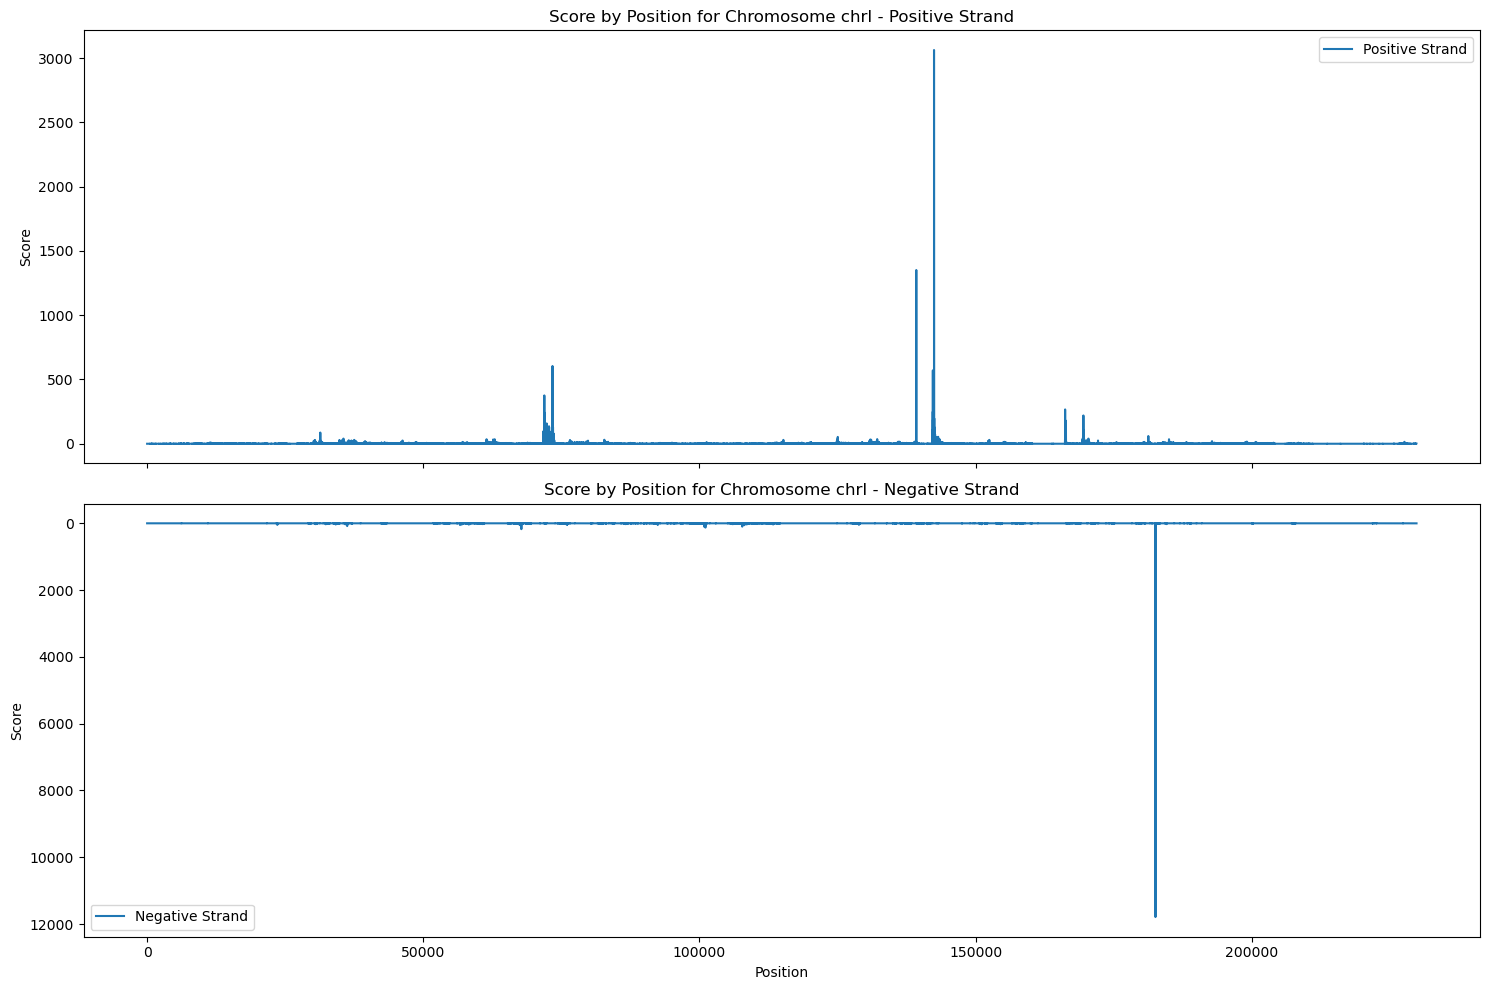

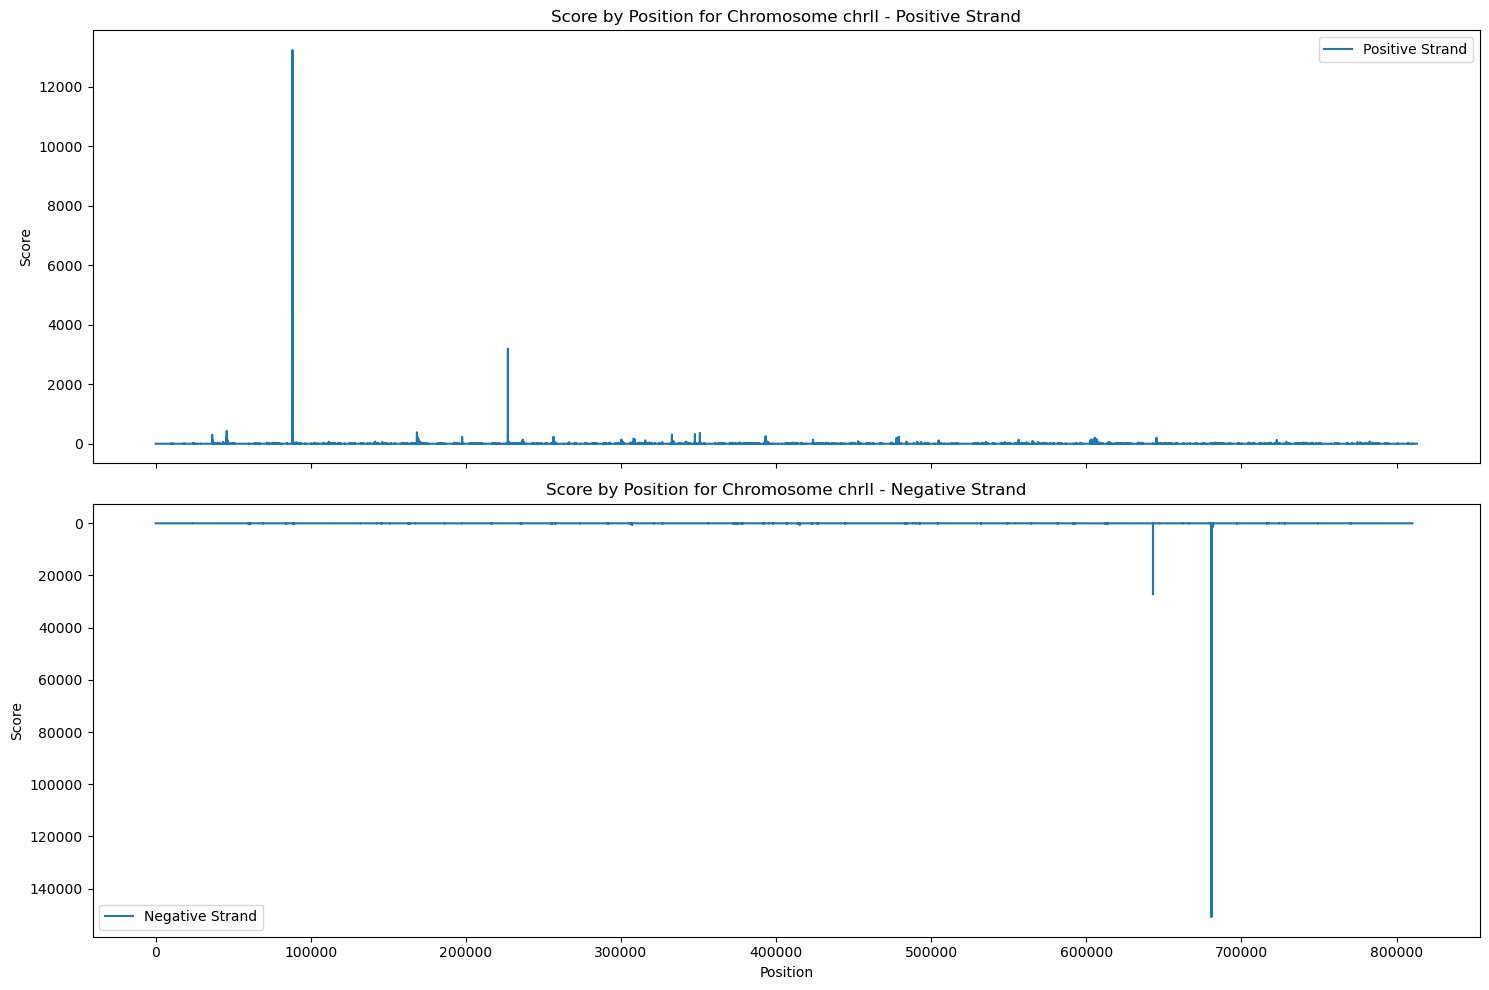

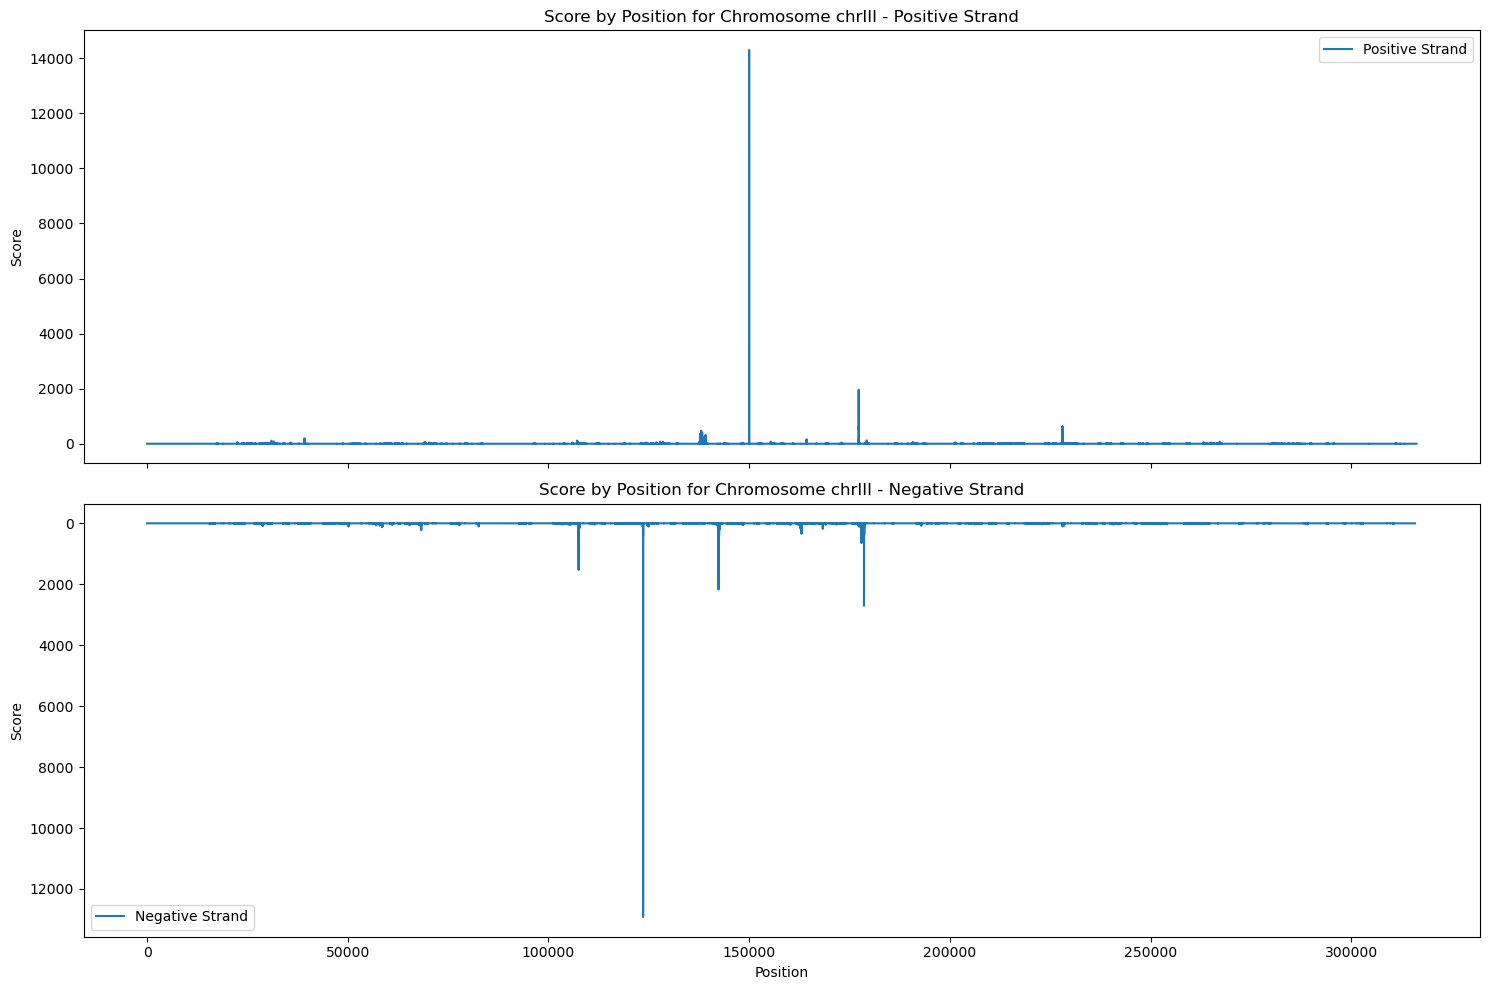

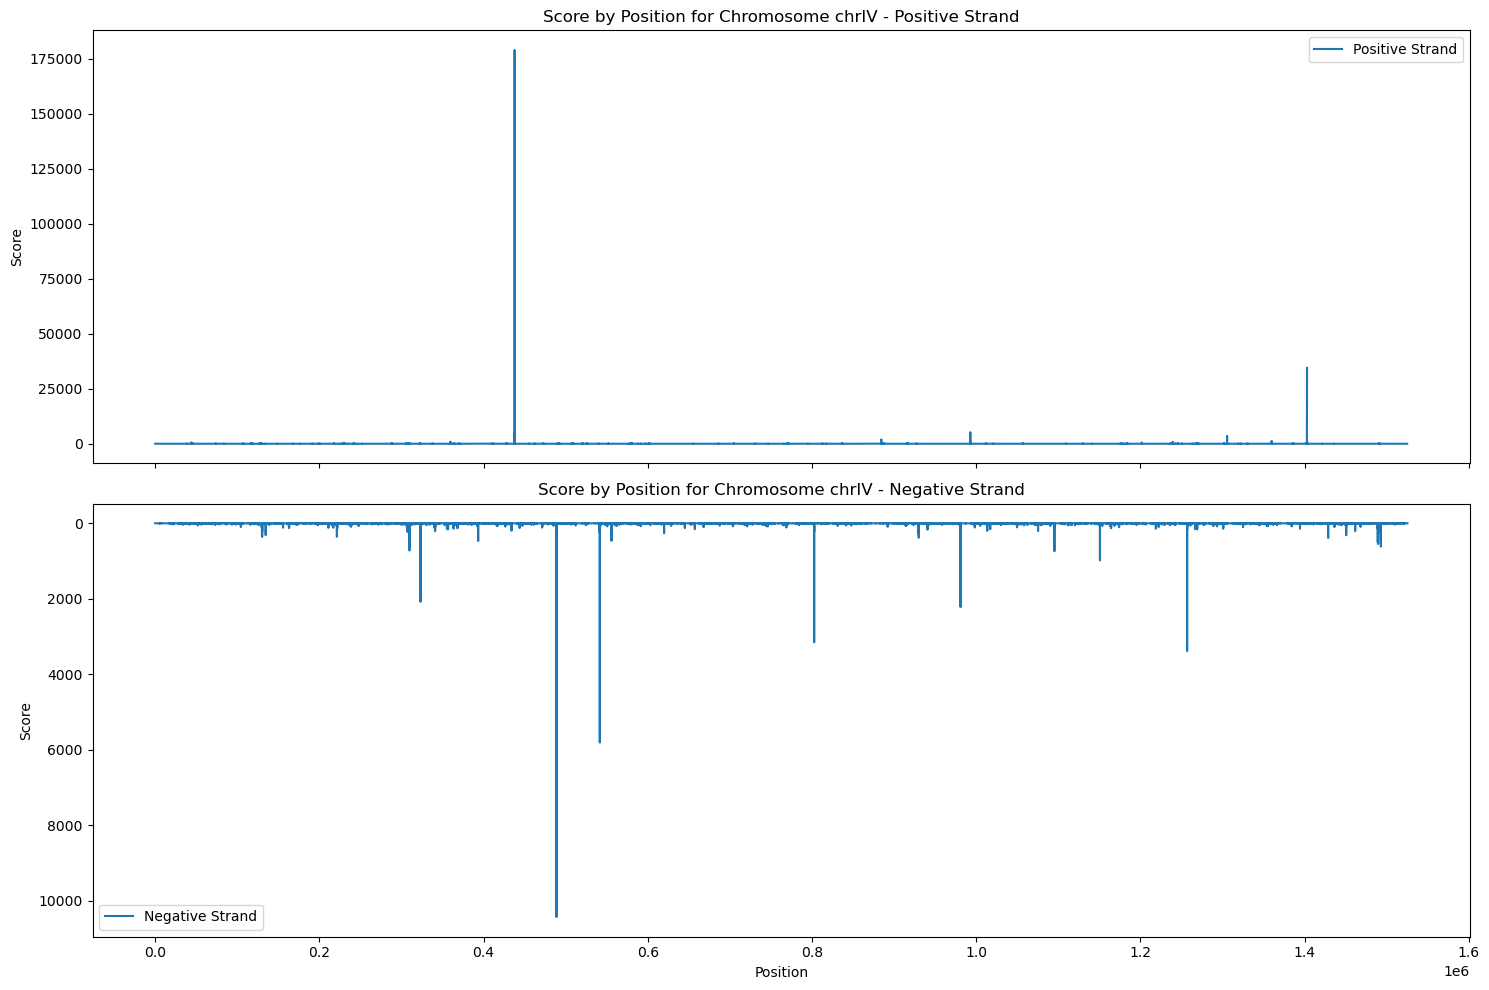

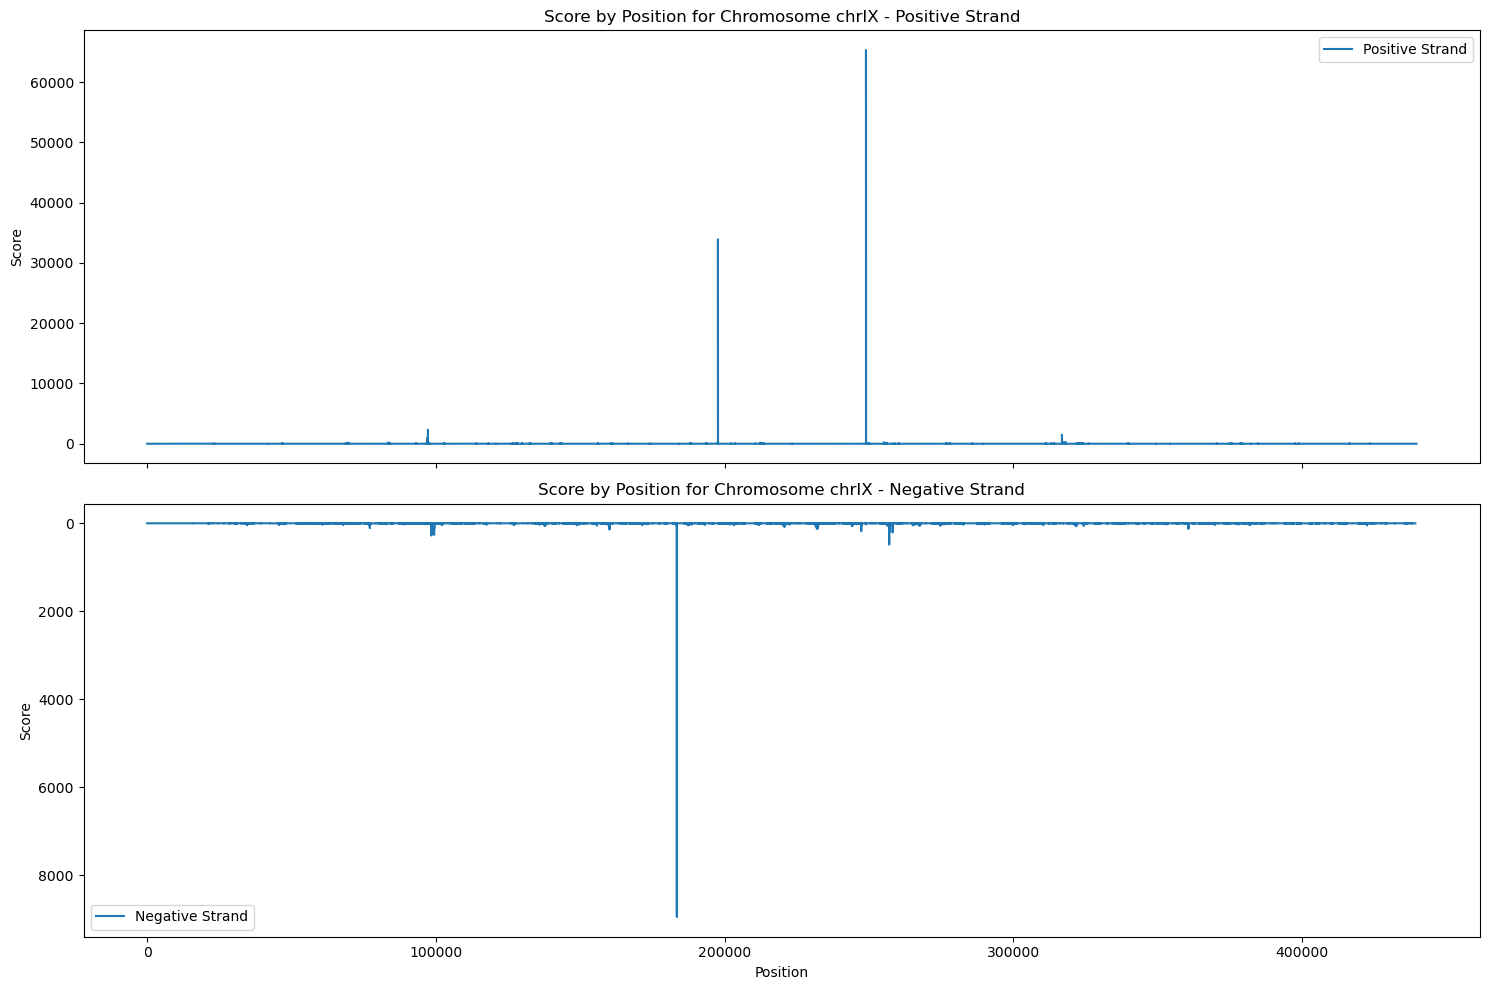

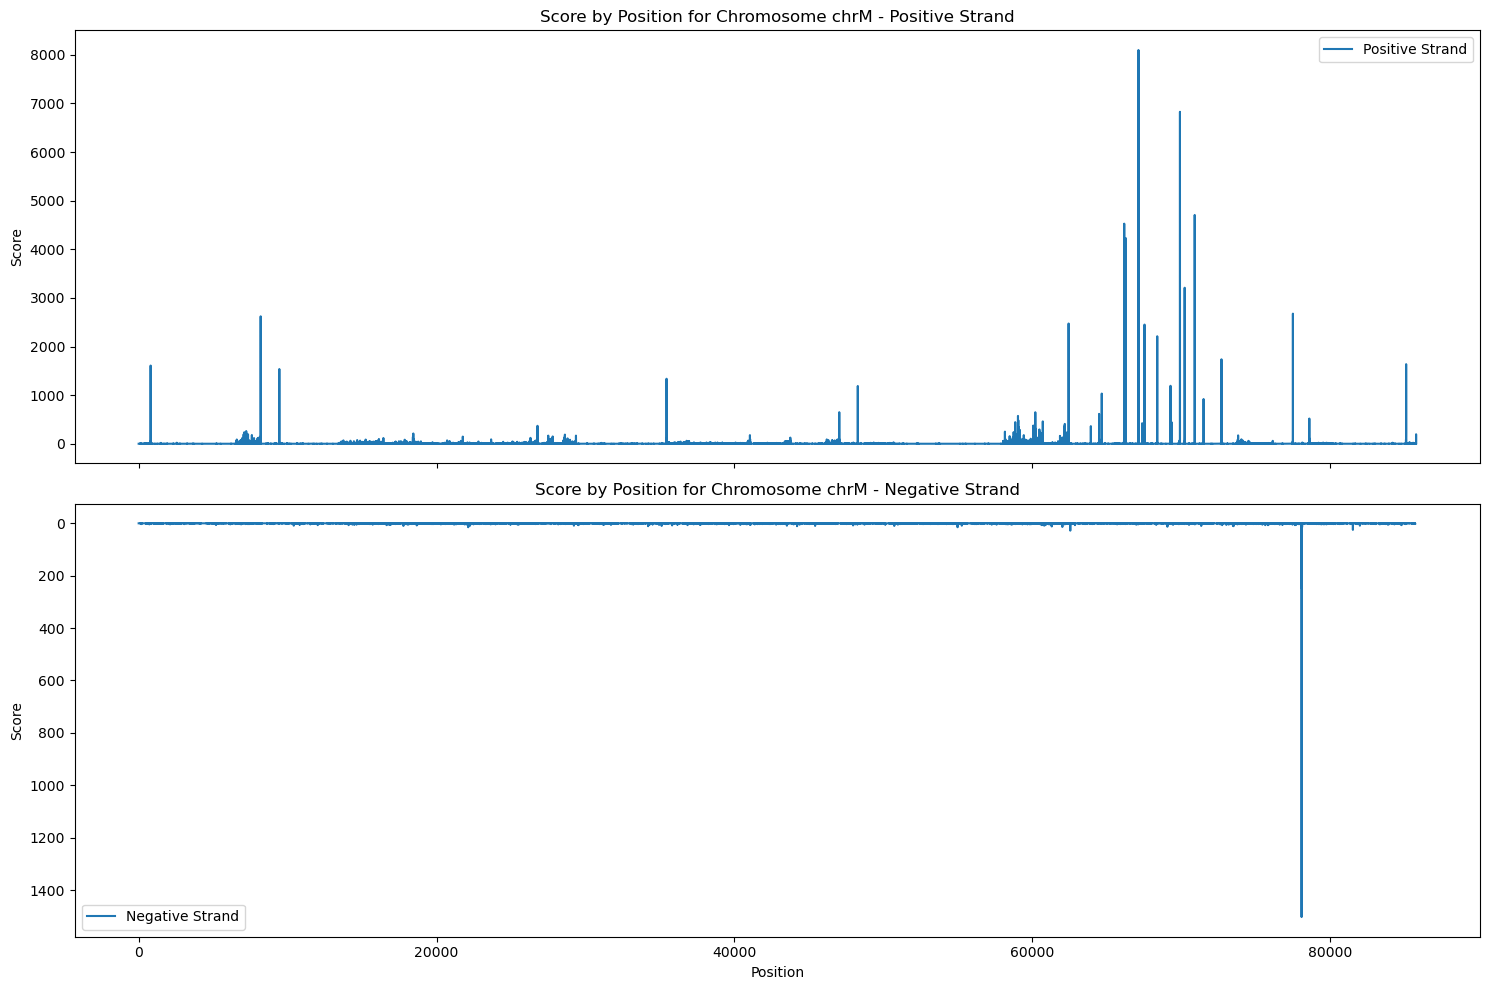

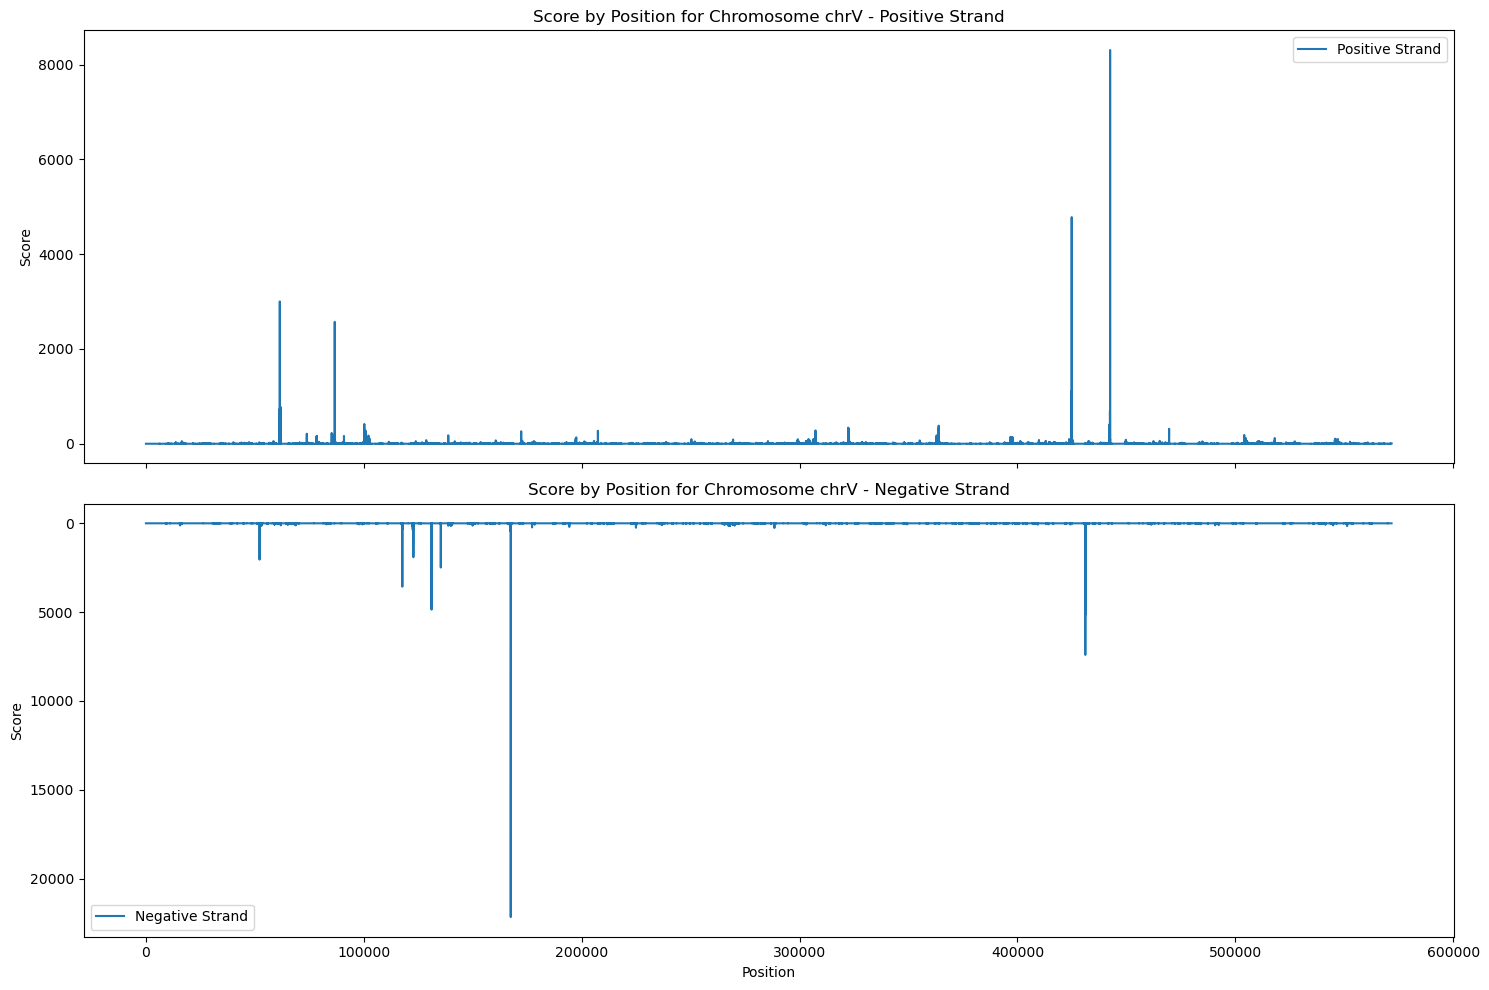

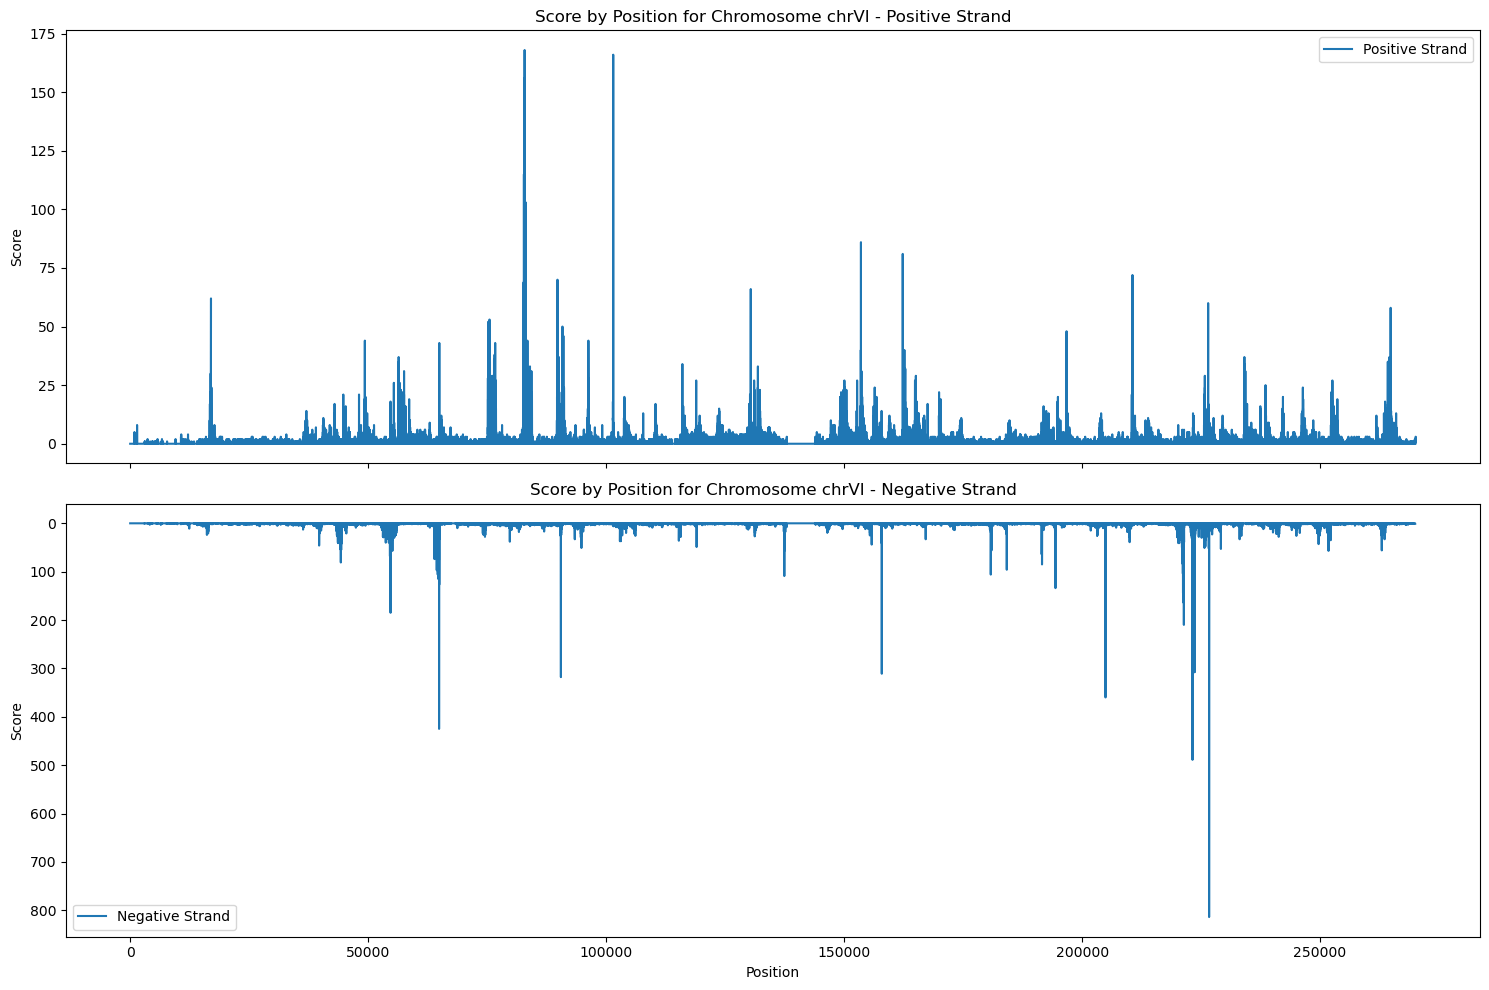

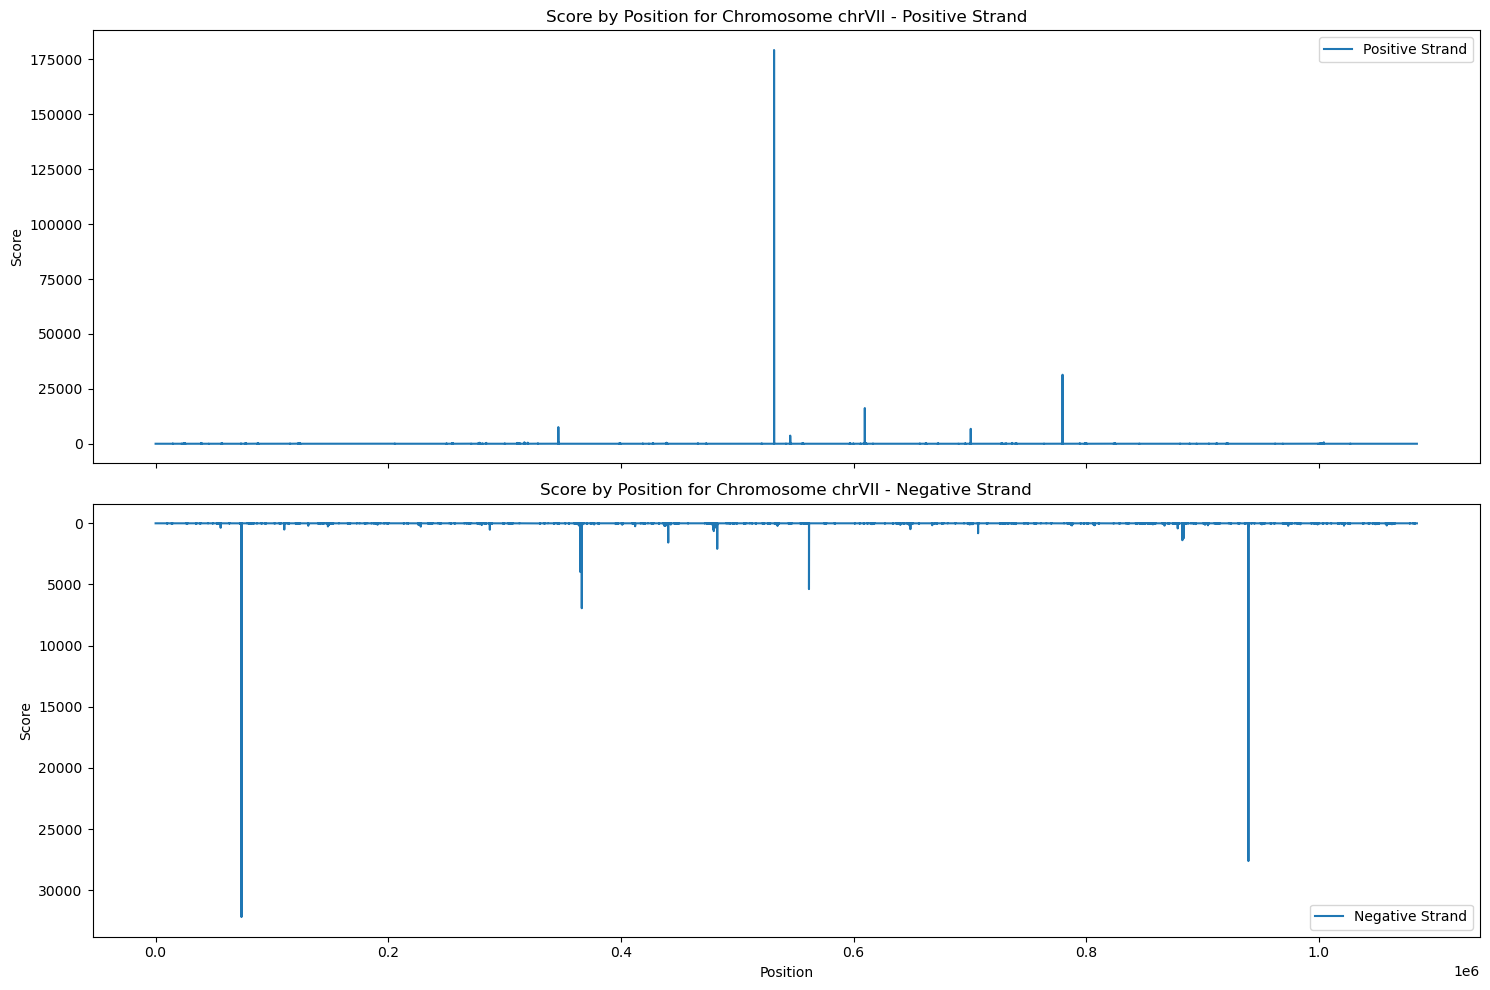

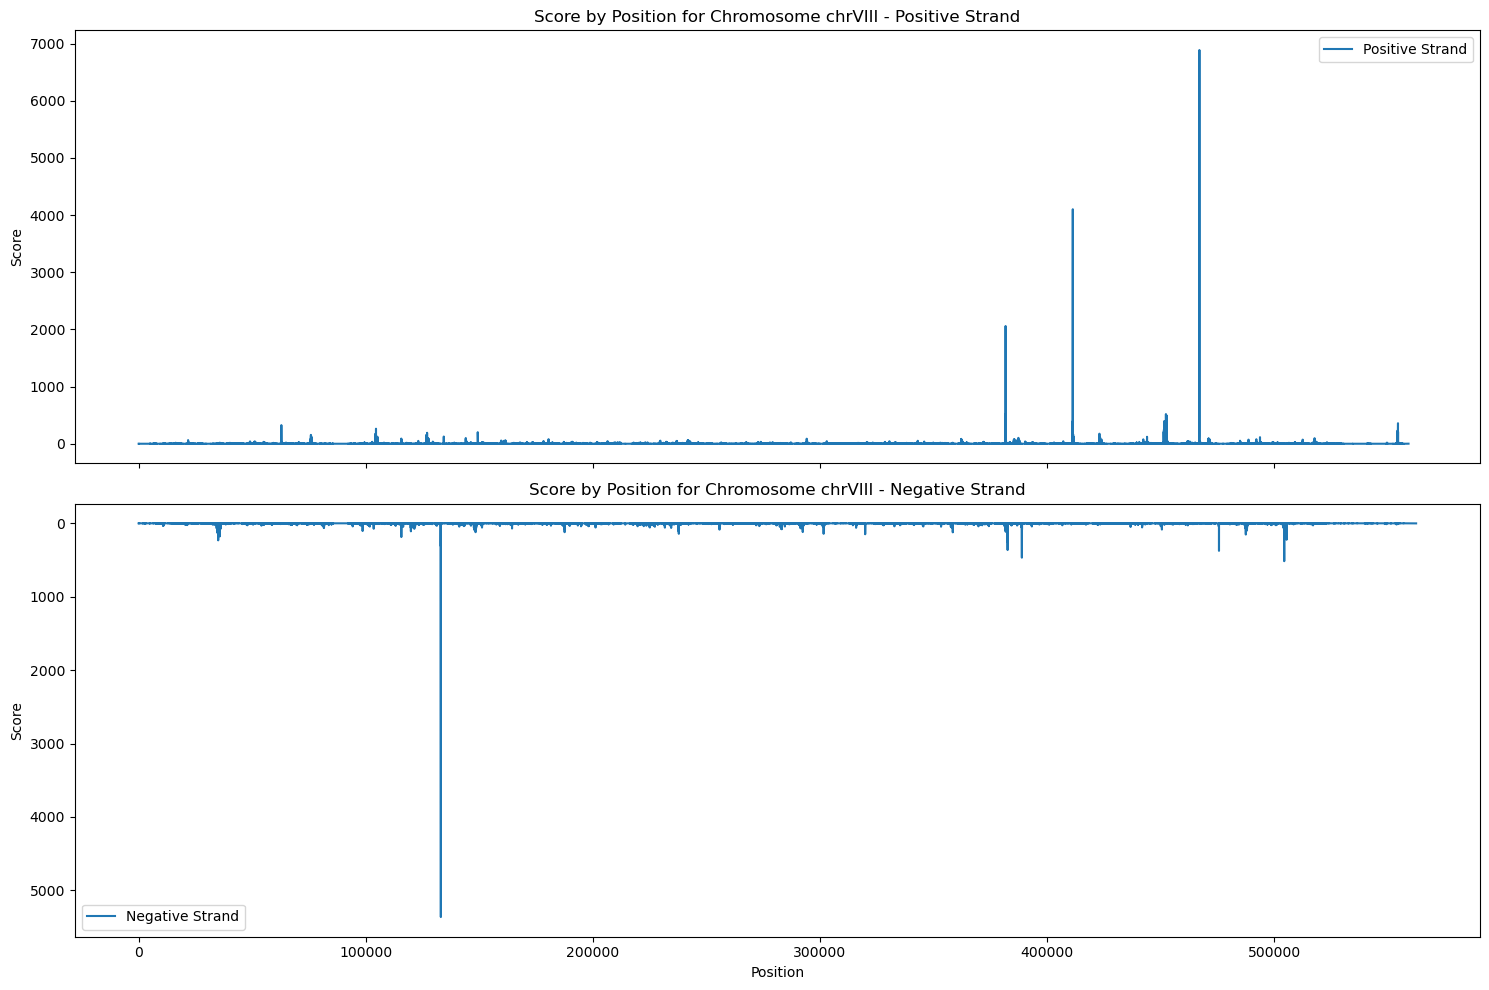

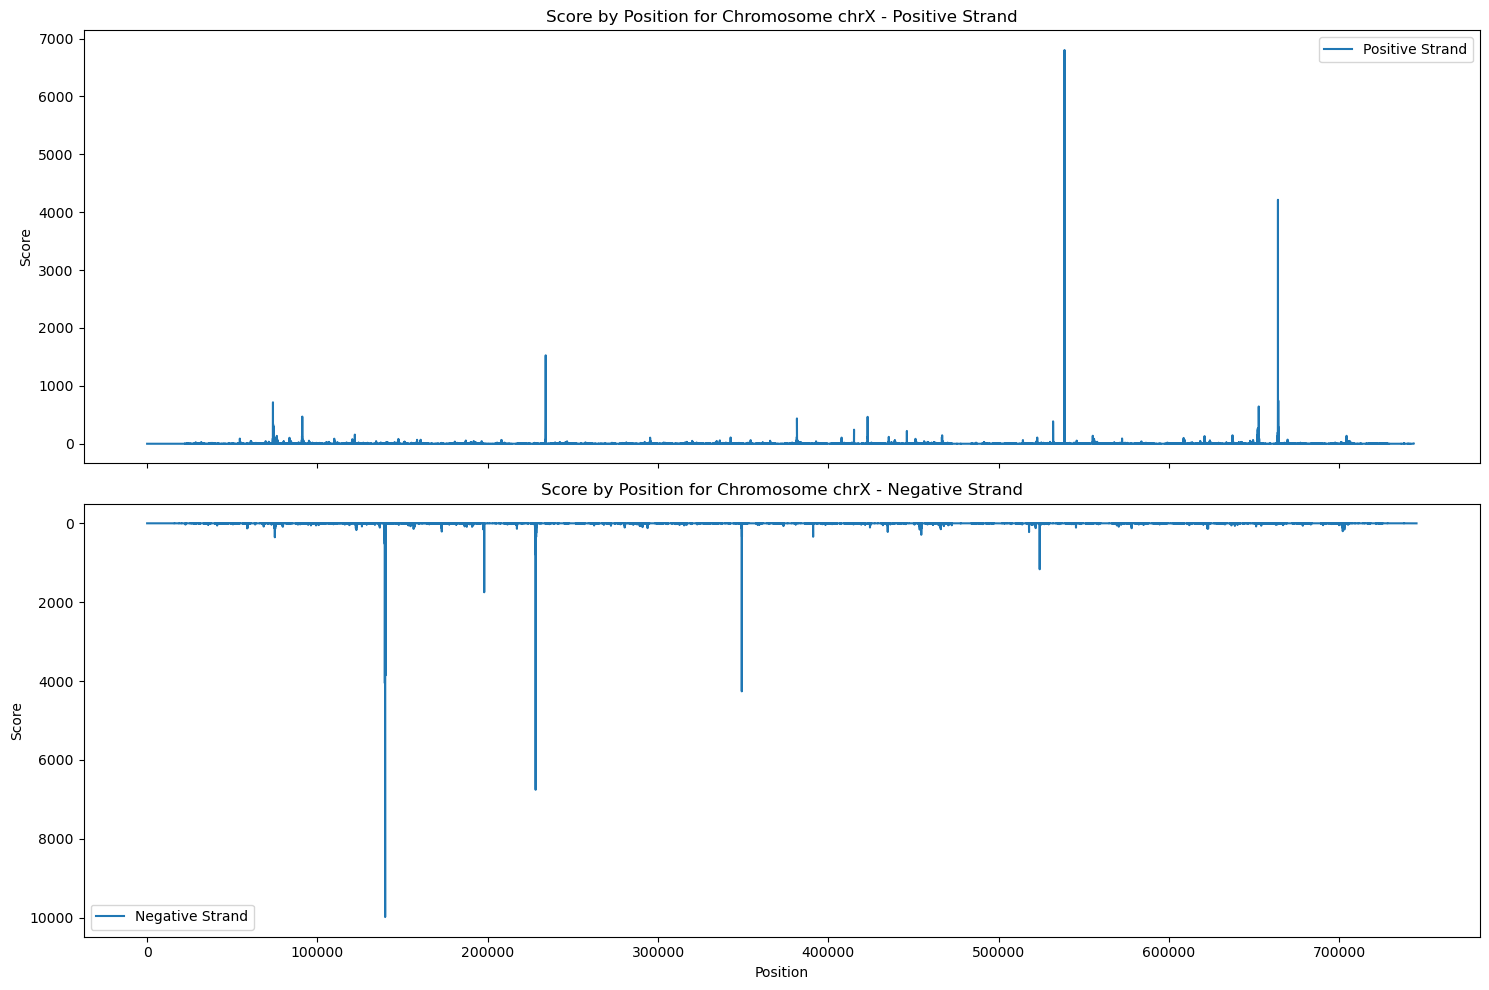

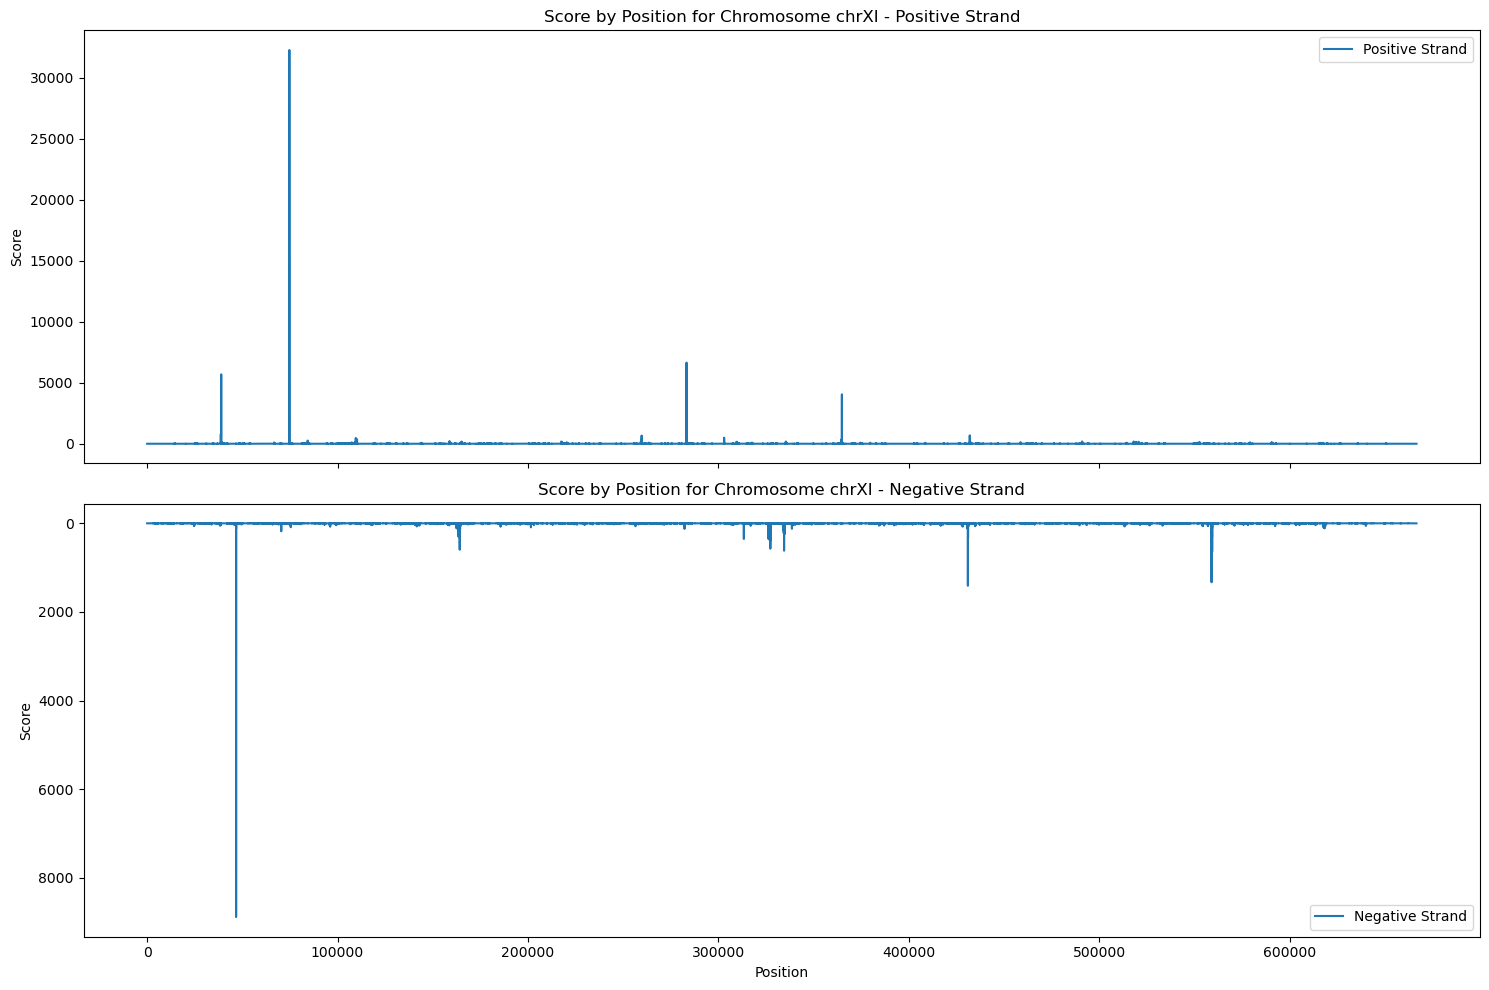

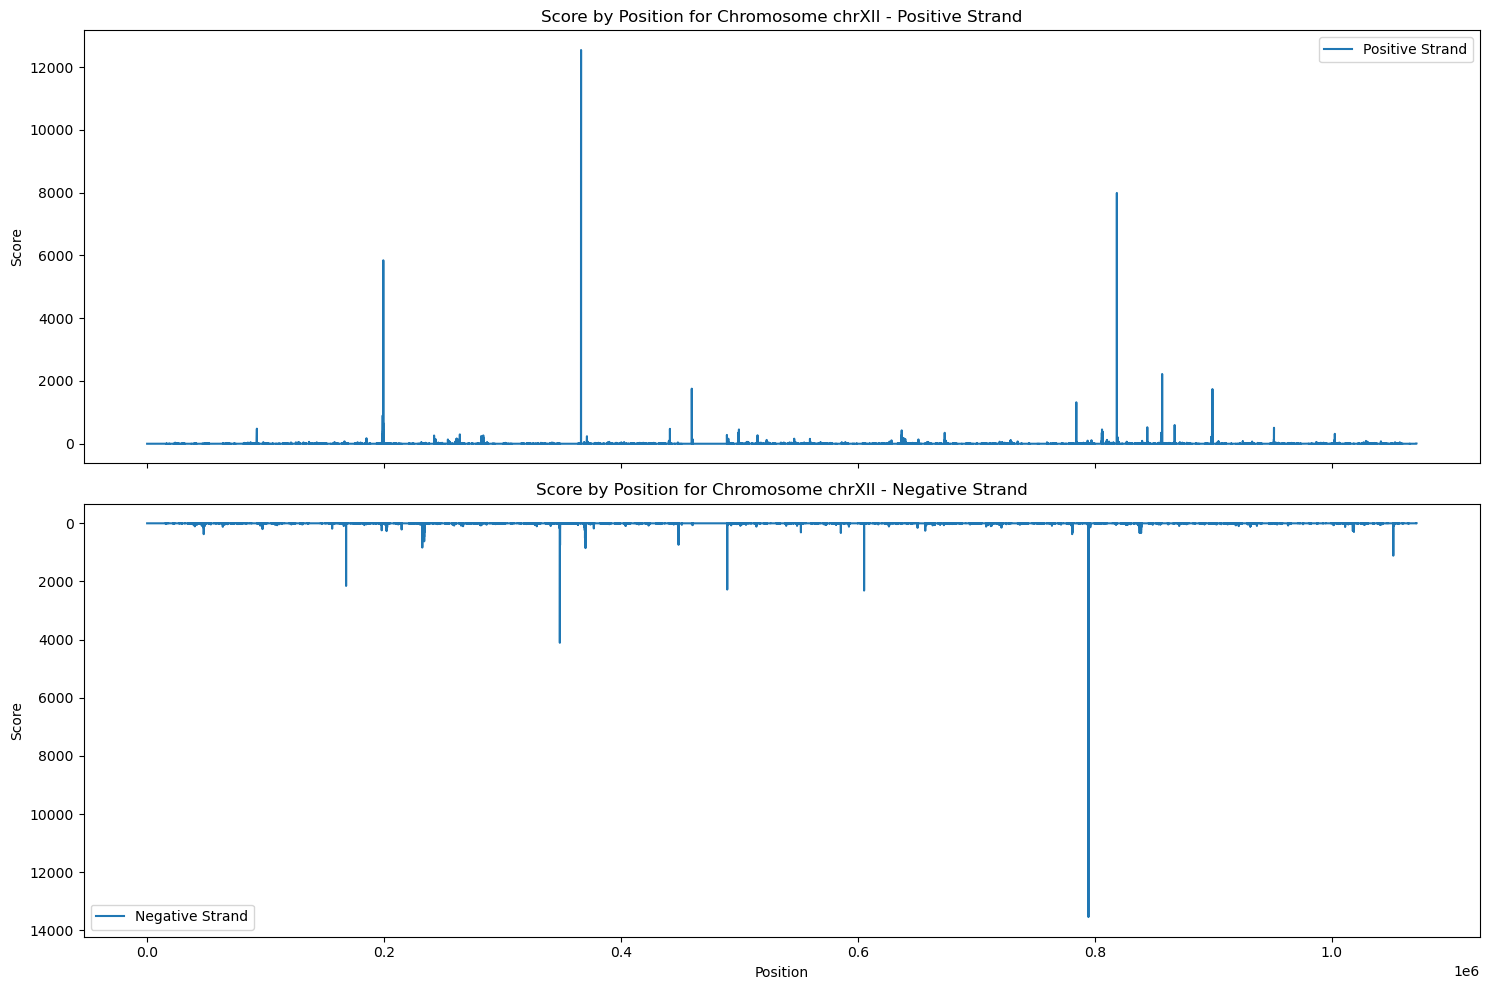

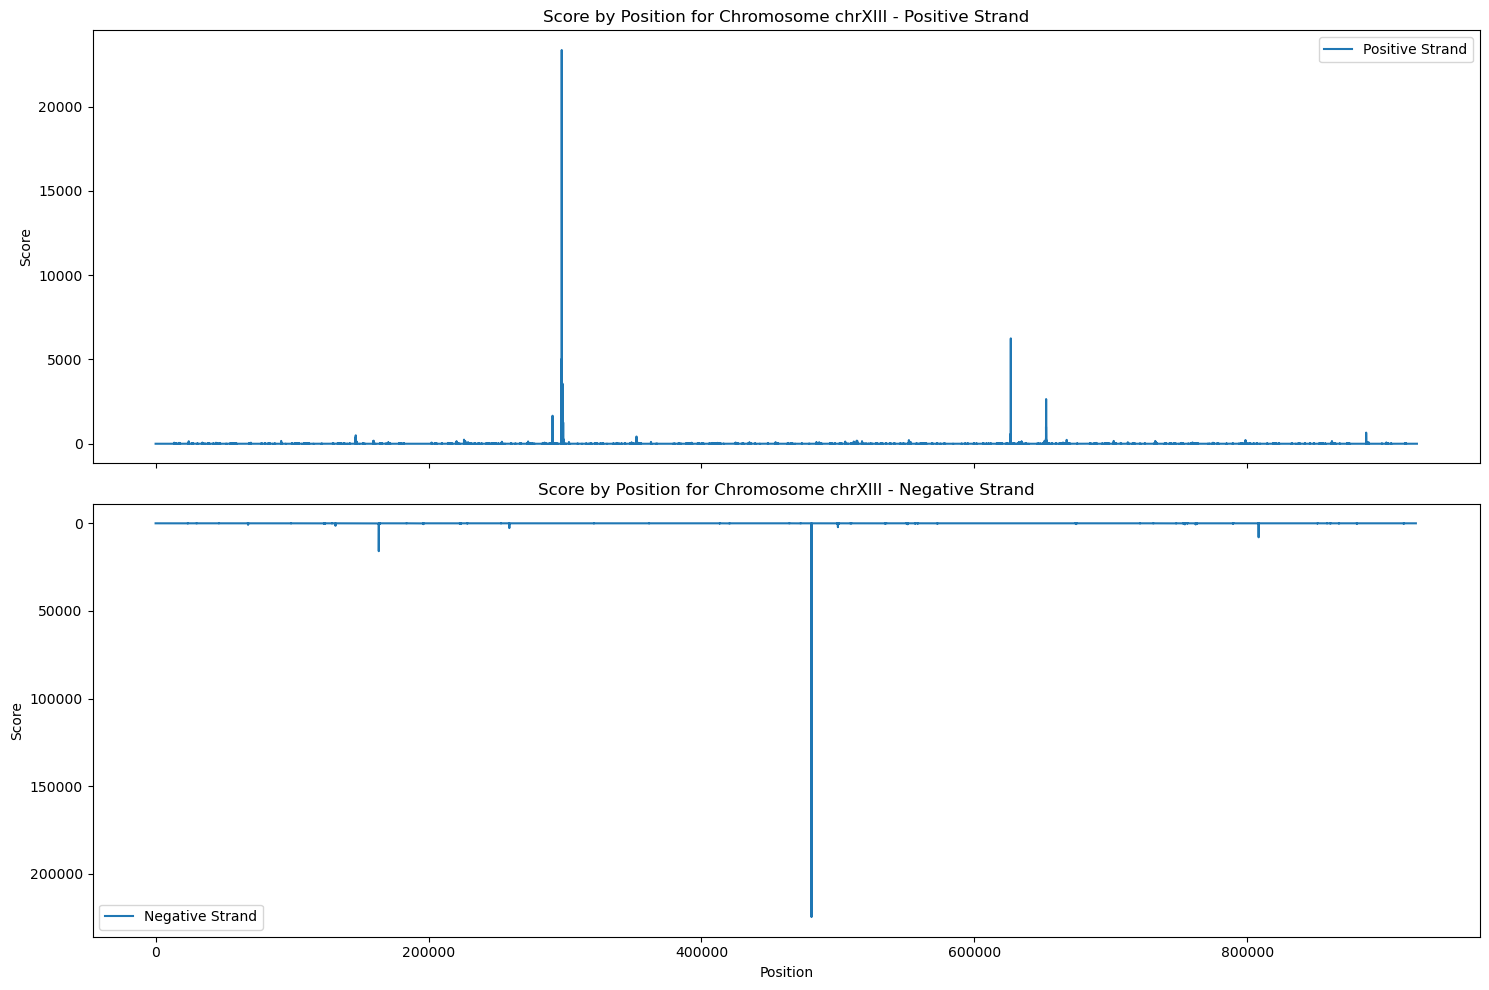

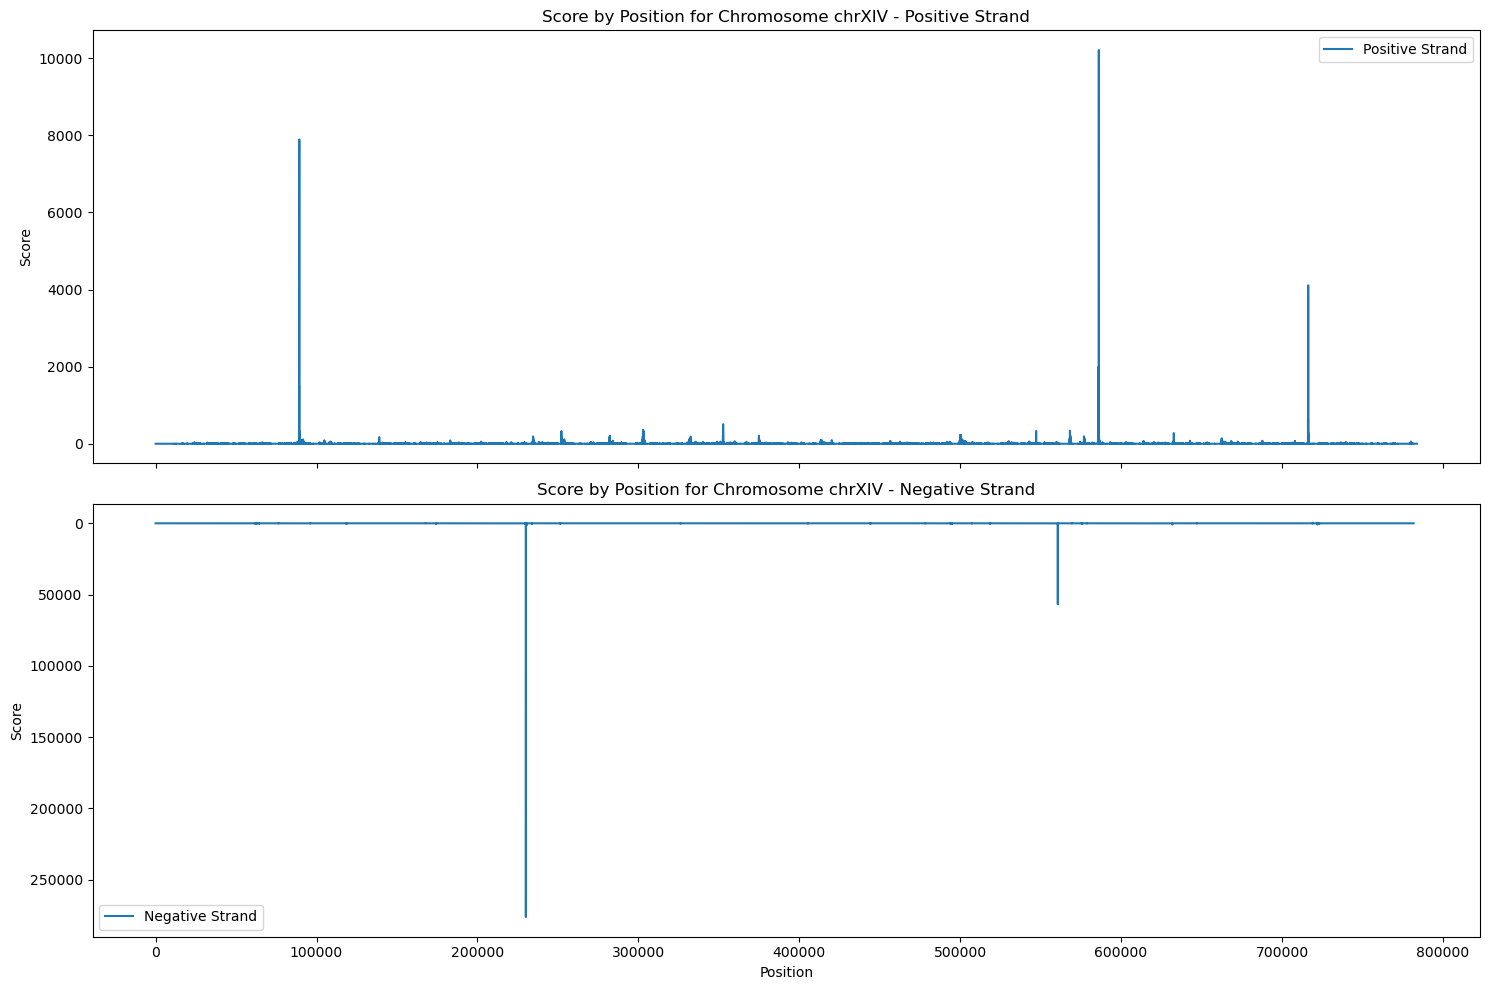

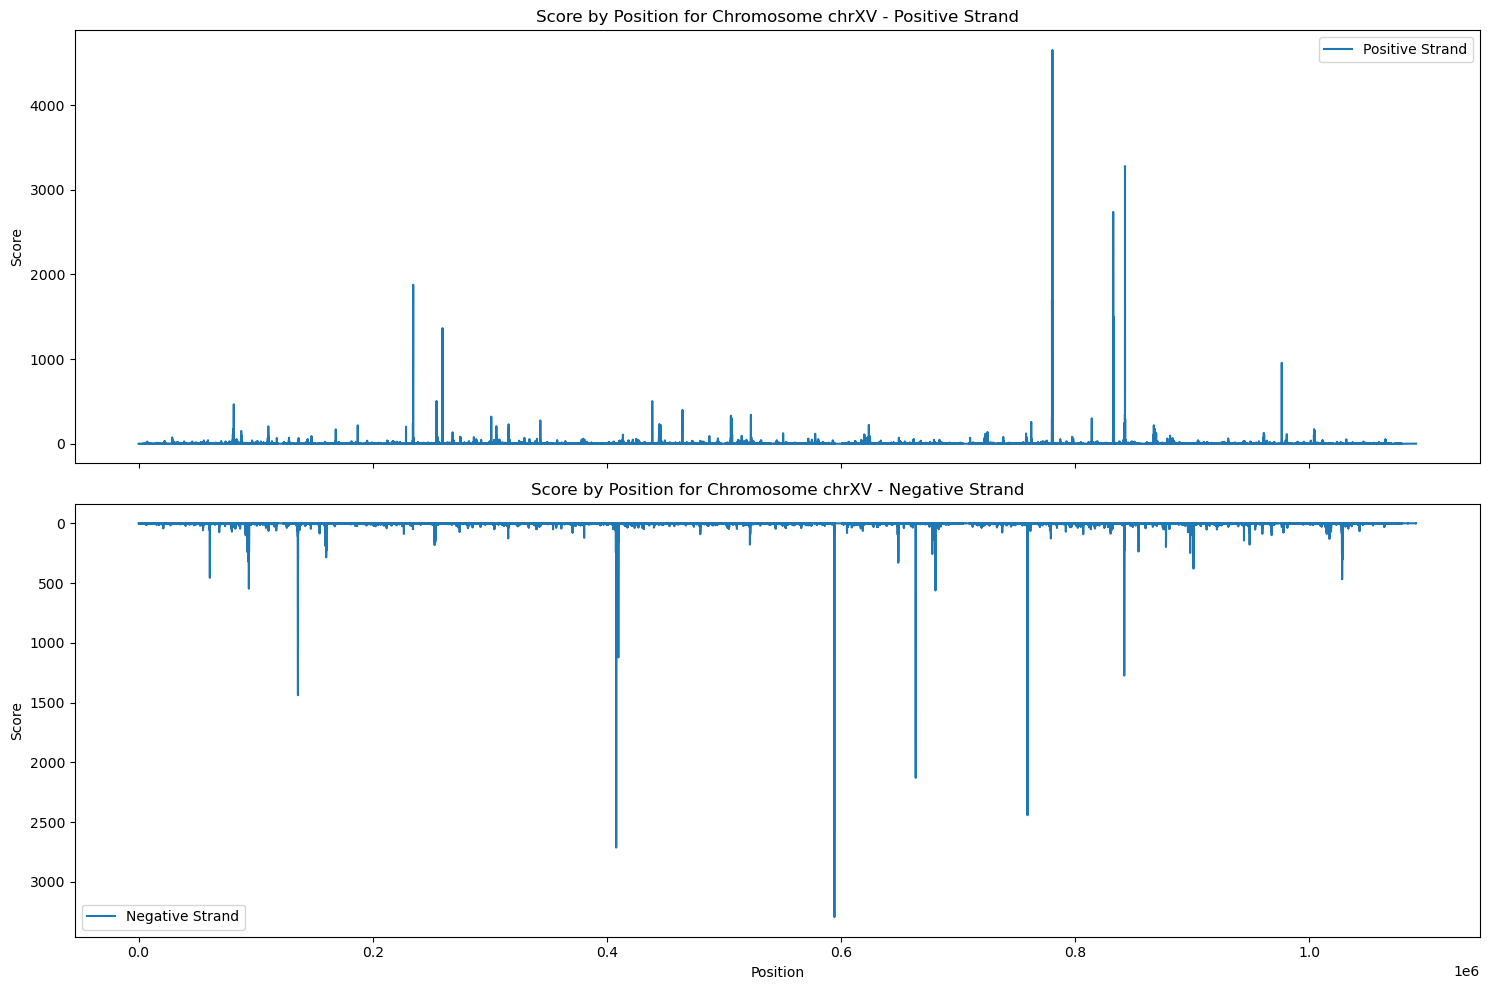

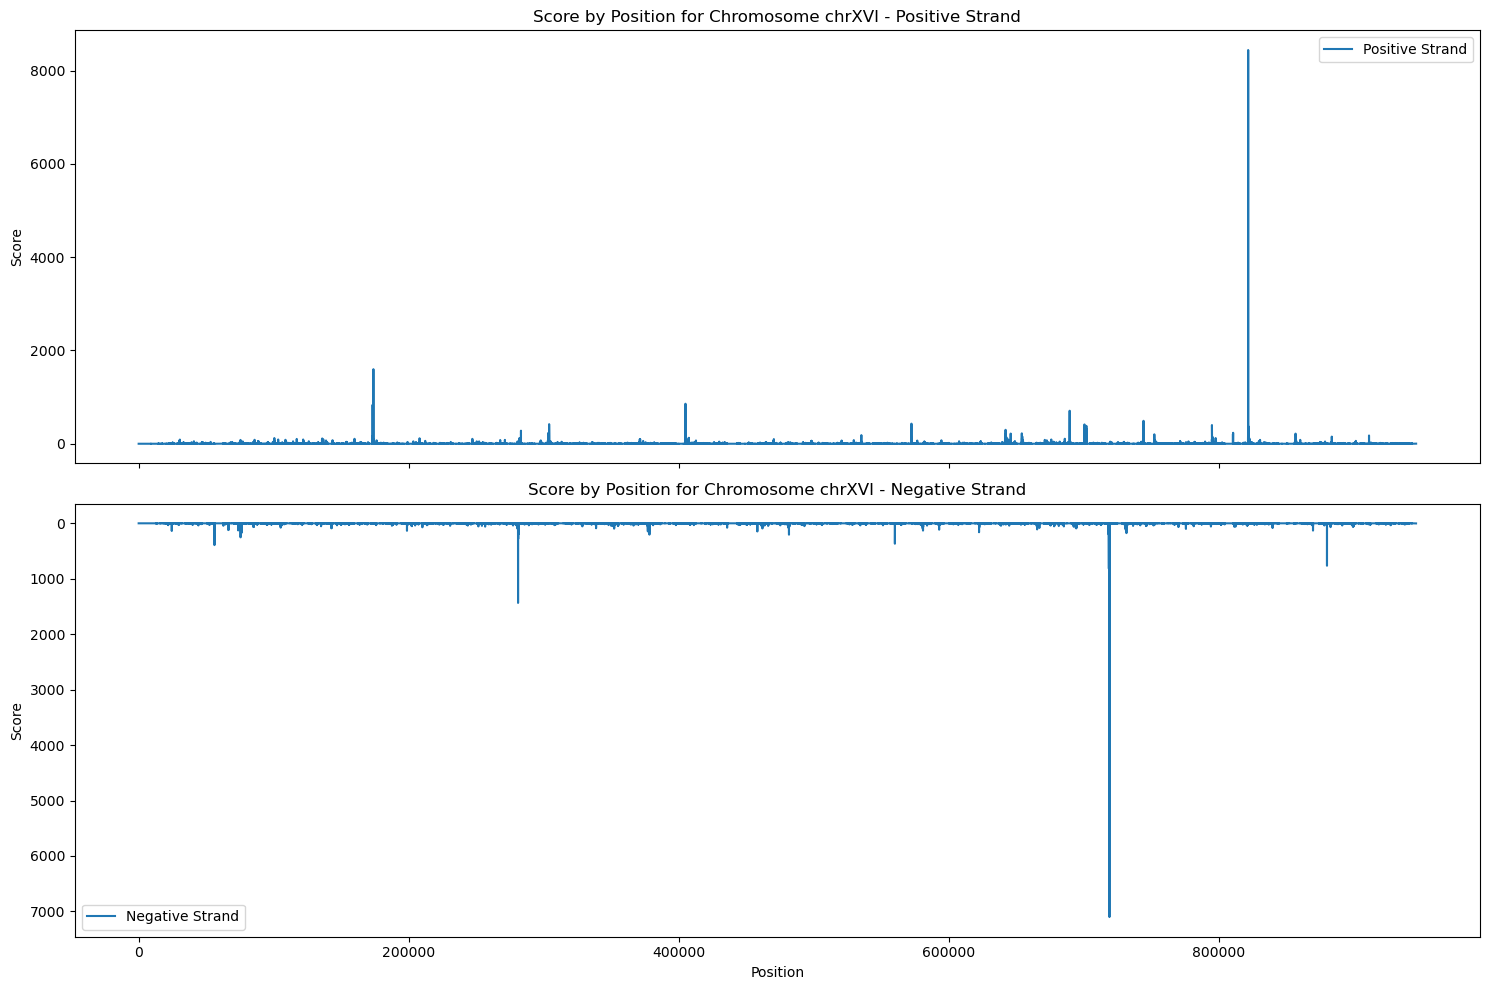

In [3]:
# Supplementary code 2

# Description :  This program is used in our exploratory data analysis where we tried to see , how the data looks
# like in a NET-Seq file, which is wild type form of yeast. We tried to see the total score values of each chromosome
# and tried to see both the positive and negative strand of Wild type form of yeast.

import pandas as pd

# Specify the paths of the .bedgraph files
bedgraph_file_pos = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.pos.bedgraph"
bedgraph_file_neg = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"

# Function to process a bedgraph file
def process_bedgraph_file(bedgraph_file):
    # Read the .bedgraph file into a pandas DataFrame
    data = pd.read_csv(bedgraph_file, sep="\t", header=None)

    # Get the unique chromosome names from the data
    chromosomes = data[0].unique()

    # Create a dictionary to store the Series for each chromosome
    chromosome_series = {}

    # Iterate over the unique chromosomes and load the Series
    for chromosome in chromosomes:
        # Filter the data for the current chromosome
        chromosome_data = data[data[0] == chromosome][[1, 3]]
        chromosome_data[1] = chromosome_data[1].astype(int)

        # Create a Series of zeros with the determined length
        chromosome_s = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))

        # Store the score values in the corresponding positions of the Series
        chromosome_s[chromosome_data[1]] = chromosome_data[3]

        # Store the chromosome Series in the dictionary
        chromosome_series[chromosome] = chromosome_s

    return chromosome_series

# Process both files
chromosome_series_pos = process_bedgraph_file(bedgraph_file_pos)
chromosome_series_neg = process_bedgraph_file(bedgraph_file_neg)

# Now, you can perform calculations or visualizations based on these series.
# For example, to calculate the total score for each chromosome:
for chromosome in chromosome_series_pos.keys():
    total_score_pos = chromosome_series_pos[chromosome].sum()
    total_score_neg = chromosome_series_neg[chromosome].sum()
    print(f"Total score for {chromosome}: {total_score_pos} (positive strand), {total_score_neg} (negative strand)")

import matplotlib.pyplot as plt

# Process both files as before
chromosome_series_pos = process_bedgraph_file(bedgraph_file_pos)
chromosome_series_neg = process_bedgraph_file(bedgraph_file_neg)

# Plot data for each chromosome
for chromosome in chromosome_series_pos.keys():
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15,10))  # Create two subplots sharing x axis
    
    # Plot the positive strand scores on the upper subplot
    axs[0].plot(chromosome_series_pos[chromosome], label='Positive Strand')
    axs[0].set_ylabel('Score')
    axs[0].set_title(f'Score by Position for Chromosome {chromosome} - Positive Strand')
    axs[0].legend()
    
    # Plot the negative strand scores on the lower subplot
    axs[1].plot(chromosome_series_neg[chromosome], label='Negative Strand')
    axs[1].set_xlabel('Position')
    axs[1].set_ylabel('Score')
    axs[1].invert_yaxis()  # Invert the y-axis to create a "mirror image"
    axs[1].set_title(f'Score by Position for Chromosome {chromosome} - Negative Strand')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()


In [4]:
#Supplementary code 3

# Description : Here we took four repeats of wild type form of yeast,and tried to do EDA analysis. Basically
# these four repeats are same wild type form, which created in different external/experimental conditions.
# We tried to see the correlation and Euclidean distance between the four repeats and our findings related to the 
# same is present in the Supplementary document. We tried to see the average correlation value and average Euclidean distance


import os
from scipy.spatial import distance
import pandas as pd

bedgraph_files_pos = [
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.pos.bedgraph",
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-2.pos.bedgraph",
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-3.pos.bedgraph",
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-4.pos.bedgraph",
]

bedgraph_files_neg = [
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph",
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-2.neg.bedgraph",
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-3.neg.bedgraph",
    "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-4.neg.bedgraph",
]

# Process all the bedgraph files
chromosome_series_pos = [process_bedgraph_file(file)['chrM'] for file in bedgraph_files_pos]
chromosome_series_neg = [process_bedgraph_file(file)['chrM'] for file in bedgraph_files_neg]
# Calculate maximum length among all series
max_len = max(max([len(series) for series in chromosome_series_pos]), max([len(series) for series in chromosome_series_neg]))

# Reindex all series to the maximum length, filling with zeros
chromosome_series_pos = [series.reindex(range(max_len), fill_value=0) for series in chromosome_series_pos]
chromosome_series_neg = [series.reindex(range(max_len), fill_value=0) for series in chromosome_series_neg]


# Calculate correlations and Euclidean distances
for i in range(len(bedgraph_files_pos)):
    for j in range(i+1, len(bedgraph_files_pos)):
        correlation_pos = chromosome_series_pos[i].corr(chromosome_series_pos[j])
        correlation_neg = chromosome_series_neg[i].corr(chromosome_series_neg[j])
        distance_pos = distance.euclidean(chromosome_series_pos[i], chromosome_series_pos[j])
        distance_neg = distance.euclidean(chromosome_series_neg[i], chromosome_series_neg[j])

        # Use os.path.basename to print only the file name, not the entire path
        print(f"Correlation between {os.path.basename(bedgraph_files_pos[i])} and {os.path.basename(bedgraph_files_pos[j])}: {correlation_pos}")
        print(f"Correlation between {os.path.basename(bedgraph_files_neg[i])} and {os.path.basename(bedgraph_files_neg[j])}: {correlation_neg}")
        print(f"Euclidean distance between {os.path.basename(bedgraph_files_pos[i])} and {os.path.basename(bedgraph_files_pos[j])}: {distance_pos}")
        print(f"Euclidean distance between {os.path.basename(bedgraph_files_neg[i])} and {os.path.basename(bedgraph_files_neg[j])}: {distance_neg}")
correlation_values = [0.917246999755809, 0.9465562769619318, 0.917661387252237, 0.9170695313448664, 0.7450687951622854, 0.3412185045819648, 0.8611827724553721, 0.8292957090945067, 0.7833761661747299, 0.2913312174362262, 0.7767480515574384, 0.41431621896486237]
euclidean_distance_values = [8108.578728729221, 1132.1104186429873, 10198.509744075356, 1216.6236065439466, 13539.99630723731, 1610.4533523203954, 5522.3417134400515, 353.5152047649436, 7461.263498898829, 664.8684080327475, 4801.794143859147, 560.3597059032707]

average_correlation = sum(correlation_values) / len(correlation_values)
average_euclidean_distance = sum(euclidean_distance_values) / len(euclidean_distance_values)

print(f"Average Correlation: {average_correlation}")
print(f"Average Euclidean Distance: {average_euclidean_distance}")


Correlation between wt-1.pos.bedgraph and wt-2.pos.bedgraph: 0.917246999755809
Correlation between wt-1.neg.bedgraph and wt-2.neg.bedgraph: 0.9465562769619318
Euclidean distance between wt-1.pos.bedgraph and wt-2.pos.bedgraph: 8108.578728729221
Euclidean distance between wt-1.neg.bedgraph and wt-2.neg.bedgraph: 1132.1104186429873
Correlation between wt-1.pos.bedgraph and wt-3.pos.bedgraph: 0.917661387252237
Correlation between wt-1.neg.bedgraph and wt-3.neg.bedgraph: 0.9170695313448664
Euclidean distance between wt-1.pos.bedgraph and wt-3.pos.bedgraph: 10198.509744075356
Euclidean distance between wt-1.neg.bedgraph and wt-3.neg.bedgraph: 1216.6236065439466
Correlation between wt-1.pos.bedgraph and wt-4.pos.bedgraph: 0.7450687951622854
Correlation between wt-1.neg.bedgraph and wt-4.neg.bedgraph: 0.3412185045819648
Euclidean distance between wt-1.pos.bedgraph and wt-4.pos.bedgraph: 13539.99630723731
Euclidean distance between wt-1.neg.bedgraph and wt-4.neg.bedgraph: 1610.4533523203954
Co

           score_0   score_1   score_2   score_3   score_4   score_5  \
score_0   1.000000  0.770328  0.824457  0.722795  0.888071  0.847015   
score_1   0.770328  1.000000  0.507085  0.380199  0.669280  0.845553   
score_2   0.824457  0.507085  1.000000  0.893570  0.945030  0.747855   
score_3   0.722795  0.380199  0.893570  1.000000  0.815026  0.570738   
score_4   0.888071  0.669280  0.945030  0.815026  1.000000  0.899609   
score_5   0.847015  0.845553  0.747855  0.570738  0.899609  1.000000   
score_6   0.743137  0.678782  0.686856  0.490506  0.783107  0.807566   
score_7   0.393742  0.227308  0.492149  0.346845  0.486072  0.379043   
score_8  -0.031209  0.023774  0.037781 -0.009521  0.086182  0.102388   
score_9   0.861655  0.640896  0.937852  0.831567  0.975752  0.885743   
score_10  0.545684  0.589112  0.479297  0.315448  0.598343  0.653551   
score_11  0.576786  0.357635  0.685099  0.541266  0.635792  0.484692   
score_12  0.465231  0.088409  0.726298  0.762061  0.531184  0.22

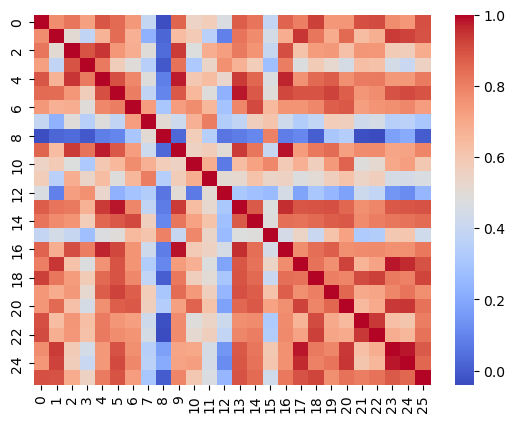

In [6]:
#Supplementary code 4

#Description :  This program checking the twenty-six histone modification data( ChIP- Seq). We created a correlation
# matrix by reading all the Histone modification data in the wiggle files using the custom function 'read_wig_to_bedgraph'
#(This function we used in the entire project to read wiggle files). From the correlation matrix , we created
# a vislization using seaborn. Resulted image we included in the main thesis.

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "end": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["end"].append(pos+step)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [
    'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743\Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig'

]

df = pd.DataFrame()
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df = wig_df.rename(columns={"score": "score_" + str(i)})
    if df.empty:
        df = wig_df
    else:
        df = pd.merge(df, wig_df, on=['chromosome', 'start', 'end'], how='outer')

# Perform correlation analysis on the scores only.
score_columns = [col for col in df.columns if col.startswith('score_')]
correlation_matrix = df[score_columns].corr()

print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns and indices for simplification
new_labels = [label.split('_')[-1] for label in correlation_matrix.columns]
correlation_matrix.columns = new_labels
correlation_matrix.index = new_labels

# Plot the heatmap without annotations
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.show()


In [11]:
#Supplementary code 5

# This program we could say the core of this project. This program does the Random Forest binary classification
# by reading all the histone modification data in the wiggle file and then predict the pause in wild type strain
# 'wt-1.neg.bedgraph'. We included this program in the thesis reference to show how we are setting pause location
# in the wild type for predicting by histone modification.Even though for that reference we gave this program as
# reference this program does many important things like a) alligning histone modification data with wild type data
# b) calculating the total number of pauses in each chromosome c) showing Random Forest parameter metrics for
# each chromosome d. showing, which features are the best


import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })

    # Sort the DataFrame to show most important features at the top
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    print("Feature Importances:")
    print(importances_df)
    
    print("\n----------------------------------\n")

Chromosome: chrI
        score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0         0.000      0.0    0.000    0.000    0.000      0.0      0.0   
1         0.000      0.0    0.000    0.000    0.000      0.0      0.0   
2         3.312      0.0    0.000    0.000    0.000      0.0      0.0   
3         3.312      0.0    0.000    0.000    0.000      0.0      0.0   
4         3.312      0.0    0.000    0.000    0.000      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
230214   26.494      0.0    0.806    1.216    0.576      0.0      0.0   
230215   26.494      0.0    0.806    0.000    0.576      0.0      0.0   
230216   26.494      0.0    0.806    0.000    0.000      0.0      0.0   
230217   19.871      0.0    0.000    0.000    0.000      0.0      0.0   
230218    0.000      0.0    0.000    0.000    0.000      0.0      0.0   

        score_7  score_8  score_9  ...  score_17  score_18  score_19  \
0           0.0      0.0      0.0 

         score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0          0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1          0.000    0.000      0.0    0.000      0.0      0.0      0.0   
2         13.247    0.000      0.0    1.216      0.0      0.0      0.0   
3         13.247    0.000      0.0    1.216      0.0      0.0      0.0   
4         13.247    2.512      0.0    1.216      0.0      0.0      0.0   
...          ...      ...      ...      ...      ...      ...      ...   
1531929    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531930    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531931    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531932    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531933    0.000    0.000      0.0    0.000      0.0      0.0      0.0   

         score_7  score_8  score_9  ...  score_17  score_18  score_19  \
0            0.0      0.0      0.0  ..

         score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...          ...      ...      ...      ...      ...      ...      ...   
1090936      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1090937      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1090938      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1090939      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1090940      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

         score_7  score_8  score_9  ...  score_17  score_18  score_19  \
0            0.0      0.0      0.0  ..

         score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0            0.0    0.000      0.0      0.0      0.0      0.0      0.0   
1            0.0    0.000      0.0      0.0      0.0      0.0      0.0   
2            0.0    0.000      0.0      0.0      0.0      0.0      0.0   
3            0.0    0.000      0.0      0.0      0.0      0.0      0.0   
4            0.0    0.000      0.0      0.0      0.0      0.0      0.0   
...          ...      ...      ...      ...      ...      ...      ...   
1078173      0.0    2.512      0.0      0.0      0.0      0.0      0.0   
1078174      0.0    2.512      0.0      0.0      0.0      0.0      0.0   
1078175      0.0    2.512      0.0      0.0      0.0      0.0      0.0   
1078176      0.0    0.000      0.0      0.0      0.0      0.0      0.0   
1078177      0.0    0.000      0.0      0.0      0.0      0.0      0.0   

         score_7  score_8  score_9  ...  score_17  score_18  score_19  \
0            0.0      0.0      0.0  ..

        score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0           0.0      0.0      0.0      0.0      0.0    0.000      0.0   
1           0.0      0.0      0.0      0.0      0.0    0.000      0.0   
2           0.0      0.0      0.0      0.0      0.0    0.000      0.0   
3           0.0      0.0      0.0      0.0      0.0    0.000      0.0   
4           0.0      0.0      0.0      0.0      0.0    0.000      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
948062      0.0      0.0      0.0      0.0      0.0    1.038      0.0   
948063      0.0      0.0      0.0      0.0      0.0    1.038      0.0   
948064      0.0      0.0      0.0      0.0      0.0    0.000      0.0   
948065      0.0      0.0      0.0      0.0      0.0    0.000      0.0   
948066      0.0      0.0      0.0      0.0      0.0    0.000      0.0   

        score_7  score_8  score_9  ...  score_17  score_18  score_19  \
0           0.0      0.0      0.0  ...     0.000   

Chromosome: chrIV
         score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0          0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1          0.000    0.000      0.0    0.000      0.0      0.0      0.0   
2         13.247    0.000      0.0    1.216      0.0      0.0      0.0   
3         13.247    0.000      0.0    1.216      0.0      0.0      0.0   
4         13.247    2.512      0.0    1.216      0.0      0.0      0.0   
...          ...      ...      ...      ...      ...      ...      ...   
1531929    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531930    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531931    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531932    0.000    0.000      0.0    0.000      0.0      0.0      0.0   
1531933    0.000    0.000      0.0    0.000      0.0      0.0      0.0   

         score_7  score_8  score_9  ...  score_18  score_19  score_20  \
0            0.0    

Chromosome: chrV
        score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
1           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
2           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
3           0.0      0.0      0.0      0.0    0.576      0.0      0.0   
4           0.0      0.0      0.0      0.0    0.576      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
576870      0.0      0.0      0.0      0.0    0.000      0.0      0.0   
576871      0.0      0.0      0.0      0.0    0.000      0.0      0.0   
576872      0.0      0.0      0.0      0.0    0.000      0.0      0.0   
576873      0.0      0.0      0.0      0.0    0.000      0.0      0.0   
576874      0.0      0.0      0.0      0.0    0.000      0.0      0.0   

        score_7  score_8  score_9  ...  score_18  score_19  score_20  \
0           0.0      0.0      0.0 

Chromosome: chrX
        score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
745747      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
745748      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
745749      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
745750      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
745751      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        score_7  score_8  score_9  ...  score_18  score_19  score_20  \
0           0.0      0.0      0.0 

Chromosome: chrXIV
        score_0  score_1  score_2  score_3  score_4  score_5  score_6  \
0           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
1           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
2           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
3           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
4           0.0      0.0      0.0      0.0    0.000      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
784329      0.0      0.0      0.0      0.0    0.576      0.0      0.0   
784330      0.0      0.0      0.0      0.0    0.576      0.0      0.0   
784331      0.0      0.0      0.0      0.0    0.576      0.0      0.0   
784332      0.0      0.0      0.0      0.0    0.000      0.0      0.0   
784333      0.0      0.0      0.0      0.0    0.000      0.0      0.0   

        score_7  score_8  score_9  ...  score_18  score_19  score_20  \
0           0.0      0.0      0.

Chromosome: chrI
Accuracy: 0.5995995995995996
MSE: 0.4004004004004004
Precision: 0.6174974567650051
Recall: 0.588748787584869
F1 Score: 0.602780536246276
ROC AUC Score: 0.599958675074751
Confusion Matrix: 
[[591 376]
 [424 607]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.051560
25  avg_score_25    0.043137
17  avg_score_17    0.040235
7    avg_score_7    0.039958
12  avg_score_12    0.039224
11  avg_score_11    0.039185
21  avg_score_21    0.039151
14  avg_score_14    0.038966
10  avg_score_10    0.038383
18  avg_score_18    0.038329
22  avg_score_22    0.038223
3    avg_score_3    0.037982
6    avg_score_6    0.037924
15  avg_score_15    0.037916
5    avg_score_5    0.037790
16  avg_score_16    0.037651
0    avg_score_0    0.037590
4    avg_score_4    0.037452
13  avg_score_13    0.037000
8    avg_score_8    0.036840
2    avg_score_2    0.036385
19  avg_score_19    0.036370
23  avg_score_23    0.036155
9    avg_score_9    0.036008
20  avg_score_20    0.0

Chromosome: chrVII
Accuracy: 0.5819986887702538
MSE: 0.4180013112297462
Precision: 0.5845832542244161
Recall: 0.5750840493089279
F1 Score: 0.5797947462574145
ROC AUC Score: 0.5820188234521345
Confusion Matrix: 
[[3135 2188]
 [2275 3079]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043896
25  avg_score_25    0.041934
17  avg_score_17    0.040358
23  avg_score_23    0.039718
18  avg_score_18    0.039378
0    avg_score_0    0.039373
14  avg_score_14    0.039326
22  avg_score_22    0.039127
6    avg_score_6    0.039082
7    avg_score_7    0.038770
21  avg_score_21    0.038761
11  avg_score_11    0.038702
12  avg_score_12    0.038597
15  avg_score_15    0.038444
24  avg_score_24    0.038017
19  avg_score_19    0.037918
3    avg_score_3    0.037544
8    avg_score_8    0.037446
10  avg_score_10    0.037443
20  avg_score_20    0.037052
9    avg_score_9    0.036952
5    avg_score_5    0.036843
4    avg_score_4    0.036692
13  avg_score_13    0.036375
16  avg_score_

Chromosome: chrXVI
Accuracy: 0.5878478861270449
MSE: 0.4121521138729552
Precision: 0.5877022653721683
Recall: 0.5804389516300874
F1 Score: 0.5840480274442539
ROC AUC Score: 0.5878259151287484
Confusion Matrix: 
[[2810 1911]
 [1969 2724]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.046695
25  avg_score_25    0.042293
18  avg_score_18    0.040290
7    avg_score_7    0.040290
0    avg_score_0    0.039802
22  avg_score_22    0.039530
17  avg_score_17    0.039379
23  avg_score_23    0.039175
21  avg_score_21    0.039040
14  avg_score_14    0.038942
10  avg_score_10    0.038903
6    avg_score_6    0.038821
8    avg_score_8    0.038688
11  avg_score_11    0.038375
24  avg_score_24    0.038240
20  avg_score_20    0.037857
15  avg_score_15    0.037689
12  avg_score_12    0.037434
19  avg_score_19    0.037151
3    avg_score_3    0.036430
5    avg_score_5    0.036298
16  avg_score_16    0.036154
13  avg_score_13    0.035759
9    avg_score_9    0.035704
4    avg_score

In [ ]:
# Supplementary code 6 

# Description :This program does the Logistic Regression and predicts the pause. As discussed earlier, we ran few programs in VM and MACLEAOD1
# whenever, we encountered memory issues.


from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Train the logistic regression model
logistic_regression_model.fit(X_train, y_train)

# Evaluate the logistic regression model
logistic_regression_score = logistic_regression_model.score(X_test, y_test)

print(f'Logistic Regression Accuracy: {logistic_regression_score}')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


In [ ]:
#Logistic Regression result, which ran in cluster

#Logistic regression
#Accuracy: 0.515
#Precision: 0.48695652173913045
#Recall: 0.5957446808510638
#F1 Score: 0.5358851674641149
#ROC AUC Score: 0.5195704536330791




In [ ]:
# Supplementary code 7

# Description :This program does the GBM and predicts the pause. As discussed earlier, we ran few programs in VM and MACLEAOD1
# whenever, we encountered memory issues like GBM.

from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Instantiate the LightGBM model with balanced class weights
model = LGBMClassifier(objective='binary', class_weight='balanced')

# Fit the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# GBM results from cluster server
#GBM
#Accuracy: 0.57
#Precision: 0.5392156862745098
#Recall: 0.5851063829787234
#F1 Score: 0.5612244897959183
#ROC AUC Score: 0.5708550782818145

In [ ]:
#Supplementary code 8

# Description :This program is ditto of Random forest binary classification program, which we discussed earlier and shown the
# same program earlier as an example how we were determining pause location in the NET-Seq

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })

    # Sort the DataFrame to show most important features at the top
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    print("Feature Importances:")
    print(importances_df)
    
    print("\n----------------------------------\n")

In [ ]:
#Supplementary code 9 

# Description : This program takes the Top 5 features  from random  forest's classifier, which we ran earlier and  redo the Random forest binary
# classification. This program we ran in VM/MACLEOD1 server and copied the result back.

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig'] 

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })

    # Sort the DataFrame to show most important features at the top
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    print("Feature Importances:")
    print(importances_df)
    
    print("\n----------------------------------\n")


In [ ]:
# Result of Supplementary code 9

Chromosome: chrI
Accuracy: 0.607303651825913
MSE: 0.39269634817408705
Precision: 0.6121827411167513
Recall: 0.5994035785288271
F1 Score: 0.6057257659467604
ROC AUC Score: 0.6073553642895897
Confusion Matrix: 
[[611 382]
 [403 603]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.214559
1  avg_score_1    0.198632
4  avg_score_4    0.197055
3  avg_score_3    0.196620
2  avg_score_2    0.193135

----------------------------------

Chromosome: chrII
Accuracy: 0.5570437111895775
MSE: 0.4429562888104225
Precision: 0.5591187270501836
Recall: 0.554234409123999
F1 Score: 0.5566658542529855
ROC AUC Score: 0.5570536659500738
Confusion Matrix: 
[[2291 1801]
 [1837 2284]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.201980
1  avg_score_1    0.200214
2  avg_score_2    0.199976
4  avg_score_4    0.199000
3  avg_score_3    0.198830

----------------------------------

Chromosome: chrIII
Accuracy: 0.5755735492577598
MSE: 0.4244264507422402
Precision: 0.5785953177257525
Recall: 0.579370395177495
F1 Score: 0.5789825970548862
ROC AUC Score: 0.5755451568001684
Confusion Matrix: 
[[841 630]
 [628 865]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.206077
4  avg_score_4    0.200960
2  avg_score_2    0.198655
3  avg_score_3    0.198088
1  avg_score_1    0.196220

----------------------------------

Chromosome: chrIV
Accuracy: 0.5606767017450379
MSE: 0.439323298254962
Precision: 0.5643497149063263
Recall: 0.551033934252386
F1 Score: 0.5576123407109322
ROC AUC Score: 0.5607244637794728
Confusion Matrix: 
[[4261 3209]
 [3387 4157]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.204942
2  avg_score_2    0.199915
1  avg_score_1    0.199572
3  avg_score_3    0.197899
4  avg_score_4    0.197672

----------------------------------

Chromosome: chrIX
Accuracy: 0.5683287165281625
MSE: 0.4316712834718375
Precision: 0.5685090571295867
Recall: 0.5653579676674365
F1 Score: 0.5669291338582678
ROC AUC Score: 0.568327345624212
Confusion Matrix: 
[[1238  929]
 [ 941 1224]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.213718
1  avg_score_1    0.200797
2  avg_score_2    0.196539
4  avg_score_4    0.194876
3  avg_score_3    0.194070

----------------------------------

Chromosome: chrM
Accuracy: 0.5561224489795918
MSE: 0.44387755102040816
Precision: 0.6202090592334495
Recall: 0.3531746031746032
F1 Score: 0.45006321112515807
ROC AUC Score: 0.562091503267974
Confusion Matrix: 
[[367 109]
 [326 178]]


Feature Importances:
       Feature  Importance
2  avg_score_2    0.424664
4  avg_score_4    0.260462
3  avg_score_3    0.187482
1  avg_score_1    0.097719
0  avg_score_0    0.029673

----------------------------------

Chromosome: chrV
Accuracy: 0.5666382978723404
MSE: 0.43336170212765956
Precision: 0.5703908682116915
Recall: 0.5584151710125296
F1 Score: 0.5643394934976043
ROC AUC Score: 0.5666819181551354
Confusion Matrix: 
[[1680 1242]
 [1304 1649]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.207152
2  avg_score_2    0.199362
1  avg_score_1    0.198707
3  avg_score_3    0.197642
4  avg_score_4    0.197137

----------------------------------

Chromosome: chrVI
Accuracy: 0.5730923694779116
MSE: 0.42690763052208835
Precision: 0.5927487352445194
Recall: 0.5479345284489477
F1 Score: 0.5694613203726204
ROC AUC Score: 0.5738844141830489
Confusion Matrix: 
[[724 483]
 [580 703]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.209587
4  avg_score_4    0.199847
2  avg_score_2    0.197751
1  avg_score_1    0.196456
3  avg_score_3    0.196359

----------------------------------

Chromosome: chrVII
Accuracy: 0.5762854734475976
MSE: 0.4237145265524024
Precision: 0.576455174995321
Recall: 0.5766710353866317
F1 Score: 0.5765630849868962
ROC AUC Score: 0.5762852928057596
Confusion Matrix: 
[[3073 2263]
 [2261 3080]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.203933
1  avg_score_1    0.199830
2  avg_score_2    0.199679
4  avg_score_4    0.199086
3  avg_score_3    0.197471

----------------------------------

Chromosome: chrVIII
Accuracy: 0.5736151603498543
MSE: 0.4263848396501458
Precision: 0.577274388016076
Recall: 0.5718422005066957
F1 Score: 0.5745454545454546
ROC AUC Score: 0.5736275222716964
Confusion Matrix: 
[[1568 1157]
 [1183 1580]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.207455
4  avg_score_4    0.198654
2  avg_score_2    0.198452
1  avg_score_1    0.197722
3  avg_score_3    0.197716

----------------------------------

Chromosome: chrX
Accuracy: 0.5735214324470971
MSE: 0.42647856755290287
Precision: 0.5728314238952537
Recall: 0.5709624796084829
F1 Score: 0.5718954248366013
ROC AUC Score: 0.5735158905892983
Confusion Matrix: 
[[2128 1566]
 [1578 2100]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.211949
1  avg_score_1    0.198243
4  avg_score_4    0.197372
2  avg_score_2    0.196827
3  avg_score_3    0.195608

----------------------------------

Chromosome: chrXI
Accuracy: 0.5703517587939698
MSE: 0.4296482412060301
Precision: 0.5725513905683193
Recall: 0.5591969294360791
F1 Score: 0.5657953696788648
ROC AUC Score: 0.5703649636822302
Confusion Matrix: 
[[1965 1414]
 [1493 1894]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.201718
1  avg_score_1    0.201183
4  avg_score_4    0.199430
2  avg_score_2    0.198915
3  avg_score_3    0.198755

----------------------------------

Chromosome: chrXII
Accuracy: 0.5696277329131377
MSE: 0.4303722670868623
Precision: 0.5696326851306227
Recall: 0.5709785390824965
F1 Score: 0.5703048180924287
ROC AUC Score: 0.569627200575731
Confusion Matrix: 
[[2884 2191]
 [2179 2900]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.208483
1  avg_score_1    0.200099
3  avg_score_3    0.197968
2  avg_score_2    0.197438
4  avg_score_4    0.196013

----------------------------------

Chromosome: chrXIII
Accuracy: 0.5644401627060587
MSE: 0.4355598372939413
Precision: 0.5598024479278505
Recall: 0.5635538261997406
F1 Score: 0.5616718733168157
ROC AUC Score: 0.5644317052966472
Confusion Matrix: 
[[2666 2050]
 [2019 2607]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.204356
1  avg_score_1    0.199344
3  avg_score_3    0.199002
4  avg_score_4    0.198758
2  avg_score_2    0.198540

----------------------------------

Chromosome: chrXIV
Accuracy: 0.5711198678022118
MSE: 0.42888013219778826
Precision: 0.5724137931034483
Recall: 0.5686374016747019
F1 Score: 0.5705193482688392
ROC AUC Score: 0.5711246101598165
Confusion Matrix: 
[[2252 1674]
 [1700 2241]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.206375
1  avg_score_1    0.199211
3  avg_score_3    0.198855
2  avg_score_2    0.198050
4  avg_score_4    0.197510

----------------------------------

Chromosome: chrXV
Accuracy: 0.5555761736871405
MSE: 0.44442382631285954
Precision: 0.5544700460829494
Recall: 0.5590039026203308
F1 Score: 0.5567277438460115
ROC AUC Score: 0.5555812546268228
Confusion Matrix: 
[[2980 2417]
 [2373 3008]]

Feature Importances:
       Feature  Importance
0  avg_score_0    0.203677
2  avg_score_2    0.200180
1  avg_score_1    0.199302
3  avg_score_3    0.198920
4  avg_score_4    0.197921

----------------------------------


Chromosome: chrXVI
Accuracy: 0.5562991289568727
MSE: 0.4437008710431273
Precision: 0.5546575925138238
Recall: 0.5559582178639949
F1 Score: 0.5553071436175875
ROC AUC Score: 0.556297974060094
Confusion Matrix: 
[[2629 2094]
 [2083 2608]]


Feature Importances:
       Feature  Importance
0  avg_score_0    0.209310
1  avg_score_1    0.198931
4  avg_score_4    0.197790
2  avg_score_2    0.197020
3  avg_score_3    0.196948

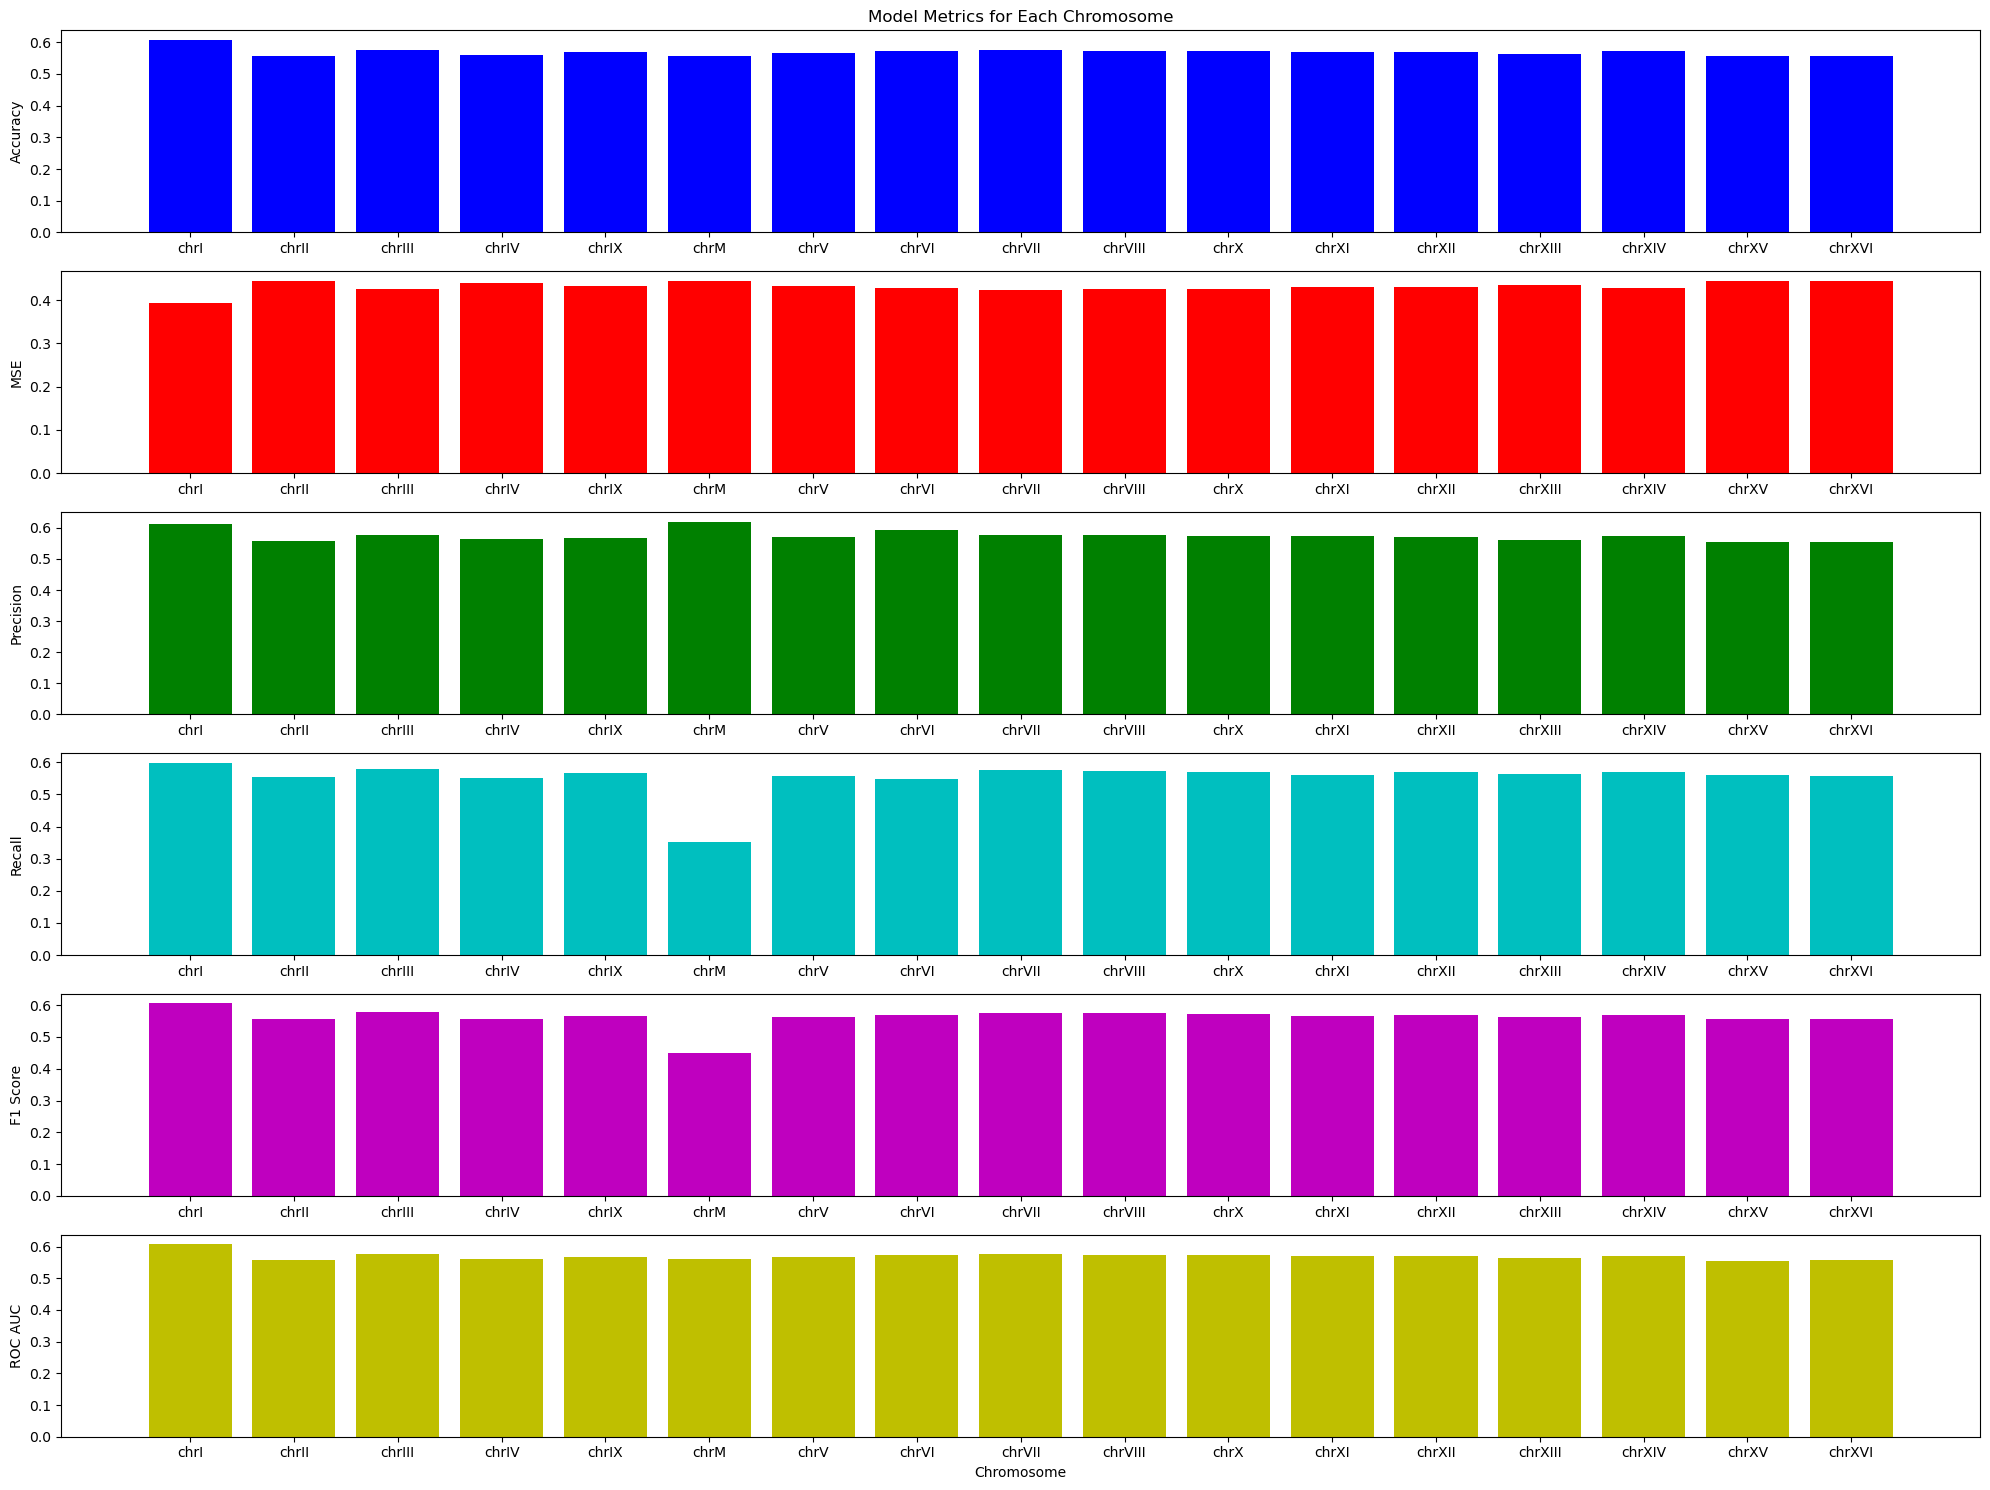

In [8]:
#Supplementary code 10a 

# Description : This program calculates the metrics values for each chromomomes and trying to visualize the same.

import matplotlib.pyplot as plt

# Chromosome names
chromosomes = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrM', 'chrV', 'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV', 'chrXV', 'chrXVI']

# Metric values for each chromosome
accuracy = [0.6073, 0.5570, 0.5756, 0.5607, 0.5683, 0.5561, 0.5666, 0.5731, 0.5763, 0.5736, 0.5735, 0.5703, 0.5696, 0.5644, 0.5711, 0.5556, 0.5563]
MSE = [0.3927, 0.4430, 0.4244, 0.4393, 0.4317, 0.4439, 0.4334, 0.4269, 0.4237, 0.4264, 0.4265, 0.4296, 0.4304, 0.4356, 0.4289, 0.4444, 0.4437]
precision = [0.6122, 0.5591, 0.5786, 0.5643, 0.5685, 0.6202, 0.5704, 0.5927, 0.5765, 0.5773, 0.5728, 0.5726, 0.5696, 0.5598, 0.5724, 0.5545, 0.5547]
recall = [0.5994, 0.5542, 0.5794, 0.5510, 0.5654, 0.3532, 0.5584, 0.5479, 0.5767, 0.5718, 0.5710, 0.5592, 0.5710, 0.5636, 0.5686, 0.5590, 0.5560]
f1_score = [0.6057, 0.5567, 0.5790, 0.5576, 0.5669, 0.4501, 0.5643, 0.5695, 0.5766, 0.5745, 0.5719, 0.5658, 0.5703, 0.5617, 0.5705, 0.5567, 0.5553]
roc_auc = [0.6074, 0.5571, 0.5755, 0.5607, 0.5683, 0.5621, 0.5667, 0.5739, 0.5763, 0.5736, 0.5735, 0.5704, 0.5696, 0.5644, 0.5711, 0.5556, 0.5563]

plt.figure(figsize=(20, 15))

# Plot accuracy
plt.subplot(6, 1, 1)
plt.bar(chromosomes, accuracy, color='b')
plt.ylabel('Accuracy')
plt.title('Model Metrics for Each Chromosome')

# Plot MSE
plt.subplot(6, 1, 2)
plt.bar(chromosomes, MSE, color='r')
plt.ylabel('MSE')

# Plot precision
plt.subplot(6, 1, 3)
plt.bar(chromosomes, precision, color='g')
plt.ylabel('Precision')

# Plot recall
plt.subplot(6, 1, 4)
plt.bar(chromosomes, recall, color='c')
plt.ylabel('Recall')

# Plot F1 score
plt.subplot(6, 1, 5)
plt.bar(chromosomes, f1_score, color='m')
plt.ylabel('F1 Score')

# Plot ROC AUC
plt.subplot(6, 1, 6)
plt.bar(chromosomes, roc_auc, color='y')
plt.ylabel('ROC AUC')
plt.xlabel('Chromosome')

plt.tight_layout()
plt.show()

In [ ]:
# Supplementary code 11a  

# Description : This program is a feature reduction program which does the feature reduction using RFE and trying to see
# what are the best 8 features to be taken from RFE for further prediction of pol-II pause using Random Forest.
# This code also ran in VM in personal environment /Macleod1

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',

'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    #Recursive Feature Elimination (RFE)
    from sklearn.feature_selection import RFE
    selector = RFE(clf, n_features_to_select=10, step=1)
    selector = selector.fit(X_train, y_train)
    print(selector.support_)
    print(selector.ranking_)
    
    print("\n----------------------------------\n")


In [ ]:
# Thesis code 11a  Output.

#Chromosome: chrI
#Accuracy: 0.5942971485742872
#MSE: 0.40570285142571283
#Precision: 0.601593625498008
#Recall: 0.5950738916256157
#F1 Score: 0.5983159980188213
#ROC AUC Score: 0.5942849132924827
#Confusion Matrix: 
#[[584 400]
# [411 604]]


#[False  True False  True False  True False  True False False  True False
#  True False False False False False  True False False False  True  True
# False  True]
#[11  1 17  1  6  1  5  1 12 15  1 10  1 16  3  7 14  2  1 13  9  4  1  1
#  8  1]

----------------------------------

#Chromosome: chrII
#Accuracy: 0.5799342505783514
#MSE: 0.4200657494216486
#Precision: 0.5779252704031466
#Recall: 0.5756611165523996
#F1 Score: 0.5767909715407262
#ROC AUC Score: 0.5799109651543785
#Confusion Matrix: 
#[[2412 1717]
# [1733 2351]]


#[ True  True False False False False  True False  True False False  True
# False False  True False  True  True  True False False False False False
# False  True]
#[ 1  1 15 11  9  7  1  5  1 17 13  1  6 16  1 12  1  1  1 10 14  2  4  3
#  8  1]

----------------------------------

#Chromosome: chrIII
#Accuracy: 0.6147098515519568
#MSE: 0.3852901484480432
#Precision: 0.6179310344827587
#Recall: 0.6037735849056604
#F1 Score: 0.610770279481936
#ROC AUC Score: 0.6147246302906679
#Confusion Matrix: 
#[[926 554]
# [588 896]]


#[ True  True  True  True False False  True  True False False False False
# False False  True  True False False False False False False False False
#  True  True]
#[ 1  1  1  1 11  4  1  1 15  8  9 12 10 17  1  1 14  2  3 13 16  6  7  5
#  1  1]

----------------------------------

#Chromosome: chrIV
#Accuracy: 0.5821511821511821
#MSE: 0.41784881784881783
#Precision: 0.5841278367127702
#Recall: 0.5779194898365883
#F1 Score: 0.5810070789368238
#ROC AUC Score: 0.5821622021832514
#Confusion Matrix: 
#[[4391 3097]
# [3177 4350]]


#[ True  True False  True False False  True  True False False False  True
# False False False  True False False False False False False  True  True
# False  True]
#[ 1  1 17  1 16  9  1  1  8  7  5  1 11 15  3  1 13  2  4 12 14  6  1  1
# 10  1]

----------------------------------

#Chromosome: chrIX
#Accuracy: 0.5808908377567505
#MSE: 0.41910916224324946
#Precision: 0.5882631329862754
#Recall: 0.5678391959798995
#F1 Score: 0.5778707577870758
#ROC AUC Score: 0.5810278069451736
#Confusion Matrix: 
#[[1274  870]
# [ 946 1243]]


#[ True  True False False False False False  True False False False False
#  True False  True  True False  True  True False False  True False False
# False  True]
#[ 1  1 16 15  9  6  3  1  8 17 11  5  1  4  1  1 12  1  1 14 13  1  2  7
# 10  1]

----------------------------------

#Chromosome: chrM
#Accuracy: 0.5881753312945973
#MSE: 0.41182466870540263
#Precision: 0.5886524822695035
#Recall: 0.6587301587301587
#F1 Score: 0.6217228464419475
#ROC AUC Score: 0.586178496555855
#Confusion Matrix: 
#[[245 232]
# [172 332]]


#[False False  True False False False False False False  True False False
# False  True  True  True  True  True False False  True False  True  True
# False False]
#[ 8 16  1  7  4 12 11 15 17  1 14 13  9  1  1  1  1  1  2  6  1 10  1  1
#  3  5]

----------------------------------

#Chromosome: chrV
#Accuracy: 0.5736170212765958
#MSE: 0.42638297872340425
#Precision: 0.5716230010207554
#Recall: 0.5741626794258373
#F1 Score: 0.5728900255754475
#ROC AUC Score: 0.573619149139843
#Confusion Matrix: 
#[[1690 1259]
# [1246 1680]]


#[ True  True False False False False  True False False False  True False
#  True False  True False False  True False False False  True False  True
# False  True]
#[ 1  1 16 12  8 14  1  4  5 17  1  7  1 15  1 10  2  1  6 11  9  1  3  1
# 13  1]

----------------------------------

#Chromosome: chrVI
#Accuracy: 0.5771084337349398
#MSE: 0.42289156626506025
#Precision: 0.5821484992101106
#Recall: 0.584456780333069
#F1 Score: 0.5833003561535418
#ROC AUC Score: 0.5770127677092523
#Confusion Matrix: 
#[[700 529]
# [524 737]]


#[False  True False False False False  True False  True False False  True
# False False False False  True  True False False False  True  True  True
# False  True]
#[ 4  1 16 15  8 14  1 11  1 17  6  1 12 13  3  5  1  1  2  9  7  1  1  1
# 10  1]

----------------------------------

#Chromosome: chrVII
#Accuracy: 0.5817177109675002
#MSE: 0.41828228903249975
#Precision: 0.582365263759284
#Recall: 0.5736259613580942
#F1 Score: 0.5779625779625779
#ROC AUC Score: 0.5817063589057587
#Confusion Matrix: 
#[[3153 2193]
# [2273 3058]]


#[False  True False  True False False  True False False False False  True
#  True False False  True False  True False False False False  True  True
# False  True]
#[ 4  1 17  1 14  7  1  8 11 10 12  1  1 16  2  1 15  1  5  9  6  3  1  1
# 13  1]

----------------------------------

#Chromosome: chrVIII
#Accuracy: 0.5858236151603499
#MSE: 0.41417638483965014
#Precision: 0.588127519237816
#Recall: 0.5827886710239651
#F1 Score: 0.5854459237643627
#ROC AUC Score: 0.5858347159070082
#Confusion Matrix: 
#[[1610 1124]
#[1149 1605]]


#[ True  True False False  True False  True False False False False  True
# False False  True False False  True False False False  True  True False
# False  True]
#[ 1  1 17 11  1 10  1  7 13 16  9  1  6 15  1  8  4  1  3 14 12  1  1  2
#  5  1]

#----------------------------------

#Chromosome: chrX
#Accuracy: 0.57954699579547
#MSE: 0.42045300420453
#Precision: 0.5792229264260127
#Recall: 0.5719727891156463
#F1 Score: 0.5755750273822563
#ROC AUC Score: 0.5795234416102839
#Confusion Matrix: 
#[[2171 1527]
# [1573 2102]]


#[ True  True False  True False False False  True False False False False
# False False  True  True False  True  True False False  True False False
# False  True]
#[ 1  1 16  1 11  8  6  1  9 17  7  2  4 14  1  1 12  1  1 15 10  1  3  5
# 13  1]

----------------------------------

#Chromosome: chrXI
#Accuracy: 0.564079822616408
#MSE: 0.435920177383592
#Precision: 0.5656901238296587
#Recall: 0.5534869976359338
#F1 Score: 0.5595220313666915
#ROC AUC Score: 0.564084522183835
#Confusion Matrix: 
#[[1943 1438]
 [1511 1873]]


#[False  True False False False False  True  True False False  True False
# False  True False False False  True  True False False False  True  True
# False  True]
#[ 4  1 17  7 15  8  1  1 14 16  1  3 13  1  2  6 12  1  1 11 10  5  1  1
#  9  1]

----------------------------------

#Chromosome: chrXII
#Accuracy: 0.5909001378766988
#MSE: 0.4090998621233012
#Precision: 0.5920764483376468
#Recall: 0.5855483362866706
#F1 Score: 0.5887942981587805
#ROC AUC Score: 0.5909022469610693
#Confusion Matrix: 
#[[3026 2049]
# [2105 2974]]


#[False  True False False False False False False  True False False False
#  True False  True False  True  True False False False  True  True  True
# False  True]
#[ 2  1 16 11 14 10  4  5  1 17 15  8  1 12  1  6  1  1  3  9 13  1  1  1
#  7  1]

----------------------------------

#Chromosome: chrXIII
#Accuracy: 0.5745182012847966
#MSE: 0.4254817987152034
#Precision: 0.5699157121244867
#Recall: 0.5706557022289548
#F1 Score: 0.5702854671280277
#ROC AUC Score: 0.5744780948101756
#Confusion Matrix: 
#[[2729 1990]
# [1984 2637]]


#[ True  True False False False False  True  True  True False False False
# False False  True False  True  True  True False False False False False
# False  True]
#[ 1  1 17  9 14 10  1  1  1 15  4  8 16 12  1 13  1  1  1  5 11  3  6  2
#  7  1]

----------------------------------

#Chromosome: chrXIV
#Accuracy: 0.5734265734265734
#MSE: 0.42657342657342656
#Precision: 0.5786855197695732
#Recall: 0.5586450960566228
#F1 Score: 0.5684887459807074
#ROC AUC Score: 0.5735154362350139
#Confusion Matrix: 
#[[2300 1609]
# [1746 2210]]


#[ True  True False False False False  True False  True False False  True
# False False  True False  True  True  True False False False False False
# False  True]
#[ 1  1 17 16 11  8  1  5  1 15 13  1  7 14  1  6  1  1  1 10  9  4  2  3
# 12  1]

----------------------------------

#Chromosome: chrXV
#Accuracy: 0.5722768602709223
#MSE: 0.4277231397290778
#Precision: 0.5721225710014948
#Recall: 0.5689334819769603
#F1 Score: 0.5705235699645985
#ROC AUC Score: 0.5722725230492659
#Confusion Matrix: 
#[[3106 2290]
# [2320 3062]]


#[ True  True False False False False  True  True False False False  True
# False False False False  True  True  True False False False False  True
# False  True]
#[ 1  1 17 15 13  7  1  1  6 14  5  1  3 16  2 12  1  1  1  8 11 10  4  1
#  9  1]

----------------------------------

#Chromosome: chrXVI
#Accuracy: 0.5797748034841725
#MSE: 0.4202251965158275
#Precision: 0.5781548250265112
#Recall: 0.5808651182612401
#F1 Score: 0.5795068027210883
#ROC AUC Score: 0.5797780367836597
#Confusion Matrix: 
#[[2732 1989]
# [1967 2726]]


#[ True  True False  True False False False  True  True False False False
# False False False False False False  True False False  True  True  True
# False  True]
#[ 1  1 12  1 16 11  3  1  1 17  9  8  2 14  6  4  7  5  1 10 15  1  1  1
# 13  1]

In [ ]:
# Input for Thesis code 11b  - 
#Histone 2
#Histone 7
#Histone 9
#Histone 18
#Histone 19
#Histone 23
#Histone 24
#Histone 26
#These eight histones appear most frequently with a rank of 1.

In [ ]:
# Supplementary code 11b - With 8 best feature from RFE

#Description : This program uses the best features, which identified by RFE and does the Random Forest Binary classification
# using only those features ( not entire 26 histone modification data, only 8 histone modification data). Please find the
# above cell to know which features we need to take and observe the 'wig_files' list where we only took those 8 histone
# modification data

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig']  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    #Recursive Feature Elimination (RFE)
    from sklearn.feature_selection import RFE
    selector = RFE(clf, n_features_to_select=10, step=1)
    selector = selector.fit(X_train, y_train)
    print(selector.support_)
    print(selector.ranking_)
    
    print("\n----------------------------------\n")

In [ ]:
#Output of 11b 
Chromosome: chrI
Accuracy: 0.5950950950950951
MSE: 0.4049049049049049
Precision: 0.5988428158148505
Recall: 0.6124260355029586
F1 Score: 0.605558264261336
ROC AUC Score: 0.594830903930341
Confusion Matrix: 
[[568 416]
 [393 621]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrII
Accuracy: 0.5603847090333577
MSE: 0.4396152909666423
Precision: 0.5600879335613093
Recall: 0.5588593711918108
F1 Score: 0.5594729779187508
ROC AUC Score: 0.560383224880751
Confusion Matrix: 
[[2310 1801]
 [1810 2293]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrIII
Accuracy: 0.5848801889976375
MSE: 0.41511981100236245
Precision: 0.5997171145685997
Recall: 0.5608465608465608
F1 Score: 0.579630895420369
ROC AUC Score: 0.5853853755301033
Confusion Matrix: 
[[885 566]
 [664 848]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrIV
Accuracy: 0.5720279720279721
MSE: 0.427972027972028
Precision: 0.574482478690299
Recall: 0.5641025641025641
F1 Score: 0.5692452071323234
ROC AUC Score: 0.572048611111111
Confusion Matrix: 
[[4343 3145]
 [3281 4246]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrIX
Accuracy: 0.5725825063466421
MSE: 0.42741749365335796
Precision: 0.5729020159399906
Recall: 0.5649560795191864
F1 Score: 0.568901303538175
ROC AUC Score: 0.5725702056582107
Confusion Matrix: 
[[1259  911]
 [ 941 1222]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrM
Accuracy: 0.5653061224489796
MSE: 0.4346938775510204
Precision: 0.5924170616113744
Recall: 0.49603174603174605
F1 Score: 0.5399568034557235
ROC AUC Score: 0.56734360410831
Confusion Matrix: 
[[304 172]
 [254 250]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrV
Accuracy: 0.5681702127659575
MSE: 0.43182978723404253
Precision: 0.56951871657754
Recall: 0.5770402980020318
F1 Score: 0.5732548359966357
ROC AUC Score: 0.5681231606368817
Confusion Matrix: 
[[1634 1288]
 [1249 1704]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrVI
Accuracy: 0.5746987951807229
MSE: 0.42530120481927713
Precision: 0.5766192733017378
Recall: 0.5826017557861133
F1 Score: 0.5795950774116713
ROC AUC Score: 0.5746476846836791
Confusion Matrix: 
[[701 536]
 [523 730]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrVII
Accuracy: 0.5896235250046825
MSE: 0.4103764749953175
Precision: 0.584980988593156
Recall: 0.5832069749810462
F1 Score: 0.584092634776006
ROC AUC Score: 0.5895486929699751
Confusion Matrix: 
[[3219 2183]
 [2199 3077]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrVIII
Accuracy: 0.5716107871720116
MSE: 0.42838921282798836
Precision: 0.5770338372930166
Recall: 0.5768261964735516
F1 Score: 0.576929998200468
ROC AUC Score: 0.5715434046228962
Confusion Matrix: 
[[1534 1175]
 [1176 1603]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrX
Accuracy: 0.589041095890411
MSE: 0.410958904109589
Precision: 0.5886232481450948
Recall: 0.5828571428571429
F1 Score: 0.5857260049220674
ROC AUC Score: 0.5890218651008267
Confusion Matrix: 
[[2201 1497]
 [1533 2142]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXI
Accuracy: 0.5743422997339639
MSE: 0.42565770026603605
Precision: 0.5773573390296003
Recall: 0.5586064363743726
F1 Score: 0.5678271308523409
ROC AUC Score: 0.5743609275686601
Confusion Matrix: 
[[1994 1385]
 [1495 1892]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXII
Accuracy: 0.5964152058302147
MSE: 0.4035847941697853
Precision: 0.5956513066028326
Recall: 0.5904686573067036
F1 Score: 0.5930486593843098
ROC AUC Score: 0.5963918723064812
Confusion Matrix: 
[[3070 2027]
 [2071 2986]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXIII
Accuracy: 0.570189527786701
MSE: 0.42981047221329904
Precision: 0.5713972842750766
Recall: 0.5591513073296185
F1 Score: 0.5652079722703639
ROC AUC Score: 0.5701812603414624
Confusion Matrix: 
[[2716 1957]
 [2057 2609]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXIV
Accuracy: 0.5700483091787439
MSE: 0.42995169082125606
Precision: 0.5692228512609367
Recall: 0.5642857142857143
F1 Score: 0.5667435306174737
ROC AUC Score: 0.5700293244515242
Confusion Matrix: 
[[2272 1674]
 [1708 2212]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXV
Accuracy: 0.5734830209686398
MSE: 0.42651697903136015
Precision: 0.5729981378026071
Recall: 0.5718267979929381
F1 Score: 0.5724118686633801
ROC AUC Score: 0.5734805659410679
Confusion Matrix: 
[[3104 2293]
 [2304 3077]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXVI
Accuracy: 0.5840237943488421
MSE: 0.41597620565115784
Precision: 0.5841820151679307
Recall: 0.5744726187939484
F1 Score: 0.5792866351525569
ROC AUC Score: 0.5839954705916364
Confusion Matrix: 
[[2802 1919]
 [1997 2696]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

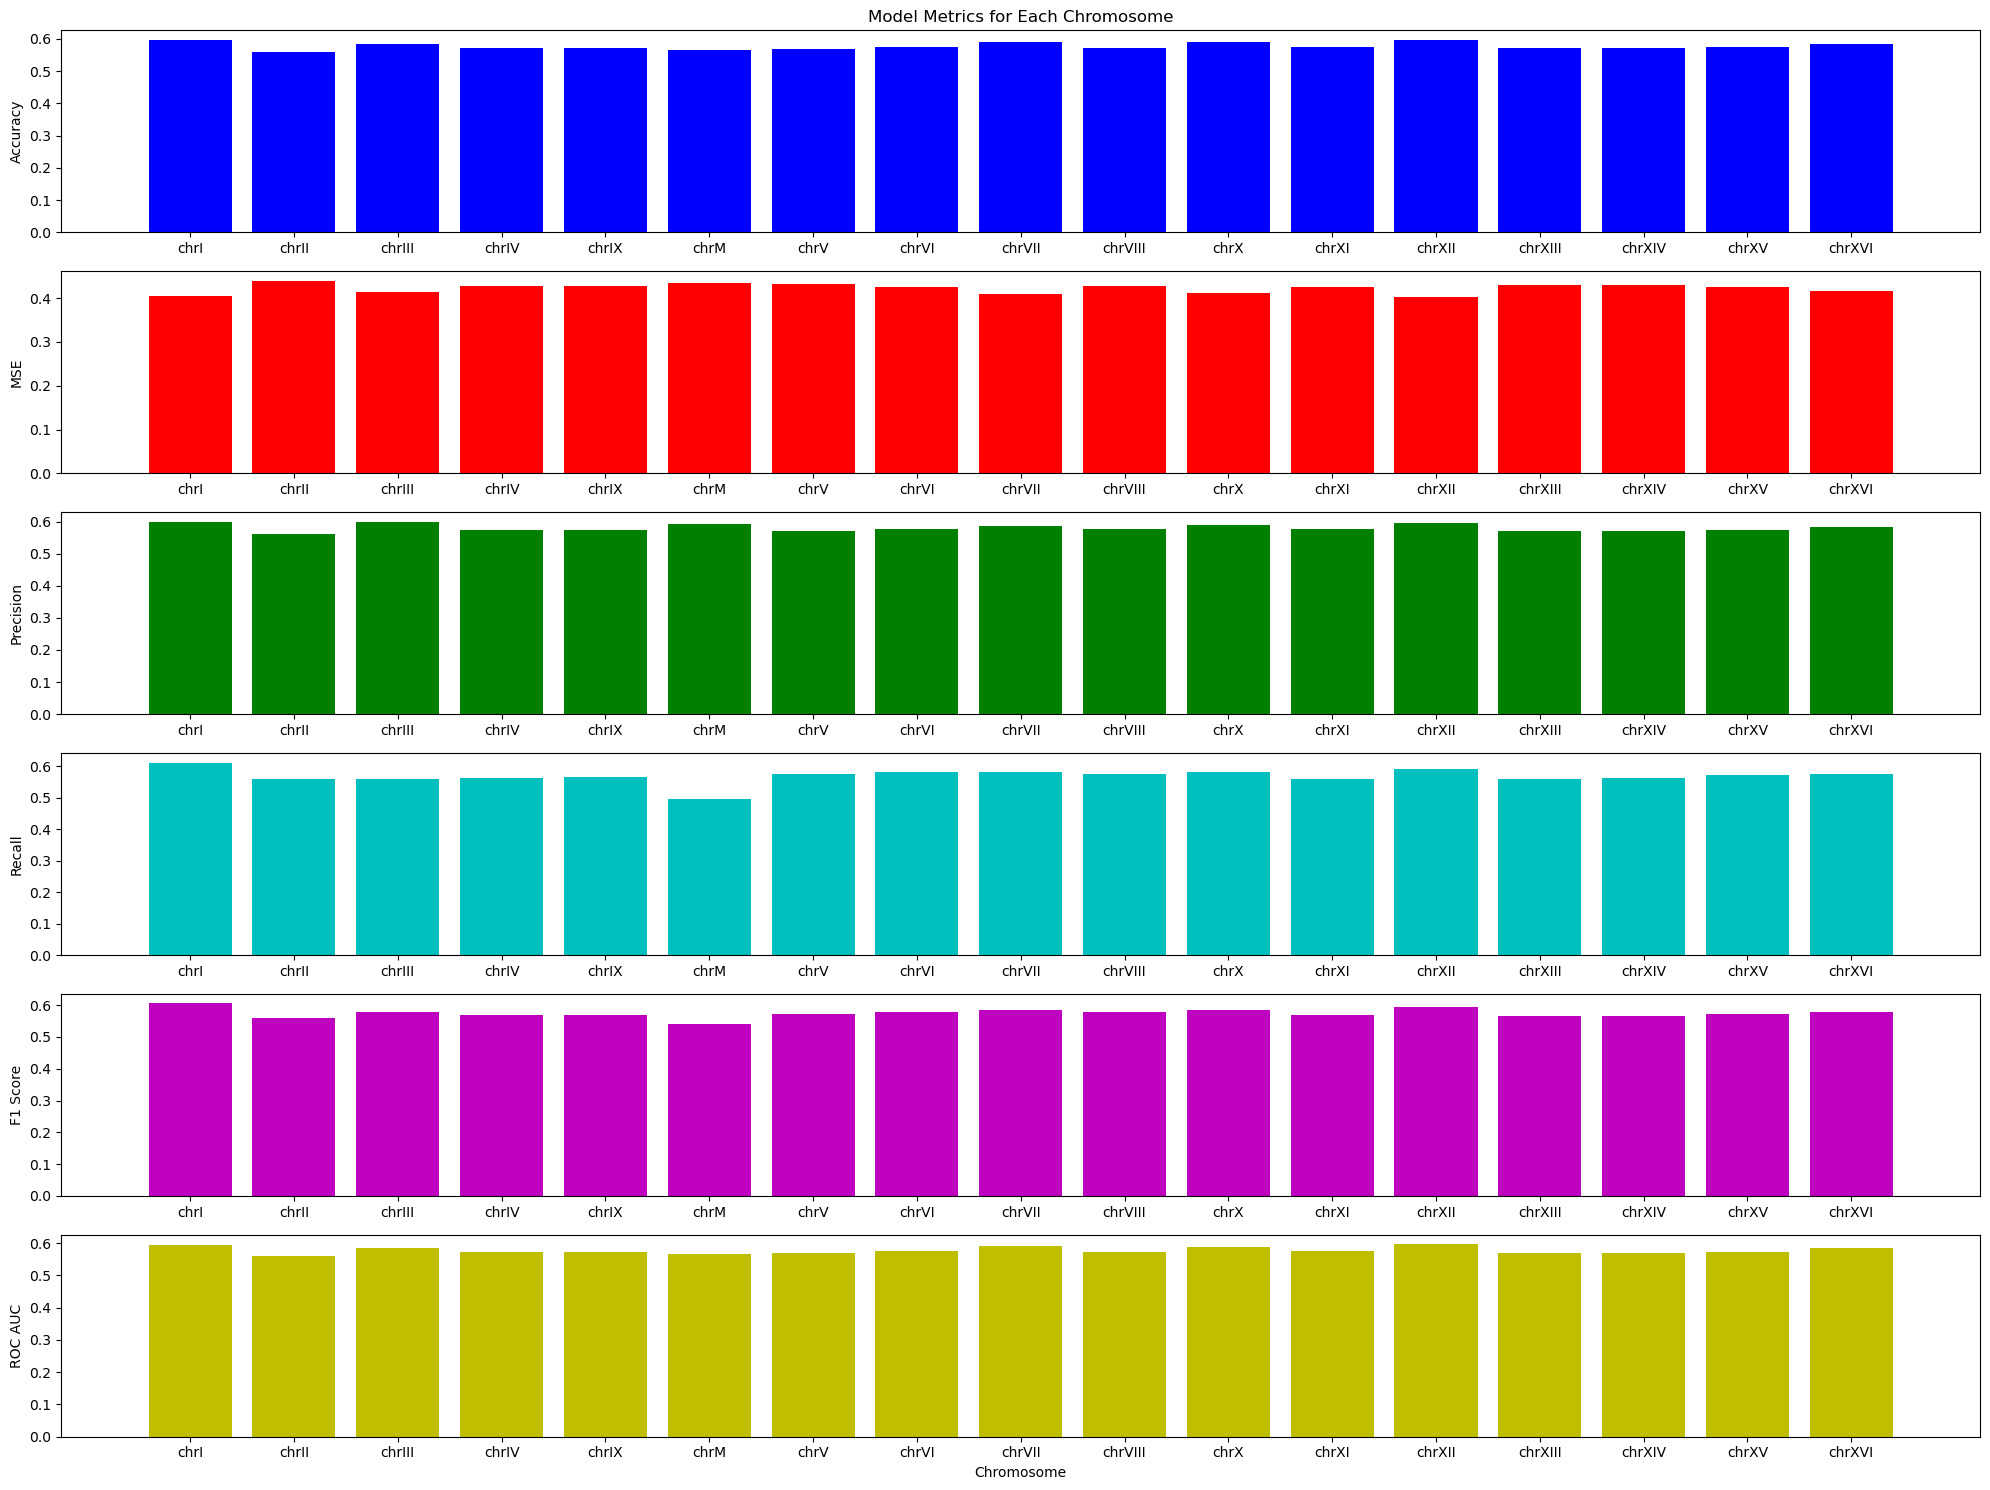

In [7]:
# Supplementary code 11b  visualization.

# Description : This program creates the visualization of consolidated metric values of each chromsome, which we got using
# above Random forest execution using RFE.

import matplotlib.pyplot as plt

# Chromosome names
chromosomes = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrM', 'chrV', 'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV', 'chrXV', 'chrXVI']

# Metric values for each chromosome
accuracy = [0.5951, 0.5604, 0.5849, 0.5720, 0.5726, 0.5653, 0.5682, 0.5747, 0.5896, 0.5716, 0.5890, 0.5743, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]
MSE = [0.4049, 0.4396, 0.4151, 0.4280, 0.4274, 0.4347, 0.4318, 0.4253, 0.4104, 0.4284, 0.4110, 0.4257, 0.4036, 0.4298, 0.4300, 0.4265, 0.4160]
precision = [0.5988, 0.5601, 0.5997, 0.5745, 0.5729, 0.5924, 0.5695, 0.5766, 0.5850, 0.5770, 0.5886, 0.5774, 0.5957, 0.5714, 0.5692, 0.5730, 0.5842]
recall = [0.6124, 0.5589, 0.5608, 0.5641, 0.5650, 0.4960, 0.5770, 0.5826, 0.5832, 0.5768, 0.5829, 0.5586, 0.5905, 0.5592, 0.5643, 0.5718, 0.5745]
f1_score = [0.6056, 0.5595, 0.5796, 0.5692, 0.5689, 0.5400, 0.5733, 0.5796, 0.5841, 0.5769, 0.5857, 0.5678, 0.5930, 0.5652, 0.5667, 0.5724, 0.5793]
roc_auc = [0.5948, 0.5604, 0.5854, 0.5720, 0.5726, 0.5673, 0.5681, 0.5746, 0.5895, 0.5715, 0.5890, 0.5744, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]

plt.figure(figsize=(20, 15))

# Plot accuracy
plt.subplot(6, 1, 1)
plt.bar(chromosomes, accuracy, color='b')
plt.ylabel('Accuracy')
plt.title('Model Metrics for Each Chromosome')

# Plot MSE
plt.subplot(6, 1, 2)
plt.bar(chromosomes, MSE, color='r')
plt.ylabel('MSE')

# Plot precision
plt.subplot(6, 1, 3)
plt.bar(chromosomes, precision, color='g')
plt.ylabel('Precision')

# Plot recall
plt.subplot(6, 1, 4)
plt.bar(chromosomes, recall, color='c')
plt.ylabel('Recall')

# Plot F1 score
plt.subplot(6, 1, 5)
plt.bar(chromosomes, f1_score, color='m')
plt.ylabel('F1 Score')

# Plot ROC AUC
plt.subplot(6, 1, 6)
plt.bar(chromosomes, roc_auc, color='y')
plt.ylabel('ROC AUC')
plt.xlabel('Chromosome')

plt.tight_layout()
plt.show()


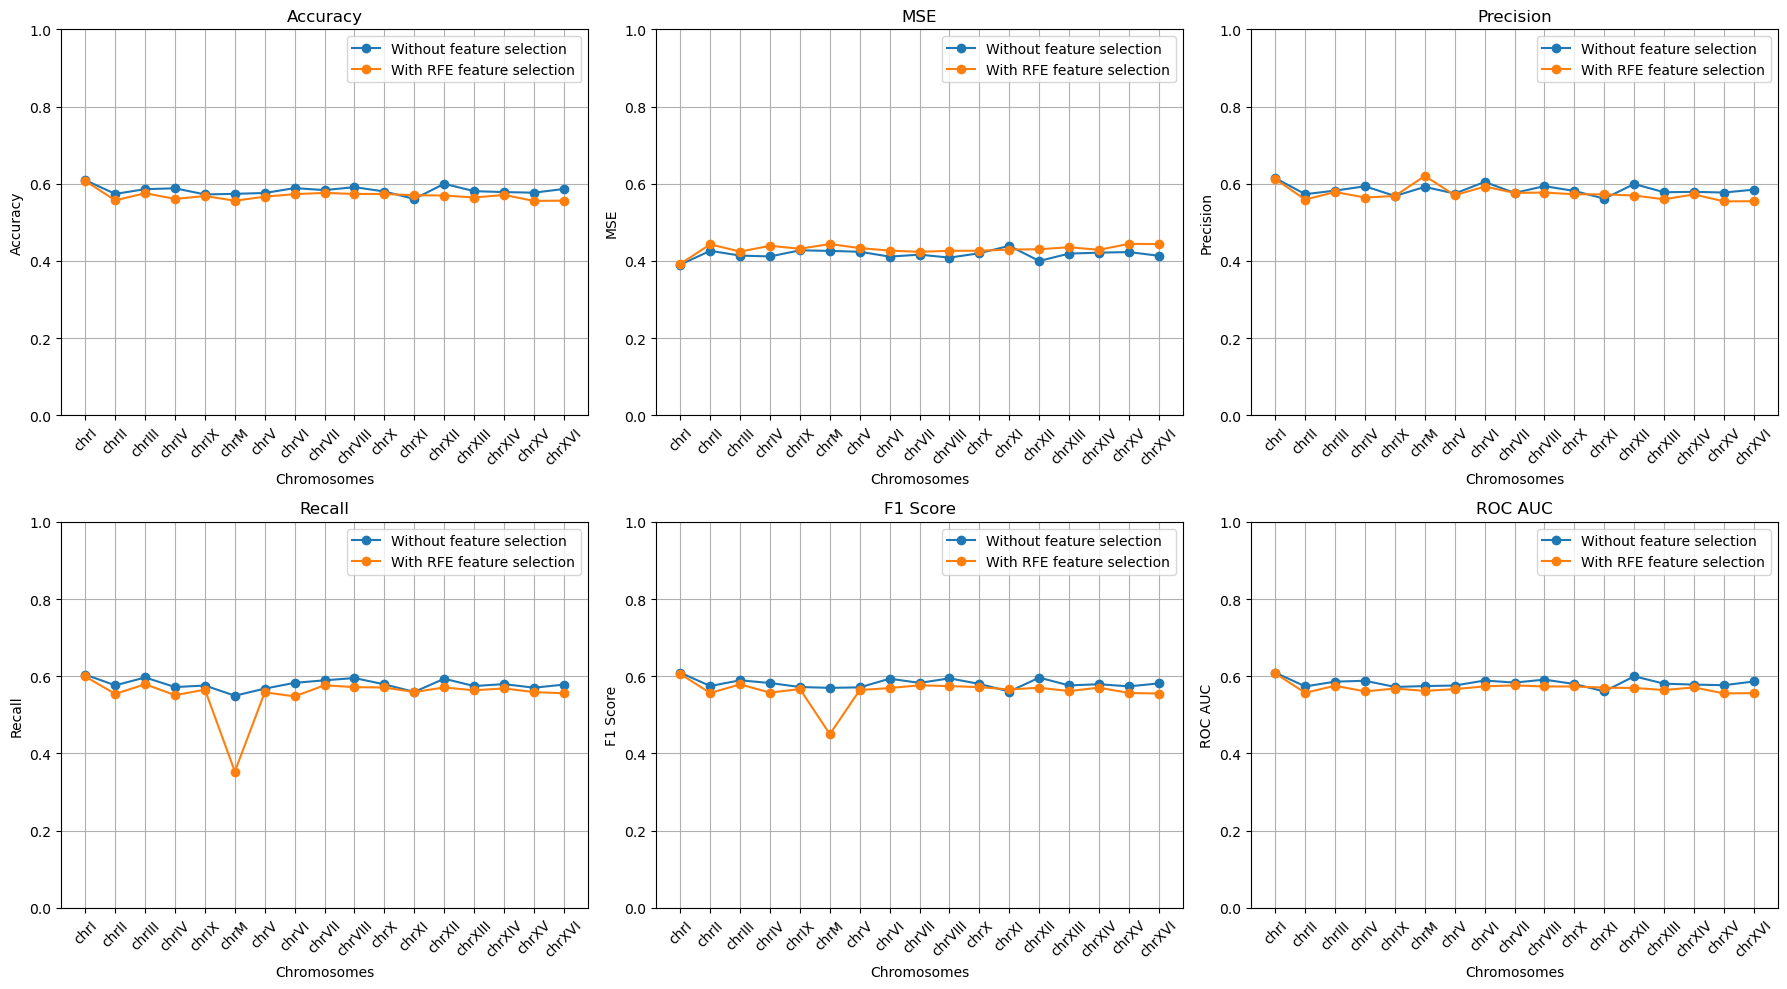

In [18]:
# Supplementary code 11c 

# Description : This program gives us a visual comparison of parameter metric values of Random forest without any
# specific feature reduction and with RFE feature reduction.

import matplotlib.pyplot as plt



chromosomes = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrM', 'chrV', 'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV', 'chrXV', 'chrXVI']

# Metrics without feature selection
accuracy_no_fs = [0.609304652326163, 0.5737245829782053, 0.5860323886639676, 0.5882509657652857, 0.572351719363028, 
                  0.5739041794087666, 0.5760980592441267, 0.5887550200803213, 0.5835518920944174, 0.5912900874635568,
                  0.5799538857995389, 0.5607449009754656, 0.5999606066574749, 0.5808351177730193, 0.5784388507500635,
                  0.5768766818223996, 0.5865108868826341]
mse_no_fs = [0.3906953476738369, 0.4262754170217947, 0.4139676113360324, 0.41174903423471426, 0.4276482806369721,
             0.4260958205912334, 0.42390194075587334, 0.41124497991967873, 0.4164481079055826, 0.4087099125364432,
             0.4200461142004611, 0.4392550990245344, 0.40003939334252514, 0.41916488222698073, 0.42156114924993643,
             0.42312331817760046, 0.4134891131173659]
precision_no_fs = [0.6145307769929365, 0.5730201017195447, 0.5822868473231989, 0.5934791580685101, 0.568348623853211,
                   0.5918803418803419, 0.5746449601662625, 0.6046887631366209, 0.5763592503247356, 0.5938628158844765,
                   0.5813637598478675, 0.5614814814814815, 0.5993212218007586, 0.5780334273930975, 0.579107505070994,
                   0.5772846934937946, 0.5847384349329875]
recall_no_fs = [0.6041666666666666, 0.5765107212475633, 0.5968834688346883, 0.5720726694072404, 0.5760111576011158,
                0.5496031746031746, 0.5679561793906196, 0.583008573655495, 0.5894856709052951, 0.5953673543250091,
                0.579004329004329, 0.5594921759669323, 0.5936325884912003, 0.5746655157531291, 0.5796954314720812,
                0.5704199182460052, 0.5783621979901646]
f1_score_no_fs = [0.6093046523261632, 0.5747601117454147, 0.5894948143191703, 0.5825793382849427, 0.5721542368967907,
                  0.5699588477366255, 0.5712809917355373, 0.5936507936507937, 0.5828485644586225, 0.594614133381529,
                  0.5801816456554155, 0.5604850635906536, 0.596463341943175, 0.5763445514554703, 0.5794013191273465,
                  0.5738317757009347, 0.5815328388691821]
roc_auc_no_fs = [0.6093487218298015, 0.5737262781219564, 0.5860761430194947, 0.5883245723591802, 0.5723777144559199,
                 0.5745919436957173, 0.5760539447579579, 0.5889359355435719, 0.5836276144428455, 0.5912616588138807,
                 0.5799563391010223, 0.5607463839290121, 0.5999357762938637, 0.580787921497474, 0.5784366102852001,
                 0.576868902589175, 0.5864584312027649]

# Metrics with feature selection
accuracy = [0.5951, 0.5604, 0.5849, 0.5720, 0.5726, 0.5653, 0.5682, 0.5747, 0.5896, 0.5716, 0.5890, 0.5743, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]
MSE = [0.4049, 0.4396, 0.4151, 0.4280, 0.4274, 0.4347, 0.4318, 0.4253, 0.4104, 0.4284, 0.4110, 0.4257, 0.4036, 0.4298, 0.4300, 0.4265, 0.4160]
precision = [0.5988, 0.5601, 0.5997, 0.5745, 0.5729, 0.5924, 0.5695, 0.5766, 0.5850, 0.5770, 0.5886, 0.5774, 0.5957, 0.5714, 0.5692, 0.5730, 0.5842]
recall = [0.6124, 0.5589, 0.5608, 0.5641, 0.5650, 0.4960, 0.5770, 0.5826, 0.5832, 0.5768, 0.5829, 0.5586, 0.5905, 0.5592, 0.5643, 0.5718, 0.5745]
f1_score = [0.6056, 0.5595, 0.5796, 0.5692, 0.5689, 0.5400, 0.5733, 0.5796, 0.5841, 0.5769, 0.5857, 0.5678, 0.5930, 0.5652, 0.5667, 0.5724, 0.5793]
roc_auc = [0.5948, 0.5604, 0.5854, 0.5720, 0.5726, 0.5673, 0.5681, 0.5746, 0.5895, 0.5715, 0.5890, 0.5744, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]

metrics_no_fs = [accuracy_no_fs, mse_no_fs, precision_no_fs, recall_no_fs, f1_score_no_fs, roc_auc_no_fs]
metrics_fs = [accuracy_fs, mse_fs, precision_fs, recall_fs, f1_score_fs, roc_auc_fs]
metric_names = ['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Define y-axis limits for each metric
ylimits = {
    'Accuracy': [0, 1],
    'MSE': [0, 1],
    'Precision': [0, 1],
    'Recall': [0, 1],
    'F1 Score': [0, 1],
    'ROC AUC': [0, 1]
}

fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns, total figure size

for i in range(len(metric_names)):
    row = i // 3  # Determines row number: 0 or 1
    col = i % 3   # Determines column number: 0, 1 or 2
    
    axs[row, col].plot(chromosomes, metrics_no_fs[i], marker='o', label='Without feature selection')
    axs[row, col].plot(chromosomes, metrics_fs[i], marker='o', label='With RFE feature selection')
    axs[row, col].set_title(metric_names[i])
    axs[row, col].set_xlabel('Chromosomes')
    axs[row, col].set_ylabel(metric_names[i])
    axs[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axs[row, col].legend()
    axs[row, col].grid(True)
    
    axs[row, col].set_ylim(ylimits[metric_names[i]])  # Set the y-axis limit based on the metric

plt.tight_layout()  # Adjusts subplot params so that subplots don’t overlap
plt.show()

In [ ]:
# Supplementary code 12a  
#
# Description : This program is a prephase program to generate Random forest parameter metric values to compare 
# the same when we add DNA-binding protiens measurements as features along with Histone modification data to observe 
# the variations. Here we took only two Histone modification data files as the same additionally with DNA-Binding protiens
# (upcoming Jupyter cells) was taking long time.



#Thesis code 1
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1',   'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    




In [ ]:
# Supplementary code 12a  Results
Chromosome: chrI
Accuracy: 0.529029029029029
MSE: 0.47097097097097096
Precision: 0.5436105476673428
Recall: 0.5219084712755598
F1 Score: 0.5325384997516145
ROC AUC Score: 0.5292343592217139
Confusion Matrix: 
[[521 450]
 [491 536]]


Chromosome: chrII
Accuracy: 0.5104699293888483
MSE: 0.48953007061115167
Precision: 0.5149583128984796
Recall: 0.5068790731354091
F1 Score: 0.5108867534363215
ROC AUC Score: 0.51050168346036
Confusion Matrix: 
[[2093 1978]
 [2043 2100]]


Chromosome: chrIII
Accuracy: 0.529689608636977
MSE: 0.47031039136302294
Precision: 0.5294502617801047
Recall: 0.5451482479784366
F1 Score: 0.5371845949535192
ROC AUC Score: 0.5296687185838129
Confusion Matrix: 
[[761 719]
 [675 809]]


Chromosome: chrIV
Accuracy: 0.5131535131535132
MSE: 0.48684648684648685
Precision: 0.5146088595664468
Recall: 0.5077720207253886
F1 Score: 0.5111675805804466
ROC AUC Score: 0.5131675274567113
Confusion Matrix: 
[[3883 3605]
 [3705 3822]]


Chromosome: chrIX
Accuracy: 0.5333487191322409
MSE: 0.46665128086775903
Precision: 0.5288590604026846
Recall: 0.5495118549511855
F1 Score: 0.5389876880984953
ROC AUC Score: 0.5334635351749512
Confusion Matrix: 
[[1129 1053]
 [ 969 1182]]


Chromosome: chrM
Accuracy: 0.4964322120285423
MSE: 0.5035677879714577
Precision: 0.65625
Recall: 0.041666666666666664
F1 Score: 0.07835820895522388
ROC AUC Score: 0.5093029350104823
Confusion Matrix: 
[[466  11]
 [483  21]]


Chromosome: chrV
Accuracy: 0.5192307692307693
MSE: 0.4807692307692308
Precision: 0.5207975249226539
Recall: 0.5142566191446029
F1 Score: 0.5175064047822374
ROC AUC Score: 0.5192443505279328
Confusion Matrix: 
[[1536 1394]
 [1431 1515]]


Chromosome: chrVI
Accuracy: 0.5483741469289442
MSE: 0.4516258530710558
Precision: 0.5636509207365893
Recall: 0.5482866043613707
F1 Score: 0.5558626135017766
ROC AUC Score: 0.548376939297504
Confusion Matrix: 
[[662 545]
 [580 704]]


Chromosome: chrVII
Accuracy: 0.522899690924417
MSE: 0.47710030907558304
Precision: 0.523537259386316
Recall: 0.5143231604568433
F1 Score: 0.5188893086513033
ROC AUC Score: 0.5229037091639539
Confusion Matrix: 
[[2836 2500]
 [2594 2747]]


Chromosome: chrVIII
Accuracy: 0.5335276967930029
MSE: 0.46647230320699706
Precision: 0.5398037077426391
Recall: 0.5343648794530407
F1 Score: 0.5370705244122965
ROC AUC Score: 0.5335168804795657
Confusion Matrix: 
[[1443 1266]
 [1294 1485]]


Chromosome: chrX
Accuracy: 0.5375016953750169
MSE: 0.46249830462498304
Precision: 0.5359761064349715
Recall: 0.5371428571428571
F1 Score: 0.5365588475129112
ROC AUC Score: 0.5375005794638028
Confusion Matrix: 
[[1989 1709]
 [1701 1974]]


Chromosome: chrXI
Accuracy: 0.5171445462607154
MSE: 0.4828554537392847
Precision: 0.5176159718144451
Recall: 0.5205196338943018
F1 Score: 0.5190637420874431
ROC AUC Score: 0.517140550892105
Confusion Matrix: 
[[1736 1643]
 [1624 1763]]


Chromosome: chrXII
Accuracy: 0.5264453856003152
MSE: 0.4735546143996848
Precision: 0.5258484609313339
Recall: 0.5256410256410257
F1 Score: 0.5257447228250148
ROC AUC Score: 0.5264443570070167
Confusion Matrix: 
[[2680 2403]
 [2405 2665]]


Chromosome: chrXIII
Accuracy: 0.5185740284766085
MSE: 0.4814259715233915
Precision: 0.5148005148005148
Recall: 0.517799352750809
F1 Score: 0.5162955792191029
ROC AUC Score: 0.5185681846626974
Confusion Matrix: 
[[2444 2262]
 [2235 2400]]


Chromosome: chrXIV
Accuracy: 0.5224354900216093
MSE: 0.4775645099783907
Precision: 0.5234813680449208
Recall: 0.5204262877442274
F1 Score: 0.5219493574246088
ROC AUC Score: 0.5224393282837285
Confusion Matrix: 
[[2059 1867]
 [1890 2051]]


Chromosome: chrXV
Accuracy: 0.5203191686769345
MSE: 0.4796808313230655
Precision: 0.522744220730798
Recall: 0.5179165127447358
F1 Score: 0.5203191686769345
ROC AUC Score: 0.5203303667377669
Confusion Matrix: 
[[2804 2560]
 [2610 2804]]


Chromosome: chrXVI
Accuracy: 0.5253877204164011
MSE: 0.4746122795835989
Precision: 0.523282522447275
Recall: 0.5342144532082712
F1 Score: 0.528691983122363
ROC AUC Score: 0.5254176225389229
Confusion Matrix: 
[[2440 2283]
 [2185 2506]]

In [ ]:
# Supplementary code 12b 

# Description : This program onwards we are adding DNA-binding protiens(ChIP-Exo ,which was present in BAM file format as discussed earlier)
# to Histone modification data ( not adding as such , adding as extra feature with histone modification data file) to know the changes in Random forest algorithm. In this program we are adding only
# two histone modification data file with one DNA-binding protien data file ( So total three features to predict Pol-II pause
# in the 'wt-1.neg.bedgraph'.



import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
                        'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2',  'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    





In [ ]:
# Supplementary code 12b- Results.
Chromosome: chrI
Accuracy: 0.5512756378189094
MSE: 0.4487243621810905
Precision: 0.556923076923077
Recall: 0.5386904761904762
F1 Score: 0.5476550680786687
ROC AUC Score: 0.5513835832011917
Confusion Matrix: 
[[559 432]
 [465 543]]


Chromosome: chrII
Accuracy: 0.5220991111652259
MSE: 0.47790088883477416
Precision: 0.5224817884953529
Recall: 0.50682261208577
F1 Score: 0.5145330859616574
ROC AUC Score: 0.5220898166294023
Confusion Matrix: 
[[2208 1901]
 [2024 2080]]


Chromosome: chrIII
Accuracy: 0.5497470489038786
MSE: 0.4502529510961214
Precision: 0.5474747474747474
Recall: 0.5508130081300813
F1 Score: 0.5491388044579534
ROC AUC Score: 0.5497517021845839
Confusion Matrix: 
[[817 672]
 [663 813]]


Chromosome: chrIV
Accuracy: 0.5221126948181697
MSE: 0.4778873051818303
Precision: 0.5245308310991957
Recall: 0.5188966980506564
F1 Score: 0.5216985534297713
ROC AUC Score: 0.5221273266782119
Confusion Matrix: 
[[3926 3547]
 [3628 3913]]


Chromosome: chrIX
Accuracy: 0.5319639972305562
MSE: 0.4680360027694438
Precision: 0.5373549883990719
Recall: 0.5290086797624486
F1 Score: 0.5331491712707183
ROC AUC Score: 0.5319950115230154
Confusion Matrix: 
[[1147  997]
 [1031 1158]]


Chromosome: chrM
Accuracy: 0.49949031600407745
MSE: 0.5005096839959225
Precision: 0.5684210526315789
Recall: 0.10714285714285714
F1 Score: 0.18030050083472454
ROC AUC Score: 0.5105944893680743
Confusion Matrix: 
[[436  41]
 [450  54]]


Chromosome: chrV
Accuracy: 0.5312340425531915
MSE: 0.4687659574468085
Precision: 0.5333780610533378
Recall: 0.5384354893328818
F1 Score: 0.5358948432760364
ROC AUC Score: 0.5311958418601438
Confusion Matrix: 
[[1531 1391]
 [1363 1590]]


Chromosome: chrVI
Accuracy: 0.553012048192771
MSE: 0.4469879518072289
Precision: 0.5579470198675497
Recall: 0.5379090183559457
F1 Score: 0.5477448191791955
ROC AUC Score: 0.5531097234059438
Confusion Matrix: 
[[703 534]
 [579 674]]


Chromosome: chrVII
Accuracy: 0.5225250538540789
MSE: 0.4774749461459211
Precision: 0.5240330454374765
Recall: 0.5212924915950691
F1 Score: 0.5226591760299626
ROC AUC Score: 0.5225286429420019
Confusion Matrix: 
[[2788 2535]
 [2563 2791]]


Chromosome: chrVIII
Accuracy: 0.5462001093493712
MSE: 0.45379989065062876
Precision: 0.5530956848030019
Recall: 0.5315542733501623
F1 Score: 0.5421110702464141
ROC AUC Score: 0.5463593032189279
Confusion Matrix: 
[[1523 1191]
 [1299 1474]]


Chromosome: chrX
Accuracy: 0.5298426478567553
MSE: 0.4701573521432447
Precision: 0.5290410958904109
Recall: 0.5250135943447526
F1 Score: 0.5270196506550219
ROC AUC Score: 0.5298321897008007
Confusion Matrix: 
[[1975 1719]
 [1747 1931]]


Chromosome: chrXI
Accuracy: 0.5329589122080993
MSE: 0.4670410877919007
Precision: 0.5360213459828046
Recall: 0.5312959153687923
F1 Score: 0.5336481700118064
ROC AUC Score: 0.5329688021684876
Confusion Matrix: 
[[1798 1565]
 [1595 1808]]


Chromosome: chrXII
Accuracy: 0.5402796927319283
MSE: 0.45972030726807167
Precision: 0.5383251231527093
Recall: 0.5402412497528178
F1 Score: 0.5392814844058428
ROC AUC Score: 0.5402795418864148
Confusion Matrix: 
[[2754 2343]
 [2325 2732]]


Chromosome: chrXIII
Accuracy: 0.5276736966063591
MSE: 0.47232630339364096
Precision: 0.5245757108221292
Recall: 0.5134843581445523
F1 Score: 0.5189707806367204
ROC AUC Score: 0.5275666584602914
Confusion Matrix: 
[[2549 2157]
 [2255 2380]]


Chromosome: chrXIV
Accuracy: 0.5222476481057716
MSE: 0.4777523518942283
Precision: 0.5229681978798587
Recall: 0.5258883248730964
F1 Score: 0.5244241964059732
ROC AUC Score: 0.5222411568328804
Confusion Matrix: 
[[2036 1890]
 [1868 2072]]


Chromosome: chrXV
Accuracy: 0.5233809612172945
MSE: 0.4766190387827055
Precision: 0.5229323308270677
Recall: 0.5170042742984575
F1 Score: 0.5199514064106159
ROC AUC Score: 0.5233715090224917
Confusion Matrix: 
[[2859 2538]
 [2599 2782]]


Chromosome: chrXVI
Accuracy: 0.5195963887413702
MSE: 0.48040361125862985
Precision: 0.5161290322580645
Recall: 0.5268334402394698
F1 Score: 0.5214263040948048
ROC AUC Score: 0.5196429759238717
Confusion Matrix: 
[[2428 2310]
 [2213 2464]]


In [ ]:
# Supplementary code 12c 

#Description : Ditto of above process, here 2 histone modification file and 2 DNA- binding protien files
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    


In [ ]:
# Supplementary code 12c - results

Chromosome: chrI
Accuracy: 0.575075075075075
MSE: 0.42492492492492495
Precision: 0.5806451612903226
Recall: 0.5857988165680473
F1 Score: 0.5832106038291606
ROC AUC Score: 0.5749116034059749
Confusion Matrix: 
[[555 429]
 [420 594]]


Chromosome: chrII
Accuracy: 0.5368318519420431
MSE: 0.4631681480579569
Precision: 0.5383870186485832
Recall: 0.5394321766561514
F1 Score: 0.538909090909091
ROC AUC Score: 0.5368226376926896
Confusion Matrix: 
[[2186 1906]
 [1898 2223]]


Chromosome: chrIII
Accuracy: 0.5720553493081336
MSE: 0.4279446506918663
Precision: 0.5731945348080677
Recall: 0.5900870730073677
F1 Score: 0.5815181518151816
ROC AUC Score: 0.5719142848030035
Confusion Matrix: 
[[814 656]
 [612 881]]


Chromosome: chrIV
Accuracy: 0.5456240841880912
MSE: 0.4543759158119089
Precision: 0.5468667719852554
Recall: 0.5513671356517122
F1 Score: 0.5491077329808327
ROC AUC Score: 0.5456033539221128
Confusion Matrix: 
[[4038 3442]
 [3380 4154]]


Chromosome: chrIX
Accuracy: 0.5548119086083545
MSE: 0.4451880913916455
Precision: 0.5506849315068493
Recall: 0.5606694560669456
F1 Score: 0.5556323427781618
ROC AUC Score: 0.5548535181342977
Confusion Matrix: 
[[1198  984]
 [ 945 1206]]


Chromosome: chrM
Accuracy: 0.515274949083503
MSE: 0.4847250509164969
Precision: 0.5336426914153132
Recall: 0.45544554455445546
F1 Score: 0.4914529914529915
ROC AUC Score: 0.5170309483778567
Confusion Matrix: 
[[276 201]
 [275 230]]


Chromosome: chrV
Accuracy: 0.5687542545949625
MSE: 0.43124574540503746
Precision: 0.5689424364123159
Recall: 0.5770536320434487
F1 Score: 0.5729693292888439
ROC AUC Score: 0.568731594178721
Confusion Matrix: 
[[1642 1288]
 [1246 1700]]


Chromosome: chrVI
Accuracy: 0.5899598393574297
MSE: 0.41004016064257026
Precision: 0.5927357032457496
Recall: 0.6082474226804123
F1 Score: 0.6003913894324854
ROC AUC Score: 0.5897217585330459
Confusion Matrix: 
[[702 527]
 [494 767]]


Chromosome: chrVII
Accuracy: 0.5520696759692827
MSE: 0.44793032403071736
Precision: 0.5466093779189239
Recall: 0.5539568345323741
F1 Score: 0.5502585801598496
ROC AUC Score: 0.5520896107428365
Confusion Matrix: 
[[2969 2427]
 [2356 2926]]


Chromosome: chrVIII
Accuracy: 0.5591397849462365
MSE: 0.44086021505376344
Precision: 0.5621836587129428
Recall: 0.562794064422729
F1 Score: 0.5624886959667209
ROC AUC Score: 0.559113625456592
Confusion Matrix: 
[[1513 1211]
 [1208 1555]]


Chromosome: chrX
Accuracy: 0.551953336950624
MSE: 0.448046663049376
Precision: 0.5494271249666933
Recall: 0.5612411540555253
F1 Score: 0.5552713073919483
ROC AUC Score: 0.5519834758920136
Confusion Matrix: 
[[2007 1691]
 [1612 2062]]


Chromosome: chrXI
Accuracy: 0.5385752290866095
MSE: 0.46142477091339046
Precision: 0.5371900826446281
Recall: 0.5394190871369294
F1 Score: 0.5383022774327121
ROC AUC Score: 0.5385774680967665
Confusion Matrix: 
[[1824 1568]
 [1554 1820]]


Chromosome: chrXII
Accuracy: 0.5588930470750443
MSE: 0.44110695292495566
Precision: 0.5570342205323194
Recall: 0.5768852136247293
F1 Score: 0.5667859560885967
ROC AUC Score: 0.5588859565660592
Confusion Matrix: 
[[2745 2330]
 [2149 2930]]


Chromosome: chrXIII
Accuracy: 0.5445883738357777
MSE: 0.45541162616422226
Precision: 0.5402663284717819
Recall: 0.5514563106796116
F1 Score: 0.5458039718129406
ROC AUC Score: 0.5446401825391259
Confusion Matrix: 
[[2531 2175]
 [2079 2556]]


Chromosome: chrXIV
Accuracy: 0.5484363081617086
MSE: 0.45156369183829137
Precision: 0.5459081836327345
Recall: 0.5581632653061225
F1 Score: 0.5519677093844602
ROC AUC Score: 0.5484683533829142
Confusion Matrix: 
[[2126 1820]
 [1732 2188]]


Chromosome: chrXV
Accuracy: 0.5478753015401744
MSE: 0.45212469845982556
Precision: 0.5468433646235965
Recall: 0.5520252694165738
F1 Score: 0.549422098936662
ROC AUC Score: 0.5478806851159964
Confusion Matrix: 
[[2934 2462]
 [2411 2971]]


Chromosome: chrXVI
Accuracy: 0.550185873605948
MSE: 0.44981412639405205
Precision: 0.546448087431694
Recall: 0.5559119093435964
F1 Score: 0.5511393746687865
ROC AUC Score: 0.5502227339035416
Confusion Matrix: 
[[2580 2158]
 [2077 2600]]


In [ ]:
# Supplementary code 12d 

#Description : Ditto of above process, here 2 histone modification file and 3 DNA- binding protien files
#
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")




In [ ]:
# Supplementary code 12d  results

Chromosome: chrI
Accuracy: 0.5932966483241621
MSE: 0.40670335167583793
Precision: 0.5968222442899702
Recall: 0.5962301587301587
F1 Score: 0.5965260545905706
ROC AUC Score: 0.5932714870341005
Confusion Matrix: 
[[585 406]
 [407 601]]


Chromosome: chrII
Accuracy: 0.557408985754292
MSE: 0.442591014245708
Precision: 0.5556094015023019
Recall: 0.5600879335613093
F1 Score: 0.5578396788711836
ROC AUC Score: 0.5574171156031843
Confusion Matrix: 
[[2285 1834]
 [1801 2293]]


Chromosome: chrIII
Accuracy: 0.5733558178752108
MSE: 0.4266441821247892
Precision: 0.5695451549110085
Recall: 0.5853658536585366
F1 Score: 0.5773471433344469
ROC AUC Score: 0.5734082458353127
Confusion Matrix: 
[[836 653]
 [612 864]]


Chromosome: chrIV
Accuracy: 0.5546453546453547
MSE: 0.44535464535464536
Precision: 0.5564238410596026
Recall: 0.5572357076535349
F1 Score: 0.5568294784279939
ROC AUC Score: 0.5546344402366122
Confusion Matrix: 
[[4127 3349]
 [3338 4201]]


Chromosome: chrIX
Accuracy: 0.5634810710987996
MSE: 0.43651892890120036
Precision: 0.5619349005424955
Recall: 0.5741339491916859
F1 Score: 0.5679689284898332
ROC AUC Score: 0.5634859870554646
Confusion Matrix: 
[[1198  969]
 [ 922 1243]]


Chromosome: chrM
Accuracy: 0.5728848114169215
MSE: 0.4271151885830785
Precision: 0.5855130784708249
Recall: 0.5773809523809523
F1 Score: 0.5814185814185814
ROC AUC Score: 0.5727575621443546
Confusion Matrix: 
[[271 206]
 [213 291]]


Chromosome: chrV
Accuracy: 0.5693617021276596
MSE: 0.4306382978723404
Precision: 0.5725557461406519
Recall: 0.5651879444632577
F1 Score: 0.5688479890933879
ROC AUC Score: 0.5693838421837165
Confusion Matrix: 
[[1676 1246]
 [1284 1669]]


Chromosome: chrVI
Accuracy: 0.5706827309236948
MSE: 0.42931726907630524
Precision: 0.5724409448818898
Recall: 0.5802075019952115
F1 Score: 0.576298057867618
ROC AUC Score: 0.5706211317575087
Confusion Matrix: 
[[694 543]
 [526 727]]


Chromosome: chrVII
Accuracy: 0.5548375011707408
MSE: 0.4451624988292592
Precision: 0.5548507462686567
Recall: 0.5568245646882606
F1 Score: 0.5558359031866181
ROC AUC Score: 0.5548365702002023
Confusion Matrix: 
[[2950 2386]
 [2367 2974]]


Chromosome: chrVIII
Accuracy: 0.5643221574344023
MSE: 0.43567784256559766
Precision: 0.5661921708185054
Recall: 0.575823380383641
F1 Score: 0.5709671631078415
ROC AUC Score: 0.5642419654211783
Confusion Matrix: 
[[1506 1219]
 [1172 1591]]


Chromosome: chrX
Accuracy: 0.5667977756679777
MSE: 0.43320222433202227
Precision: 0.5638439076187948
Recall: 0.5779591836734694
F1 Score: 0.5708142972319269
ROC AUC Score: 0.5668324852926568
Confusion Matrix: 
[[2055 1643]
 [1551 2124]]


Chromosome: chrXI
Accuracy: 0.5430766957292744
MSE: 0.4569233042707256
Precision: 0.5494830132939439
Recall: 0.5427487598482638
F1 Score: 0.5460951262477981
ROC AUC Score: 0.5430809667504792
Confusion Matrix: 
[[1815 1525]
 [1567 1860]]


Chromosome: chrXII
Accuracy: 0.5640141816033091
MSE: 0.435985818396691
Precision: 0.5572965829714933
Recall: 0.5864123957091776
F1 Score: 0.571483883457555
ROC AUC Score: 0.5642022916045888
Confusion Matrix: 
[[2775 2345]
 [2082 2952]]


Chromosome: chrXIII
Accuracy: 0.5620985010706638
MSE: 0.43790149892933616
Precision: 0.5557890313090985
Recall: 0.5723869292360961
F1 Score: 0.5639658848614072
ROC AUC Score: 0.5622053315390059
Confusion Matrix: 
[[2605 2114]
 [1976 2645]]


Chromosome: chrXIV
Accuracy: 0.555301296720061
MSE: 0.444698703279939
Precision: 0.5540674603174603
Recall: 0.5678698525673614
F1 Score: 0.5608837559628421
ROC AUC Score: 0.5552981002409544
Confusion Matrix: 
[[2134 1798]
 [1700 2234]]


Chromosome: chrXV
Accuracy: 0.5552463122738659
MSE: 0.44475368772613416
Precision: 0.5535324107793154
Recall: 0.5648457822370866
F1 Score: 0.5591318741953283
ROC AUC Score: 0.5552596522821528
Confusion Matrix: 
[[2945 2452]
 [2342 3040]]


Chromosome: chrXVI
Accuracy: 0.5608072225172597
MSE: 0.4391927774827403
Precision: 0.5572519083969466
Recall: 0.5759061833688699
F1 Score: 0.566425500681556
ROC AUC Score: 0.5608631445944878
Confusion Matrix: 
[[2579 2146]
 [1989 2701]]

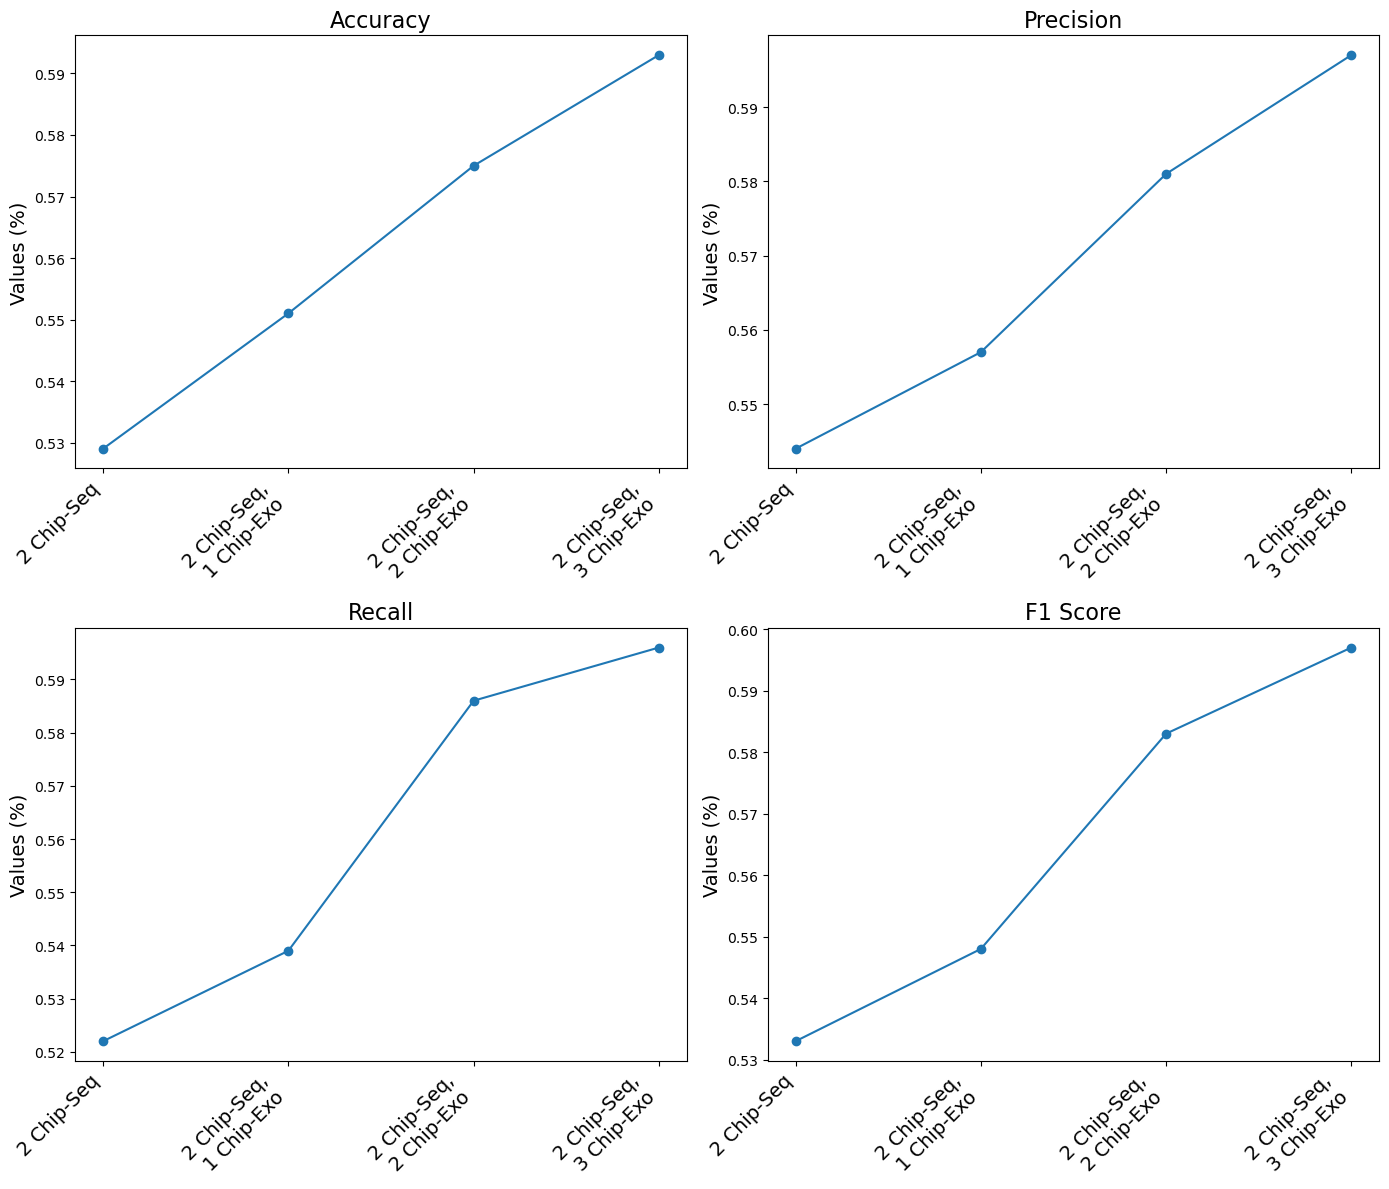

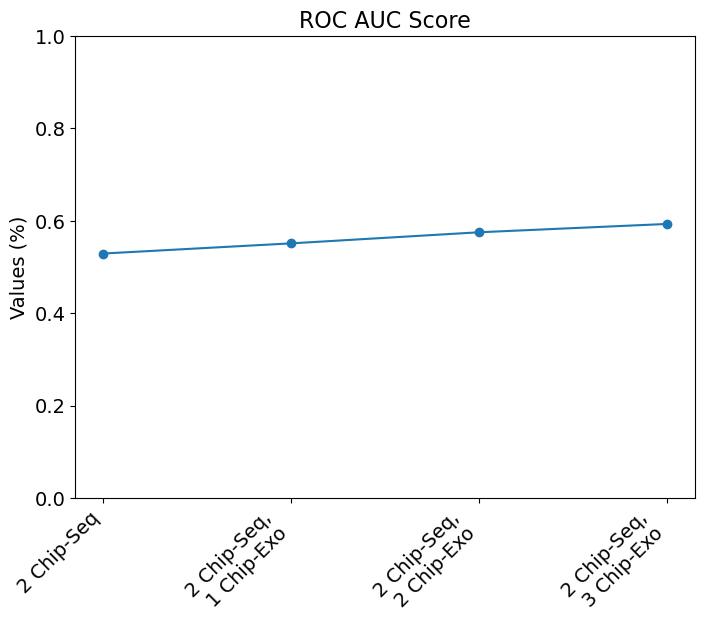

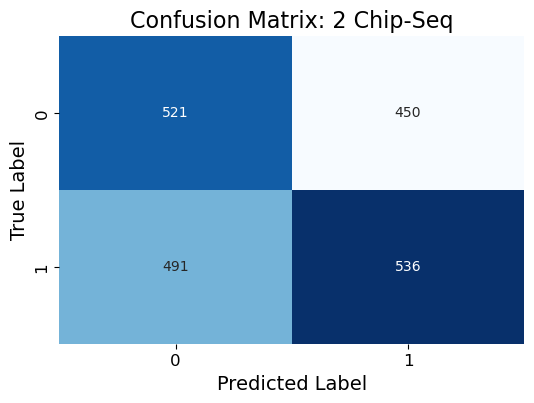

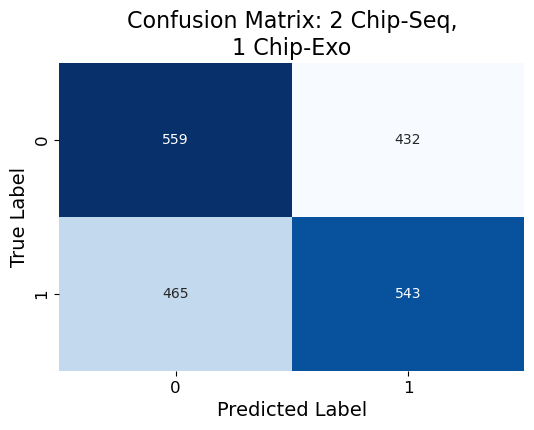

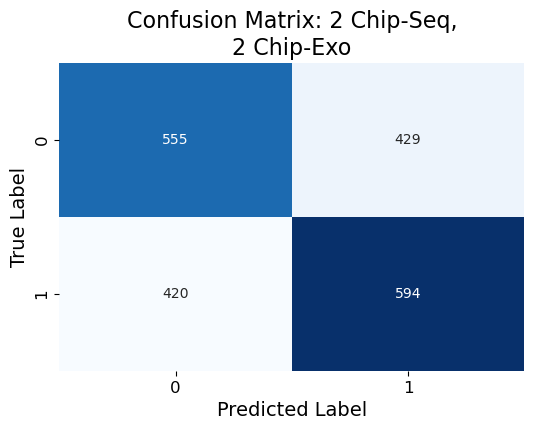

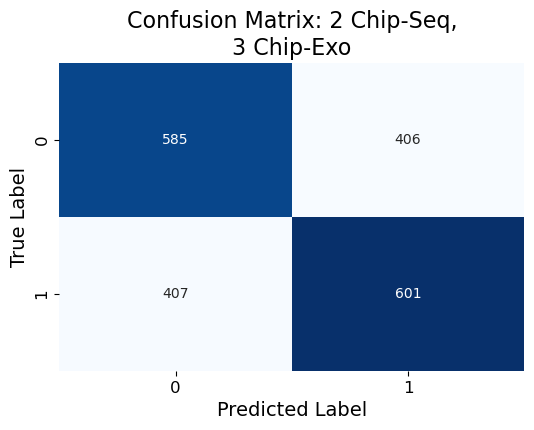

In [38]:
#Supplementary code 12e 

# Description : Here we are comparing the all four above steps and creating a visualization for understanding the same

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Data for accuracy, precision, recall, F1 Score, ROC AUC Score
labels = ['2 Chip-Seq', '2 Chip-Seq,\n1 Chip-Exo', '2 Chip-Seq,\n2 Chip-Exo', '2 Chip-Seq,\n3 Chip-Exo']
accuracy = [0.529, 0.551, 0.575, 0.593]
precision = [0.544, 0.557, 0.581, 0.597]
recall = [0.522, 0.539, 0.586, 0.596]
f1 = [0.533, 0.548, 0.583, 0.597]
roc_auc = [0.529, 0.551, 0.575, 0.593]

# Data for confusion matrices
confusion_matrices = [
    [[521, 450], [491, 536]],
    [[559, 432], [465, 543]],
    [[555, 429], [420, 594]],
    [[585, 406], [407, 601]]
]

# Create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

# Create accuracy subplot
axes[0, 0].plot(labels, accuracy, marker='o')
axes[0, 0].set_title('Accuracy', fontsize=16)
#axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel('Values (%)', fontsize=14)

# Create precision subplot
axes[0, 1].plot(labels, precision, marker='o')
axes[0, 1].set_title('Precision', fontsize=16)
#axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_ylabel('Values (%)', fontsize=14)

# Create recall subplot
axes[1, 0].plot(labels, recall, marker='o')
axes[1, 0].set_title('Recall', fontsize=16)
#axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_ylabel('Values (%)', fontsize=14)

# Create F1 Score subplot
axes[1, 1].plot(labels, f1, marker='o')
axes[1, 1].set_title('F1 Score', fontsize=16)
#axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_ylabel('Values (%)', fontsize=14)

# Rotate x-axis labels and increase their size for clarity
for ax in axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

# Enhance spacing between subplots
plt.tight_layout()

# Display plot
plt.show()

# Plot ROC AUC Score
plt.figure(figsize=(8,6))
plt.plot(labels, roc_auc, marker='o')
plt.title('ROC AUC Score', fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1)
plt.ylabel('Values (%)', fontsize=14)
plt.show()

# Display confusion matrices
for i, matrix in enumerate(confusion_matrices):
    plt.figure(figsize=(6,4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {labels[i]}', fontsize=16)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [ ]:
# Important result in final table result - "The average rate of growth with the addition of DNA-binding proteins with Histone modification data as features (%Improvement)"
# Description : This is not a program as such , just calculating the average rate of growth when we add DNA-binding protiens
# as extra features with Histone modification data.

Accuracy:

From 2 Chip-Seq to 2 Chip-Seq and one Chip-Exo: (0.5513 - 0.5290) / 0.5290 = 0.0422 or 4.22%
From 2 Chip-Seq and one Chip-Exo to 2 Chip-Seq and two Chip-Exo: (0.5751 - 0.5513) / 0.5513 = 0.0432 or 4.32%
From 2 Chip-Seq and two Chip-Exo to 2 Chip-Seq and 3 Chip-Exo: (0.5933 - 0.5751) / 0.5751 = 0.0316 or 3.16%
The average rate of growth for Accuracy is (4.22% + 4.32% + 3.16%) / 3 = 3.9%

Precision:

From 2 Chip-Seq to 2 Chip-Seq and one Chip-Exo: (0.5569 - 0.5436) / 0.5436 = 0.0245 or 2.45%
From 2 Chip-Seq and one Chip-Exo to 2 Chip-Seq and two Chip-Exo: (0.5806 - 0.5569) / 0.5569 = 0.0426 or 4.26%
From 2 Chip-Seq and two Chip-Exo to 2 Chip-Seq and 3 Chip-Exo: (0.5968 - 0.5806) / 0.5806 = 0.0279 or 2.79%
The average rate of growth for Precision is (2.45% + 4.26% + 2.79%) / 3 = 3.17%

Recall:

From 2 Chip-Seq to 2 Chip-Seq and one Chip-Exo: (0.5387 - 0.5219) / 0.5219 = 0.0322 or 3.22%
From 2 Chip-Seq and one Chip-Exo to 2 Chip-Seq and two Chip-Exo: (0.5858 - 0.5387) / 0.5387 = 0.0874 or 8.74%
From 2 Chip-Seq and two Chip-Exo to 2 Chip-Seq and 3 Chip-Exo: (0.5962 - 0.5858) / 0.5858 = 0.0178 or 1.78%
The average rate of growth for Recall is (3.22% + 8.74% + 1.78%) / 3 = 4.58%

F1 Score:

From 2 Chip-Seq to 2 Chip-Seq and one Chip-Exo: (0.5477 - 0.5325) / 0.5325 = 0.0285 or 2.85%
From 2 Chip-Seq and one Chip-Exo to 2 Chip-Seq and two Chip-Exo: (0.5832 - 0.5477) / 0.5477 = 0.0649 or 6.49%
From 2 Chip-Seq and two Chip-Exo to 2 Chip-Seq and 3 Chip-Exo: (0.5965 - 0.5832) / 0.5832 = 0.0228 or 2.28%
The average rate of growth for F1 Score is (2.85% + 6.49% + 2.28%) / 3 = 3.87%

ROC AUC Score:

From 2 Chip-Seq to 2 Chip-Seq and one Chip-Exo: (0.5514 - 0.5292) / 0.5292 = 0.0420 or 4.20%
From 2 Chip-Seq and one Chip-Exo to 2 Chip-Seq and two Chip-Exo: (0.5749 - 0.5514) / 0.5514 = 0.0426 or 4.26%
From 2 Chip-Seq and two Chip-Exo to 2 Chip-Seq and 3 Chip-Exo: (0.5933 - 0.5749) / 0.5749 = 0.0320 or 3.20%
The average rate of growth for ROC AUC Score is (4.20% + 4.26% + 3.20%) / 3 = 3.89%

In [ ]:
# Supplementary code 13a 
# 
# Description : This program is an interesting bit where we calculate Binary-Cross entropy, which is a
# measurement for performance evaluation for Random forest Binary classifications. Here we went back and tried
# to see the Log Loss with 26 histone modification data files as features in predicting Pol-II pause.
# 
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files =  [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  
 

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,log_loss

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    # Predict probabilities on the test set
    probabilities = clf.predict_proba(X_test)

    # Compute Log Loss
    loss = log_loss(y_test, probabilities[:, 1])
    print(f"Log Loss: {loss}")
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    



# Log loss 26 Chip-Seq results
Log Loss: 0.7173157563549709
Chromosome: chrI
Accuracy: 0.6006006006006006
MSE: 0.3993993993993994
Precision: 0.6038461538461538
Recall: 0.6193293885601578
F1 Score: 0.611489776046738
ROC AUC Score: 0.600315100784144
Confusion Matrix: 
[[572 412]
 [386 628]]


Log Loss: 0.7416437954622632
Chromosome: chrII
Accuracy: 0.5705588700840132
MSE: 0.4294411299159869
Precision: 0.572509765625
Recall: 0.5690366415918466
F1 Score: 0.5707679201655105
ROC AUC Score: 0.5705642640999311
Confusion Matrix: 
[[2341 1751]
 [1776 2345]]


Log Loss: 0.7111401321636316
Chromosome: chrIII
Accuracy: 0.5991902834008097
MSE: 0.4008097165991903
Precision: 0.5993103448275862
Recall: 0.5887533875338753
F1 Score: 0.5939849624060151
ROC AUC Score: 0.5991481991432818
Confusion Matrix: 
[[907 581]
 [607 869]]


Log Loss: 0.7338743274004838
Chromosome: chrIV
Accuracy: 0.5784215784215784
MSE: 0.42157842157842157
Precision: 0.5809562073121736
Recall: 0.575407879029049
F1 Score: 0.5781687325069972
ROC AUC Score: 0.5784342765931763
Confusion Matrix: 
[[4347 3129]
 [3201 4338]]


Log Loss: 0.7401265018447696
Chromosome: chrIX
Accuracy: 0.5866605123471036
MSE: 0.41333948765289635
Precision: 0.5846994535519126
Recall: 0.5936199722607489
F1 Score: 0.5891259463179628
ROC AUC Score: 0.5866717372824483
Confusion Matrix: 
[[1258  912]
 [ 879 1284]]


Log Loss: 0.790159923654221
Chromosome: chrM
Accuracy: 0.5814663951120163
MSE: 0.4185336048879837
Precision: 0.5854545454545454
Recall: 0.6376237623762376
F1 Score: 0.6104265402843602
ROC AUC Score: 0.5798181704962949
Confusion Matrix: 
[[249 228]
 [183 322]]


Log Loss: 0.7181403545900547
Chromosome: chrV
Accuracy: 0.585432266848196
MSE: 0.41456773315180395
Precision: 0.5875686813186813
Recall: 0.5807875084860828
F1 Score: 0.5841584158415842
ROC AUC Score: 0.5854449487822906
Confusion Matrix: 
[[1729 1201]
 [1235 1711]]


Log Loss: 0.73671028366258
Chromosome: chrVI
Accuracy: 0.5819277108433735
MSE: 0.41807228915662653
Precision: 0.5877192982456141
Recall: 0.584456780333069
F1 Score: 0.5860834990059643
ROC AUC Score: 0.5818947856099845
Confusion Matrix: 
[[712 517]
 [524 737]]


Log Loss: 0.7265185426534345
Chromosome: chrVII
Accuracy: 0.5902959910078681
MSE: 0.4097040089921319
Precision: 0.5834732326058572
Recall: 0.5936610362497627
F1 Score: 0.5885230479774224
ROC AUC Score: 0.5903389331424512
Confusion Matrix: 
[[3174 2233]
 [2141 3128]]


Log Loss: 0.7295374038746808
Chromosome: chrVIII
Accuracy: 0.5841836734693877
MSE: 0.41581632653061223
Precision: 0.5858621920742592
Recall: 0.5939196525515744
F1 Score: 0.589863407620417
ROC AUC Score: 0.5841157895785395
Confusion Matrix: 
[[1565 1160]
 [1122 1641]]


Log Loss: 0.7246479656009167
Chromosome: chrX
Accuracy: 0.5885784047748237
MSE: 0.41142159522517635
Precision: 0.5910739191073919
Recall: 0.5748779164405861
F1 Score: 0.5828634300646404
ROC AUC Score: 0.5885784047748236
Confusion Matrix: 
[[2220 1466]
 [1567 2119]]


Log Loss: 0.7629999038314611
Chromosome: chrXI
Accuracy: 0.5644398462902749
MSE: 0.4355601537097251
Precision: 0.5693233082706767
Recall: 0.5554577464788732
F1 Score: 0.5623050646071588
ROC AUC Score: 0.5645067171941716
Confusion Matrix: 
[[1926 1432]
 [1515 1893]]


Log Loss: 0.7192569606022379
Chromosome: chrXII
Accuracy: 0.5928698050029545
MSE: 0.4071301949970455
Precision: 0.5933609958506224
Recall: 0.5912581216774956
F1 Score: 0.5923076923076923
ROC AUC Score: 0.5928704401490925
Confusion Matrix: 
[[3017 2058]
 [2076 3003]]


Log Loss: 0.7400366540135357
Chromosome: chrXIII
Accuracy: 0.5709850107066381
MSE: 0.4290149892933619
Precision: 0.567491926803014
Recall: 0.5688390159689254
F1 Score: 0.5681646729173403
ROC AUC Score: 0.5709685942573058
Confusion Matrix: 
[[2697 2009]
 [1998 2636]]


Log Loss: 0.7428144684787685
Chromosome: chrXIV
Accuracy: 0.5747520976353928
MSE: 0.4252479023646072
Precision: 0.5776559645001305
Recall: 0.5616751269035533
F1 Score: 0.5695534680221336
ROC AUC Score: 0.5747754136810175
Confusion Matrix: 
[[2308 1618]
 [1727 2213]]


Log Loss: 0.7324853467022912
Chromosome: chrXV
Accuracy: 0.5775262132318827
MSE: 0.4224737867681173
Precision: 0.5790577913408353
Recall: 0.5641025641025641
F1 Score: 0.5714823529411764
ROC AUC Score: 0.5775100401606426
Confusion Matrix: 
[[3188 2207]
 [2346 3036]]


Log Loss: 0.7254379027370302
Chromosome: chrXVI
Accuracy: 0.5868918631824942
MSE: 0.41310813681750586
Precision: 0.5858672376873661
Recall: 0.5832445107652953
F1 Score: 0.5845529323790193
ROC AUC Score: 0.5868795071294187
Confusion Matrix: 
[[2789 1934]
 [1955 2736]]

In [ ]:
# Supplementary code 13b 

# Description: Calculating Log loss with 2 Histone modification files and and 3 DNA- Binding protien files( So total five features).

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,log_loss

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    # Predict probabilities on the test set
    probabilities = clf.predict_proba(X_test)

    # Compute Log Loss
    loss = log_loss(y_test, probabilities[:, 1])
    print(f"Log Loss: {loss}")
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    


In [ ]:
# Supplementary code 13c ( There is no 13c as source code. This is a mistake)
# 

Log Loss: 0.6896220924382315
Chromosome: chrI
Accuracy: 0.5785785785785785
MSE: 0.4214214214214214
Precision: 0.5895450145208132
Recall: 0.5929892891918208
F1 Score: 0.59126213592233
ROC AUC Score: 0.5781630277061062
Confusion Matrix: 
[[547 424]
 [418 609]]


Log Loss: 0.7064149447565866
Chromosome: chrII
Accuracy: 0.5485756026296567
MSE: 0.4514243973703433
Precision: 0.5522962250540996
Recall: 0.5544291576152547
F1 Score: 0.5533606359913275
ROC AUC Score: 0.5485238394315527
Confusion Matrix: 
[[2209 1862]
 [1846 2297]]


Log Loss: 0.7162198060038476
Chromosome: chrIII
Accuracy: 0.5897435897435898
MSE: 0.41025641025641024
Precision: 0.6001348617666892
Recall: 0.5882352941176471
F1 Score: 0.5941255006675568
ROC AUC Score: 0.5897758138403536
Confusion Matrix: 
[[858 593]
 [623 890]]


Log Loss: 0.6961716857851287
Chromosome: chrIV
Accuracy: 0.559611029705608
MSE: 0.4403889702943919
Precision: 0.5618037135278514
Recall: 0.5615058324496288
F1 Score: 0.5616547334924422
ROC AUC Score: 0.5596016444711329
Confusion Matrix: 
[[4166 3304]
 [3308 4236]]


Log Loss: 0.7018083814072413
Chromosome: chrIX
Accuracy: 0.5518116778213709
MSE: 0.44818832217862914
Precision: 0.547782350251486
Recall: 0.5569502556950255
F1 Score: 0.5523282618718304
ROC AUC Score: 0.5518481800931591
Confusion Matrix: 
[[1193  989]
 [ 953 1198]]


Log Loss: 0.8447808397586852
Chromosome: chrM
Accuracy: 0.5759429153924567
MSE: 0.4240570846075433
Precision: 0.5866141732283464
Recall: 0.5912698412698413
F1 Score: 0.5889328063241106
ROC AUC Score: 0.5755091344713986
Confusion Matrix: 
[[267 210]
 [206 298]]


Log Loss: 0.6991925352286499
Chromosome: chrV
Accuracy: 0.5726684819605173
MSE: 0.42733151803948266
Precision: 0.5724758413862046
Recall: 0.5831636116768499
F1 Score: 0.577770304355137
ROC AUC Score: 0.5726398263162407
Confusion Matrix: 
[[1647 1283]
 [1228 1718]]


Log Loss: 0.7111946968999392
Chromosome: chrVI
Accuracy: 0.5602409638554217
MSE: 0.4397590361445783
Precision: 0.5598484848484848
Recall: 0.5897845171588189
F1 Score: 0.5744267392149242
ROC AUC Score: 0.5600498980296923
Confusion Matrix: 
[[656 581]
 [514 739]]


Log Loss: 0.7040156031365624
Chromosome: chrVII
Accuracy: 0.5597077830851362
MSE: 0.4402922169148637
Precision: 0.5576045280262918
Recall: 0.572768192048012
F1 Score: 0.5650846516791563
ROC AUC Score: 0.5597236657153063
Confusion Matrix: 
[[2922 2423]
 [2278 3054]]


Log Loss: 0.6953307118296509
Chromosome: chrVIII
Accuracy: 0.5714285714285714
MSE: 0.42857142857142855
Precision: 0.5724867724867725
Recall: 0.5874049945711184
F1 Score: 0.5798499464094319
ROC AUC Score: 0.5713171761846417
Confusion Matrix: 
[[1513 1212]
 [1140 1623]]


Log Loss: 0.7023229053506552
Chromosome: chrX
Accuracy: 0.55242099552421
MSE: 0.44757900447579
Precision: 0.5485625485625486
Recall: 0.5763265306122449
F1 Score: 0.5621019108280255
ROC AUC Score: 0.552495336696063
Confusion Matrix: 
[[1955 1743]
 [1557 2118]]


Log Loss: 0.7181938048186356
Chromosome: chrXI
Accuracy: 0.5461129175288205
MSE: 0.4538870824711794
Precision: 0.5465801886792453
Recall: 0.5473870682019486
F1 Score: 0.5469833308747604
ROC AUC Score: 0.5461114092119539
Confusion Matrix: 
[[1841 1538]
 [1533 1854]]


Log Loss: 0.6953913047716064
Chromosome: chrXII
Accuracy: 0.5628323813275556
MSE: 0.43716761867244436
Precision: 0.5615858352578906
Recall: 0.5745225438078362
F1 Score: 0.5679805352798053
ROC AUC Score: 0.5628277743669723
Confusion Matrix: 
[[2797 2278]
 [2161 2918]]


Log Loss: 0.7033903160220527
Chromosome: chrXIII
Accuracy: 0.5578631838132962
MSE: 0.44213681618670375
Precision: 0.5524185177496367
Recall: 0.5741100323624595
F1 Score: 0.563055438002539
ROC AUC Score: 0.5579857429130615
Confusion Matrix: 
[[2550 2156]
 [1974 2661]]


Log Loss: 0.7149507871022429
Chromosome: chrXIV
Accuracy: 0.557010296173891
MSE: 0.4429897038261091
Precision: 0.5566086065573771
Recall: 0.5533486121721416
F1 Score: 0.5549738219895289
ROC AUC Score: 0.5570042553246495
Confusion Matrix: 
[[2209 1731]
 [1754 2173]]


Log Loss: 0.7167267333257545
Chromosome: chrXV
Accuracy: 0.5491324116173332
MSE: 0.4508675883826668
Precision: 0.5476928688674083
Recall: 0.5579710144927537
F1 Score: 0.5527841693511275
ROC AUC Score: 0.5491430605364602
Confusion Matrix: 
[[2915 2480]
 [2379 3003]]


Log Loss: 0.6961133450390546
Chromosome: chrXVI
Accuracy: 0.5625663904822604
MSE: 0.4374336095177395
Precision: 0.5597996242955542
Recall: 0.5717331059475591
F1 Score: 0.5657034380932293
ROC AUC Score: 0.5625974443563754
Confusion Matrix: 
[[2614 2109]
 [2009 2682]]

In [ ]:
# Supplementary code 13d 

# Description: Calculating Log loss with only 10 DNA- Binding protiens.

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10542_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10706_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10947_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10948_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10951_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10952_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10966_filtered.wig']     

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,log_loss

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'score_5', 'score_6','score_7', 'score_8', 'score_9', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    # Predict probabilities on the test set
    probabilities = clf.predict_proba(X_test)

    # Compute Log Loss
    loss = log_loss(y_test, probabilities[:, 1])
    print(f"Log Loss: {loss}")
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    



In [ ]:
# 13d  results
#log-loss results for 10 BAM files

Log Loss: 0.6620186778083669
Chromosome: chrI
Accuracy: 0.585378067100651
MSE: 0.414621932899349
Precision: 0.5897187196896218
Recall: 0.6001974333662389
F1 Score: 0.5949119373776908
ROC AUC Score: 0.5851596922928755
Confusion Matrix: 
[[561 423]
 [405 608]]


Log Loss: 0.6927041315403057
Chromosome: chrII
Accuracy: 0.5524713903092281
MSE: 0.44752860969077185
Precision: 0.5571044265101491
Recall: 0.5498431088583152
F1 Score: 0.5534499514091351
ROC AUC Score: 0.5524946322970034
Confusion Matrix: 
[[2260 1811]
 [1865 2278]]


Log Loss: 0.6791509093177938
Chromosome: chrIII
Accuracy: 0.5720067453625632
MSE: 0.42799325463743676
Precision: 0.568679495686795
Recall: 0.5806233062330624
F1 Score: 0.5745893395910159
ROC AUC Score: 0.5720443596309703
Confusion Matrix: 
[[839 650]
 [619 857]]


Log Loss: 0.6821998561101987
Chromosome: chrIV
Accuracy: 0.5622377622377622
MSE: 0.43776223776223777
Precision: 0.5627925117004681
Recall: 0.5742140867489057
F1 Score: 0.5684459326373843
ROC AUC Score: 0.5621873001962827
Confusion Matrix: 
[[4113 3363]
 [3210 4329]]


Log Loss: 0.6922646327595438
Chromosome: chrV
Accuracy: 0.5551583248212462
MSE: 0.44484167517875384
Precision: 0.5554455445544555
Recall: 0.5707019328585962
F1 Score: 0.5629703963873557
ROC AUC Score: 0.5550945561728878
Confusion Matrix: 
[[1578 1347]
 [1266 1683]]


Log Loss: 0.6903105155695775
Chromosome: chrVI
Accuracy: 0.5803212851405622
MSE: 0.41967871485943775
Precision: 0.591820987654321
Recall: 0.5978176149649259
F1 Score: 0.5948041876696394
ROC AUC Score: 0.5797704479132831
Confusion Matrix: 
[[678 529]
 [516 767]]


Log Loss: 0.682995720080918
Chromosome: chrVII
Accuracy: 0.5610190128313196
MSE: 0.43898098716868034
Precision: 0.5601545253863135
Recall: 0.5701179554390564
F1 Score: 0.565092326250348
ROC AUC Score: 0.5610147498334713
Confusion Matrix: 
[[2945 2391]
 [2296 3045]]


Log Loss: 0.6819214374821542
Chromosome: chrVIII
Accuracy: 0.5659620991253644
MSE: 0.43403790087463556
Precision: 0.5649441340782123
Recall: 0.5875090777051561
F1 Score: 0.576005695977216
ROC AUC Score: 0.565883287938167
Confusion Matrix: 
[[1488 1246]
 [1136 1618]]


Log Loss: 0.6913938045469255
Chromosome: chrIX
Accuracy: 0.5622981079833872
MSE: 0.4377018920166128
Precision: 0.5660802886783942
Recall: 0.5730593607305936
F1 Score: 0.5695484456546404
ROC AUC Score: 0.5621826654399237
Confusion Matrix: 
[[1182  962]
 [ 935 1255]]


Log Loss: 0.6778017209549438
Chromosome: chrX
Accuracy: 0.5760987520347259
MSE: 0.423901247965274
Precision: 0.5713172252533125
Recall: 0.5985302123026673
F1 Score: 0.5846072045726439
ROC AUC Score: 0.576171542062637
Confusion Matrix: 
[[2048 1650]
 [1475 2199]]


Log Loss: 0.6983637139391144
Chromosome: chrXI
Accuracy: 0.5443393437777121
MSE: 0.4556606562222879
Precision: 0.5554868624420402
Recall: 0.5220801859384079
F1 Score: 0.5382656881833158
ROC AUC Score: 0.5447344371328622
Confusion Matrix: 
[[1886 1438]
 [1645 1797]]


Log Loss: 0.6746624908287442
Chromosome: chrXII
Accuracy: 0.5650974985227497
MSE: 0.43490250147725035
Precision: 0.5576277508392391
Recall: 0.5939610647596345
F1 Score: 0.5752212389380531
ROC AUC Score: 0.5653399073798173
Confusion Matrix: 
[[2748 2372]
 [2044 2990]]


Log Loss: 0.6826630662230241
Chromosome: chrXIII
Accuracy: 0.5634300396103201
MSE: 0.4365699603896799
Precision: 0.5591420683796985
Recall: 0.5680690399137001
F1 Score: 0.563570205479452
ROC AUC Score: 0.5634650341939941
Confusion Matrix: 
[[2630 2076]
 [2002 2633]]


Log Loss: 0.6864715652695181
Chromosome: chrXIV
Accuracy: 0.562420544113908
MSE: 0.43757945588609204
Precision: 0.5590415019762845
Recall: 0.577295918367347
F1 Score: 0.5680220883534135
ROC AUC Score: 0.5624695506687216
Confusion Matrix: 
[[2161 1785]
 [1657 2263]]


Log Loss: 0.6858821869217411
Chromosome: chrXV
Accuracy: 0.5549267025422157
MSE: 0.4450732974577844
Precision: 0.5527883053600433
Recall: 0.5691192865105908
F1 Score: 0.560834935457292
ROC AUC Score: 0.5549451139743466
Confusion Matrix: 
[[2918 2478]
 [2319 3063]]


Log Loss: 0.6858612193402568
Chromosome: chrXVI
Accuracy: 0.5527937114935203
MSE: 0.4472062885064797
Precision: 0.5491518495810341
Recall: 0.5727989767640163
F1 Score: 0.5607262103505843
ROC AUC Score: 0.5528614828770325
Confusion Matrix: 
[[2517 2206]
 [2004 2687]]


Log Loss: 0.8137701878600958
Chromosome: chrM
Accuracy: 0.599591419816139
MSE: 0.4004085801838611
Precision: 0.606425702811245
Recall: 0.606425702811245
F1 Score: 0.606425702811245
ROC AUC Score: 0.5994706476634187
Confusion Matrix: 
[[285 196]
 [196 302]]

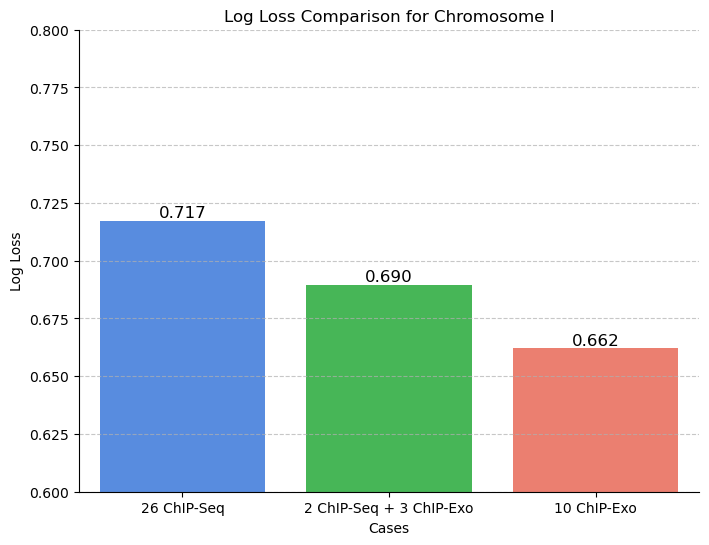

In [2]:
# Supplementary code 13e 

#Description : Comparison of Log loss between 26 ChIP-Seq, 2 ChIP-Seq and 3 ChIP-Exo, 10 ChIP-Exo

import matplotlib.pyplot as plt
import seaborn as sns

# Data for each case
cases = ['26 ChIP-Seq', '2 ChIP-Seq + 3 ChIP-Exo', '10 ChIP-Exo']
log_losses = [0.7173157563549709, 0.6896220924382315, 0.6620186778083669]

# Set a custom color palette
custom_palette = ["#4287f5", "#34c84a", "#ff6f5c"]

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=cases, y=log_losses, palette=custom_palette)
plt.xlabel('Cases')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison for Chromosome I')
plt.ylim(0.6, 0.8)  # Set the y-axis limits for better visualization

# Add labels to the bars
for i in range(len(cases)):
    plt.text(i, log_losses[i], f"{log_losses[i]:.3f}", ha='center', va='bottom', fontsize=12, color='black')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines to make it cleaner
sns.despine()

plt.show()


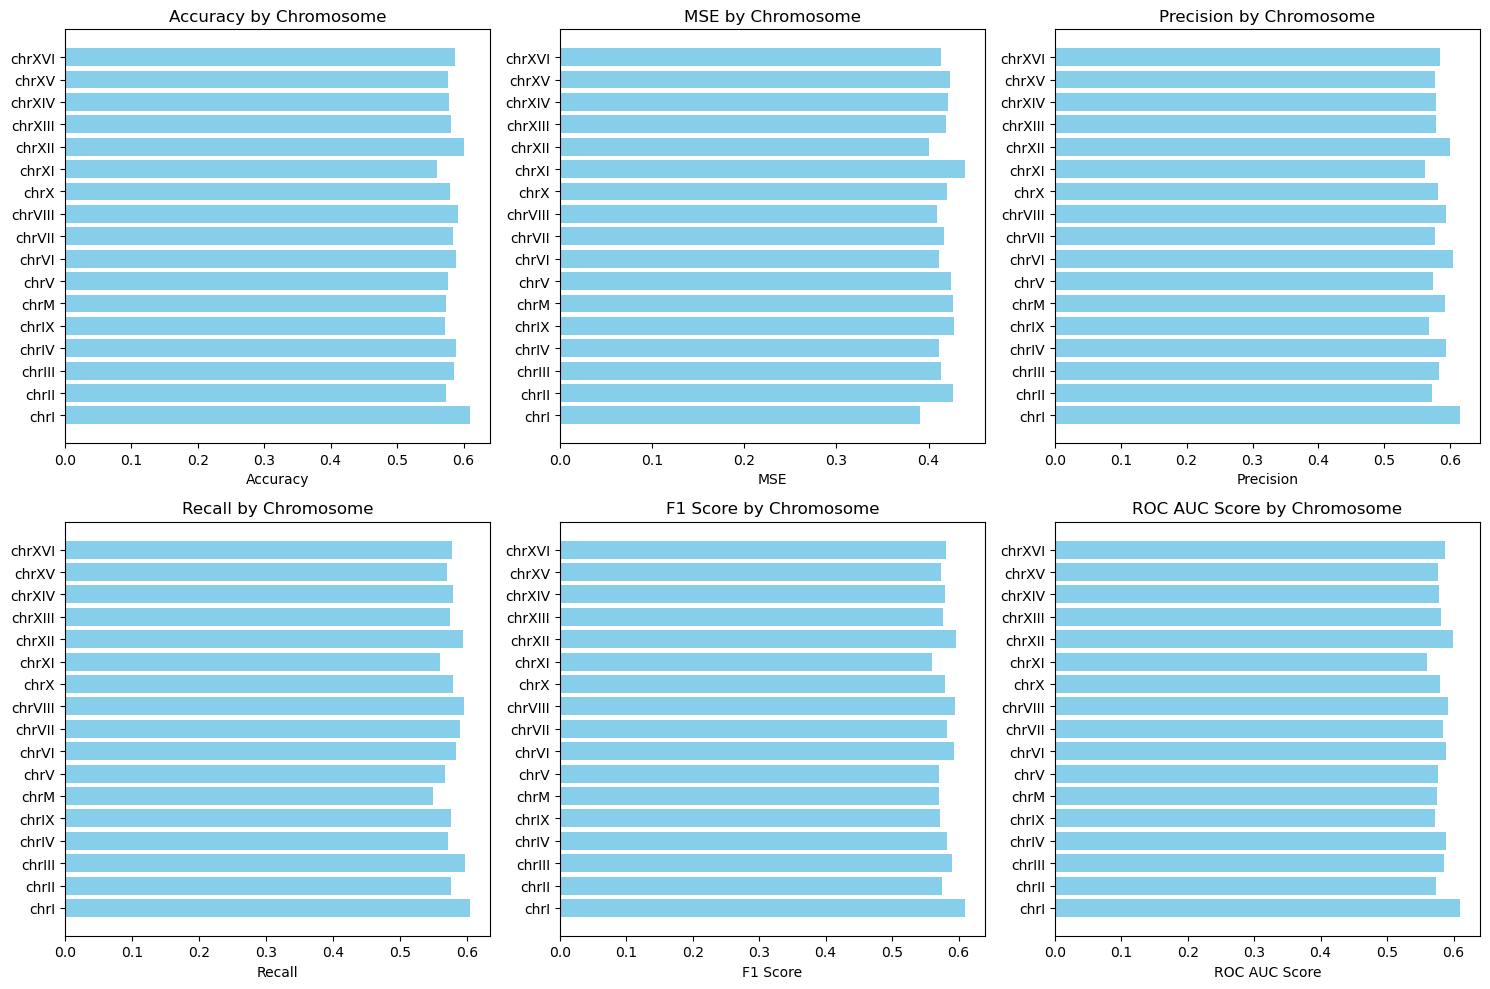

In [2]:
#Supplementary code 14 
# 
# Description : This program is used to obeserve the performance metrics values of all chromosomes in the
# Random forest Binary classification without  any feature reduction

import matplotlib.pyplot as plt
chromosomes = ["chrI", "chrII", "chrIII", "chrIV", "chrIX", "chrM", "chrV", "chrVI", "chrVII", "chrVIII", 
               "chrX", "chrXI", "chrXII", "chrXIII", "chrXIV", "chrXV", "chrXVI"]
accuracy = [0.609304652326163, 0.5737245829782053, 0.5860323886639676, 0.5882509657652857, 0.572351719363028, 
            0.5739041794087666, 0.5760980592441267, 0.5887550200803213, 0.5835518920944174, 0.5912900874635568,
            0.5799538857995389, 0.5607449009754656, 0.5999606066574749, 0.5808351177730193, 0.5784388507500635,
            0.5768766818223996, 0.5865108868826341]

mse = [0.3906953476738369, 0.4262754170217947, 0.4139676113360324, 0.41174903423471426, 0.4276482806369721,
       0.4260958205912334, 0.42390194075587334, 0.41124497991967873, 0.4164481079055826, 0.4087099125364432,
       0.4200461142004611, 0.4392550990245344, 0.40003939334252514, 0.41916488222698073, 0.42156114924993643,
       0.42312331817760046, 0.4134891131173659]

precision = [0.6145307769929365, 0.5730201017195447, 0.5822868473231989, 0.5934791580685101, 0.568348623853211,
             0.5918803418803419, 0.5746449601662625, 0.6046887631366209, 0.5763592503247356, 0.5938628158844765,
             0.5813637598478675, 0.5614814814814815, 0.5993212218007586, 0.5780334273930975, 0.579107505070994,
             0.5772846934937946, 0.5847384349329875]

recall = [0.6041666666666666, 0.5765107212475633, 0.5968834688346883, 0.5720726694072404, 0.5760111576011158,
          0.5496031746031746, 0.5679561793906196, 0.583008573655495, 0.5894856709052951, 0.5953673543250091,
          0.579004329004329, 0.5594921759669323, 0.5936325884912003, 0.5746655157531291, 0.5796954314720812,
          0.5704199182460052, 0.5783621979901646]

f1_score = [0.6093046523261632, 0.5747601117454147, 0.5894948143191703, 0.5825793382849427, 0.5721542368967907,
            0.5699588477366255, 0.5712809917355373, 0.5936507936507937, 0.5828485644586225, 0.594614133381529,
            0.5801816456554155, 0.5604850635906536, 0.596463341943175, 0.5763445514554703, 0.5794013191273465,
            0.5738317757009347, 0.5815328388691821]

roc_auc = [0.6093487218298015, 0.5737262781219564, 0.5860761430194947, 0.5883245723591802, 0.5723777144559199,
           0.5745919436957173, 0.5760539447579579, 0.5889359355435719, 0.5836276144428455, 0.5912616588138807,
           0.5799563391010223, 0.5607463839290121, 0.5999357762938637, 0.580787921497474, 0.5784366102852001,
           0.576868902589175, 0.5864584312027649]


metrics = [accuracy, mse, precision, recall, f1_score, roc_auc]
metric_names = ['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']

plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.barh(chromosomes, metrics[i], color='skyblue')
    plt.xlabel(metric_names[i])
    plt.title(f'{metric_names[i]} by Chromosome')

plt.tight_layout()
plt.show()



In [28]:
# Cumulative confusion matrix based on Random forest Binary classification.

# Description : This small program used to calculate the consolidated values which we got for 17 chromsomes, confusion matrix
#
cumulative_confusion_matrix = [[0, 0], [0, 0]]

confusion_matrices = [
    [[591, 376], [424, 607]],
    [[2422, 1670], [1764, 2356]],
    [[875, 605], [609, 875]],
    [[4301, 3175], [3162, 4377]],
    [[1289, 855], [940, 1250]],
    [[266, 211], [194, 311]],
    [[1733, 1216], [1222, 1704]],
    [[728, 479], [519, 764]],
    [[3135, 2188], [2275, 3079]],
    [[1584, 1141], [1144, 1619]],
    [[2240, 1458], [1569, 2105]],
    [[1941, 1422], [1525, 1878]],
    [[2994, 2081], [2026, 3053]],
    [[2760, 1946], [1955, 2680]],
    [[2307, 1621], [1721, 2217]],
    [[3119, 2277], [2391, 2991]],
    [[2810, 1911], [1969, 2724]]
]

for matrix in confusion_matrices:
    for i in range(2):
        for j in range(2):
            cumulative_confusion_matrix[i][j] += matrix[i][j]
            
TP, FP, FN, TN = 0, 0, 0, 0

for matrix in confusion_matrices:
    TN += matrix[0][0]
    FP += matrix[0][1]
    FN += matrix[1][0]
    TP += matrix[1][1]

cumulative_confusion_matrix = [[TN, FP], [FN, TP]]



print(cumulative_confusion_matrix)


[[35095, 24632], [25409, 34590]]


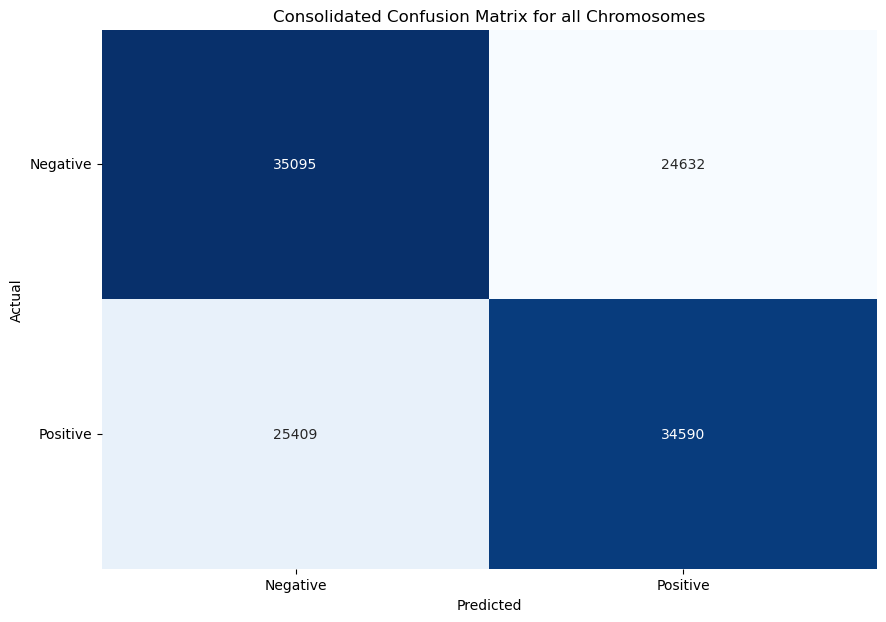

In [32]:
# Visulalize the confusion matrix

# Description : This program does the consolidation for a consolidated confusion matrix. 
import matplotlib.pyplot as plt
import seaborn as sns

# Values
cumulative_confusion_matrix = [[35095, 24632], [25409, 34590]]

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cumulative_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Consolidated Confusion Matrix for all Chromosomes')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()



In [ ]:
#***** Important Result in Final result table***** : "Random Forest Binary Classification (Average for all Chromosome)" 

# Description : This is just a calculation, which we used as results of accuracy level of Random Forest across all
# chromosome

accuracy_avg = sum(accuracy) / len(accuracy)
mse_avg = sum(mse) / len(mse)
precision_avg = sum(precision) / len(precision)
recall_avg = sum(recall) / len(recall)
f1_score_avg = sum(f1_score) / len(f1_score)
roc_auc_avg = sum(roc_auc) / len(roc_auc)

#accuracy_avg = 0.583396936014618
#mse_avg = 0.41660306398538203
#precision_avg = 0.5842191761842982
#recall_avg = 0.5776102060793205
#f1_score_avg = 0.5806876386790749
#roc_auc_avg = 0.5834493019245666

In [2]:
# Supplementary code 15  
#
# Description: This program is a preprocessing to get a overall comparison with Logical regression and GBM


accuracy = [0.609304652326163, 0.5737245829782053, 0.5860323886639676, 0.5882509657652857, 0.572351719363028, 
            0.5739041794087666, 0.5760980592441267, 0.5887550200803213, 0.5835518920944174, 0.5912900874635568,
            0.5799538857995389, 0.5607449009754656, 0.5999606066574749, 0.5808351177730193, 0.5784388507500635,
            0.5768766818223996, 0.5865108868826341]

mse = [0.3906953476738369, 0.4262754170217947, 0.4139676113360324, 0.41174903423471426, 0.4276482806369721,
       0.4260958205912334, 0.42390194075587334, 0.41124497991967873, 0.4164481079055826, 0.4087099125364432,
       0.4200461142004611, 0.4392550990245344, 0.40003939334252514, 0.41916488222698073, 0.42156114924993643,
       0.42312331817760046, 0.4134891131173659]

precision = [0.6145307769929365, 0.5730201017195447, 0.5822868473231989, 0.5934791580685101, 0.568348623853211,
             0.5918803418803419, 0.5746449601662625, 0.6046887631366209, 0.5763592503247356, 0.5938628158844765,
             0.5813637598478675, 0.5614814814814815, 0.5993212218007586, 0.5780334273930975, 0.579107505070994,
             0.5772846934937946, 0.5847384349329875]

recall = [0.6041666666666666, 0.5765107212475633, 0.5968834688346883, 0.5720726694072404, 0.5760111576011158,
          0.5496031746031746, 0.5679561793906196, 0.583008573655495, 0.5894856709052951, 0.5953673543250091,
          0.579004329004329, 0.5594921759669323, 0.5936325884912003, 0.5746655157531291, 0.5796954314720812,
          0.5704199182460052, 0.5783621979901646]

f1_score = [0.6093046523261632, 0.5747601117454147, 0.5894948143191703, 0.5825793382849427, 0.5721542368967907,
            0.5699588477366255, 0.5712809917355373, 0.5936507936507937, 0.5828485644586225, 0.594614133381529,
            0.5801816456554155, 0.5604850635906536, 0.596463341943175, 0.5763445514554703, 0.5794013191273465,
            0.5738317757009347, 0.5815328388691821]

roc_auc = [0.6093487218298015, 0.5737262781219564, 0.5860761430194947, 0.5883245723591802, 0.5723777144559199,
           0.5745919436957173, 0.5760539447579579, 0.5889359355435719, 0.5836276144428455, 0.5912616588138807,
           0.5799563391010223, 0.5607463839290121, 0.5999357762938637, 0.580787921497474, 0.5784366102852001,
           0.576868902589175, 0.5864584312027649]
avg_accuracy = sum(accuracy) / len(accuracy)

avg_mse = sum(mse) / len(mse)
avg_precision = sum(precision) / len(precision)
avg_recall = sum(recall) / len(recall)
avg_f1 = sum(f1_score) / len(f1_score)
avg_roc_auc = sum(roc_auc) / len(roc_auc)

print("Accuracy:", avg_accuracy)
print("Precision:", avg_precision)
print("Recall:", avg_recall)
print("F1 Score:", avg_f1)
print("ROC AUC Score:", avg_roc_auc)


Accuracy: 0.5827402634146137
Precision: 0.5843783625512247
Recall: 0.5791963407976889
F1 Score: 0.5816992365222214
ROC AUC Score: 0.5827949936434611


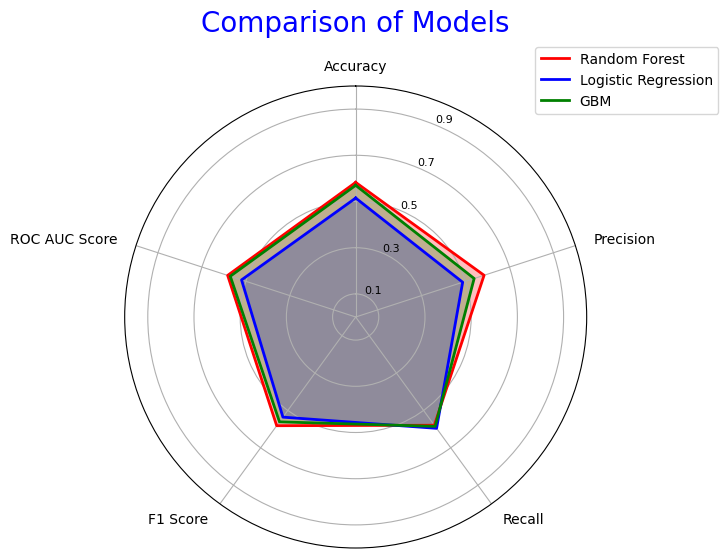

In [1]:
#Supplementary code 15 - Comparison visulization.

#Description : This program does the visual comparison of 3 models based on the earlier output of Logistic regression and GBM

# Thesis code 6 Binary classification result + Thesis code 6 logistic regression result + Thesis code 6 GBM result
#Logistic regression
#Accuracy: 0.515
#Precision: 0.48695652173913045
#Recall: 0.5957446808510638
#F1 Score: 0.5358851674641149
#ROC AUC Score: 0.5195704536330791

#GBM
#Accuracy: 0.57
#Precision: 0.5392156862745098
#Recall: 0.5851063829787234
#F1 Score: 0.5612244897959183
#ROC AUC Score: 0.5708550782818145


import matplotlib.pyplot as plt
import numpy as np

# Defining the metrics and values for each model
labels=np.array(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])
rf_values = np.array([0.5827402634146137, 0.5843783625512247, 0.5791963407976889, 0.5816992365222214, 0.5827949936434611])
lr_values = np.array([0.515, 0.48695652173913045, 0.5957446808510638, 0.5358851674641149, 0.5195704536330791])
gbm_values = np.array([0.57, 0.5392156862745098, 0.5851063829787234, 0.5612244897959183, 0.5708550782818145])

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start to the end.
rf_values=np.concatenate((rf_values,[rf_values[0]]))
lr_values=np.concatenate((lr_values,[lr_values[0]]))
gbm_values=np.concatenate((gbm_values,[gbm_values[0]]))
angles+=angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each model on the radar chart.
def add_to_radar(model_values, color, model_name):
    ax.fill(angles, model_values, color=color, alpha=0.25)
    ax.plot(angles, model_values, color=color, linewidth=2, label=model_name)

# Add each additional model to the chart.
add_to_radar(rf_values, 'red', 'Random Forest')
add_to_radar(lr_values, 'blue', 'Logistic Regression')
add_to_radar(gbm_values, 'green', 'GBM')

# polar coordinates math stuff
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
        
# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 1)
plt.yticks(np.arange(0.1,1,0.2), fontsize=8) # To better fit the data
# Add a title and a legend
plt.title('Comparison of Models', size=20, color='blue', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


In [2]:
# Supplementary code 15 result for final result table 
#
#Important result in Thesis Table  
#Description : This program trying to compare the performance improvement of Random forest compared with other two models
# 
rf_vs_lr = (rf_values - lr_values) / lr_values * 100
rf_vs_gbm = (rf_values - gbm_values) / gbm_values * 100

print("Random Forest vs Logistic Regression (% Improvement):")
print(f'Accuracy: {rf_vs_lr[0]:.2f}%')
print(f'Precision: {rf_vs_lr[1]:.2f}%')
print(f'Recall: {rf_vs_lr[2]:.2f}%')
print(f'F1 Score: {rf_vs_lr[3]:.2f}%')
print(f'ROC AUC Score: {rf_vs_lr[4]:.2f}%')

print("\nRandom Forest vs GBM (% Improvement):")
print(f'Accuracy: {rf_vs_gbm[0]:.2f}%')
print(f'Precision: {rf_vs_gbm[1]:.2f}%')
print(f'Recall: {rf_vs_gbm[2]:.2f}%')
print(f'F1 Score: {rf_vs_gbm[3]:.2f}%')
print(f'ROC AUC Score: {rf_vs_gbm[4]:.2f}%')


Random Forest vs Logistic Regression (% Improvement):
Accuracy: 13.15%
Precision: 20.01%
Recall: -2.78%
F1 Score: 8.55%
ROC AUC Score: 12.17%

Random Forest vs GBM (% Improvement):
Accuracy: 2.24%
Precision: 8.38%
Recall: -1.01%
F1 Score: 3.65%
ROC AUC Score: 2.09%


In [ ]:
# Supplementary code 16a 
# Description : This is clone of RFE just showing in sequence with the Supplementary code reference in the Thesis
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',

'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    #Recursive Feature Elimination (RFE)
    from sklearn.feature_selection import RFE
    selector = RFE(clf, n_features_to_select=10, step=1)
    selector = selector.fit(X_train, y_train)
    print(selector.support_)
    print(selector.ranking_)
    
    print("\n----------------------------------\n")


In [ ]:
# Supplementary code 16a Output.

#Chromosome: chrI
#Accuracy: 0.5942971485742872
#MSE: 0.40570285142571283
#Precision: 0.601593625498008
#Recall: 0.5950738916256157
#F1 Score: 0.5983159980188213
#ROC AUC Score: 0.5942849132924827
#Confusion Matrix: 
#[[584 400]
# [411 604]]


#[False  True False  True False  True False  True False False  True False
#  True False False False False False  True False False False  True  True
# False  True]
#[11  1 17  1  6  1  5  1 12 15  1 10  1 16  3  7 14  2  1 13  9  4  1  1
#  8  1]

----------------------------------

#Chromosome: chrII
#Accuracy: 0.5799342505783514
#MSE: 0.4200657494216486
#Precision: 0.5779252704031466
#Recall: 0.5756611165523996
#F1 Score: 0.5767909715407262
#ROC AUC Score: 0.5799109651543785
#Confusion Matrix: 
#[[2412 1717]
# [1733 2351]]


#[ True  True False False False False  True False  True False False  True
# False False  True False  True  True  True False False False False False
# False  True]
#[ 1  1 15 11  9  7  1  5  1 17 13  1  6 16  1 12  1  1  1 10 14  2  4  3
#  8  1]

----------------------------------

#Chromosome: chrIII
#Accuracy: 0.6147098515519568
#MSE: 0.3852901484480432
#Precision: 0.6179310344827587
#Recall: 0.6037735849056604
#F1 Score: 0.610770279481936
#ROC AUC Score: 0.6147246302906679
#Confusion Matrix: 
#[[926 554]
# [588 896]]


#[ True  True  True  True False False  True  True False False False False
# False False  True  True False False False False False False False False
#  True  True]
#[ 1  1  1  1 11  4  1  1 15  8  9 12 10 17  1  1 14  2  3 13 16  6  7  5
#  1  1]

----------------------------------

#Chromosome: chrIV
#Accuracy: 0.5821511821511821
#MSE: 0.41784881784881783
#Precision: 0.5841278367127702
#Recall: 0.5779194898365883
#F1 Score: 0.5810070789368238
#ROC AUC Score: 0.5821622021832514
#Confusion Matrix: 
#[[4391 3097]
# [3177 4350]]


#[ True  True False  True False False  True  True False False False  True
# False False False  True False False False False False False  True  True
# False  True]
#[ 1  1 17  1 16  9  1  1  8  7  5  1 11 15  3  1 13  2  4 12 14  6  1  1
# 10  1]

----------------------------------

#Chromosome: chrIX
#Accuracy: 0.5808908377567505
#MSE: 0.41910916224324946
#Precision: 0.5882631329862754
#Recall: 0.5678391959798995
#F1 Score: 0.5778707577870758
#ROC AUC Score: 0.5810278069451736
#Confusion Matrix: 
#[[1274  870]
# [ 946 1243]]


#[ True  True False False False False False  True False False False False
#  True False  True  True False  True  True False False  True False False
# False  True]
#[ 1  1 16 15  9  6  3  1  8 17 11  5  1  4  1  1 12  1  1 14 13  1  2  7
# 10  1]

----------------------------------

#Chromosome: chrM
#Accuracy: 0.5881753312945973
#MSE: 0.41182466870540263
#Precision: 0.5886524822695035
#Recall: 0.6587301587301587
#F1 Score: 0.6217228464419475
#ROC AUC Score: 0.586178496555855
#Confusion Matrix: 
#[[245 232]
# [172 332]]


#[False False  True False False False False False False  True False False
# False  True  True  True  True  True False False  True False  True  True
# False False]
#[ 8 16  1  7  4 12 11 15 17  1 14 13  9  1  1  1  1  1  2  6  1 10  1  1
#  3  5]

----------------------------------

#Chromosome: chrV
#Accuracy: 0.5736170212765958
#MSE: 0.42638297872340425
#Precision: 0.5716230010207554
#Recall: 0.5741626794258373
#F1 Score: 0.5728900255754475
#ROC AUC Score: 0.573619149139843
#Confusion Matrix: 
#[[1690 1259]
# [1246 1680]]


#[ True  True False False False False  True False False False  True False
#  True False  True False False  True False False False  True False  True
# False  True]
#[ 1  1 16 12  8 14  1  4  5 17  1  7  1 15  1 10  2  1  6 11  9  1  3  1
# 13  1]

----------------------------------

#Chromosome: chrVI
#Accuracy: 0.5771084337349398
#MSE: 0.42289156626506025
#Precision: 0.5821484992101106
#Recall: 0.584456780333069
#F1 Score: 0.5833003561535418
#ROC AUC Score: 0.5770127677092523
#Confusion Matrix: 
#[[700 529]
# [524 737]]


#[False  True False False False False  True False  True False False  True
# False False False False  True  True False False False  True  True  True
# False  True]
#[ 4  1 16 15  8 14  1 11  1 17  6  1 12 13  3  5  1  1  2  9  7  1  1  1
# 10  1]

----------------------------------

#Chromosome: chrVII
#Accuracy: 0.5817177109675002
#MSE: 0.41828228903249975
#Precision: 0.582365263759284
#Recall: 0.5736259613580942
#F1 Score: 0.5779625779625779
#ROC AUC Score: 0.5817063589057587
#Confusion Matrix: 
#[[3153 2193]
# [2273 3058]]


#[False  True False  True False False  True False False False False  True
#  True False False  True False  True False False False False  True  True
# False  True]
#[ 4  1 17  1 14  7  1  8 11 10 12  1  1 16  2  1 15  1  5  9  6  3  1  1
# 13  1]

----------------------------------

#Chromosome: chrVIII
#Accuracy: 0.5858236151603499
#MSE: 0.41417638483965014
#Precision: 0.588127519237816
#Recall: 0.5827886710239651
#F1 Score: 0.5854459237643627
#ROC AUC Score: 0.5858347159070082
#Confusion Matrix: 
#[[1610 1124]
#[1149 1605]]


#[ True  True False False  True False  True False False False False  True
# False False  True False False  True False False False  True  True False
# False  True]
#[ 1  1 17 11  1 10  1  7 13 16  9  1  6 15  1  8  4  1  3 14 12  1  1  2
#  5  1]

#----------------------------------

#Chromosome: chrX
#Accuracy: 0.57954699579547
#MSE: 0.42045300420453
#Precision: 0.5792229264260127
#Recall: 0.5719727891156463
#F1 Score: 0.5755750273822563
#ROC AUC Score: 0.5795234416102839
#Confusion Matrix: 
#[[2171 1527]
# [1573 2102]]


#[ True  True False  True False False False  True False False False False
# False False  True  True False  True  True False False  True False False
# False  True]
#[ 1  1 16  1 11  8  6  1  9 17  7  2  4 14  1  1 12  1  1 15 10  1  3  5
# 13  1]

----------------------------------

#Chromosome: chrXI
#Accuracy: 0.564079822616408
#MSE: 0.435920177383592
#Precision: 0.5656901238296587
#Recall: 0.5534869976359338
#F1 Score: 0.5595220313666915
#ROC AUC Score: 0.564084522183835
#Confusion Matrix: 
#[[1943 1438]
 [1511 1873]]


#[False  True False False False False  True  True False False  True False
# False  True False False False  True  True False False False  True  True
# False  True]
#[ 4  1 17  7 15  8  1  1 14 16  1  3 13  1  2  6 12  1  1 11 10  5  1  1
#  9  1]

----------------------------------

#Chromosome: chrXII
#Accuracy: 0.5909001378766988
#MSE: 0.4090998621233012
#Precision: 0.5920764483376468
#Recall: 0.5855483362866706
#F1 Score: 0.5887942981587805
#ROC AUC Score: 0.5909022469610693
#Confusion Matrix: 
#[[3026 2049]
# [2105 2974]]


#[False  True False False False False False False  True False False False
#  True False  True False  True  True False False False  True  True  True
# False  True]
#[ 2  1 16 11 14 10  4  5  1 17 15  8  1 12  1  6  1  1  3  9 13  1  1  1
#  7  1]

----------------------------------

#Chromosome: chrXIII
#Accuracy: 0.5745182012847966
#MSE: 0.4254817987152034
#Precision: 0.5699157121244867
#Recall: 0.5706557022289548
#F1 Score: 0.5702854671280277
#ROC AUC Score: 0.5744780948101756
#Confusion Matrix: 
#[[2729 1990]
# [1984 2637]]


#[ True  True False False False False  True  True  True False False False
# False False  True False  True  True  True False False False False False
# False  True]
#[ 1  1 17  9 14 10  1  1  1 15  4  8 16 12  1 13  1  1  1  5 11  3  6  2
#  7  1]

----------------------------------

#Chromosome: chrXIV
#Accuracy: 0.5734265734265734
#MSE: 0.42657342657342656
#Precision: 0.5786855197695732
#Recall: 0.5586450960566228
#F1 Score: 0.5684887459807074
#ROC AUC Score: 0.5735154362350139
#Confusion Matrix: 
#[[2300 1609]
# [1746 2210]]


#[ True  True False False False False  True False  True False False  True
# False False  True False  True  True  True False False False False False
# False  True]
#[ 1  1 17 16 11  8  1  5  1 15 13  1  7 14  1  6  1  1  1 10  9  4  2  3
# 12  1]

----------------------------------

#Chromosome: chrXV
#Accuracy: 0.5722768602709223
#MSE: 0.4277231397290778
#Precision: 0.5721225710014948
#Recall: 0.5689334819769603
#F1 Score: 0.5705235699645985
#ROC AUC Score: 0.5722725230492659
#Confusion Matrix: 
#[[3106 2290]
# [2320 3062]]


#[ True  True False False False False  True  True False False False  True
# False False False False  True  True  True False False False False  True
# False  True]
#[ 1  1 17 15 13  7  1  1  6 14  5  1  3 16  2 12  1  1  1  8 11 10  4  1
#  9  1]

----------------------------------

#Chromosome: chrXVI
#Accuracy: 0.5797748034841725
#MSE: 0.4202251965158275
#Precision: 0.5781548250265112
#Recall: 0.5808651182612401
#F1 Score: 0.5795068027210883
#ROC AUC Score: 0.5797780367836597
#Confusion Matrix: 
#[[2732 1989]
# [1967 2726]]


#[ True  True False  True False False False  True  True False False False
# False False False False False False  True False False  True  True  True
# False  True]
#[ 1  1 12  1 16 11  3  1  1 17  9  8  2 14  6  4  7  5  1 10 15  1  1  1
# 13  1]

In [ ]:
# Input for Thesis code 16b  
#Histone 2
#Histone 7
#Histone 9
#Histone 18
#Histone 19
#Histone 23
#Histone 24
#Histone 26
#These eight histones appear most frequently with a rank of 1.

In [ ]:
# Supplementary code 16b - With 8 best feature from RFE
# Description : This is clone of RFE just showing in sequence with the Supplementary code reference in the Thesis
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig']  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    #Recursive Feature Elimination (RFE)
    from sklearn.feature_selection import RFE
    selector = RFE(clf, n_features_to_select=10, step=1)
    selector = selector.fit(X_train, y_train)
    print(selector.support_)
    print(selector.ranking_)
    
    print("\n----------------------------------\n")

In [ ]:
#Output of 16b 
Chromosome: chrI
Accuracy: 0.5950950950950951
MSE: 0.4049049049049049
Precision: 0.5988428158148505
Recall: 0.6124260355029586
F1 Score: 0.605558264261336
ROC AUC Score: 0.594830903930341
Confusion Matrix: 
[[568 416]
 [393 621]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrII
Accuracy: 0.5603847090333577
MSE: 0.4396152909666423
Precision: 0.5600879335613093
Recall: 0.5588593711918108
F1 Score: 0.5594729779187508
ROC AUC Score: 0.560383224880751
Confusion Matrix: 
[[2310 1801]
 [1810 2293]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrIII
Accuracy: 0.5848801889976375
MSE: 0.41511981100236245
Precision: 0.5997171145685997
Recall: 0.5608465608465608
F1 Score: 0.579630895420369
ROC AUC Score: 0.5853853755301033
Confusion Matrix: 
[[885 566]
 [664 848]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrIV
Accuracy: 0.5720279720279721
MSE: 0.427972027972028
Precision: 0.574482478690299
Recall: 0.5641025641025641
F1 Score: 0.5692452071323234
ROC AUC Score: 0.572048611111111
Confusion Matrix: 
[[4343 3145]
 [3281 4246]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrIX
Accuracy: 0.5725825063466421
MSE: 0.42741749365335796
Precision: 0.5729020159399906
Recall: 0.5649560795191864
F1 Score: 0.568901303538175
ROC AUC Score: 0.5725702056582107
Confusion Matrix: 
[[1259  911]
 [ 941 1222]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrM
Accuracy: 0.5653061224489796
MSE: 0.4346938775510204
Precision: 0.5924170616113744
Recall: 0.49603174603174605
F1 Score: 0.5399568034557235
ROC AUC Score: 0.56734360410831
Confusion Matrix: 
[[304 172]
 [254 250]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrV
Accuracy: 0.5681702127659575
MSE: 0.43182978723404253
Precision: 0.56951871657754
Recall: 0.5770402980020318
F1 Score: 0.5732548359966357
ROC AUC Score: 0.5681231606368817
Confusion Matrix: 
[[1634 1288]
 [1249 1704]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrVI
Accuracy: 0.5746987951807229
MSE: 0.42530120481927713
Precision: 0.5766192733017378
Recall: 0.5826017557861133
F1 Score: 0.5795950774116713
ROC AUC Score: 0.5746476846836791
Confusion Matrix: 
[[701 536]
 [523 730]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrVII
Accuracy: 0.5896235250046825
MSE: 0.4103764749953175
Precision: 0.584980988593156
Recall: 0.5832069749810462
F1 Score: 0.584092634776006
ROC AUC Score: 0.5895486929699751
Confusion Matrix: 
[[3219 2183]
 [2199 3077]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrVIII
Accuracy: 0.5716107871720116
MSE: 0.42838921282798836
Precision: 0.5770338372930166
Recall: 0.5768261964735516
F1 Score: 0.576929998200468
ROC AUC Score: 0.5715434046228962
Confusion Matrix: 
[[1534 1175]
 [1176 1603]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrX
Accuracy: 0.589041095890411
MSE: 0.410958904109589
Precision: 0.5886232481450948
Recall: 0.5828571428571429
F1 Score: 0.5857260049220674
ROC AUC Score: 0.5890218651008267
Confusion Matrix: 
[[2201 1497]
 [1533 2142]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXI
Accuracy: 0.5743422997339639
MSE: 0.42565770026603605
Precision: 0.5773573390296003
Recall: 0.5586064363743726
F1 Score: 0.5678271308523409
ROC AUC Score: 0.5743609275686601
Confusion Matrix: 
[[1994 1385]
 [1495 1892]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXII
Accuracy: 0.5964152058302147
MSE: 0.4035847941697853
Precision: 0.5956513066028326
Recall: 0.5904686573067036
F1 Score: 0.5930486593843098
ROC AUC Score: 0.5963918723064812
Confusion Matrix: 
[[3070 2027]
 [2071 2986]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXIII
Accuracy: 0.570189527786701
MSE: 0.42981047221329904
Precision: 0.5713972842750766
Recall: 0.5591513073296185
F1 Score: 0.5652079722703639
ROC AUC Score: 0.5701812603414624
Confusion Matrix: 
[[2716 1957]
 [2057 2609]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXIV
Accuracy: 0.5700483091787439
MSE: 0.42995169082125606
Precision: 0.5692228512609367
Recall: 0.5642857142857143
F1 Score: 0.5667435306174737
ROC AUC Score: 0.5700293244515242
Confusion Matrix: 
[[2272 1674]
 [1708 2212]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXV
Accuracy: 0.5734830209686398
MSE: 0.42651697903136015
Precision: 0.5729981378026071
Recall: 0.5718267979929381
F1 Score: 0.5724118686633801
ROC AUC Score: 0.5734805659410679
Confusion Matrix: 
[[3104 2293]
 [2304 3077]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

----------------------------------

Chromosome: chrXVI
Accuracy: 0.5840237943488421
MSE: 0.41597620565115784
Precision: 0.5841820151679307
Recall: 0.5744726187939484
F1 Score: 0.5792866351525569
ROC AUC Score: 0.5839954705916364
Confusion Matrix: 
[[2802 1919]
 [1997 2696]]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]

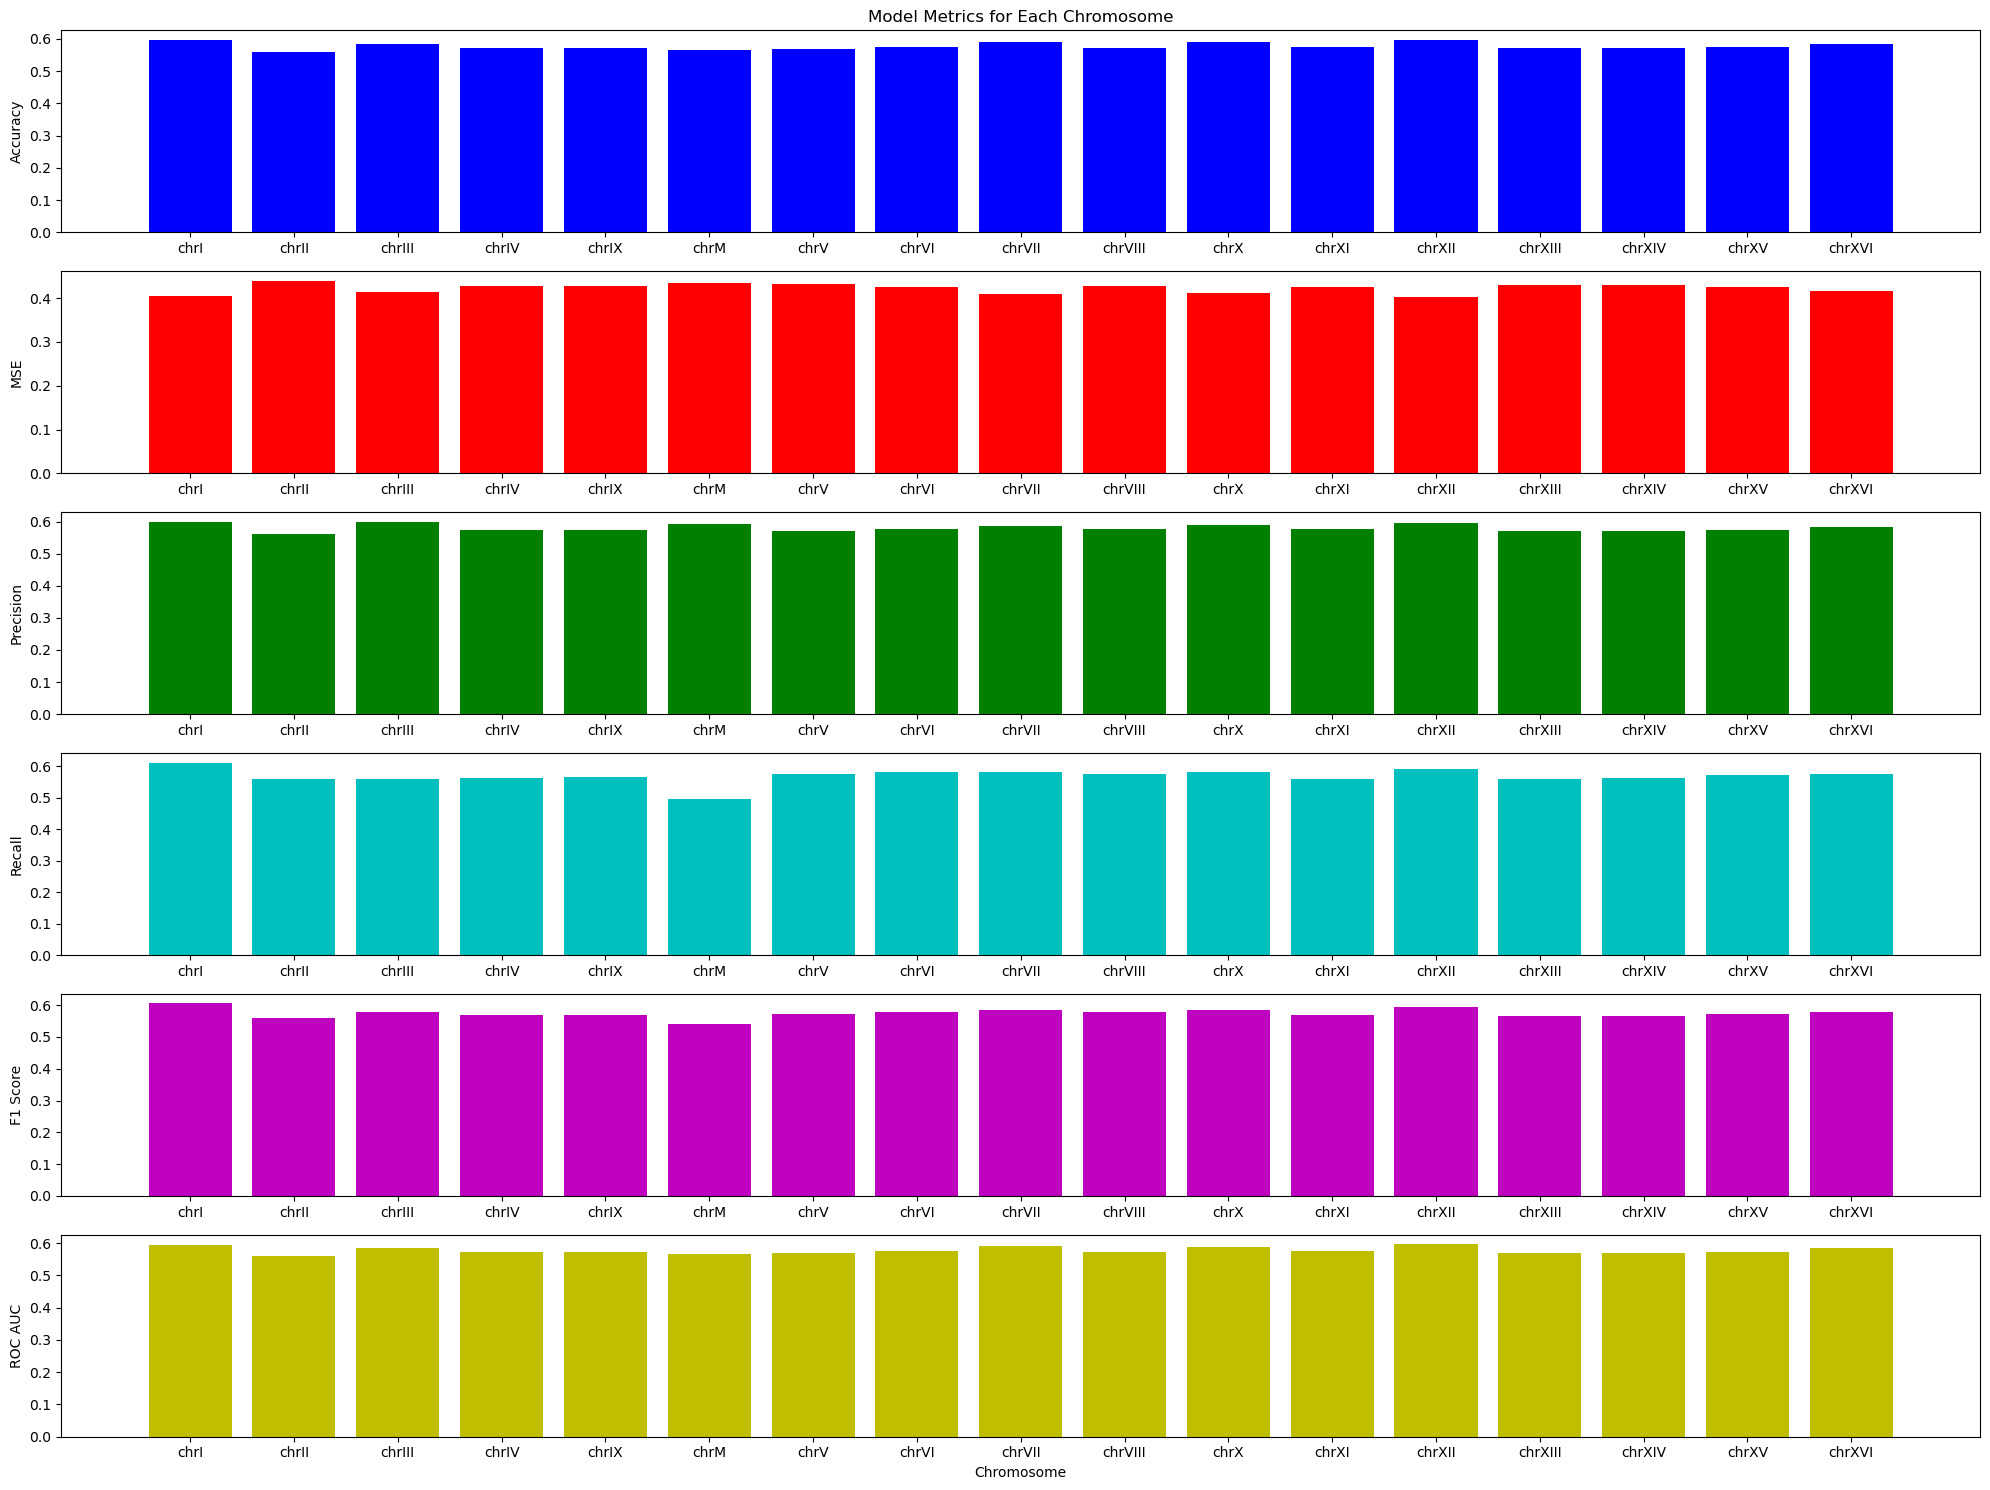

In [7]:
# Supplementary code 16b visualization.
# Description : This is clone of RFE just showing in sequence with the Supplementary code reference in the Thesis

import matplotlib.pyplot as plt

# Chromosome names
chromosomes = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrM', 'chrV', 'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV', 'chrXV', 'chrXVI']

# Metric values for each chromosome
accuracy = [0.5951, 0.5604, 0.5849, 0.5720, 0.5726, 0.5653, 0.5682, 0.5747, 0.5896, 0.5716, 0.5890, 0.5743, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]
MSE = [0.4049, 0.4396, 0.4151, 0.4280, 0.4274, 0.4347, 0.4318, 0.4253, 0.4104, 0.4284, 0.4110, 0.4257, 0.4036, 0.4298, 0.4300, 0.4265, 0.4160]
precision = [0.5988, 0.5601, 0.5997, 0.5745, 0.5729, 0.5924, 0.5695, 0.5766, 0.5850, 0.5770, 0.5886, 0.5774, 0.5957, 0.5714, 0.5692, 0.5730, 0.5842]
recall = [0.6124, 0.5589, 0.5608, 0.5641, 0.5650, 0.4960, 0.5770, 0.5826, 0.5832, 0.5768, 0.5829, 0.5586, 0.5905, 0.5592, 0.5643, 0.5718, 0.5745]
f1_score = [0.6056, 0.5595, 0.5796, 0.5692, 0.5689, 0.5400, 0.5733, 0.5796, 0.5841, 0.5769, 0.5857, 0.5678, 0.5930, 0.5652, 0.5667, 0.5724, 0.5793]
roc_auc = [0.5948, 0.5604, 0.5854, 0.5720, 0.5726, 0.5673, 0.5681, 0.5746, 0.5895, 0.5715, 0.5890, 0.5744, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]

plt.figure(figsize=(20, 15))

# Plot accuracy
plt.subplot(6, 1, 1)
plt.bar(chromosomes, accuracy, color='b')
plt.ylabel('Accuracy')
plt.title('Model Metrics for Each Chromosome')

# Plot MSE
plt.subplot(6, 1, 2)
plt.bar(chromosomes, MSE, color='r')
plt.ylabel('MSE')

# Plot precision
plt.subplot(6, 1, 3)
plt.bar(chromosomes, precision, color='g')
plt.ylabel('Precision')

# Plot recall
plt.subplot(6, 1, 4)
plt.bar(chromosomes, recall, color='c')
plt.ylabel('Recall')

# Plot F1 score
plt.subplot(6, 1, 5)
plt.bar(chromosomes, f1_score, color='m')
plt.ylabel('F1 Score')

# Plot ROC AUC
plt.subplot(6, 1, 6)
plt.bar(chromosomes, roc_auc, color='y')
plt.ylabel('ROC AUC')
plt.xlabel('Chromosome')

plt.tight_layout()
plt.show()


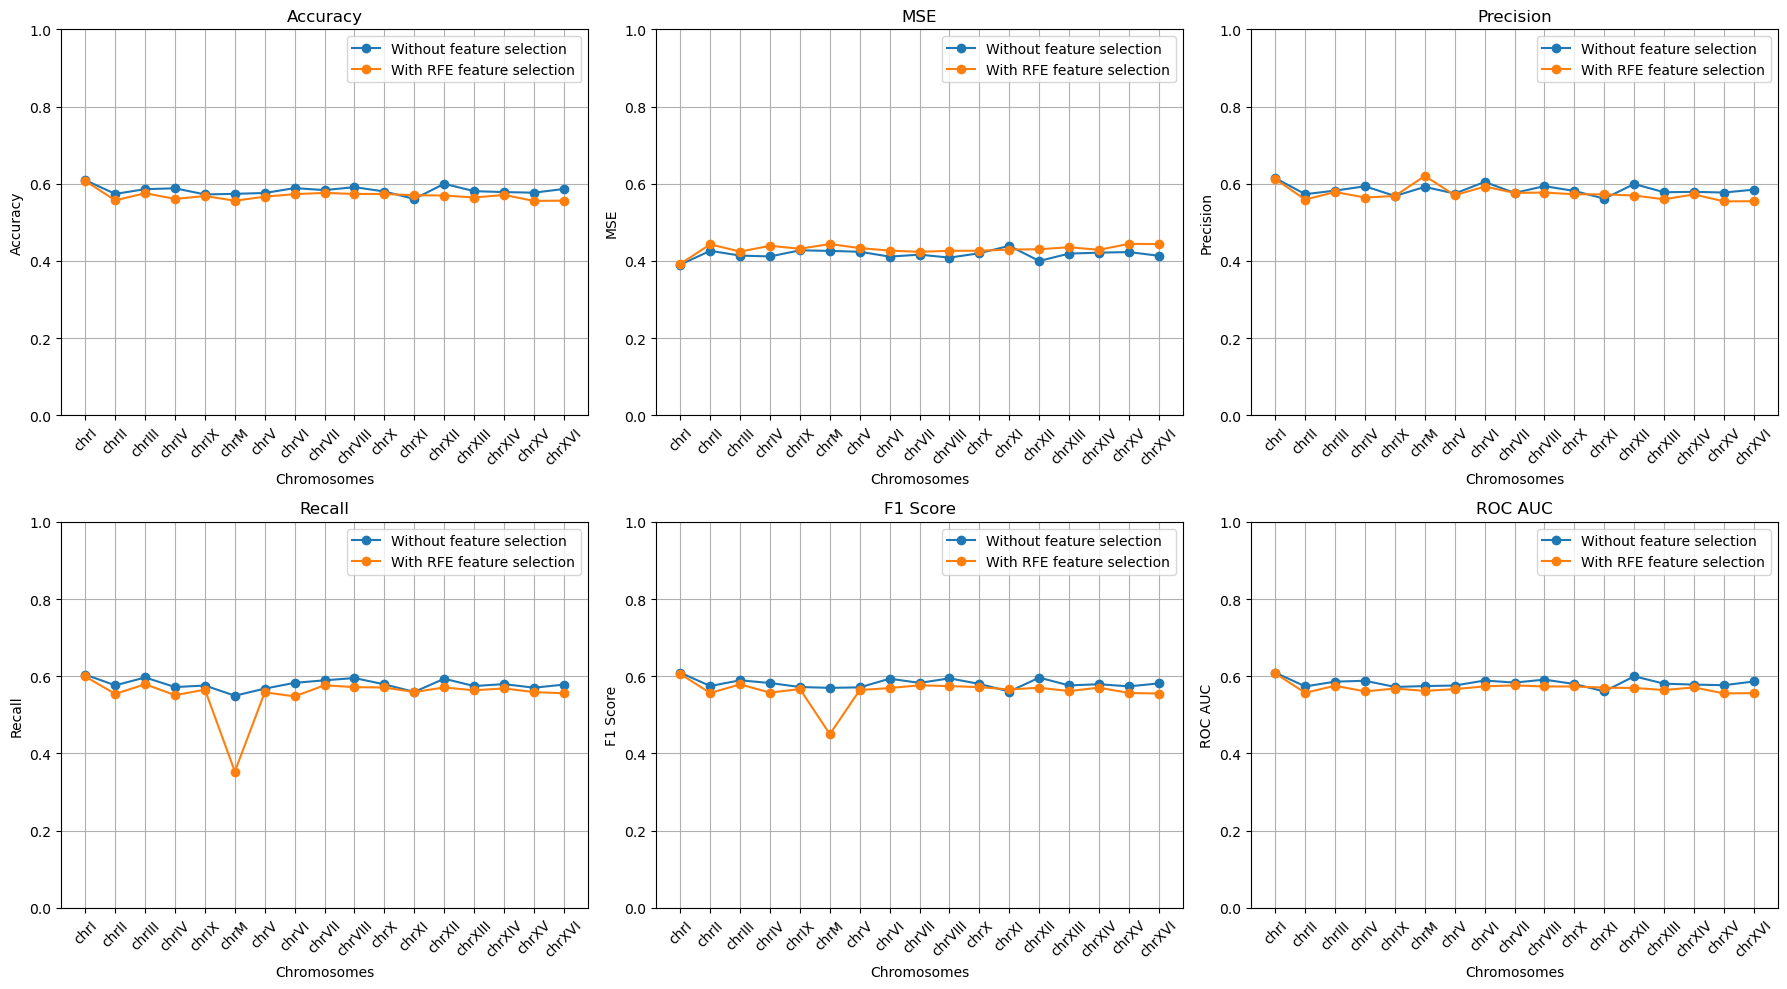

In [18]:
# Supplementary code 16c -Comparison with orginal and feature selection in RFE
import matplotlib.pyplot as plt



chromosomes = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrM', 'chrV', 'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV', 'chrXV', 'chrXVI']

# Metrics without feature selection
accuracy_no_fs = [0.609304652326163, 0.5737245829782053, 0.5860323886639676, 0.5882509657652857, 0.572351719363028, 
                  0.5739041794087666, 0.5760980592441267, 0.5887550200803213, 0.5835518920944174, 0.5912900874635568,
                  0.5799538857995389, 0.5607449009754656, 0.5999606066574749, 0.5808351177730193, 0.5784388507500635,
                  0.5768766818223996, 0.5865108868826341]
mse_no_fs = [0.3906953476738369, 0.4262754170217947, 0.4139676113360324, 0.41174903423471426, 0.4276482806369721,
             0.4260958205912334, 0.42390194075587334, 0.41124497991967873, 0.4164481079055826, 0.4087099125364432,
             0.4200461142004611, 0.4392550990245344, 0.40003939334252514, 0.41916488222698073, 0.42156114924993643,
             0.42312331817760046, 0.4134891131173659]
precision_no_fs = [0.6145307769929365, 0.5730201017195447, 0.5822868473231989, 0.5934791580685101, 0.568348623853211,
                   0.5918803418803419, 0.5746449601662625, 0.6046887631366209, 0.5763592503247356, 0.5938628158844765,
                   0.5813637598478675, 0.5614814814814815, 0.5993212218007586, 0.5780334273930975, 0.579107505070994,
                   0.5772846934937946, 0.5847384349329875]
recall_no_fs = [0.6041666666666666, 0.5765107212475633, 0.5968834688346883, 0.5720726694072404, 0.5760111576011158,
                0.5496031746031746, 0.5679561793906196, 0.583008573655495, 0.5894856709052951, 0.5953673543250091,
                0.579004329004329, 0.5594921759669323, 0.5936325884912003, 0.5746655157531291, 0.5796954314720812,
                0.5704199182460052, 0.5783621979901646]
f1_score_no_fs = [0.6093046523261632, 0.5747601117454147, 0.5894948143191703, 0.5825793382849427, 0.5721542368967907,
                  0.5699588477366255, 0.5712809917355373, 0.5936507936507937, 0.5828485644586225, 0.594614133381529,
                  0.5801816456554155, 0.5604850635906536, 0.596463341943175, 0.5763445514554703, 0.5794013191273465,
                  0.5738317757009347, 0.5815328388691821]
roc_auc_no_fs = [0.6093487218298015, 0.5737262781219564, 0.5860761430194947, 0.5883245723591802, 0.5723777144559199,
                 0.5745919436957173, 0.5760539447579579, 0.5889359355435719, 0.5836276144428455, 0.5912616588138807,
                 0.5799563391010223, 0.5607463839290121, 0.5999357762938637, 0.580787921497474, 0.5784366102852001,
                 0.576868902589175, 0.5864584312027649]

# Metrics with feature selection
accuracy = [0.5951, 0.5604, 0.5849, 0.5720, 0.5726, 0.5653, 0.5682, 0.5747, 0.5896, 0.5716, 0.5890, 0.5743, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]
MSE = [0.4049, 0.4396, 0.4151, 0.4280, 0.4274, 0.4347, 0.4318, 0.4253, 0.4104, 0.4284, 0.4110, 0.4257, 0.4036, 0.4298, 0.4300, 0.4265, 0.4160]
precision = [0.5988, 0.5601, 0.5997, 0.5745, 0.5729, 0.5924, 0.5695, 0.5766, 0.5850, 0.5770, 0.5886, 0.5774, 0.5957, 0.5714, 0.5692, 0.5730, 0.5842]
recall = [0.6124, 0.5589, 0.5608, 0.5641, 0.5650, 0.4960, 0.5770, 0.5826, 0.5832, 0.5768, 0.5829, 0.5586, 0.5905, 0.5592, 0.5643, 0.5718, 0.5745]
f1_score = [0.6056, 0.5595, 0.5796, 0.5692, 0.5689, 0.5400, 0.5733, 0.5796, 0.5841, 0.5769, 0.5857, 0.5678, 0.5930, 0.5652, 0.5667, 0.5724, 0.5793]
roc_auc = [0.5948, 0.5604, 0.5854, 0.5720, 0.5726, 0.5673, 0.5681, 0.5746, 0.5895, 0.5715, 0.5890, 0.5744, 0.5964, 0.5702, 0.5700, 0.5735, 0.5840]

metrics_no_fs = [accuracy_no_fs, mse_no_fs, precision_no_fs, recall_no_fs, f1_score_no_fs, roc_auc_no_fs]
metrics_fs = [accuracy_fs, mse_fs, precision_fs, recall_fs, f1_score_fs, roc_auc_fs]
metric_names = ['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Define y-axis limits for each metric
ylimits = {
    'Accuracy': [0, 1],
    'MSE': [0, 1],
    'Precision': [0, 1],
    'Recall': [0, 1],
    'F1 Score': [0, 1],
    'ROC AUC': [0, 1]
}

fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns, total figure size

for i in range(len(metric_names)):
    row = i // 3  # Determines row number: 0 or 1
    col = i % 3   # Determines column number: 0, 1 or 2
    
    axs[row, col].plot(chromosomes, metrics_no_fs[i], marker='o', label='Without feature selection')
    axs[row, col].plot(chromosomes, metrics_fs[i], marker='o', label='With RFE feature selection')
    axs[row, col].set_title(metric_names[i])
    axs[row, col].set_xlabel('Chromosomes')
    axs[row, col].set_ylabel(metric_names[i])
    axs[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axs[row, col].legend()
    axs[row, col].grid(True)
    
    axs[row, col].set_ylim(ylimits[metric_names[i]])  # Set the y-axis limit based on the metric

plt.tight_layout()  # Adjusts subplot params so that subplots don’t overlap
plt.show()

In [ ]:
# Supplementary code 14a 

#Description: This is Feature reduction which we did using Boruta by taking 10000 records from Histone modification files
# because of execution time constraints

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from boruta import BorutaPy

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# Specify the path to your wig files
wig_files = ['/media/sf_virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'/media/sf_virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'/media/sf_virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'/media/sf_virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'/media/sf_virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'/media/sf_virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'/media/sf_virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'/media/sf_virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'/media/sf_virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'/media/sf_virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'/media/sf_virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'/media/sf_virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'/media/sf_virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'/media/sf_virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'/media/sf_virtualbox/GSM1516554_htz1_tp1_0.wig'] 

all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df = wig_df.iloc[:10000] # Take only the first 10000 records
    wig_df["start"] = wig_df["start"].astype(int)
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series


# Specify the path to your bedgraph file
bedgraph_file = "/media/sf_virtualbox/wt-1.neg.bedgraph" 
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

chromosomes = data[0].unique()

for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

window_size = 200

for chromosome, df in all_chromosomes.items():
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    df["is_pause"] = np.where(pause_condition, 1, 0)

clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=50, random_state=42)

# For each chromosome, process data and fit the model
for chromosome, df in all_chromosomes.items():
    pause_samples = df[df['is_pause'] == 1]
    non_pause_samples = df[df['is_pause'] == 0].sample(n=len(pause_samples))
    final_df = pd.concat([pause_samples, non_pause_samples])
    
    column_to_drop = ['wt_score','is_pause','score_0', 'score_1']
    X = final_df.drop(column_to_drop, axis=1)
    y = final_df['is_pause']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Apply Boruta for feature selection
    boruta_selector = BorutaPy(clf, n_estimators='auto', verbose=2, random_state=42)

    # Fit the Boruta model
    boruta_selector.fit(X_train, y_train)

    # Select the important features
    X_important_train = boruta_selector.transform(np.array(X_train))
    X_important_test = boruta_selector.transform(np.array(X_test))

    # Fit the classifier on the important features data
    clf.fit(X_important_train, y_train)

    # Predict on the important features test data
    y_pred = clf.predict(X_important_test)

    # Print the evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
    print(f"F1 Score: {metrics.f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {metrics.roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{metrics.confusion_matrix(y_test, y_pred)}")
    print("\n")

    # Print the ranking of the features
    features_rank = boruta_selector.ranking_
    features_importances = clf.feature_importances_
    indices = np.argsort(features_importances)[::-1]

    print("Feature Ranking:")
    important_features = boruta_selector.support_
    for i, importance in enumerate(important_features):
        if importance:
            print(f"{i+1}. feature {i} ({features_importances[i]})")



In [ ]:
# Supplementary code 14a Result

Chromosome: chrI

Accuracy: 0.640625

MSE: 0.359375

Precision: 0.6451612903225806

Recall: 0.625

F1 Score: 0.634920634920635

ROC AUC Score: 0.640625

Confusion Matrix: 

[[21 11]

 [12 20]]

Feature Ranking:

1. feature 1 (0.487615)

2. feature 2 (0.225184)

3. feature 0 (0.145843)

4. feature 3 (0.141358)



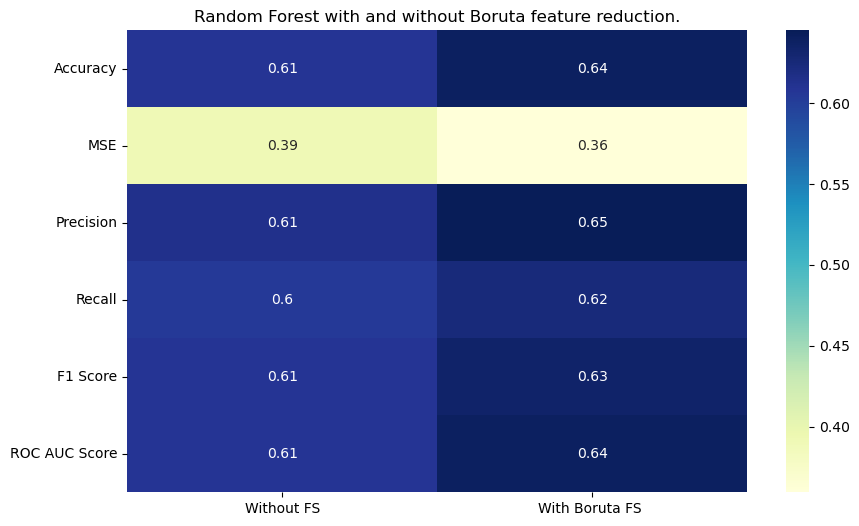

In [37]:
# Supplementary code 14b Comparison

#Description : This program does the visual comparison of Random Forest with Boruta and without Boruta feature reduction

import seaborn as sns

# We'll use the same data, but represented as a matrix
data = {
    'Without FS': [0.609304652326163, 0.3906953476738369, 0.6145307769929365, 0.6041666666666666, 0.6093046523261632, 0.6093487218298015],
    'With Boruta FS ': [0.640625, 0.359375, 0.6451612903225806, 0.625, 0.634920634920635, 0.640625]
}

df = pd.DataFrame(data, index=['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

plt.figure(figsize=(10,6))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.title('Random Forest with and without Boruta feature reduction.')
plt.show()


In [34]:
#Important Result in the table of final result- Percentage of improvement in Random Forest with Boruta Algorithm
#"Random Forest Binary Classification with Boruta Algorithm (%Improvement)" in the final reault table
metrics_data = {
    'Without FS': [0.609304652326163, 0.3906953476738369, 0.6145307769929365, 0.6041666666666666, 0.6093046523261632, 0.6093487218298015],
    'With Boruta FS': [0.640625, 0.359375, 0.6451612903225806, 0.625, 0.634920634920635, 0.640625]
}

metric_names = ['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Curve']

percentage_improvements = []

for without_fs, with_fs in zip(metrics_data['Without FS'], metrics_data['With Boruta FS']):
    improvement_percentage = ((with_fs - without_fs) / without_fs) * 100
    percentage_improvements.append(improvement_percentage)

# Display the results
for metric, improvement in zip(metric_names, percentage_improvements):
    print(f"{metric}: {improvement:.2f}%")


Accuracy: 5.14%
MSE: -8.02%
Precision: 4.98%
Recall: 3.45%
F1 Score: 4.20%
ROC AUC Curve: 5.13%


In [ ]:
#Supplementary code 14c
#
# Description : This program does the RFECV feature reduction

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")
    #Commenting below code just to avoid crashing because RFECV takes more resources
    from sklearn.feature_selection import RFECV

    #Initialize the RFECV (recursive feature elimination with cross-validation)
    rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')

    # Fit RFECV to the training set
    rfecv = rfecv.fit(X_train, y_train)

    # Now we can use only the selected features
    X_train_rfecv = rfecv.transform(X_train)
    X_test_rfecv = rfecv.transform(X_test)

    #Train classifier on the selected features
    clf.fit(X_train_rfecv, y_train)

    # Test the classifier
    print(f"Accuracy after RFE: {clf.score(X_test_rfecv, y_test)}")

    # The mask of selected features
    print(f"Mask of selected features: {rfecv.support_}")

    # The ranking of the features, selected features are ranked 1
    print(f"Feature ranking: {rfecv.ranking_}")




In [ ]:

# Supplementary code 14c
#Results

Chromosome: chrI
Accuracy: 0.6221221221221221
MSE: 0.37787787787787785
Precision: 0.6377245508982036
Recall: 0.6197866149369544
F1 Score: 0.6286276438760452
ROC AUC Score: 0.6221994088128412
Confusion Matrix: 
[[604 363]
 [392 639]]


Accuracy after RFE: 0.6266266266266266
Mask of selected features: [False  True False  True False  True False  True False False  True  True
 False  True False False False  True False False False  True  True  True
 False  True]
Feature ranking: [ 5  1  7  1 13  1  9  1 12 11  1  1  3  1  6  4 10  1  2  8 14  1  1  1
 15  1]
Chromosome: chrII
Accuracy: 0.584195787166687
MSE: 0.41580421283331304
Precision: 0.5876365441906654
Recall: 0.5743751516622179
F1 Score: 0.5809301754816542
ROC AUC Score: 0.5842305865837971
Confusion Matrix: 
[[2431 1661]
 [1754 2367]]


Accuracy after RFE: 0.5810300742724949
Mask of selected features: [ True  True False  True False  True  True  True  True False False  True
  True False  True False  True  True  True False False  True  True  True
  True  True]
Feature ranking: [1 1 9 1 7 1 1 1 1 3 6 1 1 8 1 5 1 1 1 4 2 1 1 1 1 1]
Chromosome: chrIII
Accuracy: 0.5865092748735244
MSE: 0.41349072512647556
Precision: 0.5849184782608695
Recall: 0.5833333333333334
F1 Score: 0.5841248303934871
ROC AUC Score: 0.5864954107902396
Confusion Matrix: 
[[878 611]
 [615 861]]


Accuracy after RFE: 0.5871838111298482
Mask of selected features: [ True  True  True  True  True  True  True  True False False False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True]
Feature ranking: [1 1 1 1 1 1 1 1 4 5 3 1 2 6 1 1 1 1 1 1 1 1 1 1 1 1]
Chromosome: chrIV
Accuracy: 0.5824175824175825
MSE: 0.4175824175824176
Precision: 0.585336048879837
Recall: 0.5727381426863292
F1 Score: 0.5789685737308622
ROC AUC Score: 0.5824427892918825
Confusion Matrix: 
[[4434 3054]
 [3216 4311]]


Accuracy after RFE: 0.5791541791541791
Mask of selected features: [ True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True]
Feature ranking: [1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1]
Chromosome: chrIX
Accuracy: 0.5628894530348488
MSE: 0.43711054696515117
Precision: 0.5673823663773413
Recall: 0.5673823663773413
F1 Score: 0.5673823663773413
ROC AUC Score: 0.5628423025916557
Confusion Matrix: 
[[1197  947]
 [ 947 1242]]


Accuracy after RFE: 0.5610431571659359
Mask of selected features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Feature ranking: [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Chromosome: chrM
Accuracy: 0.6221995926680245
MSE: 0.37780040733197556
Precision: 0.6384297520661157
Recall: 0.6118811881188119
F1 Score: 0.6248736097067746
ROC AUC Score: 0.6225024389231376
Confusion Matrix: 
[[302 175]
 [196 309]]


Accuracy after RFE: 0.6191446028513238
Mask of selected features: [ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Feature ranking: [1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Chromosome: chrV
Accuracy: 0.5828795098706603
MSE: 0.41712049012933966
Precision: 0.5843845891578588
Recall: 0.581805838424983
F1 Score: 0.5830923626467086
ROC AUC Score: 0.5828824413967918
Confusion Matrix: 
[[1711 1219]
 [1232 1714]]

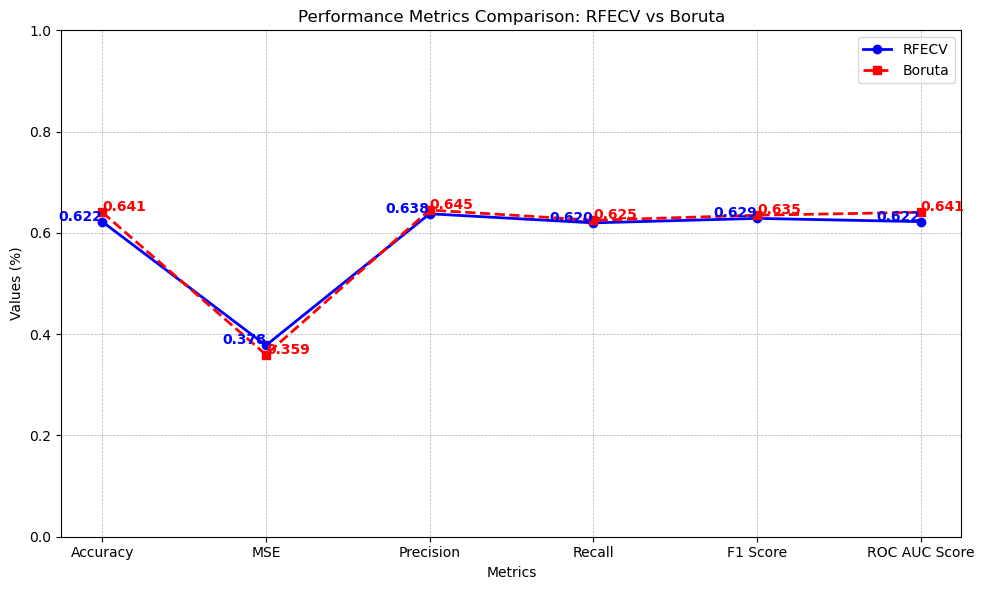

In [35]:
#Supplementary code 14d
# Description : Comparison of RFECV and Boruta feature reduction

import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
rfecv_values = [0.6221221221221221, 0.37787787787787785, 0.6377245508982036, 0.6197866149369544, 0.6286276438760452, 0.6221994088128412]
boruta_values = [0.640625, 0.359375, 0.6451612903225806, 0.625, 0.634920634920635, 0.640625]

# Create a grouped line chart
plt.figure(figsize=(10, 6))

# Plot data
plt.plot(metrics, rfecv_values, marker='o', label='RFECV', color='b', linestyle='-', linewidth=2)
plt.plot(metrics, boruta_values, marker='s', label='Boruta', color='r', linestyle='--', linewidth=2)

# Annotate with exact values
for i, v in enumerate(rfecv_values):
    plt.text(i, v + 0.01, f"{v:.3f}", color='b', va='center', fontweight='bold', ha='right')

for i, v in enumerate(boruta_values):
    plt.text(i, v + 0.01, f"{v:.3f}", color='r', va='center', fontweight='bold', ha='left')

plt.xlabel('Metrics')
plt.ylabel('Values (%)')
plt.title('Performance Metrics Comparison: RFECV vs Boruta')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.tight_layout()

# Show the plot
plt.show()



In [3]:
# &&&&& Here onwards Supplementary document referenced supplementary codes&&&&&&&&&&&&&&&&&&

Average intensity at pause locations: 47.91396332863187


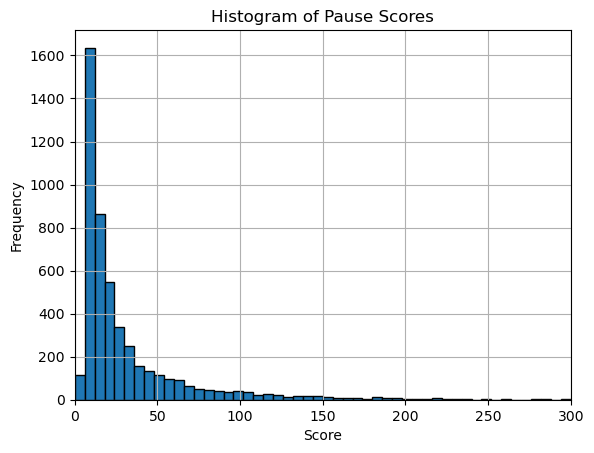

In [7]:
#Supplementary code 18 

# Description : Calculates Average intensity of pause location and showing pause intensities in a histogram

import pandas as pd
import numpy as np

# Load data from bedgraph files
df_neg = pd.read_csv('C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph', sep='\t', header=None, names=['chromosome', 'start', 'end', 'score_neg'])
df_pos = pd.read_csv('C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.pos.bedgraph', sep='\t', header=None, names=['chromosome', 'start', 'end', 'score_pos'])

# Merge dataframes
merged_df = pd.merge(df_neg, df_pos, on=['chromosome', 'start', 'end'])

# Calculate rolling mean and standard deviation
window_size = 200
rolling_mean = merged_df['score_pos'].rolling(window_size).mean()
rolling_std = merged_df['score_pos'].rolling(window_size).std()

# Identify pause locations
merged_df['is_pause'] = (merged_df['score_pos'] - rolling_mean) > 3 * rolling_std

# Calculate average intensity at pause locations
pause_intensity = merged_df.loc[merged_df['is_pause'], 'score_pos'].mean()

print(f'Average intensity at pause locations: {pause_intensity}')
import matplotlib.pyplot as plt

# Extract the pause scores
pause_scores = merged_df.loc[merged_df['is_pause'], 'score_pos']

# Plot histogram
plt.hist(pause_scores, bins=50, edgecolor='black', range=(0,300)) # Added range=(0,300) to limit the x-axis values
plt.title('Histogram of Pause Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xlim(0, 300) # Set the x-axis range to 0-300
plt.grid(True)
plt.show()


In [ ]:
#Supplementary code 19 

#Description : Take equal number of pause and non pause from each chromosome rather than randomly taking.Here we took 500 as number of 
#of pause

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

sample_size_per_chromosome = 500 # adjust this to your preferred sample size

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    num_pause_locations = df["target"].sum()
    num_non_pause_locations = df.shape[0] - num_pause_locations

    # Make sure there are enough pause and non-pause locations to sample from
    if num_pause_locations >= sample_size_per_chromosome and num_non_pause_locations >= sample_size_per_chromosome:
        pause_df = assign_random_locations(df[df["target"] == 1], sample_size_per_chromosome)
        non_pause_df = assign_random_locations(df[df["target"] == 0], sample_size_per_chromosome)

        # Combine pause and non-pause locations
        final_df = pd.concat([pause_df, non_pause_df])
    else:
        print(f"Not enough data for chromosome {chromosome}. Skipping...")
        continue

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    

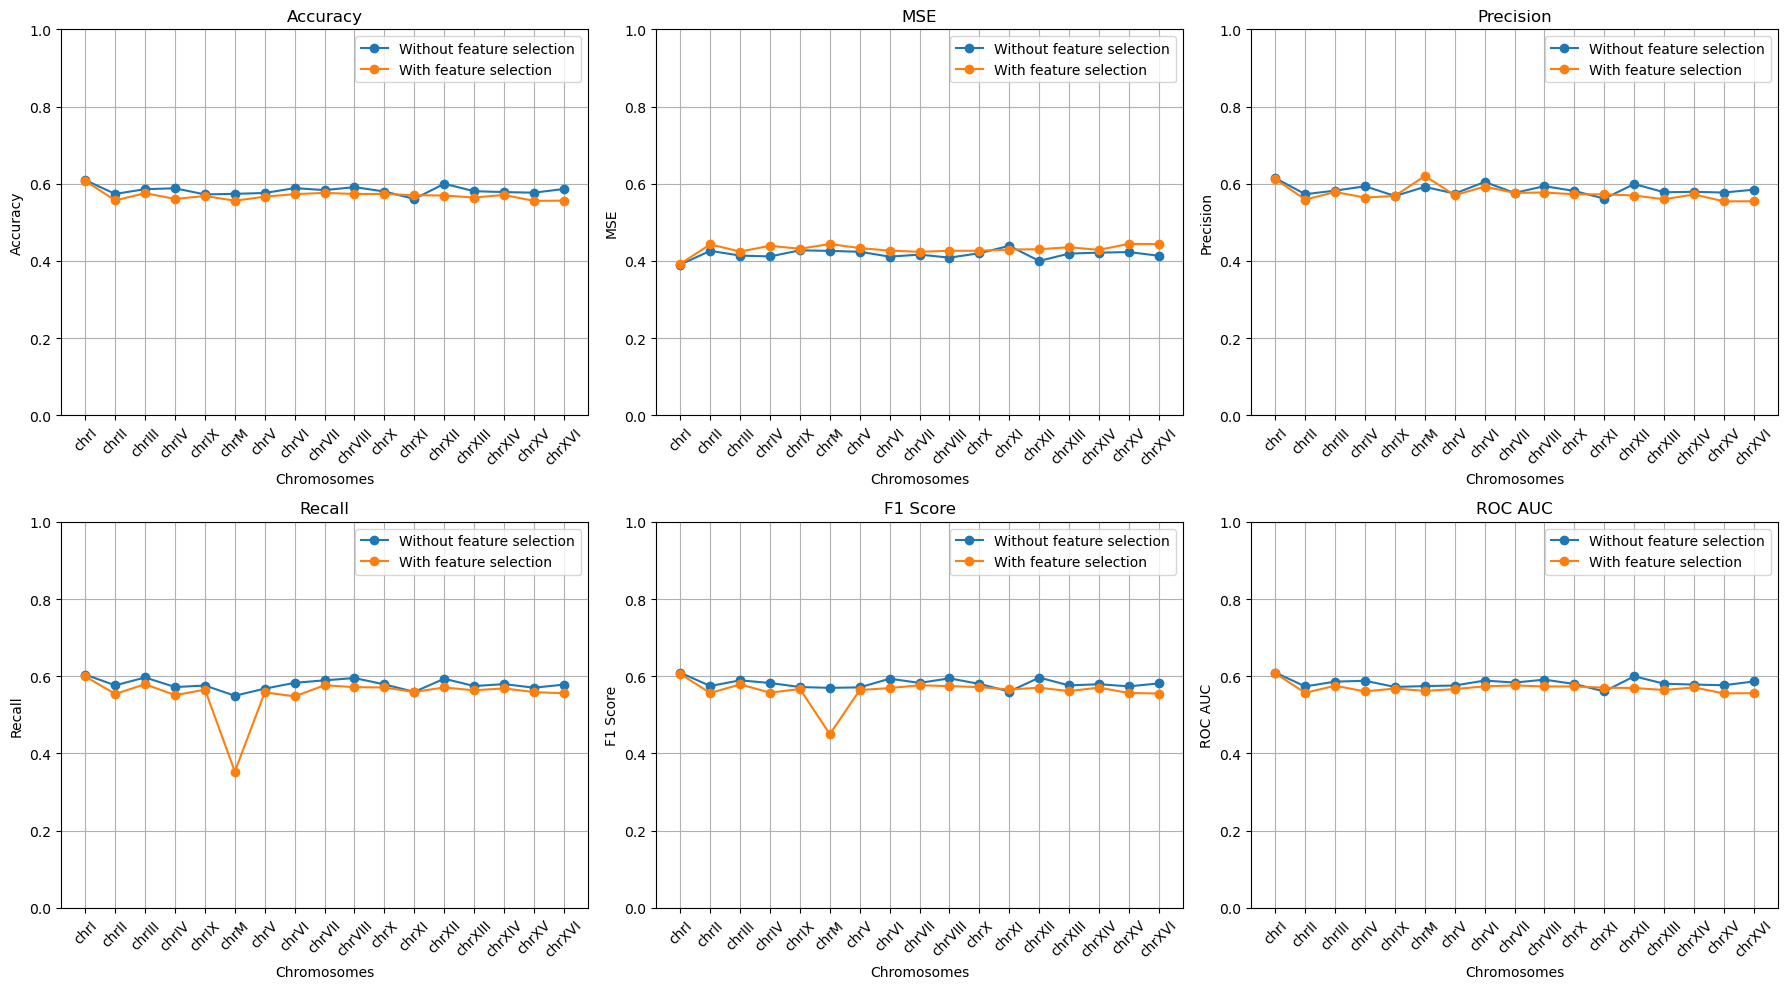

In [16]:
#Supplementary code 20 

#Description : Comparison of random forest binary classification with and without feature reduction

import matplotlib.pyplot as plt

chromosomes = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrIX', 'chrM', 'chrV', 'chrVI', 'chrVII', 'chrVIII', 'chrX', 'chrXI', 'chrXII', 'chrXIII', 'chrXIV', 'chrXV', 'chrXVI']

# Metrics without feature selection
accuracy_no_fs = [0.609304652326163, 0.5737245829782053, 0.5860323886639676, 0.5882509657652857, 0.572351719363028, 
                  0.5739041794087666, 0.5760980592441267, 0.5887550200803213, 0.5835518920944174, 0.5912900874635568,
                  0.5799538857995389, 0.5607449009754656, 0.5999606066574749, 0.5808351177730193, 0.5784388507500635,
                  0.5768766818223996, 0.5865108868826341]
mse_no_fs = [0.3906953476738369, 0.4262754170217947, 0.4139676113360324, 0.41174903423471426, 0.4276482806369721,
             0.4260958205912334, 0.42390194075587334, 0.41124497991967873, 0.4164481079055826, 0.4087099125364432,
             0.4200461142004611, 0.4392550990245344, 0.40003939334252514, 0.41916488222698073, 0.42156114924993643,
             0.42312331817760046, 0.4134891131173659]
precision_no_fs = [0.6145307769929365, 0.5730201017195447, 0.5822868473231989, 0.5934791580685101, 0.568348623853211,
                   0.5918803418803419, 0.5746449601662625, 0.6046887631366209, 0.5763592503247356, 0.5938628158844765,
                   0.5813637598478675, 0.5614814814814815, 0.5993212218007586, 0.5780334273930975, 0.579107505070994,
                   0.5772846934937946, 0.5847384349329875]
recall_no_fs = [0.6041666666666666, 0.5765107212475633, 0.5968834688346883, 0.5720726694072404, 0.5760111576011158,
                0.5496031746031746, 0.5679561793906196, 0.583008573655495, 0.5894856709052951, 0.5953673543250091,
                0.579004329004329, 0.5594921759669323, 0.5936325884912003, 0.5746655157531291, 0.5796954314720812,
                0.5704199182460052, 0.5783621979901646]
f1_score_no_fs = [0.6093046523261632, 0.5747601117454147, 0.5894948143191703, 0.5825793382849427, 0.5721542368967907,
                  0.5699588477366255, 0.5712809917355373, 0.5936507936507937, 0.5828485644586225, 0.594614133381529,
                  0.5801816456554155, 0.5604850635906536, 0.596463341943175, 0.5763445514554703, 0.5794013191273465,
                  0.5738317757009347, 0.5815328388691821]
roc_auc_no_fs = [0.6093487218298015, 0.5737262781219564, 0.5860761430194947, 0.5883245723591802, 0.5723777144559199,
                 0.5745919436957173, 0.5760539447579579, 0.5889359355435719, 0.5836276144428455, 0.5912616588138807,
                 0.5799563391010223, 0.5607463839290121, 0.5999357762938637, 0.580787921497474, 0.5784366102852001,
                 0.576868902589175, 0.5864584312027649]

# Metrics with feature selection
accuracy_fs = [0.6073, 0.5570, 0.5756, 0.5607, 0.5683, 0.5561, 0.5666, 0.5731, 0.5763, 0.5736, 0.5735, 0.5703, 0.5696, 0.5644, 0.5711, 0.5556, 0.5563]
mse_fs = [0.3927, 0.4430, 0.4244, 0.4393, 0.4317, 0.4439, 0.4334, 0.4269, 0.4237, 0.4264, 0.4265, 0.4296, 0.4304, 0.4356, 0.4289, 0.4444, 0.4437]
precision_fs = [0.6122, 0.5591, 0.5786, 0.5643, 0.5685, 0.6202, 0.5704, 0.5927, 0.5765, 0.5773, 0.5728, 0.5726, 0.5696, 0.5598, 0.5724, 0.5545, 0.5547]
recall_fs = [0.5994, 0.5542, 0.5794, 0.5510, 0.5654, 0.3532, 0.5584, 0.5479, 0.5767, 0.5718, 0.5710, 0.5592, 0.5710, 0.5636, 0.5686, 0.5590, 0.5560]
f1_score_fs = [0.6057, 0.5567, 0.5790, 0.5576, 0.5669, 0.4501, 0.5643, 0.5695, 0.5766, 0.5745, 0.5719, 0.5658, 0.5703, 0.5617, 0.5705, 0.5567, 0.5553]
roc_auc_fs = [0.6074, 0.5571, 0.5755, 0.5607, 0.5683, 0.5621, 0.5667, 0.5739, 0.5763, 0.5736, 0.5735, 0.5704, 0.5696, 0.5644, 0.5711, 0.5556, 0.5563]

metrics_no_fs = [accuracy_no_fs, mse_no_fs, precision_no_fs, recall_no_fs, f1_score_no_fs, roc_auc_no_fs]
metrics_fs = [accuracy_fs, mse_fs, precision_fs, recall_fs, f1_score_fs, roc_auc_fs]
metric_names = ['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Define y-axis limits for each metric
ylimits = {
    'Accuracy': [0, 1],
    'MSE': [0, 1],
    'Precision': [0, 1],
    'Recall': [0, 1],
    'F1 Score': [0, 1],
    'ROC AUC': [0, 1]
}

fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns, total figure size

for i in range(len(metric_names)):
    row = i // 3  # Determines row number: 0 or 1
    col = i % 3   # Determines column number: 0, 1 or 2
    
    axs[row, col].plot(chromosomes, metrics_no_fs[i], marker='o', label='Without feature selection')
    axs[row, col].plot(chromosomes, metrics_fs[i], marker='o', label='With feature selection')
    axs[row, col].set_title(metric_names[i])
    axs[row, col].set_xlabel('Chromosomes')
    axs[row, col].set_ylabel(metric_names[i])
    axs[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    axs[row, col].legend()
    axs[row, col].grid(True)
    
    axs[row, col].set_ylim(ylimits[metric_names[i]])  # Set the y-axis limit based on the metric

plt.tight_layout()  # Adjusts subplot params so that subplots don’t overlap
plt.show()





In [ ]:
# Supplementary code 21a   
#
# Description : Pause Window Size optimization - Window 100

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 100

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")








In [ ]:
Result :
    
    Chromosome: chrI
Accuracy: 0.5705614567526556
MSE: 0.4294385432473445
Precision: 0.5684410646387833
Recall: 0.6022155085599195
F1 Score: 0.5848410757946211
ROC AUC Score: 0.5704166973693906
Confusion Matrix: 
[[530 454]
 [395 598]]

Chromosome: chrII
Accuracy: 0.531093906093906
MSE: 0.4689060939060939
Precision: 0.5348432055749129
Recall: 0.5325898389095415
F1 Score: 0.5337141437973426
ROC AUC Score: 0.5310822338267819
Confusion Matrix: 
[[2104 1869]
 [1886 2149]]


Chromosome: chrIII
Accuracy: 0.5549719887955182
MSE: 0.44502801120448177
Precision: 0.5487558843308675
Recall: 0.576271186440678
F1 Score: 0.562177058215639
ROC AUC Score: 0.5551494821092279
Confusion Matrix: 
[[769 671]
 [600 816]]


Chromosome: chrIV
Accuracy: 0.5384562654236359
MSE: 0.46154373457636416
Precision: 0.5382005699552178
Recall: 0.5435855263157895
F1 Score: 0.5408796454142517
ROC AUC Score: 0.53845485860496
Confusion Matrix: 
[[3889 3403]
 [3330 3966]]


Chromosome: chrIX
Accuracy: 0.54089087909498
MSE: 0.45910912090502004
Precision: 0.5426029962546817
Recall: 0.544131455399061
F1 Score: 0.5433661509610876
ROC AUC Score: 0.5408778431751576
Confusion Matrix: 
[[1136  977]
 [ 971 1159]]


Chromosome: chrM
Accuracy: 0.5232903865213082
MSE: 0.4767096134786918
Precision: 0.5354969574036511
Recall: 0.5116279069767442
F1 Score: 0.5232903865213081
ROC AUC Score: 0.5235624321901977
Confusion Matrix: 
[[264 229]
 [252 264]]


Chromosome: chrV
Accuracy: 0.5351063829787234
MSE: 0.4648936170212766
Precision: 0.5344273992151266
Recall: 0.5321492007104796
F1 Score: 0.5332858668565326
ROC AUC Score: 0.5351011490278061
Confusion Matrix: 
[[1520 1305]
 [1317 1498]]


Chromosome: chrVI
Accuracy: 0.5393258426966292
MSE: 0.4606741573033708
Precision: 0.5516129032258065
Recall: 0.5538461538461539
F1 Score: 0.5527272727272728
ROC AUC Score: 0.53890937829294
Confusion Matrix: 
[[612 556]
 [551 684]]


Chromosome: chrVII
Accuracy: 0.5361312108055958
MSE: 0.4638687891944042
Precision: 0.532155884046842
Recall: 0.5389850281936613
F1 Score: 0.535548686244204
ROC AUC Score: 0.5361527975131463
Confusion Matrix: 
[[2785 2437]
 [2371 2772]]


Chromosome: chrVIII
Accuracy: 0.5379984951091046
MSE: 0.4620015048908954
Precision: 0.5455207574654042
Recall: 0.5535846267553585
F1 Score: 0.549523110785033
ROC AUC Score: 0.5377118536075643
Confusion Matrix: 
[[1362 1248]
 [1208 1498]]


Chromosome: chrX
Accuracy: 0.5335105638729537
MSE: 0.4664894361270463
Precision: 0.5329566854990584
Recall: 0.5535065660799106
F1 Score: 0.5430372807017544
ROC AUC Score: 0.5334797404390584
Confusion Matrix: 
[[1832 1736]
 [1598 1981]]


Chromosome: chrXI
Accuracy: 0.5148710166919576
MSE: 0.4851289833080425
Precision: 0.5184178743961353
Recall: 0.5173244953299186
F1 Score: 0.5178706077514704
ROC AUC Score: 0.5148530150143937
Confusion Matrix: 
[[1676 1595]
 [1602 1717]]


Chromosome: chrXII
Accuracy: 0.5411740931595433
MSE: 0.4588259068404567
Precision: 0.5373305327477563
Recall: 0.5705596107055961
F1 Score: 0.5534467499262463
ROC AUC Score: 0.5412717489580348
Confusion Matrix: 
[[2542 2423]
 [2118 2814]]


Chromosome: chrXIII
Accuracy: 0.5203689469638739
MSE: 0.4796310530361261
Precision: 0.5219080509389165
Recall: 0.5289870925399256
F1 Score: 0.5254237288135594
ROC AUC Score: 0.5203356979454479
Confusion Matrix: 
[[2321 2215]
 [2153 2418]]


Chromosome: chrXIV
Accuracy: 0.5228386071759565
MSE: 0.4771613928240434
Precision: 0.5252631578947369
Recall: 0.5258166491043204
F1 Score: 0.5255397577672459
ROC AUC Score: 0.5228231502109305
Confusion Matrix: 
[[1953 1804]
 [1800 1996]]


Chromosome: chrXV
Accuracy: 0.5324401913875598
MSE: 0.4675598086124402
Precision: 0.5269394556563599
Recall: 0.5497392312149894
F1 Score: 0.538097939118926
ROC AUC Score: 0.5325976641567076
Confusion Matrix: 
[[2718 2555]
 [2331 2846]]


Chromosome: chrXVI
Accuracy: 0.5387799564270153
MSE: 0.46122004357298474
Precision: 0.5368058544984933
Recall: 0.5450174825174825
F1 Score: 0.5408805031446541
ROC AUC Score: 0.5387989237087847
Confusion Matrix: 
[[2452 2152]
 [2082 2494]]

In [ ]:
# Supplementary code 21b 
#
# Description : Pause Window Size optimization - Window 300
#

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 300

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")




In [ ]:
# Supplementary code 21b results
Chromosome: chrI
Accuracy: 0.6069868995633187
MSE: 0.3930131004366812
Precision: 0.6147934678194045
Recall: 0.6101048617731173
F1 Score: 0.6124401913875599
ROC AUC Score: 0.6069299012422898
Confusion Matrix: 
[[611 401]
 [409 640]]


Chromosome: chrII
Accuracy: 0.5735294117647058
MSE: 0.4264705882352941
Precision: 0.5787972426907535
Recall: 0.5717304531580183
F1 Score: 0.5752421450507914
ROC AUC Score: 0.5735479488411707
Confusion Matrix: 
[[2401 1772]
 [1824 2435]]


Chromosome: chrIII
Accuracy: 0.6027442012414244
MSE: 0.39725579875857564
Precision: 0.5975531229877656
Recall: 0.6109282422646478
F1 Score: 0.6041666666666666
ROC AUC Score: 0.6028052365668246
Confusion Matrix: 
[[917 625]
 [591 928]]


Chromosome: chrIV
Accuracy: 0.577968160603542
MSE: 0.42203183939645805
Precision: 0.5744733275840828
Recall: 0.5970550576184379
F1 Score: 0.5855465561624913
ROC AUC Score: 0.5779937527908305
Confusion Matrix: 
[[4377 3454]
 [3147 4663]]


Chromosome: chrIX
Accuracy: 0.5920698924731183
MSE: 0.40793010752688175
Precision: 0.6026548672566372
Recall: 0.5960612691466083
F1 Score: 0.5993399339933994
ROC AUC Score: 0.5919728098830792
Confusion Matrix: 
[[1281  898]
 [ 923 1362]]


Chromosome: chrM
Accuracy: 0.611049723756906
MSE: 0.3889502762430939
Precision: 0.6299376299376299
Recall: 0.6352201257861635
F1 Score: 0.6325678496868475
ROC AUC Score: 0.6096661376594369
Confusion Matrix: 
[[250 178]
 [174 303]]


Chromosome: chrV
Accuracy: 0.5997355808957198
MSE: 0.4002644191042803
Precision: 0.6056430446194225
Recall: 0.6020874103065884
F1 Score: 0.6038599934576382
ROC AUC Score: 0.5997036716524566
Confusion Matrix: 
[[1783 1202]
 [1220 1846]]


Chromosome: chrVI
Accuracy: 0.604570100697134
MSE: 0.395429899302866
Precision: 0.6095679012345679
Recall: 0.6053639846743295
F1 Score: 0.6074586697424069
ROC AUC Score: 0.604561397192294
Confusion Matrix: 
[[771 506]
 [515 790]]


Chromosome: chrVII
Accuracy: 0.5826236637071933
MSE: 0.4173763362928067
Precision: 0.580696765019552
Recall: 0.5923844061650045
F1 Score: 0.5864823624450228
ROC AUC Score: 0.5826307328670397
Confusion Matrix: 
[[3164 2359]
 [2248 3267]]


Chromosome: chrVIII
Accuracy: 0.5885986586657254
MSE: 0.41140134133427464
Precision: 0.5892857142857143
Recall: 0.601894072255349
F1 Score: 0.5955231650182196
ROC AUC Score: 0.58851364358771
Confusion Matrix: 
[[1619 1196]
 [1135 1716]]


Chromosome: chrX
Accuracy: 0.5961437565582371
MSE: 0.40385624344176285
Precision: 0.5933418693982074
Recall: 0.6084558823529411
F1 Score: 0.6008038376766498
ROC AUC Score: 0.5961566623504748
Confusion Matrix: 
[[2228 1588]
 [1491 2317]]


Chromosome: chrXI
Accuracy: 0.5657101865136298
MSE: 0.43428981348637014
Precision: 0.5608646188850968
Recall: 0.570767004341534
F1 Score: 0.5657724860134845
ROC AUC Score: 0.5657533456985053
Confusion Matrix: 
[[1971 1544]
 [1483 1972]]


Chromosome: chrXII
Accuracy: 0.5892432175154688
MSE: 0.4107567824845312
Precision: 0.5826263371449649
Recall: 0.6062176165803109
F1 Score: 0.5941879055769773
ROC AUC Score: 0.5893762809006579
Confusion Matrix: 
[[3031 2263]
 [2052 3159]]


Chromosome: chrXIII
Accuracy: 0.5813184542260798
MSE: 0.41868154577392025
Precision: 0.5774127310061602
Recall: 0.5851019558884727
F1 Score: 0.5812319140140554
ROC AUC Score: 0.5813440813925121
Confusion Matrix: 
[[2814 2058]
 [1994 2812]]


Chromosome: chrXIV
Accuracy: 0.5707807329329575
MSE: 0.42921926706704255
Precision: 0.568148864185597
Recall: 0.5782095425479586
F1 Score: 0.5731350560702098
ROC AUC Score: 0.5708052354811624
Confusion Matrix: 
[[2306 1787]
 [1715 2351]]


Chromosome: chrXV
Accuracy: 0.5772190408017179
MSE: 0.422780959198282
Precision: 0.5749299719887955
Recall: 0.5884250134384519
F1 Score: 0.5815992207562206
ROC AUC Score: 0.5772330607853564
Confusion Matrix: 
[[3167 2428]
 [2297 3284]]


Chromosome: chrXVI
Accuracy: 0.5872624550590653
MSE: 0.4127375449409348
Precision: 0.5801972227812437
Recall: 0.5987538940809969
F1 Score: 0.5893295175797221
ROC AUC Score: 0.5873850771217992
Confusion Matrix: 
[[2834 2086]
 [1932 2883]]


In [ ]:
# Supplementary code 21 c  
# 
# Description : Pause Window Size optimization - Window 400


import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 300

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")

In [ ]:
# Supplementary code 21c  - Result
Chromosome: chrI
Accuracy: 0.6056003796867584
MSE: 0.39439962031324155
Precision: 0.6021220159151194
Recall: 0.6412429378531074
F1 Score: 0.6210670314637483
ROC AUC Score: 0.6053104641418646
Confusion Matrix: 
[[595 450]
 [381 681]]


Chromosome: chrII
Accuracy: 0.5913244650086755
MSE: 0.4086755349913245
Precision: 0.5948846768668645
Recall: 0.596929422548121
F1 Score: 0.5959052956651035
ROC AUC Score: 0.5912701305686179
Confusion Matrix: 
[[2507 1774]
 [1759 2605]]


Chromosome: chrIII
Accuracy: 0.6090417064629099
MSE: 0.3909582935370901
Precision: 0.61051298290057
Recall: 0.611287254280279
F1 Score: 0.6108998732572877
ROC AUC Score: 0.6090323739432085
Confusion Matrix: 
[[949 615]
 [613 964]]


Chromosome: chrIV
Accuracy: 0.5912703340370048
MSE: 0.40872966596299515
Precision: 0.5906432748538012
Recall: 0.6006690620740924
F1 Score: 0.5956139812027766
ROC AUC Score: 0.5912492790146442
Confusion Matrix: 
[[4675 3360]
 [3223 4848]]


Chromosome: chrIX
Accuracy: 0.590238611713666
MSE: 0.40976138828633407
Precision: 0.5937898766482348
Recall: 0.5991416309012876
F1 Score: 0.5964537491988892
ROC AUC Score: 0.5901409908892403
Confusion Matrix: 
[[1325  955]
 [ 934 1396]]


Chromosome: chrM
Accuracy: 0.6125290023201856
MSE: 0.3874709976798144
Precision: 0.6274509803921569
Recall: 0.6385809312638581
F1 Score: 0.6329670329670328
ROC AUC Score: 0.6112612685516371
Confusion Matrix: 
[[240 171]
 [163 288]]


Chromosome: chrV
Accuracy: 0.5957515288059221
MSE: 0.40424847119407786
Precision: 0.5998733776511554
Recall: 0.6029271396754693
F1 Score: 0.6013963821009203
ROC AUC Score: 0.595667412234348
Confusion Matrix: 
[[1807 1264]
 [1248 1895]]


Chromosome: chrVI
Accuracy: 0.6054013503375844
MSE: 0.3945986496624156
Precision: 0.6027798098024872
Recall: 0.6181545386346586
F1 Score: 0.6103703703703703
ROC AUC Score: 0.6054013503375845
Confusion Matrix: 
[[790 543]
 [509 824]]


Chromosome: chrVII
Accuracy: 0.6016874670416593
MSE: 0.3983125329583407
Precision: 0.5945023049342667
Recall: 0.6174853697464089
F1 Score: 0.6057759220598469
ROC AUC Score: 0.6018251034130198
Confusion Matrix: 
[[3364 2375]
 [2157 3482]]


Chromosome: chrVIII
Accuracy: 0.5952624403544649
MSE: 0.4047375596455351
Precision: 0.5942513368983957
Recall: 0.6049676760802994
F1 Score: 0.5995616253582869
ROC AUC Score: 0.5952458728643218
Confusion Matrix: 
[[1715 1214]
 [1161 1778]]


Chromosome: chrX
Accuracy: 0.600152807844136
MSE: 0.399847192155864
Precision: 0.6020382165605096
Recall: 0.5995940116721644
F1 Score: 0.6008136282735824
ROC AUC Score: 0.6001548790467162
Confusion Matrix: 
[[2350 1562]
 [1578 2363]]


Chromosome: chrXI
Accuracy: 0.5938628158844765
MSE: 0.40613718411552346
Precision: 0.5894533406957482
Recall: 0.5975370836831794
F1 Score: 0.5934676858929813
ROC AUC Score: 0.5938911651537969
Confusion Matrix: 
[[2142 1487]
 [1438 2135]]


Chromosome: chrXII
Accuracy: 0.6031421400018593
MSE: 0.39685785999814077
Precision: 0.5989829914080309
Recall: 0.6328269729529455
F1 Score: 0.6154400504459057
ROC AUC Score: 0.6030341246552375
Confusion Matrix: 
[[3072 2287]
 [1982 3416]]


Chromosome: chrXIII
Accuracy: 0.5897254743641501
MSE: 0.4102745256358498
Precision: 0.5853417621493481
Recall: 0.6011361330898762
F1 Score: 0.5931338204383946
ROC AUC Score: 0.5897827682922769
Confusion Matrix: 
[[2880 2099]
 [1966 2963]]


Chromosome: chrXIV
Accuracy: 0.5934940045114567
MSE: 0.40650599548854327
Precision: 0.5962028247279463
Recall: 0.6051703877790834
F1 Score: 0.6006531373921158
ROC AUC Score: 0.5933721420661251
Confusion Matrix: 
[[2424 1744]
 [1680 2575]]


Chromosome: chrXV
Accuracy: 0.6009515570934256
MSE: 0.3990484429065744
Precision: 0.595762856654707
Recall: 0.608126961981165
F1 Score: 0.601881418831449
ROC AUC Score: 0.6010082115089485
Confusion Matrix: 
[[3460 2366]
 [2247 3487]]


Chromosome: chrXVI
Accuracy: 0.5992190628754506
MSE: 0.4007809371245495
Precision: 0.6028708133971292
Recall: 0.6005958291956306
F1 Score: 0.6017311710277584
ROC AUC Score: 0.5992076662634724
Confusion Matrix: 
[[2961 1992]
 [2011 3024]]

In [ ]:
# Supplementary code 21d 
#
# Description : Pause Window Size optimization - Window 500

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 500

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")




In [ ]:
# Supplementary code 21d  Results
Chromosome: chrI
Accuracy: 0.612540945250351
MSE: 0.38745905474964903
Precision: 0.6210335448776065
Recall: 0.6255707762557078
F1 Score: 0.6232939035486806
ROC AUC Score: 0.6122095723888903
Confusion Matrix: 
[[624 418]
 [410 685]]


Chromosome: chrII
Accuracy: 0.6068202348690154
MSE: 0.3931797651309846
Precision: 0.6100969123281497
Recall: 0.6070867907602602
F1 Score: 0.6085881294964028
ROC AUC Score: 0.6068183555802665
Confusion Matrix: 
[[2667 1730]
 [1752 2707]]


Chromosome: chrIII
Accuracy: 0.6173070915338956
MSE: 0.3826929084661043
Precision: 0.6182728410513142
Recall: 0.6163443543356207
F1 Score: 0.6173070915338957
ROC AUC Score: 0.6173085976934674
Confusion Matrix: 
[[988 610]
 [615 988]]


Chromosome: chrIV
Accuracy: 0.6075696002911385
MSE: 0.3924303997088615
Precision: 0.600545734962629
Recall: 0.6199632578077159
F1 Score: 0.6101000361576474
ROC AUC Score: 0.6076865075388015
Confusion Matrix: 
[[4955 3367]
 [3103 5062]]


Chromosome: chrIX
Accuracy: 0.609993648105018
MSE: 0.390006351894982
Precision: 0.6130108423686406
Recall: 0.6166107382550335
F1 Score: 0.6148055207026349
ROC AUC Score: 0.6099299950360247
Confusion Matrix: 
[[1411  928]
 [ 914 1470]]


Chromosome: chrM
Accuracy: 0.5800711743772242
MSE: 0.4199288256227758
Precision: 0.6085011185682326
Recall: 0.6031042128603105
F1 Score: 0.6057906458797327
ROC AUC Score: 0.5783378207158696
Confusion Matrix: 
[[217 175]
 [179 272]]


Chromosome: chrV
Accuracy: 0.6250784682988073
MSE: 0.37492153170119275
Precision: 0.6269965549639838
Recall: 0.625625
F1 Score: 0.6263100265915846
ROC AUC Score: 0.6250760561160151
Confusion Matrix: 
[[1981 1191]
 [1198 2002]]


Chromosome: chrVI
Accuracy: 0.6077648766328012
MSE: 0.39223512336719885
Precision: 0.6056140350877193
Recall: 0.6244573082489147
F1 Score: 0.6148913430708942
ROC AUC Score: 0.6077162814898139
Confusion Matrix: 
[[812 562]
 [519 863]]


Chromosome: chrVII
Accuracy: 0.6222507488232777
MSE: 0.3777492511767223
Precision: 0.613125209801947
Recall: 0.6339812565081568
F1 Score: 0.6233788395904436
ROC AUC Score: 0.6224101791573369
Confusion Matrix: 
[[3618 2305]
 [2109 3653]]


Chromosome: chrVIII
Accuracy: 0.6137504182000669
MSE: 0.3862495817999331
Precision: 0.6212959947899707
Recall: 0.6247544204322201
F1 Score: 0.6230204081632653
ROC AUC Score: 0.6135058011873822
Confusion Matrix: 
[[1761 1163]
 [1146 1908]]


Chromosome: chrX
Accuracy: 0.6239850093691443
MSE: 0.3760149906308557
Precision: 0.6176753121998079
Recall: 0.6446115288220552
F1 Score: 0.6308560215844984
ROC AUC Score: 0.6240492264284623
Confusion Matrix: 
[[2423 1592]
 [1418 2572]]


Chromosome: chrXI
Accuracy: 0.609063609063609
MSE: 0.39093639093639093
Precision: 0.6065928127533099
Recall: 0.61456337257049
F1 Score: 0.6105520805004079
ROC AUC Score: 0.609078582555324
Confusion Matrix: 
[[2217 1456]
 [1408 2245]]


Chromosome: chrXII
Accuracy: 0.6167212518195051
MSE: 0.3832787481804949
Precision: 0.6173128944995492
Recall: 0.6207834602829162
F1 Score: 0.6190433131386203
ROC AUC Score: 0.6167079039275114
Confusion Matrix: 
[[3356 2122]
 [2091 3423]]


Chromosome: chrXIII
Accuracy: 0.6119992105782515
MSE: 0.3880007894217486
Precision: 0.614422513191323
Recall: 0.6161081716637272
F1 Score: 0.6152641878669276
ROC AUC Score: 0.6119698083522374
Confusion Matrix: 
[[3058 1973]
 [1959 3144]]


Chromosome: chrXIV
Accuracy: 0.6112071947423037
MSE: 0.3887928052576963
Precision: 0.6073192635832959
Recall: 0.625
F1 Score: 0.6160327943520838
ROC AUC Score: 0.6112341772151899
Confusion Matrix: 
[[2596 1749]
 [1623 2705]]


Chromosome: chrXV
Accuracy: 0.6070199009152741
MSE: 0.39298009908472586
Precision: 0.6012740934335185
Recall: 0.6217905405405405
F1 Score: 0.6113602391629298
ROC AUC Score: 0.6071049880862663
Confusion Matrix: 
[[3548 2441]
 [2239 3681]]


Chromosome: chrXVI
Accuracy: 0.613101630381724
MSE: 0.3868983696182759
Precision: 0.6071428571428571
Recall: 0.6251720747295969
F1 Score: 0.6160255789167717
ROC AUC Score: 0.6131870455074894
Confusion Matrix: 
[[3101 2057]
 [1906 3179]]


In [ ]:
#Supplementary code 21e 
#
# Description : Pause Window Size optimization - Window 600

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 600

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3','score_4', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")




In [ ]:
# Supplementary code 21e  results
Chromosome: chrI
Accuracy: 0.6259716506630086
MSE: 0.3740283493369913
Precision: 0.6396648044692738
Recall: 0.6144901610017889
F1 Score: 0.6268248175182481
ROC AUC Score: 0.6262347905102489
Confusion Matrix: 
[[682 387]
 [431 687]]


Chromosome: chrII
Accuracy: 0.6209838245069799
MSE: 0.3790161754930202
Precision: 0.629223343571742
Recall: 0.6236138290932811
F1 Score: 0.6264060281751666
ROC AUC Score: 0.6209327333855834
Confusion Matrix: 
[[2737 1690]
 [1731 2868]]


Chromosome: chrIII
Accuracy: 0.6285452881976212
MSE: 0.37145471180237877
Precision: 0.6222486615110053
Recall: 0.6421117249846532
F1 Score: 0.63202416918429
ROC AUC Score: 0.6286316200680842
Confusion Matrix: 
[[1015  635]
 [ 583 1046]]


Chromosome: chrIV
Accuracy: 0.6228418866805102
MSE: 0.3771581133194898
Precision: 0.6209752683154456
Recall: 0.6313604554619855
F1 Score: 0.6261248015056166
ROC AUC Score: 0.6228383473891125
Confusion Matrix: 
[[5175 3249]
 [3108 5323]]


Chromosome: chrIX
Accuracy: 0.6243528680886312
MSE: 0.37564713191136884
Precision: 0.623279098873592
Recall: 0.6212058212058212
F1 Score: 0.6222407330279051
ROC AUC Score: 0.6243405343652868
Confusion Matrix: 
[[1521  903]
 [ 911 1494]]


Chromosome: chrM
Accuracy: 0.6094316807738815
MSE: 0.3905683192261185
Precision: 0.6226851851851852
Recall: 0.627039627039627
F1 Score: 0.6248548199767712
ROC AUC Score: 0.6087459441730798
Confusion Matrix: 
[[235 163]
 [160 269]]


Chromosome: chrV
Accuracy: 0.636886264760721
MSE: 0.36311373523927903
Precision: 0.6422073984232869
Recall: 0.6467175572519084
F1 Score: 0.6444545869465998
ROC AUC Score: 0.6367089842570836
Confusion Matrix: 
[[1981 1180]
 [1157 2118]]


Chromosome: chrVI
Accuracy: 0.6285816618911175
MSE: 0.37141833810888253
Precision: 0.6316160903316866
Recall: 0.6347517730496454
F1 Score: 0.633180049522462
ROC AUC Score: 0.6285191571471092
Confusion Matrix: 
[[860 522]
 [515 895]]


Chromosome: chrVII
Accuracy: 0.6289985801386453
MSE: 0.3710014198613547
Precision: 0.6228070175438597
Recall: 0.6439368491770239
F1 Score: 0.6331957060280761
ROC AUC Score: 0.6290792403386365
Confusion Matrix: 
[[3697 2322]
 [2120 3834]]


Chromosome: chrVIII
Accuracy: 0.6371168185584093
MSE: 0.3628831814415907
Precision: 0.6421188630490956
Recall: 0.647557003257329
F1 Score: 0.6448264677262406
ROC AUC Score: 0.6369319586269782
Confusion Matrix: 
[[1857 1108]
 [1082 1988]]


Chromosome: chrX
Accuracy: 0.6310252018595547
MSE: 0.3689747981404453
Precision: 0.6216090888012984
Recall: 0.6595325953259532
F1 Score: 0.6400095488183337
ROC AUC Score: 0.6311778333164203
Confusion Matrix: 
[[2477 1632]
 [1384 2681]]


Chromosome: chrXI
Accuracy: 0.6162775183455637
MSE: 0.3837224816544363
Precision: 0.6210440898025426
Recall: 0.6088570670909573
F1 Score: 0.6148901981788966
ROC AUC Score: 0.6163243445014399
Confusion Matrix: 
[[2323 1401]
 [1475 2296]]


Chromosome: chrXII
Accuracy: 0.6327587746717871
MSE: 0.3672412253282129
Precision: 0.6254973188029752
Recall: 0.6500089879561388
F1 Score: 0.6375176304654442
ROC AUC Score: 0.6328674687739515
Confusion Matrix: 
[[3469 2165]
 [1947 3616]]


Chromosome: chrXIII
Accuracy: 0.6137376477426856
MSE: 0.3862623522573145
Precision: 0.6096805421103582
Recall: 0.6150390625
F1 Score: 0.6123480797277588
ROC AUC Score: 0.6137479049524222
Confusion Matrix: 
[[3186 2016]
 [1971 3149]]


Chromosome: chrXIV
Accuracy: 0.6211201079622132
MSE: 0.37887989203778677
Precision: 0.6261391420315626
Recall: 0.6254440497335702
F1 Score: 0.6257914028657114
ROC AUC Score: 0.621062954675354
Confusion Matrix: 
[[2706 1682]
 [1687 2817]]


Chromosome: chrXV
Accuracy: 0.6289570552147239
MSE: 0.37104294478527605
Precision: 0.6237385872176838
Recall: 0.6403552047360631
F1 Score: 0.6319376825705939
ROC AUC Score: 0.6290154929930316
Confusion Matrix: 
[[3795 2349]
 [2187 3894]]


Chromosome: chrXVI
Accuracy: 0.6234544416967852
MSE: 0.37654555830321473
Precision: 0.6211725168035848
Recall: 0.6328704584363706
F1 Score: 0.626966927353246
ROC AUC Score: 0.6234544416967853
Confusion Matrix: 
[[3228 2029]
 [1930 3327]]


In [ ]:
#Supplementary code 22a  
#
# Description : Score threshold optimization - Score -50

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200
threshold = 50  # Only scores above this value will be considered for pause locations

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std AND wt_score > threshold
    pause_condition = (df["wt_score"] - rolling_mean > 3 * rolling_std) & (df["wt_score"] > threshold)
    
    df["is_pause"] = np.where(pause_condition, 1, 0)

    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })

    # Sort the DataFrame to show most important features at the top
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    print("Feature Importances:")
    print(importances_df)
    
    print("\n----------------------------------\n")




In [ ]:
# Result 20a - Result only from  chrV . If needed all rerun above code
Chromosome: chrI
Accuracy: 0.6033016508254128
MSE: 0.3966983491745873
Precision: 0.6103626943005181
Recall: 0.5854870775347912
F1 Score: 0.5976661593099949
ROC AUC Score: 0.6034182618288256
Confusion Matrix: 
[[617 376]
 [417 589]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.052082
25  avg_score_25    0.041626
21  avg_score_21    0.040971
17  avg_score_17    0.040808
12  avg_score_12    0.040189
22  avg_score_22    0.039930
16  avg_score_16    0.039523
7    avg_score_7    0.039316
0    avg_score_0    0.038925
18  avg_score_18    0.038911
3    avg_score_3    0.038387
11  avg_score_11    0.038223
20  avg_score_20    0.037531
10  avg_score_10    0.037430
4    avg_score_4    0.037061
15  avg_score_15    0.036975
14  avg_score_14    0.036939
24  avg_score_24    0.036914
8    avg_score_8    0.036780
6    avg_score_6    0.036731
23  avg_score_23    0.036688
13  avg_score_13    0.036627
5    avg_score_5    0.036177
19  avg_score_19    0.035280
2    avg_score_2    0.035017
9    avg_score_9    0.034960

----------------------------------

Chromosome: chrII
Accuracy: 0.5785435947394058
MSE: 0.42145640526059425
Precision: 0.5823412698412699
Recall: 0.5692121212121212
F1 Score: 0.5757018511707735
ROC AUC Score: 0.5785869757027085
Confusion Matrix: 
[[2403 1684]
 [1777 2348]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.042261
25  avg_score_25    0.041214
0    avg_score_0    0.040716
17  avg_score_17    0.040192
18  avg_score_18    0.040184
21  avg_score_21    0.039970
22  avg_score_22    0.039559
7    avg_score_7    0.039205
14  avg_score_14    0.039164
24  avg_score_24    0.038990
8    avg_score_8    0.038684
23  avg_score_23    0.038397
15  avg_score_15    0.038129
11  avg_score_11    0.038039
12  avg_score_12    0.038017
10  avg_score_10    0.037986
6    avg_score_6    0.037924
3    avg_score_3    0.037699
5    avg_score_5    0.037544
19  avg_score_19    0.037314
20  avg_score_20    0.037176
2    avg_score_2    0.036604
16  avg_score_16    0.036454
13  avg_score_13    0.036453
4    avg_score_4    0.036185
9    avg_score_9    0.035940

----------------------------------

Chromosome: chrIII
Accuracy: 0.5983136593591906
MSE: 0.40168634064080944
Precision: 0.601908657123381
Recall: 0.5926174496644295
F1 Score: 0.5972269191748394
ROC AUC Score: 0.5983426231372995
Confusion Matrix: 
[[891 584]
 [607 883]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.042693
25  avg_score_25    0.041204
14  avg_score_14    0.040458
21  avg_score_21    0.040218
17  avg_score_17    0.039914
23  avg_score_23    0.039892
7    avg_score_7    0.039437
18  avg_score_18    0.039284
0    avg_score_0    0.039222
6    avg_score_6    0.039201
24  avg_score_24    0.038995
22  avg_score_22    0.038884
3    avg_score_3    0.037969
11  avg_score_11    0.037778
19  avg_score_19    0.037736
2    avg_score_2    0.037724
12  avg_score_12    0.037686
15  avg_score_15    0.037638
10  avg_score_10    0.037623
20  avg_score_20    0.037326
4    avg_score_4    0.037287
9    avg_score_9    0.036945
5    avg_score_5    0.036903
8    avg_score_8    0.036484
16  avg_score_16    0.036452
13  avg_score_13    0.035049

----------------------------------

Chromosome: chrIV
Accuracy: 0.5824841824841824
MSE: 0.4175158175158175
Precision: 0.5916597853014038
Recall: 0.5655834758584397
F1 Score: 0.5783278401829556
ROC AUC Score: 0.5826973219594329
Confusion Matrix: 
[[4447 2967]
 [3302 4299]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043689
25  avg_score_25    0.041045
17  avg_score_17    0.040357
23  avg_score_23    0.040050
21  avg_score_21    0.039483
18  avg_score_18    0.039476
6    avg_score_6    0.039408
0    avg_score_0    0.039157
22  avg_score_22    0.038953
14  avg_score_14    0.038944
11  avg_score_11    0.038602
24  avg_score_24    0.038479
3    avg_score_3    0.038325
8    avg_score_8    0.038283
7    avg_score_7    0.038254
12  avg_score_12    0.037843
10  avg_score_10    0.037753
19  avg_score_19    0.037670
5    avg_score_5    0.037638
20  avg_score_20    0.037381
15  avg_score_15    0.037178
16  avg_score_16    0.036813
4    avg_score_4    0.036425
13  avg_score_13    0.036303
9    avg_score_9    0.036283
2    avg_score_2    0.036209

----------------------------------

Chromosome: chrIX
Accuracy: 0.572351719363028
MSE: 0.4276482806369721
Precision: 0.5803059273422562
Recall: 0.5545911375057103
F1 Score: 0.5671572062602195
ROC AUC Score: 0.572538106066288
Confusion Matrix: 
[[1266  878]
 [ 975 1214]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.053698
25  avg_score_25    0.042417
21  avg_score_21    0.041062
18  avg_score_18    0.040448
17  avg_score_17    0.040324
7    avg_score_7    0.039601
8    avg_score_8    0.039270
6    avg_score_6    0.039103
14  avg_score_14    0.039098
15  avg_score_15    0.039079
22  avg_score_22    0.039034
0    avg_score_0    0.038999
11  avg_score_11    0.038612
23  avg_score_23    0.038051
24  avg_score_24    0.037444
10  avg_score_10    0.037251
12  avg_score_12    0.036968
20  avg_score_20    0.036881
5    avg_score_5    0.036726
16  avg_score_16    0.035629
3    avg_score_3    0.035561
19  avg_score_19    0.035479
13  avg_score_13    0.035274
9    avg_score_9    0.034756
2    avg_score_2    0.034744
4    avg_score_4    0.034494

----------------------------------

Chromosome: chrM
Accuracy: 0.5728848114169215
MSE: 0.4271151885830785
Precision: 0.5763016157989228
Recall: 0.6369047619047619
F1 Score: 0.6050895381715362
ROC AUC Score: 0.5710729260257562
Confusion Matrix: 
[[241 236]
 [183 321]]


Feature Importances:
         Feature  Importance
23  avg_score_23    0.139142
17  avg_score_17    0.117304
14  avg_score_14    0.099624
13  avg_score_13    0.063275
16  avg_score_16    0.057110
2    avg_score_2    0.054164
22  avg_score_22    0.053538
20  avg_score_20    0.052221
15  avg_score_15    0.049583
9    avg_score_9    0.039006
18  avg_score_18    0.034445
24  avg_score_24    0.027623
19  avg_score_19    0.025220
4    avg_score_4    0.025187
25  avg_score_25    0.024608
3    avg_score_3    0.018193
12  avg_score_12    0.017509
0    avg_score_0    0.017010
5    avg_score_5    0.015668
6    avg_score_6    0.015535
21  avg_score_21    0.015230
11  avg_score_11    0.013299
10  avg_score_10    0.009461
1    avg_score_1    0.006846
7    avg_score_7    0.006811
8    avg_score_8    0.002389

----------------------------------

Chromosome: chrV
Accuracy: 0.5962553191489361
MSE: 0.40374468085106385
Precision: 0.5940896739130435
Recall: 0.5977443609022557
F1 Score: 0.5959114139693357
ROC AUC Score: 0.5962611258563499
Confusion Matrix: 
[[1754 1195]
 [1177 1749]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.045144
25  avg_score_25    0.041369
17  avg_score_17    0.040302
11  avg_score_11    0.039970
0    avg_score_0    0.039736
21  avg_score_21    0.039340
22  avg_score_22    0.039276
23  avg_score_23    0.039243
18  avg_score_18    0.038922
6    avg_score_6    0.038913
7    avg_score_7    0.038864
14  avg_score_14    0.038229
8    avg_score_8    0.037986
12  avg_score_12    0.037628
15  avg_score_15    0.037542
10  avg_score_10    0.037538
4    avg_score_4    0.037477
16  avg_score_16    0.037424
9    avg_score_9    0.037355
20  avg_score_20    0.037187
3    avg_score_3    0.037139
24  avg_score_24    0.036851
5    avg_score_5    0.036781
2    avg_score_2    0.036670
19  avg_score_19    0.036591
13  avg_score_13    0.036525

----------------------------------

Chromosome: chrVI
Accuracy: 0.5867469879518072
MSE: 0.41325301204819276
Precision: 0.5894568690095847
Recall: 0.5889864325618516
F1 Score: 0.5892215568862276
ROC AUC Score: 0.5867325048823808
Confusion Matrix: 
[[723 514]
 [515 738]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.046425
22  avg_score_22    0.042388
18  avg_score_18    0.041667
25  avg_score_25    0.040492
21  avg_score_21    0.040106
17  avg_score_17    0.039735
8    avg_score_8    0.039370
6    avg_score_6    0.039315
23  avg_score_23    0.039275
7    avg_score_7    0.039056
15  avg_score_15    0.038482
0    avg_score_0    0.038367
11  avg_score_11    0.037920
10  avg_score_10    0.037835
24  avg_score_24    0.037763
14  avg_score_14    0.037573
12  avg_score_12    0.037528
19  avg_score_19    0.037267
16  avg_score_16    0.037154
20  avg_score_20    0.036861
13  avg_score_13    0.036727
9    avg_score_9    0.036419
3    avg_score_3    0.036042
2    avg_score_2    0.035674
5    avg_score_5    0.035348
4    avg_score_4    0.035211

----------------------------------

Chromosome: chrVII
Accuracy: 0.5874309262901564
MSE: 0.4125690737098436
Precision: 0.5898272552783109
Recall: 0.5753604193971167
F1 Score: 0.582504028054213
ROC AUC Score: 0.5874365815126513
Confusion Matrix: 
[[3199 2137]
 [2268 3073]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043850
25  avg_score_25    0.042063
17  avg_score_17    0.039963
7    avg_score_7    0.039878
23  avg_score_23    0.039642
22  avg_score_22    0.039603
14  avg_score_14    0.039248
0    avg_score_0    0.039185
18  avg_score_18    0.038971
6    avg_score_6    0.038956
21  avg_score_21    0.038725
11  avg_score_11    0.038688
15  avg_score_15    0.038564
24  avg_score_24    0.038276
12  avg_score_12    0.038138
19  avg_score_19    0.038080
5    avg_score_5    0.037747
8    avg_score_8    0.037520
20  avg_score_20    0.037495
10  avg_score_10    0.037417
3    avg_score_3    0.037297
4    avg_score_4    0.036479
13  avg_score_13    0.036269
16  avg_score_16    0.036045
2    avg_score_2    0.035968
9    avg_score_9    0.035932

----------------------------------

Chromosome: chrVIII
Accuracy: 0.5896501457725948
MSE: 0.4103498542274053
Precision: 0.5913391557496361
Recall: 0.5900508351488744
F1 Score: 0.5906942929843693
ROC AUC Score: 0.5896486801933106
Confusion Matrix: 
[[1611 1123]
 [1129 1625]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.047787
22  avg_score_22    0.041317
25  avg_score_25    0.041113
0    avg_score_0    0.040447
21  avg_score_21    0.040256
18  avg_score_18    0.040058
17  avg_score_17    0.039331
11  avg_score_11    0.039267
6    avg_score_6    0.038981
14  avg_score_14    0.038949
23  avg_score_23    0.038860
5    avg_score_5    0.038432
7    avg_score_7    0.038216
12  avg_score_12    0.037797
24  avg_score_24    0.037307
8    avg_score_8    0.037099
15  avg_score_15    0.037025
3    avg_score_3    0.036818
19  avg_score_19    0.036766
10  avg_score_10    0.036574
20  avg_score_20    0.036563
16  avg_score_16    0.036444
13  avg_score_13    0.036386
4    avg_score_4    0.036218
2    avg_score_2    0.036156
9    avg_score_9    0.035834

----------------------------------

Chromosome: chrX
Accuracy: 0.5792186652197504
MSE: 0.4207813347802496
Precision: 0.5789906747120132
Recall: 0.5739532354540511
F1 Score: 0.5764609503003822
ROC AUC Score: 0.5792072620150602
Confusion Matrix: 
[[2159 1535]
 [1567 2111]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.051350
25  avg_score_25    0.041331
17  avg_score_17    0.040394
22  avg_score_22    0.039029
18  avg_score_18    0.038985
7    avg_score_7    0.038959
0    avg_score_0    0.038872
6    avg_score_6    0.038841
21  avg_score_21    0.038760
11  avg_score_11    0.038759
14  avg_score_14    0.038741
8    avg_score_8    0.038464
10  avg_score_10    0.038292
23  avg_score_23    0.038133
12  avg_score_12    0.037834
15  avg_score_15    0.037807
5    avg_score_5    0.037752
20  avg_score_20    0.037653
3    avg_score_3    0.036966
19  avg_score_19    0.036793
24  avg_score_24    0.036726
4    avg_score_4    0.036481
2    avg_score_2    0.036022
16  avg_score_16    0.036017
9    avg_score_9    0.035867
13  avg_score_13    0.035171

----------------------------------

Chromosome: chrXI
Accuracy: 0.5704995566065623
MSE: 0.4295004433934378
Precision: 0.57259281617869
Recall: 0.5600826690286389
F1 Score: 0.5662686567164179
ROC AUC Score: 0.5705118879324905
Confusion Matrix: 
[[1963 1416]
 [1490 1897]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.042698
25  avg_score_25    0.041896
17  avg_score_17    0.041119
22  avg_score_22    0.040494
14  avg_score_14    0.039848
0    avg_score_0    0.039762
21  avg_score_21    0.039698
18  avg_score_18    0.039307
7    avg_score_7    0.039291
23  avg_score_23    0.038986
8    avg_score_8    0.038874
6    avg_score_6    0.038854
15  avg_score_15    0.038701
11  avg_score_11    0.038429
24  avg_score_24    0.038138
19  avg_score_19    0.038019
10  avg_score_10    0.037998
12  avg_score_12    0.037677
20  avg_score_20    0.037504
5    avg_score_5    0.037388
13  avg_score_13    0.036787
9    avg_score_9    0.036060
16  avg_score_16    0.035943
2    avg_score_2    0.035598
3    avg_score_3    0.035539
4    avg_score_4    0.035391

----------------------------------

Chromosome: chrXII
Accuracy: 0.5919432679996061
MSE: 0.408056732000394
Precision: 0.5920921915358633
Recall: 0.5877712031558185
F1 Score: 0.5899237850143522
ROC AUC Score: 0.5919379328783224
Confusion Matrix: 
[[3030 2053]
 [2090 2980]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.050884
25  avg_score_25    0.042165
21  avg_score_21    0.040103
14  avg_score_14    0.039976
22  avg_score_22    0.039786
18  avg_score_18    0.039701
17  avg_score_17    0.039532
23  avg_score_23    0.039094
0    avg_score_0    0.038812
8    avg_score_8    0.038307
7    avg_score_7    0.038114
6    avg_score_6    0.037955
19  avg_score_19    0.037712
15  avg_score_15    0.037618
24  avg_score_24    0.037566
10  avg_score_10    0.037347
12  avg_score_12    0.037339
11  avg_score_11    0.037331
4    avg_score_4    0.037188
20  avg_score_20    0.036800
5    avg_score_5    0.036748
13  avg_score_13    0.036418
16  avg_score_16    0.036388
9    avg_score_9    0.035834
3    avg_score_3    0.035648
2    avg_score_2    0.035634

----------------------------------

Chromosome: chrXIII
Accuracy: 0.5789530028904828
MSE: 0.4210469971095172
Precision: 0.5757772020725389
Recall: 0.5754045307443366
F1 Score: 0.5755908060861121
ROC AUC Score: 0.5789262347729334
Confusion Matrix: 
[[2741 1965]
 [1968 2667]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.046525
25  avg_score_25    0.041695
18  avg_score_18    0.039716
21  avg_score_21    0.039334
17  avg_score_17    0.039314
7    avg_score_7    0.039229
8    avg_score_8    0.039225
14  avg_score_14    0.039213
6    avg_score_6    0.038957
0    avg_score_0    0.038726
22  avg_score_22    0.038702
10  avg_score_10    0.038436
23  avg_score_23    0.038335
19  avg_score_19    0.038132
15  avg_score_15    0.037908
20  avg_score_20    0.037757
24  avg_score_24    0.037546
16  avg_score_16    0.037372
11  avg_score_11    0.037345
13  avg_score_13    0.037195
5    avg_score_5    0.037183
12  avg_score_12    0.037108
3    avg_score_3    0.037007
4    avg_score_4    0.036298
9    avg_score_9    0.036153
2    avg_score_2    0.035591

----------------------------------

Chromosome: chrXIV
Accuracy: 0.5831426392067124
MSE: 0.41685736079328756
Precision: 0.585821864450792
Recall: 0.5725888324873096
F1 Score: 0.5791297651135926
ROC AUC Score: 0.5831614564881785
Confusion Matrix: 
[[2331 1595]
 [1684 2256]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.045865
25  avg_score_25    0.041902
6    avg_score_6    0.040355
17  avg_score_17    0.040346
0    avg_score_0    0.040161
14  avg_score_14    0.040142
18  avg_score_18    0.040052
22  avg_score_22    0.039746
7    avg_score_7    0.039506
23  avg_score_23    0.039215
21  avg_score_21    0.039089
15  avg_score_15    0.037996
8    avg_score_8    0.037872
11  avg_score_11    0.037751
20  avg_score_20    0.037704
19  avg_score_19    0.037521
10  avg_score_10    0.037348
24  avg_score_24    0.037251
4    avg_score_4    0.036972
5    avg_score_5    0.036859
12  avg_score_12    0.036726
2    avg_score_2    0.036153
9    avg_score_9    0.036128
3    avg_score_3    0.036011
16  avg_score_16    0.035914
13  avg_score_13    0.035416

----------------------------------

Chromosome: chrXV
Accuracy: 0.5785860085359065
MSE: 0.42141399146409353
Precision: 0.5798479087452472
Recall: 0.5667038275733928
F1 Score: 0.5732005262168766
ROC AUC Score: 0.5785705942907735
Confusion Matrix: 
[[3186 2210]
 [2332 3050]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.044000
25  avg_score_25    0.041990
17  avg_score_17    0.039769
0    avg_score_0    0.039666
21  avg_score_21    0.039360
23  avg_score_23    0.039335
22  avg_score_22    0.039003
7    avg_score_7    0.038968
11  avg_score_11    0.038811
18  avg_score_18    0.038748
6    avg_score_6    0.038709
24  avg_score_24    0.038435
14  avg_score_14    0.038414
10  avg_score_10    0.037950
8    avg_score_8    0.037949
15  avg_score_15    0.037782
12  avg_score_12    0.037766
5    avg_score_5    0.037653
19  avg_score_19    0.037612
20  avg_score_20    0.037549
3    avg_score_3    0.037535
4    avg_score_4    0.036943
13  avg_score_13    0.036782
16  avg_score_16    0.036570
9    avg_score_9    0.036504
2    avg_score_2    0.036197

----------------------------------

Chromosome: chrXVI
Accuracy: 0.5880603356702783
MSE: 0.4119396643297217
Precision: 0.5877515689244752
Recall: 0.5792279803796119
F1 Score: 0.5834586466165413
ROC AUC Score: 0.5880266886025043
Confusion Matrix: 
[[2820 1905]
 [1973 2716]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.046460
25  avg_score_25    0.042310
18  avg_score_18    0.039716
17  avg_score_17    0.039648
0    avg_score_0    0.039524
21  avg_score_21    0.039496
6    avg_score_6    0.039478
22  avg_score_22    0.039335
23  avg_score_23    0.039313
7    avg_score_7    0.039102
10  avg_score_10    0.038668
11  avg_score_11    0.038622
8    avg_score_8    0.038379
14  avg_score_14    0.038319
15  avg_score_15    0.037661
12  avg_score_12    0.037309
19  avg_score_19    0.037208
24  avg_score_24    0.037180
20  avg_score_20    0.037065
5    avg_score_5    0.037058
2    avg_score_2    0.036644
3    avg_score_3    0.036612
4    avg_score_4    0.036599
16  avg_score_16    0.036240
9    avg_score_9    0.036027
13  avg_score_13    0.036026

----------------------------------




In [ ]:
#Supplementary code 22b   
#
# Description : Score threshold optimization - Score -200

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200
threshold = 200  # Only scores above this value will be considered for pause locations

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std AND wt_score > threshold
    pause_condition = (df["wt_score"] - rolling_mean > 3 * rolling_std) & (df["wt_score"] > threshold)
    
    df["is_pause"] = np.where(pause_condition, 1, 0)

    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })

    # Sort the DataFrame to show most important features at the top
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    print("Feature Importances:")
    print(importances_df)
    
    print("\n----------------------------------\n")




In [ ]:
#Supplementary code 22b results - Threshold 200 code

Chromosome: chrV
Accuracy: 0.5810350697991148
MSE: 0.41896493020088527
Precision: 0.5791465932553338
Recall: 0.5761725436494352
F1 Score: 0.5776557405182771
ROC AUC Score: 0.5810087235687067
Confusion Matrix: 
[[1730 1223]
 [1238 1683]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043942
17  avg_score_17    0.040912
25  avg_score_25    0.040544
23  avg_score_23    0.040445
0    avg_score_0    0.040042
18  avg_score_18    0.039502
7    avg_score_7    0.039330
22  avg_score_22    0.039232
21  avg_score_21    0.039194
14  avg_score_14    0.038997
11  avg_score_11    0.038807
6    avg_score_6    0.038590
24  avg_score_24    0.038490
10  avg_score_10    0.038089
12  avg_score_12    0.038085
8    avg_score_8    0.037748
13  avg_score_13    0.037226
3    avg_score_3    0.037225
20  avg_score_20    0.037124
15  avg_score_15    0.037029
16  avg_score_16    0.037001
4    avg_score_4    0.036782
5    avg_score_5    0.036747
19  avg_score_19    0.036631
9    avg_score_9    0.036568
2    avg_score_2    0.035722

----------------------------------

Chromosome: chrVI
Accuracy: 0.5983935742971888
MSE: 0.40160642570281124
Precision: 0.6036536934074662
Recall: 0.6026962727993656
F1 Score: 0.6031746031746031
ROC AUC Score: 0.5983375586942312
Confusion Matrix: 
[[730 499]
 [501 760]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.047033
22  avg_score_22    0.041521
25  avg_score_25    0.040576
21  avg_score_21    0.040493
17  avg_score_17    0.040402
0    avg_score_0    0.040340
18  avg_score_18    0.040269
15  avg_score_15    0.039827
8    avg_score_8    0.039400
24  avg_score_24    0.039072
23  avg_score_23    0.039062
14  avg_score_14    0.038863
7    avg_score_7    0.038819
12  avg_score_12    0.038059
19  avg_score_19    0.037696
11  avg_score_11    0.037610
5    avg_score_5    0.036844
6    avg_score_6    0.036832
20  avg_score_20    0.036743
16  avg_score_16    0.036670
13  avg_score_13    0.036498
3    avg_score_3    0.036166
9    avg_score_9    0.036105
10  avg_score_10    0.035910
2    avg_score_2    0.035067
4    avg_score_4    0.034124

----------------------------------

Chromosome: chrVII
Accuracy: 0.5832162592488527
MSE: 0.4167837407511473
Precision: 0.5841677687511808
Recall: 0.5789178056543718
F1 Score: 0.5815309384991536
ROC AUC Score: 0.5832182731420285
Confusion Matrix: 
[[3135 2201]
 [2249 3092]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043597
25  avg_score_25    0.041971
14  avg_score_14    0.040911
21  avg_score_21    0.040199
17  avg_score_17    0.039885
6    avg_score_6    0.039607
0    avg_score_0    0.039495
22  avg_score_22    0.039392
18  avg_score_18    0.039355
7    avg_score_7    0.039102
23  avg_score_23    0.039047
11  avg_score_11    0.038091
12  avg_score_12    0.037951
24  avg_score_24    0.037870
10  avg_score_10    0.037674
8    avg_score_8    0.037508
20  avg_score_20    0.037456
15  avg_score_15    0.037418
5    avg_score_5    0.037259
3    avg_score_3    0.037216
19  avg_score_19    0.036917
4    avg_score_4    0.036713
16  avg_score_16    0.036634
13  avg_score_13    0.036570
9    avg_score_9    0.036368
2    avg_score_2    0.035794

----------------------------------

Chromosome: chrVIII
Accuracy: 0.5848368871878987
MSE: 0.41516311281210133
Precision: 0.5881497637222828
Recall: 0.585595367354325
F1 Score: 0.5868697859992745
ROC AUC Score: 0.5848314575391302
Confusion Matrix: 
[[1591 1133]
 [1145 1618]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.047254
25  avg_score_25    0.043522
0    avg_score_0    0.040629
21  avg_score_21    0.040390
18  avg_score_18    0.040326
22  avg_score_22    0.040288
17  avg_score_17    0.039933
11  avg_score_11    0.039403
14  avg_score_14    0.038866
6    avg_score_6    0.038733
8    avg_score_8    0.038611
23  avg_score_23    0.038590
12  avg_score_12    0.038161
10  avg_score_10    0.037715
7    avg_score_7    0.037399
15  avg_score_15    0.037151
16  avg_score_16    0.036980
24  avg_score_24    0.036802
3    avg_score_3    0.036524
20  avg_score_20    0.036523
4    avg_score_4    0.036374
5    avg_score_5    0.036237
13  avg_score_13    0.036225
2    avg_score_2    0.035967
9    avg_score_9    0.035840
19  avg_score_19    0.035555

----------------------------------

Chromosome: chrX
Accuracy: 0.5914270211611503
MSE: 0.4085729788388497
Precision: 0.589516129032258
Recall: 0.5962479608482871
F1 Score: 0.5928629359286294
ROC AUC Score: 0.5914374617452047
Confusion Matrix: 
[[2167 1527]
 [1485 2193]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.051264
25  avg_score_25    0.041055
17  avg_score_17    0.039982
14  avg_score_14    0.039682
6    avg_score_6    0.039454
22  avg_score_22    0.039245
21  avg_score_21    0.038976
0    avg_score_0    0.038870
12  avg_score_12    0.038868
18  avg_score_18    0.038728
8    avg_score_8    0.038363
10  avg_score_10    0.038194
23  avg_score_23    0.037974
15  avg_score_15    0.037759
11  avg_score_11    0.037616
7    avg_score_7    0.037559
5    avg_score_5    0.037228
24  avg_score_24    0.037192
3    avg_score_3    0.037134
19  avg_score_19    0.036884
13  avg_score_13    0.036832
16  avg_score_16    0.036654
4    avg_score_4    0.036600
9    avg_score_9    0.036165
20  avg_score_20    0.036118
2    avg_score_2    0.035604

----------------------------------

Chromosome: chrXI
Accuracy: 0.5663612178539758
MSE: 0.43363878214602425
Precision: 0.5708476696903347
Recall: 0.5388249188072041
F1 Score: 0.5543742405832321
ROC AUC Score: 0.5663938148342028
Confusion Matrix: 
[[2007 1372]
 [1562 1825]]


Feature Importances:
         Feature  Importance
25  avg_score_25    0.041555
17  avg_score_17    0.041174
18  avg_score_18    0.040965
22  avg_score_22    0.040824
1    avg_score_1    0.040437
21  avg_score_21    0.040056
6    avg_score_6    0.040020
0    avg_score_0    0.039784
14  avg_score_14    0.039237
23  avg_score_23    0.039186
7    avg_score_7    0.038859
10  avg_score_10    0.038831
11  avg_score_11    0.038744
8    avg_score_8    0.038667
24  avg_score_24    0.038328
15  avg_score_15    0.038287
20  avg_score_20    0.037935
19  avg_score_19    0.037854
12  avg_score_12    0.037570
5    avg_score_5    0.036980
16  avg_score_16    0.036311
3    avg_score_3    0.036255
4    avg_score_4    0.035951
13  avg_score_13    0.035727
9    avg_score_9    0.035242
2    avg_score_2    0.035221

----------------------------------

Chromosome: chrXII
Accuracy: 0.5834154027969273
MSE: 0.41658459720307267
Precision: 0.5810307662159514
Recall: 0.5863159976270517
F1 Score: 0.5836614173228346
ROC AUC Score: 0.5834267843736592
Confusion Matrix: 
[[2959 2138]
 [2092 2965]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.050507
25  avg_score_25    0.041243
18  avg_score_18    0.039744
17  avg_score_17    0.039468
22  avg_score_22    0.039462
23  avg_score_23    0.039422
21  avg_score_21    0.039190
0    avg_score_0    0.039170
6    avg_score_6    0.038972
14  avg_score_14    0.038952
12  avg_score_12    0.038914
8    avg_score_8    0.038609
15  avg_score_15    0.038548
7    avg_score_7    0.038524
11  avg_score_11    0.038522
10  avg_score_10    0.037357
24  avg_score_24    0.037288
19  avg_score_19    0.036768
5    avg_score_5    0.036682
4    avg_score_4    0.036489
16  avg_score_16    0.036316
3    avg_score_3    0.036314
20  avg_score_20    0.036276
2    avg_score_2    0.035951
13  avg_score_13    0.035752
9    avg_score_9    0.035560

----------------------------------

Chromosome: chrXIII
Accuracy: 0.5843057488491596
MSE: 0.41569425115084035
Precision: 0.5768825142375026
Recall: 0.5930182133564614
F1 Score: 0.584839089062333
ROC AUC Score: 0.5844135262172453
Confusion Matrix: 
[[2723 2006]
 [1877 2735]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.045952
25  avg_score_25    0.041259
17  avg_score_17    0.039942
18  avg_score_18    0.039807
21  avg_score_21    0.039287
0    avg_score_0    0.039246
23  avg_score_23    0.039046
6    avg_score_6    0.039020
19  avg_score_19    0.038937
7    avg_score_7    0.038937
8    avg_score_8    0.038832
22  avg_score_22    0.038595
14  avg_score_14    0.038593
15  avg_score_15    0.038305
24  avg_score_24    0.038013
5    avg_score_5    0.037788
10  avg_score_10    0.037675
20  avg_score_20    0.037636
11  avg_score_11    0.037486
3    avg_score_3    0.037032
4    avg_score_4    0.036738
13  avg_score_13    0.036653
12  avg_score_12    0.036552
16  avg_score_16    0.036459
2    avg_score_2    0.036228
9    avg_score_9    0.035985

----------------------------------

Chromosome: chrXIV
Accuracy: 0.57627765064836
MSE: 0.42372234935164
Precision: 0.5776238131896331
Recall: 0.5716099542915185
F1 Score: 0.5746011486917676
ROC AUC Score: 0.5762835922170424
Confusion Matrix: 
[[2282 1646]
 [1687 2251]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.045665
25  avg_score_25    0.041600
6    avg_score_6    0.040584
17  avg_score_17    0.040311
7    avg_score_7    0.039902
14  avg_score_14    0.039600
21  avg_score_21    0.039554
23  avg_score_23    0.039343
0    avg_score_0    0.039167
18  avg_score_18    0.038752
22  avg_score_22    0.038615
11  avg_score_11    0.038010
8    avg_score_8    0.037886
15  avg_score_15    0.037746
5    avg_score_5    0.037594
3    avg_score_3    0.037578
19  avg_score_19    0.037500
24  avg_score_24    0.037486
12  avg_score_12    0.037456
20  avg_score_20    0.037336
10  avg_score_10    0.037253
13  avg_score_13    0.036640
4    avg_score_4    0.036268
2    avg_score_2    0.036174
16  avg_score_16    0.036168
9    avg_score_9    0.035812

----------------------------------

Chromosome: chrXV
Accuracy: 0.5731118946001114
MSE: 0.42688810539988864
Precision: 0.5741127348643006
Recall: 0.5620587142326273
F1 Score: 0.5680217819923012
ROC AUC Score: 0.573097555781992
Confusion Matrix: 
[[3152 2244]
 [2357 3025]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.044191
25  avg_score_25    0.041263
0    avg_score_0    0.039507
22  avg_score_22    0.039453
18  avg_score_18    0.039348
6    avg_score_6    0.039307
7    avg_score_7    0.039228
23  avg_score_23    0.039220
17  avg_score_17    0.039182
21  avg_score_21    0.039169
11  avg_score_11    0.038979
14  avg_score_14    0.038760
8    avg_score_8    0.038344
24  avg_score_24    0.038136
12  avg_score_12    0.037981
3    avg_score_3    0.037746
20  avg_score_20    0.037726
10  avg_score_10    0.037564
5    avg_score_5    0.037404
15  avg_score_15    0.037397
4    avg_score_4    0.037352
19  avg_score_19    0.037273
16  avg_score_16    0.037108
13  avg_score_13    0.036524
9    avg_score_9    0.036078
2    avg_score_2    0.035761

----------------------------------

Chromosome: chrXVI
Accuracy: 0.5812619502868069
MSE: 0.4187380497131931
Precision: 0.5809030028083819
Recall: 0.573225325090599
F1 Score: 0.577038626609442
ROC AUC Score: 0.5812347247938703
Confusion Matrix: 
[[2783 1940]
 [2002 2689]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.046291
25  avg_score_25    0.041546
6    avg_score_6    0.039801
21  avg_score_21    0.039727
18  avg_score_18    0.039711
0    avg_score_0    0.039592
17  avg_score_17    0.039564
23  avg_score_23    0.039549
22  avg_score_22    0.039514
14  avg_score_14    0.039349
7    avg_score_7    0.038723
8    avg_score_8    0.038181
10  avg_score_10    0.037880
12  avg_score_12    0.037858
15  avg_score_15    0.037739
24  avg_score_24    0.037717
11  avg_score_11    0.037550
20  avg_score_20    0.037540
3    avg_score_3    0.037211
19  avg_score_19    0.037105
5    avg_score_5    0.037037
13  avg_score_13    0.036407
16  avg_score_16    0.036207
2    avg_score_2    0.036163
4    avg_score_4    0.036054
9    avg_score_9    0.035985

In [ ]:
#22b - Threshold 200 result 
Chromosome: chrV
Accuracy: 0.5810350697991148
MSE: 0.41896493020088527
Precision: 0.5791465932553338
Recall: 0.5761725436494352
F1 Score: 0.5776557405182771
ROC AUC Score: 0.5810087235687067
Confusion Matrix: 
[[1730 1223]
 [1238 1683]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043942
17  avg_score_17    0.040912
25  avg_score_25    0.040544
23  avg_score_23    0.040445
0    avg_score_0    0.040042
18  avg_score_18    0.039502
7    avg_score_7    0.039330
22  avg_score_22    0.039232
21  avg_score_21    0.039194
14  avg_score_14    0.038997
11  avg_score_11    0.038807
6    avg_score_6    0.038590
24  avg_score_24    0.038490
10  avg_score_10    0.038089
12  avg_score_12    0.038085
8    avg_score_8    0.037748
13  avg_score_13    0.037226
3    avg_score_3    0.037225
20  avg_score_20    0.037124
15  avg_score_15    0.037029
16  avg_score_16    0.037001
4    avg_score_4    0.036782
5    avg_score_5    0.036747
19  avg_score_19    0.036631
9    avg_score_9    0.036568
2    avg_score_2    0.035722

----------------------------------

Chromosome: chrVI
Accuracy: 0.5983935742971888
MSE: 0.40160642570281124
Precision: 0.6036536934074662
Recall: 0.6026962727993656
F1 Score: 0.6031746031746031
ROC AUC Score: 0.5983375586942312
Confusion Matrix: 
[[730 499]
 [501 760]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.047033
22  avg_score_22    0.041521
25  avg_score_25    0.040576
21  avg_score_21    0.040493
17  avg_score_17    0.040402
0    avg_score_0    0.040340
18  avg_score_18    0.040269
15  avg_score_15    0.039827
8    avg_score_8    0.039400
24  avg_score_24    0.039072
23  avg_score_23    0.039062
14  avg_score_14    0.038863
7    avg_score_7    0.038819
12  avg_score_12    0.038059
19  avg_score_19    0.037696
11  avg_score_11    0.037610
5    avg_score_5    0.036844
6    avg_score_6    0.036832
20  avg_score_20    0.036743
16  avg_score_16    0.036670
13  avg_score_13    0.036498
3    avg_score_3    0.036166
9    avg_score_9    0.036105
10  avg_score_10    0.035910
2    avg_score_2    0.035067
4    avg_score_4    0.034124

----------------------------------

Chromosome: chrVII
Accuracy: 0.5832162592488527
MSE: 0.4167837407511473
Precision: 0.5841677687511808
Recall: 0.5789178056543718
F1 Score: 0.5815309384991536
ROC AUC Score: 0.5832182731420285
Confusion Matrix: 
[[3135 2201]
 [2249 3092]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043597
25  avg_score_25    0.041971
14  avg_score_14    0.040911
21  avg_score_21    0.040199
17  avg_score_17    0.039885
6    avg_score_6    0.039607
0    avg_score_0    0.039495
22  avg_score_22    0.039392
18  avg_score_18    0.039355
7    avg_score_7    0.039102
23  avg_score_23    0.039047
11  avg_score_11    0.038091
12  avg_score_12    0.037951
24  avg_score_24    0.037870
10  avg_score_10    0.037674
8    avg_score_8    0.037508
20  avg_score_20    0.037456
15  avg_score_15    0.037418
5    avg_score_5    0.037259
3    avg_score_3    0.037216
19  avg_score_19    0.036917
4    avg_score_4    0.036713
16  avg_score_16    0.036634
13  avg_score_13    0.036570
9    avg_score_9    0.036368
2    avg_score_2    0.035794

----------------------------------

Chromosome: chrVIII
Accuracy: 0.5848368871878987
MSE: 0.41516311281210133
Precision: 0.5881497637222828
Recall: 0.585595367354325
F1 Score: 0.5868697859992745
ROC AUC Score: 0.5848314575391302
Confusion Matrix: 
[[1591 1133]
 [1145 1618]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.047254
25  avg_score_25    0.043522
0    avg_score_0    0.040629
21  avg_score_21    0.040390
18  avg_score_18    0.040326
22  avg_score_22    0.040288
17  avg_score_17    0.039933
11  avg_score_11    0.039403
14  avg_score_14    0.038866
6    avg_score_6    0.038733
8    avg_score_8    0.038611
23  avg_score_23    0.038590
12  avg_score_12    0.038161
10  avg_score_10    0.037715
7    avg_score_7    0.037399
15  avg_score_15    0.037151
16  avg_score_16    0.036980
24  avg_score_24    0.036802
3    avg_score_3    0.036524
20  avg_score_20    0.036523
4    avg_score_4    0.036374
5    avg_score_5    0.036237
13  avg_score_13    0.036225
2    avg_score_2    0.035967
9    avg_score_9    0.035840
19  avg_score_19    0.035555

----------------------------------

Chromosome: chrX
Accuracy: 0.5914270211611503
MSE: 0.4085729788388497
Precision: 0.589516129032258
Recall: 0.5962479608482871
F1 Score: 0.5928629359286294
ROC AUC Score: 0.5914374617452047
Confusion Matrix: 
[[2167 1527]
 [1485 2193]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.051264
25  avg_score_25    0.041055
17  avg_score_17    0.039982
14  avg_score_14    0.039682
6    avg_score_6    0.039454
22  avg_score_22    0.039245
21  avg_score_21    0.038976
0    avg_score_0    0.038870
12  avg_score_12    0.038868
18  avg_score_18    0.038728
8    avg_score_8    0.038363
10  avg_score_10    0.038194
23  avg_score_23    0.037974
15  avg_score_15    0.037759
11  avg_score_11    0.037616
7    avg_score_7    0.037559
5    avg_score_5    0.037228
24  avg_score_24    0.037192
3    avg_score_3    0.037134
19  avg_score_19    0.036884
13  avg_score_13    0.036832
16  avg_score_16    0.036654
4    avg_score_4    0.036600
9    avg_score_9    0.036165
20  avg_score_20    0.036118
2    avg_score_2    0.035604

----------------------------------

Chromosome: chrXI
Accuracy: 0.5663612178539758
MSE: 0.43363878214602425
Precision: 0.5708476696903347
Recall: 0.5388249188072041
F1 Score: 0.5543742405832321
ROC AUC Score: 0.5663938148342028
Confusion Matrix: 
[[2007 1372]
 [1562 1825]]


Feature Importances:
         Feature  Importance
25  avg_score_25    0.041555
17  avg_score_17    0.041174
18  avg_score_18    0.040965
22  avg_score_22    0.040824
1    avg_score_1    0.040437
21  avg_score_21    0.040056
6    avg_score_6    0.040020
0    avg_score_0    0.039784
14  avg_score_14    0.039237
23  avg_score_23    0.039186
7    avg_score_7    0.038859
10  avg_score_10    0.038831
11  avg_score_11    0.038744
8    avg_score_8    0.038667
24  avg_score_24    0.038328
15  avg_score_15    0.038287
20  avg_score_20    0.037935
19  avg_score_19    0.037854
12  avg_score_12    0.037570
5    avg_score_5    0.036980
16  avg_score_16    0.036311
3    avg_score_3    0.036255
4    avg_score_4    0.035951
13  avg_score_13    0.035727
9    avg_score_9    0.035242
2    avg_score_2    0.035221

----------------------------------

Chromosome: chrXII
Accuracy: 0.5834154027969273
MSE: 0.41658459720307267
Precision: 0.5810307662159514
Recall: 0.5863159976270517
F1 Score: 0.5836614173228346
ROC AUC Score: 0.5834267843736592
Confusion Matrix: 
[[2959 2138]
 [2092 2965]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.050507
25  avg_score_25    0.041243
18  avg_score_18    0.039744
17  avg_score_17    0.039468
22  avg_score_22    0.039462
23  avg_score_23    0.039422
21  avg_score_21    0.039190
0    avg_score_0    0.039170
6    avg_score_6    0.038972
14  avg_score_14    0.038952
12  avg_score_12    0.038914
8    avg_score_8    0.038609
15  avg_score_15    0.038548
7    avg_score_7    0.038524
11  avg_score_11    0.038522
10  avg_score_10    0.037357
24  avg_score_24    0.037288
19  avg_score_19    0.036768
5    avg_score_5    0.036682
4    avg_score_4    0.036489
16  avg_score_16    0.036316
3    avg_score_3    0.036314
20  avg_score_20    0.036276
2    avg_score_2    0.035951
13  avg_score_13    0.035752
9    avg_score_9    0.035560

----------------------------------

Chromosome: chrXIII
Accuracy: 0.5843057488491596
MSE: 0.41569425115084035
Precision: 0.5768825142375026
Recall: 0.5930182133564614
F1 Score: 0.584839089062333
ROC AUC Score: 0.5844135262172453
Confusion Matrix: 
[[2723 2006]
 [1877 2735]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.045952
25  avg_score_25    0.041259
17  avg_score_17    0.039942
18  avg_score_18    0.039807
21  avg_score_21    0.039287
0    avg_score_0    0.039246
23  avg_score_23    0.039046
6    avg_score_6    0.039020
19  avg_score_19    0.038937
7    avg_score_7    0.038937
8    avg_score_8    0.038832
22  avg_score_22    0.038595
14  avg_score_14    0.038593
15  avg_score_15    0.038305
24  avg_score_24    0.038013
5    avg_score_5    0.037788
10  avg_score_10    0.037675
20  avg_score_20    0.037636
11  avg_score_11    0.037486
3    avg_score_3    0.037032
4    avg_score_4    0.036738
13  avg_score_13    0.036653
12  avg_score_12    0.036552
16  avg_score_16    0.036459
2    avg_score_2    0.036228
9    avg_score_9    0.035985

----------------------------------

Chromosome: chrXIV
Accuracy: 0.57627765064836
MSE: 0.42372234935164
Precision: 0.5776238131896331
Recall: 0.5716099542915185
F1 Score: 0.5746011486917676
ROC AUC Score: 0.5762835922170424
Confusion Matrix: 
[[2282 1646]
 [1687 2251]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.045665
25  avg_score_25    0.041600
6    avg_score_6    0.040584
17  avg_score_17    0.040311
7    avg_score_7    0.039902
14  avg_score_14    0.039600
21  avg_score_21    0.039554
23  avg_score_23    0.039343
0    avg_score_0    0.039167
18  avg_score_18    0.038752
22  avg_score_22    0.038615
11  avg_score_11    0.038010
8    avg_score_8    0.037886
15  avg_score_15    0.037746
5    avg_score_5    0.037594
3    avg_score_3    0.037578
19  avg_score_19    0.037500
24  avg_score_24    0.037486
12  avg_score_12    0.037456
20  avg_score_20    0.037336
10  avg_score_10    0.037253
13  avg_score_13    0.036640
4    avg_score_4    0.036268
2    avg_score_2    0.036174
16  avg_score_16    0.036168
9    avg_score_9    0.035812

----------------------------------

Chromosome: chrXV
Accuracy: 0.5731118946001114
MSE: 0.42688810539988864
Precision: 0.5741127348643006
Recall: 0.5620587142326273
F1 Score: 0.5680217819923012
ROC AUC Score: 0.573097555781992
Confusion Matrix: 
[[3152 2244]
 [2357 3025]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.044191
25  avg_score_25    0.041263
0    avg_score_0    0.039507
22  avg_score_22    0.039453
18  avg_score_18    0.039348
6    avg_score_6    0.039307
7    avg_score_7    0.039228
23  avg_score_23    0.039220
17  avg_score_17    0.039182
21  avg_score_21    0.039169
11  avg_score_11    0.038979
14  avg_score_14    0.038760
8    avg_score_8    0.038344
24  avg_score_24    0.038136
12  avg_score_12    0.037981
3    avg_score_3    0.037746
20  avg_score_20    0.037726
10  avg_score_10    0.037564
5    avg_score_5    0.037404
15  avg_score_15    0.037397
4    avg_score_4    0.037352
19  avg_score_19    0.037273
16  avg_score_16    0.037108
13  avg_score_13    0.036524
9    avg_score_9    0.036078
2    avg_score_2    0.035761

----------------------------------

Chromosome: chrXVI
Accuracy: 0.5812619502868069
MSE: 0.4187380497131931
Precision: 0.5809030028083819
Recall: 0.573225325090599
F1 Score: 0.577038626609442
ROC AUC Score: 0.5812347247938703
Confusion Matrix: 
[[2783 1940]
 [2002 2689]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.046291
25  avg_score_25    0.041546
6    avg_score_6    0.039801
21  avg_score_21    0.039727
18  avg_score_18    0.039711
0    avg_score_0    0.039592
17  avg_score_17    0.039564
23  avg_score_23    0.039549
22  avg_score_22    0.039514
14  avg_score_14    0.039349
7    avg_score_7    0.038723
8    avg_score_8    0.038181
10  avg_score_10    0.037880
12  avg_score_12    0.037858
15  avg_score_15    0.037739
24  avg_score_24    0.037717
11  avg_score_11    0.037550
20  avg_score_20    0.037540
3    avg_score_3    0.037211
19  avg_score_19    0.037105
5    avg_score_5    0.037037
13  avg_score_13    0.036407
16  avg_score_16    0.036207
2    avg_score_2    0.036163
4    avg_score_4    0.036054
9    avg_score_9    0.035985

In [ ]:
#Supplementary code 22c   
#
# Description : Score threshold optimization - Score -100 and window 200
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ 'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516404_h2ak5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516416_h3k14ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516422_h3k18ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516428_h3k23ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516434_h3k27ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516440_h3k36me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516446_h3k36me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516452_h3k36me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516458_h3k4ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516464_h3k4me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516470_h3k4me2_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516476_h3k4me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516482_h3k56ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516488_h3k79me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516494_h3k79me3_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516500_h3k9ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516506_h3s10ph_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516512_h4k12ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516518_h4k16ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516524_h4k20me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516530_h4k5ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516536_h4k8ac_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516542_h4r3me_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516548_h4r3me2s_tp1_0.wig',
'C:/Users/44743/Desktop/Data Science _Final Project/virtualbox/GSM1516554_htz1_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200
threshold = 100  # Only scores above this value will be considered for pause locations

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std AND wt_score > threshold
    pause_condition = (df["wt_score"] - rolling_mean > 3 * rolling_std) & (df["wt_score"] > threshold)
    
    df["is_pause"] = np.where(pause_condition, 1, 0)

    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'score_11', 'score_12', 'score_13', 'score_14', 'score_15', 'score_16', 'score_17', 'score_18', 'score_19', 'score_20', 'score_21', 'score_22', 'score_23', 'score_24', 'score_25', 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })

    # Sort the DataFrame to show most important features at the top
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    print("Feature Importances:")
    print(importances_df)
    
    print("\n----------------------------------\n")




In [ ]:
#Result : Threshold 100 - Not full, if need rerun
 avg_score_14    0.039322
23  avg_score_23    0.038616
12  avg_score_12    0.038599
7    avg_score_7    0.038358
11  avg_score_11    0.038301
15  avg_score_15    0.037921
10  avg_score_10    0.037901
24  avg_score_24    0.037698
0    avg_score_0    0.037644
3    avg_score_3    0.037399
8    avg_score_8    0.037279
22  avg_score_22    0.037195
13  avg_score_13    0.037057
19  avg_score_19    0.037055
4    avg_score_4    0.036896
9    avg_score_9    0.036807
2    avg_score_2    0.036706
16  avg_score_16    0.036363
6    avg_score_6    0.036194
5    avg_score_5    0.036013
20  avg_score_20    0.035813

----------------------------------

Chromosome: chrII
Accuracy: 0.581151832460733
MSE: 0.418848167539267
Precision: 0.5838050701452129
Recall: 0.5755884494054841
F1 Score: 0.5796676441837733
ROC AUC Score: 0.5811715463058701
Confusion Matrix: 
[[2401 1691]
 [1749 2372]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.042781
25  avg_score_25    0.041142
14  avg_score_14    0.039638
11  avg_score_11    0.039634
21  avg_score_21    0.039613
0    avg_score_0    0.039515
17  avg_score_17    0.039492
6    avg_score_6    0.039489
22  avg_score_22    0.039316
18  avg_score_18    0.039017
7    avg_score_7    0.038800
24  avg_score_24    0.038425
23  avg_score_23    0.038390
10  avg_score_10    0.038232
12  avg_score_12    0.038079
15  avg_score_15    0.037587
8    avg_score_8    0.037577
19  avg_score_19    0.037434
5    avg_score_5    0.037242
2    avg_score_2    0.037134
20  avg_score_20    0.037115
16  avg_score_16    0.036986
9    avg_score_9    0.036926
4    avg_score_4    0.036896
3    avg_score_3    0.036892
13  avg_score_13    0.036647

----------------------------------

Chromosome: chrIII
Accuracy: 0.5881956155143339
MSE: 0.4118043844856661
Precision: 0.5872689938398358
Recall: 0.5813008130081301
F1 Score: 0.5842696629213483
ROC AUC Score: 0.588165517316691
Confusion Matrix: 
[[886 603]
 [618 858]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.044805
25  avg_score_25    0.041737
22  avg_score_22    0.040499
7    avg_score_7    0.040287
14  avg_score_14    0.040098
6    avg_score_6    0.039776
3    avg_score_3    0.039670
17  avg_score_17    0.039668
11  avg_score_11    0.039416
23  avg_score_23    0.039315
15  avg_score_15    0.039230
2    avg_score_2    0.038837
21  avg_score_21    0.038718
18  avg_score_18    0.038566
0    avg_score_0    0.038378
12  avg_score_12    0.037852
24  avg_score_24    0.037808
19  avg_score_19    0.036860
4    avg_score_4    0.036802
16  avg_score_16    0.036498
5    avg_score_5    0.036330
20  avg_score_20    0.036225
9    avg_score_9    0.035991
8    avg_score_8    0.035840
10  avg_score_10    0.035460
13  avg_score_13    0.035333

----------------------------------

Chromosome: chrIV
Accuracy: 0.5870520847209272
MSE: 0.4129479152790729
Precision: 0.5908719346049046
Recall: 0.5756570215025218
F1 Score: 0.5831652548070458
ROC AUC Score: 0.5870932166336139
Confusion Matrix: 
[[4477 3003]
 [3197 4337]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.043778
25  avg_score_25    0.041324
17  avg_score_17    0.040633
11  avg_score_11    0.039804
21  avg_score_21    0.039518
14  avg_score_14    0.039457
23  avg_score_23    0.039448
0    avg_score_0    0.039421
22  avg_score_22    0.039188
18  avg_score_18    0.039181
6    avg_score_6    0.038531
8    avg_score_8    0.038507
24  avg_score_24    0.038265
7    avg_score_7    0.038188
19  avg_score_19    0.037824
10  avg_score_10    0.037822
12  avg_score_12    0.037777
3    avg_score_3    0.037757
15  avg_score_15    0.037459
5    avg_score_5    0.037226
20  avg_score_20    0.037128
13  avg_score_13    0.036655
4    avg_score_4    0.036340
2    avg_score_2    0.036318
16  avg_score_16    0.036299
9    avg_score_9    0.036150

----------------------------------

Chromosome: chrIX
Accuracy: 0.5753519501500115
MSE: 0.42464804984998844
Precision: 0.5798627002288329
Recall: 0.5788031064412974
F1 Score: 0.5793324188385917
ROC AUC Score: 0.5753157323251262
Confusion Matrix: 
[[1226  918]
 [ 922 1267]]


Feature Importances:
         Feature  Importance
1    avg_score_1    0.052498
25  avg_score_25    0.044286
21  avg_score_21    0.040833
0    avg_score_0    0.040401
17  avg_score_17    0.040185
8    avg_score_8    0.039468
14  avg_score_14    0.039390
22  avg_score_22    0.039342
6    avg_score_6    0.039221
18  avg_score_18    0.039216
7    avg_score_7    0.039012
23  avg_score_23    0.038882
11  avg_score_11    0.038016
10  avg_score_10    0.037797
12  avg_score_12    0.037351
24  avg_score_24    0.037301
5    avg_score_5    0.036802
15  avg_score_15    0.036676
19  avg_score_19    0.036553
3    avg_score_3    0.036291
20  avg_score_20    0.035756
4    avg_score_4    0.035292
13  avg_score_13    0.034961
9    avg_score_9    0.034960
16  avg_score_16    0.034852
2    avg_score_2    0.034657

----------------------------------

Chromosome: chrM
Accuracy: 0.617737003058104
MSE: 0.382262996941896
Precision: 0.6357894736842106
Recall: 0.5992063492063492
F1 Score: 0.6169560776302349
ROC AUC Score: 0.6182614555256064
Confusion Matrix: 
[[304 173]
 [202 302]]


Feature Importances:
         Feature  Importance
23  avg_score_23    0.141321
17  avg_score_17    0.114334
14  avg_score_14    0.100629
13  avg_score_13    0.065279
16  avg_score_16    0.059370
2    avg_score_2    0.056126
20  avg_score_20    0.055993
22  avg_score_22    0.052795
15  avg_score_15    0.051929
9    avg_score_9    0.040644
18  avg_score_18    0.037223
24  avg_score_24    0.027712
4    avg_score_4    0.023497
25  avg_score_25    0.022251
19  avg_score_19    0.020923
3    avg_score_3    0.018607
0    avg_score_0    0.017147
12  avg_score_12    0.016190
6    avg_score_6    0.015587
21  avg_score_21    0.012764
5    avg_score_5    0.012751
11  avg_score_11    0.012560
10  avg_score_10    0.009330
1    avg_score_1    0.006801
7    avg_score_7    0.005472
8    avg_score_8    0.002766

In [ ]:
# Supplementary code 23a 
#Description: Only using DNA-Binding protiens to predict pause.Here 3 DNA-binding protiens
#
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 600

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2',  'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    



In [ ]:
# With 3 BAM files to predict results.

Chromosome: chrI
Accuracy: 0.5904936014625228
MSE: 0.40950639853747717
Precision: 0.5950920245398773
Recall: 0.610062893081761
F1 Score: 0.6024844720496895
ROC AUC Score: 0.590147725610648
Confusion Matrix: 
[[613 462]
 [434 679]]


Chromosome: chrII
Accuracy: 0.5587192554841569
MSE: 0.4412807445158431
Precision: 0.5671902268760908
Recall: 0.5653402913676886
F1 Score: 0.5662637482304258
ROC AUC Score: 0.5585906335989109
Confusion Matrix: 
[[2443 1984]
 [1999 2600]]


Chromosome: chrIII
Accuracy: 0.577791336180598
MSE: 0.4222086638194021
Precision: 0.5812958435207825
Recall: 0.5763636363636364
F1 Score: 0.5788192331101644
ROC AUC Score: 0.5778009828009828
Confusion Matrix: 
[[943 685]
 [699 951]]


Chromosome: chrIV
Accuracy: 0.5688857244571022
MSE: 0.43111427554289783
Precision: 0.5659629068004199
Recall: 0.5778254138382756
F1 Score: 0.57183264584561
ROC AUC Score: 0.5689174367287629
Confusion Matrix: 
[[4736 3721]
 [3545 4852]]


Chromosome: chrV
Accuracy: 0.579397141081417
MSE: 0.42060285891858296
Precision: 0.5867440439828956
Recall: 0.5865648854961832
F1 Score: 0.5866544510612308
ROC AUC Score: 0.5792678903912425
Confusion Matrix: 
[[1808 1353]
 [1354 1921]]


Chromosome: chrVI
Accuracy: 0.584736653529201
MSE: 0.415263346470799
Precision: 0.5901060070671378
Recall: 0.5905233380480905
F1 Score: 0.5903145987981618
ROC AUC Score: 0.5846589094016778
Confusion Matrix: 
[[797 580]
 [579 835]]


Chromosome: chrVII
Accuracy: 0.5762966675018792
MSE: 0.42370333249812075
Precision: 0.5684413704359016
Recall: 0.5965563808237677
F1 Score: 0.5821596244131456
ROC AUC Score: 0.5765059966608506
Confusion Matrix: 
[[3366 2683]
 [2390 3534]]


Chromosome: chrVIII
Accuracy: 0.5772290354656944
MSE: 0.4227709645343056
Precision: 0.5817711700064642
Recall: 0.5888125613346418
F1 Score: 0.585270687693058
ROC AUC Score: 0.5770733952121647
Confusion Matrix: 
[[1683 1294]
 [1257 1800]]


Chromosome: chrIX
Accuracy: 0.5837994613631655
MSE: 0.4162005386368345
Precision: 0.579094913896676
Recall: 0.6014975041597338
F1 Score: 0.5900836563966537
ROC AUC Score: 0.5838688511306304
Confusion Matrix: 
[[1372 1051]
 [ 958 1446]]


Chromosome: chrX
Accuracy: 0.5874006116207952
MSE: 0.4125993883792049
Precision: 0.5808806216152578
Recall: 0.6076354679802956
F1 Score: 0.5939569038160587
ROC AUC Score: 0.5875358384858951
Confusion Matrix: 
[[2335 1780]
 [1593 2467]]


Chromosome: chrXI
Accuracy: 0.5607738492328219
MSE: 0.43922615076717814
Precision: 0.5579002901609074
Recall: 0.5668721522380059
F1 Score: 0.5623504387131082
ROC AUC Score: 0.5608005819638489
Confusion Matrix: 
[[2088 1676]
 [1616 2115]]


Chromosome: chrXII
Accuracy: 0.5720282218451371
MSE: 0.4279717781548629
Precision: 0.5670563961485557
Recall: 0.5918880114860015
F1 Score: 0.579206181945908
ROC AUC Score: 0.5721217835207785
Confusion Matrix: 
[[3107 2518]
 [2274 3298]]


Chromosome: chrXIII
Accuracy: 0.5722313729289797
MSE: 0.42776862707102026
Precision: 0.5722060252672497
Recall: 0.5707638619620008
F1 Score: 0.57148403377657
ROC AUC Score: 0.5722306623387382
Confusion Matrix: 
[[2962 2201]
 [2214 2944]]


Chromosome: chrXIV
Accuracy: 0.5639901034637876
MSE: 0.4360098965362123
Precision: 0.5694352159468439
Recall: 0.5708259325044405
F1 Score: 0.5701297261337177
ROC AUC Score: 0.5638997483853104
Confusion Matrix: 
[[2444 1944]
 [1933 2571]]


Chromosome: chrXV
Accuracy: 0.5706690659250777
MSE: 0.4293309340749223
Precision: 0.5656358472704324
Recall: 0.5895411938825851
F1 Score: 0.5773411707866978
ROC AUC Score: 0.5707673422626921
Confusion Matrix: 
[[3392 2753]
 [2496 3585]]


Chromosome: chrXVI
Accuracy: 0.5714421613394216
MSE: 0.4285578386605784
Precision: 0.5676382660687593
Recall: 0.5809906291834003
F1 Score: 0.5742368396181836
ROC AUC Score: 0.5714909610047231
Confusion Matrix: 
[[2969 2314]
 [2191 3038]]


Chromosome: chrM
Accuracy: 0.6053921568627451
MSE: 0.3946078431372549
Precision: 0.6262135922330098
Recall: 0.6056338028169014
F1 Score: 0.6157517899761337
ROC AUC Score: 0.6053810039725533
Confusion Matrix: 
[[236 154]
 [168 258]]

In [ ]:
# Supplementary code 23b  
#Description: Only using DNA-Binding protiens to predict pause.Here 10 DNA-binding protiens
#
import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        pos = None  # initialize pos before the loop
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                if pos is not None:  # make sure pos is not None before appending
                    data["chromosome"].append(chrom)
                    data["start"].append(pos)
                    data["score"].append(float(line))
                    pos += step
    return data


# List of wig files
wig_files = wig_files = [ 'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10352_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10401_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10535_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10542_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10706_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10947_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10948_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10951_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10952_filtered.wig',
'C:/Users/44743/Desktop/Version1_Data Science _Final Project/Master Data/All bam to bed converted to wig/updatedRoman_10966_filtered.wig']    

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_data = chrom_data[chrom_data["start"] >= 0]  # Filter out rows where 'start' is negative
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "C:/Users/44743/Desktop/Data Science _Final Project/Master Data/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 600

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    columns_to_drop = ['score_0', 'score_1', 'score_2','score_3','score_4','score_5','score_6','score_7','score_8','score_9' , 'wt_score', 'is_pause','avg_wt_score', 'avg_is_pause', 'target']
    X = final_df.drop(columns_to_drop, axis=1)
    y = final_df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Here we are taking the columns of features to know the feature importance.
    features = X.columns.tolist()
    
    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Get feature importances
    #importances = clf.feature_importances_

    # Convert the importances into a DataFrame
    #importances_df = pd.DataFrame({
    #    'Feature': features,
    #    'Importance': importances
    #})

    # Sort the DataFrame to show most important features at the top
    #importances_df = importances_df.sort_values(by='Importance', ascending=False)

    # Print the DataFrame
    #print("Feature Importances:")
    #print(importances_df)
    
    #print("\n----------------------------------\n")




In [ ]:
# Supplementary code 23b  
#Results-just 10 BAM files
[230189 rows x 12 columns]
Number of pause locations: 5475
Number of non-pause locations: 224714

Chromosome: chrII
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      0.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
813111      0.0      0.0      9.0  ...      0.0       0.0         0
813112      0.0      0.0      0.0  ...      0.0       0.0         0
813113      0.0      0.0     21.0  ...      0.0       0.0         0
813114      0.0      0.0     27.0  ...      0.0       0.0         0
813115     33.0      0.0     33.0  ...      0.0       0.0         0

[813116 rows x 12 columns]
Number of pause locations: 22575
Number of non-pause locations: 790541

Chromosome: chrIII
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      0.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
316583      0.0      0.0      0.0  ...      0.0       0.0         0
316584      0.0      0.0      0.0  ...      0.0       0.0         0
316585      0.0      0.0      0.0  ...      0.0       0.0         0
316586      0.0      0.0      0.0  ...      0.0       0.0         0
316587     40.0      0.0      0.0  ...      0.0       0.0         0

[316588 rows x 12 columns]
Number of pause locations: 8205
Number of non-pause locations: 308383

Chromosome: chrIV
         score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0            0.0     10.0      0.0  ...      0.0       0.0         0
1            0.0      0.0      0.0  ...      0.0       0.0         0
2            0.0     10.0      0.0  ...      0.0       0.0         0
3            0.0      0.0      0.0  ...      0.0       0.0         0
4            0.0      0.0      0.0  ...      0.0       0.0         0
         ...      ...      ...  ...      ...       ...       ...
1531887      0.0      0.0      0.0  ...      0.0       0.0         0
1531888      0.0      0.0      0.0  ...      0.0       0.0         0
1531889      0.0      0.0      0.0  ...      0.0       0.0         0
1531890      0.0      0.0      0.0  ...      0.0       0.0         0
1531891      0.0      0.0      0.0  ...      0.0       0.0         0

[1531892 rows x 12 columns]
Number of pause locations: 42145
Number of non-pause locations: 1489747

Chromosome: chrV
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      0.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
576830      0.0      0.0      0.0  ...      0.0       0.0         0
576831      0.0      0.0      0.0  ...      0.0       0.0         0
576832      0.0      0.0      0.0  ...      0.0       0.0         0
576833      0.0      0.0      0.0  ...      0.0       0.0         0
576834      0.0      0.0      0.0  ...      0.0       0.0         0

[576835 rows x 12 columns]
Number of pause locations: 16098
Number of non-pause locations: 560737

Chromosome: chrVI
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      0.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
270125      0.0      0.0      0.0  ...      0.0       0.0         0
270126      0.0      0.0      0.0  ...      0.0       0.0         0
270127      0.0      0.0      0.0  ...      0.0       0.0         0
270128      0.0      0.0      0.0  ...      0.0       0.0         0
270129      0.0      0.0      0.0  ...      0.0       0.0         0

[270130 rows x 12 columns]
Number of pause locations: 6987
Number of non-pause locations: 263143

Chromosome: chrVII
         score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0            0.0      0.0     16.0  ...      0.0       0.0         0
1            0.0      0.0      0.0  ...      0.0       0.0         0
2            0.0      0.0      0.0  ...      0.0       0.0         0
3            0.0      0.0      0.0  ...      0.0       0.0         0
4            0.0      0.0     17.0  ...      0.0       0.0         0
         ...      ...      ...  ...      ...       ...       ...
1090882      0.0      0.0      0.0  ...      0.0       0.0         0
1090883      0.0      0.0      0.0  ...      0.0       0.0         0
1090884      0.0      0.0      0.0  ...      0.0       0.0         0
1090885      0.0      0.0      0.0  ...      0.0       0.0         0
1090886      0.0      0.0      0.0  ...      0.0       0.0         0

[1090887 rows x 12 columns]
Number of pause locations: 29942
Number of non-pause locations: 1060945

Chromosome: chrVIII
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      3.0      0.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3          40.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
562613      0.0      0.0      0.0  ...      0.0       0.0         0
562614      0.0      0.0      0.0  ...      0.0       0.0         0
562615      0.0      0.0      0.0  ...      0.0       0.0         0
562616      0.0      0.0      0.0  ...      0.0       0.0         0
562617      0.0      0.0      0.0  ...      0.0       0.0         0

[562618 rows x 12 columns]
Number of pause locations: 15096
Number of non-pause locations: 547522

Chromosome: chrIX
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      0.0  ...      0.0       0.0         0
1           0.0      0.0     15.0  ...      0.0       0.0         0
2           0.0      0.0      7.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
439830      0.0      0.0      0.0  ...      0.0       0.0         0
439831      0.0      0.0     60.0  ...      0.0       0.0         0
439832      0.0      0.0     60.0  ...      0.0       0.0         0
439833     60.0      0.0     60.0  ...      0.0       0.0         0
439834     60.0      0.0      0.0  ...      0.0       0.0         0

[439835 rows x 12 columns]
Number of pause locations: 12077
Number of non-pause locations: 427758

Chromosome: chrX
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0     40.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      2.0  ...      0.0       0.0         0
4           0.0      0.0      7.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
745719      0.0      0.0      0.0  ...      0.0       0.0         0
745720      0.0      0.0      0.0  ...      0.0       0.0         0
745721      0.0      0.0      0.0  ...      0.0       0.0         0
745722      0.0      0.0      0.0  ...      0.0       0.0         0
745723      0.0      0.0      0.0  ...      0.0       0.0         0

[745724 rows x 12 columns]
Number of pause locations: 20445
Number of non-pause locations: 725279

Chromosome: chrXI
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      1.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      3.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
666784      0.0      0.0      0.0  ...      0.0       0.0         0
666785      0.0      0.0      0.0  ...      0.0       0.0         0
666786      0.0      0.0      0.0  ...      0.0       0.0         0
666787      0.0      0.0      0.0  ...      0.0       0.0         0
666788      6.0      0.0      0.0  ...      0.0       0.0         0

[666789 rows x 12 columns]
Number of pause locations: 18744
Number of non-pause locations: 648045

Chromosome: chrXII
         score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0            0.0      0.0      0.0  ...      0.0       0.0         0
1            0.0      0.0      0.0  ...      0.0       0.0         0
2            0.0      0.0      0.0  ...      0.0       0.0         0
3            0.0      0.0     11.0  ...      0.0       0.0         0
4            0.0      0.0      0.0  ...      0.0       0.0         0
         ...      ...      ...  ...      ...       ...       ...
1078128      0.0      0.0      0.0  ...      0.0       0.0         0
1078129      0.0      0.0      0.0  ...      0.0       0.0         0
1078130      0.0      0.0      0.0  ...      0.0       0.0         0
1078131      0.0      0.0      0.0  ...      0.0       0.0         0
1078132      0.0      0.0      0.0  ...      0.0       0.0         0

[1078133 rows x 12 columns]
Number of pause locations: 27998
Number of non-pause locations: 1050135

Chromosome: chrXIII
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      8.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
924403      0.0      0.0     15.0  ...      0.0       0.0         0
924404      0.0      0.0      0.0  ...      0.0       0.0         0
924405      0.0      0.0      0.0  ...      0.0       0.0         0
924406      0.0      0.0      0.0  ...      0.0       0.0         0
924407      0.0     31.0      0.0  ...      0.0       0.0         0

[924408 rows x 12 columns]
Number of pause locations: 25814
Number of non-pause locations: 898594

Chromosome: chrXIV
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      0.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
784308      0.0      0.0      0.0  ...      0.0       0.0         0
784309      0.0      0.0      0.0  ...      0.0       0.0         0
784310      0.0      0.0      0.0  ...      0.0       0.0         0
784311      0.0      0.0      0.0  ...      0.0       0.0         0
784312      0.0      0.0      0.0  ...      0.0       0.0         0

[784313 rows x 12 columns]
Number of pause locations: 22239
Number of non-pause locations: 762074

Chromosome: chrXV
         score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0            0.0      0.0     26.0  ...      0.0       0.0         0
1            0.0      0.0      0.0  ...      5.0       0.0         0
2            0.0      0.0     40.0  ...      0.0       0.0         0
3            0.0      0.0     16.0  ...      0.0       0.0         0
4            0.0      0.0      0.0  ...      0.0       0.0         0
         ...      ...      ...  ...      ...       ...       ...
1091263      0.0      0.0     40.0  ...     40.0       1.0         1
1091264      0.0      0.0     58.0  ...      0.0       0.0         0
1091265      0.0      0.0     52.0  ...      0.0       0.0         0
1091266      0.0      0.0     40.0  ...      0.0       0.0         0
1091267     58.0      0.0      0.0  ...      0.0       0.0         0

[1091268 rows x 12 columns]
Number of pause locations: 30571
Number of non-pause locations: 1060697

Chromosome: chrXVI
        score_0  score_1  score_2  ...  score_9  wt_score  is_pause
0           0.0      0.0      0.0  ...      0.0       0.0         0
1           0.0      0.0      0.0  ...      0.0       0.0         0
2           0.0      0.0      0.0  ...      0.0       0.0         0
3           0.0      0.0      0.0  ...      0.0       0.0         0
4           0.0      0.0      0.0  ...      0.0       0.0         0
        ...      ...      ...  ...      ...       ...       ...
948023      0.0      0.0      0.0  ...      0.0       0.0         0
948024      0.0      0.0      0.0  ...      0.0       0.0         0
948025      0.0      0.0      0.0  ...      0.0       0.0         0
948026      0.0      0.0      0.0  ...      0.0       0.0         0
948027      0.0      0.0      0.0  ...      0.0       0.0         0

[948028 rows x 12 columns]
Number of pause locations: 26290
Number of non-pause locations: 921738

Chromosome: chrM
       score_0  score_1  score_2  score_3  ...  score_8  score_9  wt_score  is_pause
0          0.0      0.0      0.0      0.0  ...      0.0      0.0       0.0         0
1          0.0      0.0     60.0      0.0  ...      0.0      0.0       0.0         0
2          0.0      0.0     60.0      0.0  ...      0.0      0.0       0.0         0
3          0.0      0.0     60.0     60.0  ...      0.0      0.0       0.0         0
4          0.0      0.0      0.0      0.0  ...      0.0      0.0       0.0         0
       ...      ...      ...      ...  ...      ...      ...       ...       ...
85648      0.0      0.0     39.0      0.0  ...      0.0      0.0       0.0         0
85649      0.0      0.0     60.0      0.0  ...      0.0      0.0       0.0         0
85650      0.0      0.0      0.0      0.0  ...      0.0      0.0       0.0         0
85651      0.0      0.0      0.0     57.0  ...      0.0      0.0       0.0         0
85652     60.0      0.0      0.0      0.0  ...      0.0      0.0       0.0         0

[85653 rows x 12 columns]
Number of pause locations: 2067
Number of non-pause locations: 83586

Chromosome: chrI
Accuracy: 0.646709323583181
MSE: 0.353290676416819
Precision: 0.6475930971843779
Recall: 0.6493624772313297
F1 Score: 0.6484765802637562
ROC AUC Score: 0.6466995872395179
Confusion Matrix: 
[[702 388]
 [385 713]]


Chromosome: chrII
Accuracy: 0.6370887337986042
MSE: 0.3629112662013958
Precision: 0.6445226572811262
Recall: 0.6383442265795207
F1 Score: 0.6414185639229422
ROC AUC Score: 0.6370670873713469
Confusion Matrix: 
[[2821 1616]
 [1660 2930]]


Chromosome: chrIII
Accuracy: 0.6439902379499695
MSE: 0.3560097620500305
Precision: 0.6377245508982036
Recall: 0.6545789797172711
F1 Score: 0.646041856232939
ROC AUC Score: 0.6440672003371335
Confusion Matrix: 
[[1046  605]
 [ 562 1065]]


Chromosome: chrIV
Accuracy: 0.6331059032927915
MSE: 0.3668940967072085
Precision: 0.6277809798270894
Recall: 0.6482561599809546
F1 Score: 0.6378542984305459
ROC AUC Score: 0.6331533934515609
Confusion Matrix: 
[[5225 3229]
 [2955 5446]]


Chromosome: chrV
Accuracy: 0.6481826654240447
MSE: 0.35181733457595527
Precision: 0.646400483968542
Recall: 0.6609959789669038
F1 Score: 0.6536167609726258
ROC AUC Score: 0.6481266946316578
Confusion Matrix: 
[[2036 1169]
 [1096 2137]]


Chromosome: chrVI
Accuracy: 0.6381225367251881
MSE: 0.3618774632748119
Precision: 0.6446991404011462
Recall: 0.6364922206506365
F1 Score: 0.6405693950177936
ROC AUC Score: 0.6381444400275695
Confusion Matrix: 
[[881 496]
 [514 900]]


Chromosome: chrVII
Accuracy: 0.6390280561122245
MSE: 0.36097194388777554
Precision: 0.6328534031413613
Recall: 0.6504119724230705
F1 Score: 0.6415125632307821
ROC AUC Score: 0.639105472030079
Confusion Matrix: 
[[3785 2244]
 [2079 3868]]


Chromosome: chrVIII
Accuracy: 0.6389395194697597
MSE: 0.36106048053024026
Precision: 0.6399361022364217
Recall: 0.6556464811783961
F1 Score: 0.647696038803557
ROC AUC Score: 0.6387292808576545
Confusion Matrix: 
[[1853 1127]
 [1052 2003]]


Chromosome: chrIX
Accuracy: 0.6406379453189727
MSE: 0.35936205468102733
Precision: 0.6334805299076676
Recall: 0.6575
F1 Score: 0.6452668166019219
ROC AUC Score: 0.6407351729818781
Confusion Matrix: 
[[1515  913]
 [ 822 1578]]


Chromosome: chrX
Accuracy: 0.6488502935420744
MSE: 0.35114970645792565
Precision: 0.6402709647278674
Recall: 0.6731335952848723
F1 Score: 0.6562911528792051
ROC AUC Score: 0.6489449652837617
Confusion Matrix: 
[[2564 1540]
 [1331 2741]]


Chromosome: chrXI
Accuracy: 0.6208138759172782
MSE: 0.3791861240827218
Precision: 0.6215707369553524
Recall: 0.6169247197010144
F1 Score: 0.6192390139335476
ROC AUC Score: 0.6208123198398376
Confusion Matrix: 
[[2342 1407]
 [1435 2311]]


Chromosome: chrXII
Accuracy: 0.6390675241157556
MSE: 0.3609324758842444
Precision: 0.6353246753246753
Recall: 0.6547109207708779
F1 Score: 0.6448721328763511
ROC AUC Score: 0.639050739355396
Confusion Matrix: 
[[3486 2106]
 [1935 3669]]


Chromosome: chrXIII
Accuracy: 0.6206896551724138
MSE: 0.3793103448275862
Precision: 0.6142939260394712
Recall: 0.6275200626345665
F1 Score: 0.620836560805577
ROC AUC Score: 0.6207590725445123
Confusion Matrix: 
[[3202 2013]
 [1903 3206]]


Chromosome: chrXIV
Accuracy: 0.6358524516419253
MSE: 0.36414754835807467
Precision: 0.6388157894736842
Recall: 0.6467584369449378
F1 Score: 0.6427625772285966
ROC AUC Score: 0.6357082977796703
Confusion Matrix: 
[[2741 1647]
 [1591 2913]]


Chromosome: chrXV
Accuracy: 0.6274846625766871
MSE: 0.3725153374233129
Precision: 0.6231253023705854
Recall: 0.635421805624075
F1 Score: 0.6292134831460674
ROC AUC Score: 0.6275253559370375
Confusion Matrix: 
[[3807 2337]
 [2217 3864]]


Chromosome: chrXVI
Accuracy: 0.6367354703700181
MSE: 0.3632645296299819
Precision: 0.6361564755032283
Recall: 0.6377308204835332
F1 Score: 0.6369426751592357
ROC AUC Score: 0.6367361326752267
Confusion Matrix: 
[[3344 1916]
 [1903 3350]]


Chromosome: chrM
Accuracy: 0.6121212121212121
MSE: 0.3878787878787879
Precision: 0.6334106728538283
Recall: 0.6275862068965518
F1 Score: 0.6304849884526559
ROC AUC Score: 0.6112290008841733
Confusion Matrix: 
[[232 158]
 [162 273]]

In [ ]:
# Supplementary code 24a  
# Predicting pause with Average Wild type score as extra feature. Needs to revalidate the same because of possible data leakage.

import pandas as pd
import numpy as np

def read_wig_to_bedgraph(file_path):
    data = {"chromosome": [], "start": [], "score": []}
    with open(file_path, 'r') as f:
        chrom = None
        start = None
        step = None
        for line in f:
            line = line.strip()
            if line.startswith('fixedStep'):
                fields = line.split()
                chrom = fields[1].split('=')[1]
                start = int(fields[2].split('=')[1])
                step = int(fields[3].split('=')[1])
                pos = start
            else:
                data["chromosome"].append(chrom)
                data["start"].append(pos)
                data["score"].append(float(line))
                pos += step
    return data

# List of wig files
wig_files = [ '/media/sf_virtualbox/GSM1516410_h2as129ph_tp1_0.wig',
'/media/sf_virtualbox/GSM1516416_h3k14ac_tp1_0.wig' ]  

# Read each wig file and convert it to a dataframe
all_chromosomes = {}
for i, wig_file in enumerate(wig_files):
    wig_data = read_wig_to_bedgraph(wig_file)
    wig_df = pd.DataFrame(wig_data)
    
    wig_df["start"] = wig_df["start"].astype(int)
    
    for chromosome in wig_df["chromosome"].unique():
        chrom_data = wig_df[wig_df["chromosome"] == chromosome][["start", "score"]]
        chrom_series = pd.Series(0.0, index=range(chrom_data["start"].max() + 1))
        chrom_series[chrom_data["start"]] = chrom_data["score"]
        
        if chromosome not in all_chromosomes:
            all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"score_{i}"])
        else:
            all_chromosomes[chromosome][f"score_{i}"] = chrom_series

# Read the wt-1.neg.bedgraph file
bedgraph_file = "/media/sf_virtualbox/wt-1.neg.bedgraph"
data = pd.read_csv(bedgraph_file, sep="\t", header=None)

# Get the unique chromosome names from the data
chromosomes = data[0].unique()

# Iterate over the unique chromosomes and add the data to the dataframe
for chromosome in chromosomes:
    chromosome_data = data[data[0] == chromosome][[1, 3]]
    chromosome_data[1] = chromosome_data[1].astype(int)
    chrom_series = pd.Series(0.0, index=range(chromosome_data[1].max() + 1))
    chrom_series[chromosome_data[1]] = chromosome_data[3]

    if chromosome not in all_chromosomes:
        all_chromosomes[chromosome] = pd.DataFrame(chrom_series, columns=[f"wt_score"])
    else:
        all_chromosomes[chromosome][f"wt_score"] = chrom_series

# Fill NaNs with zeros
for chromosome, df in all_chromosomes.items():
    all_chromosomes[chromosome] = df.fillna(0)

# Print the results
for chromosome, df in all_chromosomes.items():
    print(f"Chromosome: {chromosome}")
    print(df)
    print()

window_size = 200

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["is_pause"] = np.where(pause_condition, 1, 0)
    

    # Count the number of pause locations
    num_pause_locations = pause_condition.sum()

    # Count the number of non-pause locations
    num_non_pause_locations = (~pause_condition).sum()

    print(f"Chromosome: {chromosome}")
    print(df)
    print(f"Number of pause locations: {num_pause_locations}")
    print(f"Number of non-pause locations: {num_non_pause_locations}\n")

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from boruta import BorutaPy

def assign_random_locations(df, num_locations):
    random_indices = np.random.choice(df.shape[0], size=num_locations, replace=False)
    return df.iloc[random_indices]

def calculate_avg_modification_levels(df, window_size):
    return df.rolling(window=window_size).mean().iloc[window_size - 1:]

clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=50, random_state=42)

for chromosome, df in all_chromosomes.items():
    # Calculate the rolling mean for each score column
    for col in df.columns:
        df[f"avg_{col}"] = calculate_avg_modification_levels(df[col], window_size)

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["wt_score"].rolling(window=window_size).mean()
    rolling_std = df["wt_score"].rolling(window=window_size).std()

    # Calculate the pause condition: wt_score - mean > 3 * std
    pause_condition = df["wt_score"] - rolling_mean > 3 * rolling_std
    
    df["target"] = pause_condition.astype(int)

    # Assign random non-pause locations
    non_pause_df = assign_random_locations(df[df["target"] == 0], df["target"].sum())
    
    # Combine pause and non-pause locations
    final_df = pd.concat([df[df["target"] == 1], non_pause_df])

    # Remove NaN values
    final_df = final_df.dropna()

    # Train-test split
    column_to_drop = ['wt_score','is_pause','score_0', 'score_1', 'avg_is_pause','target']
    X = final_df.drop(column_to_drop, axis=1)
    y = final_df['is_pause']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Apply Boruta for feature selection
    boruta_selector = BorutaPy(clf, n_estimators='auto', verbose=2, random_state=42)

    # Fit the Boruta model
    boruta_selector.fit(X_train, y_train)

    # Select the important features
    X_important_train = boruta_selector.transform(np.array(X_train))
    X_important_test = boruta_selector.transform(np.array(X_test))

    # Fit the classifier on the important features data
    clf.fit(X_important_train, y_train)

    # Predict on the important features test data
    y_pred = clf.predict(X_important_test)

    # Print the evaluation metrics
    print(f"Chromosome: {chromosome}")
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
    print(f"F1 Score: {metrics.f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {metrics.roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{metrics.confusion_matrix(y_test, y_pred)}")
    print("\n")

    # Print the ranking of the features
    features_rank = boruta_selector.ranking_
    features_importances = clf.feature_importances_
    indices = np.argsort(features_importances)[::-1]

    print("Feature Ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], features_importances[indices[f]]))




In [ ]:
# Supplementary code 24a  Results.
Iteration: 	1 / 100

Confirmed: 	0

Tentative: 	3

Rejected: 	0

Iteration: 	2 / 100

Confirmed: 	0

Tentative: 	3

Rejected: 	0

Iteration: 	3 / 100

Confirmed: 	0

Tentative: 	3

Rejected: 	0

Iteration: 	4 / 100

Confirmed: 	0

Tentative: 	3

Rejected: 	0

Iteration: 	5 / 100

Confirmed: 	0

Tentative: 	3

Rejected: 	0

Iteration: 	6 / 100

Confirmed: 	0

Tentative: 	3

Rejected: 	0

Iteration: 	7 / 100

Confirmed: 	0

Tentative: 	3

Rejected: 	0

Iteration: 	8 / 100

Confirmed: 	3

Tentative: 	0

Rejected: 	0





BorutaPy finished running.



Iteration: 	9 / 100

Confirmed: 	3

Tentative: 	0

Rejected: 	0

Chromosome: chrI

Accuracy: 0.6106106106106106

MSE: 0.3893893893893894

Precision: 0.5928099779897286

Recall: 0.7837051406401552

F1 Score: 0.6750208855472014

ROC AUC Score: 0.604882559978816

Confusion Matrix: 

[[412 555]

 [223 808]]




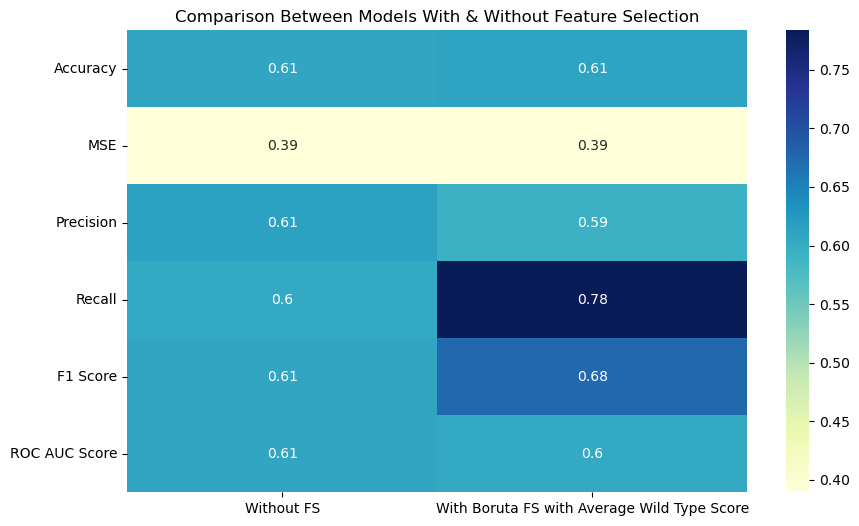

In [12]:
# Supplementary code 24b Comparison
# Description : Comparison of Random Forest Binary classification result when Average score value of wild type used as an extra feature
# with histone modification data
import seaborn as sns

# We'll use the same data, but represented as a matrix
data = {
    'Without FS': [0.609304652326163, 0.3906953476738369, 0.6145307769929365, 0.6041666666666666, 0.6093046523261632, 0.6093487218298015],
    'With Boruta FS with Average Wild Type Score': [0.6106106106106106, 0.3893893893893894,  0.5928099779897286, 0.7837051406401552, 0.6750208855472014, 0.604882559978816]
}

df = pd.DataFrame(data, index=['Accuracy', 'MSE', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

plt.figure(figsize=(10,6))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.title('Comparison Between Models With & Without Feature Selection')
plt.show()


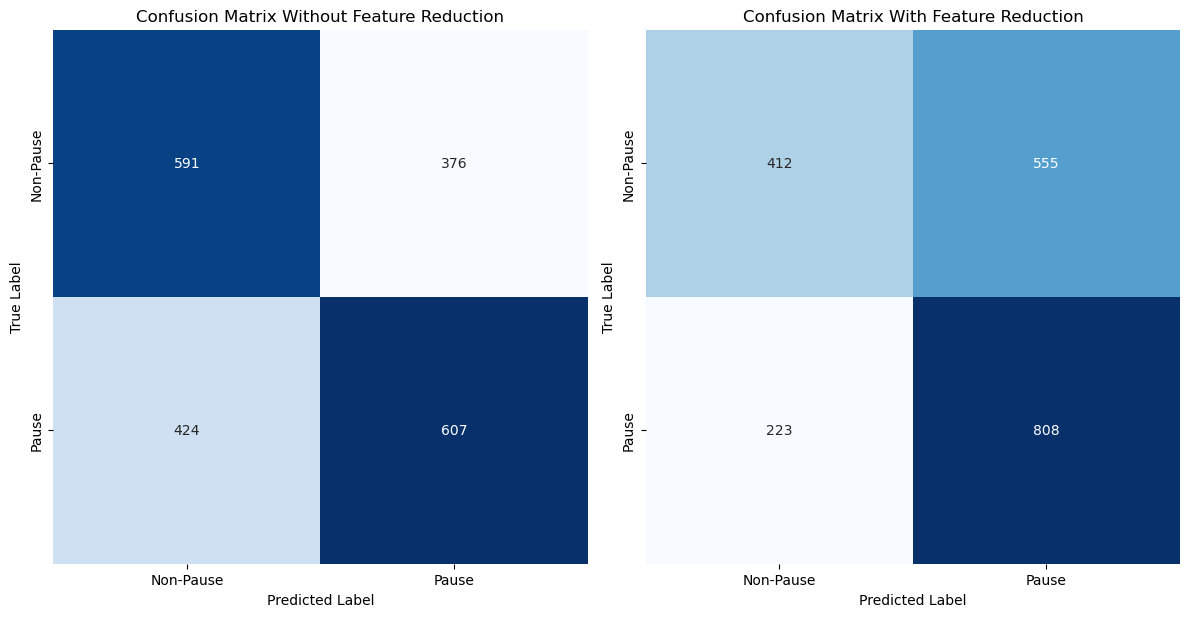

In [13]:
# Supplementary code 24c 
#Description: Confusion matrix comparison of above analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
confusion_matrix_without_reduction = np.array([[591, 376], [424, 607]])
confusion_matrix_with_reduction = np.array([[412, 555], [223, 808]])

# Define the class labels
class_labels = ['Non-Pause', 'Pause']

# Create subplots for each confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the heatmap for the confusion matrix without feature reduction
sns.heatmap(confusion_matrix_without_reduction, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Confusion Matrix Without Feature Reduction')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot the heatmap for the confusion matrix with feature reduction
sns.heatmap(confusion_matrix_with_reduction, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Confusion Matrix With Feature Reduction')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()
